In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 5
P = 2
Q = 1
M = 5
sigma_y2 = 0.1
X = np.linspace(0,2,N)[:,None]
Y = np.c_[10*np.sin(X[:,0]),5*X[:,0]**2] + np.random.randn(N,P) 
#Kf = np.exp(-(X-X.T)**2/2)
#Kw = np.exp(-(X-X.T)**2/40)
Kf = np.exp(-(X-X.T)**2/0.02)
Kw = np.exp(-(X-X.T)**2/40)
invKf = np.linalg.inv(Kf)
invKw = np.linalg.inv(Kw)
detKf = np.linalg.det(Kf)
detKw = np.linalg.det(Kw)
#def Sigma_f(params):
#    return params @ params.T

#Sigma_w = np.zeros([N,N,Q,P])

def L(Wmeans,Fmeans,Sigma_f_params,Sigma_w_params):
    
    L = 0
    
    #LOG CONDITIONAL LIKELIHOOD
    L -= (N*P/2)*np.log(2*np.pi*sigma_y2)
    S = 0
    for n in range(N):
        S+=(Y[n,:]-(Wmeans[n,:,:]@Fmeans[n,:])).T @ (Y[n,:]-(Wmeans[n,:,:]@Fmeans[n,:])).T    
    L -= (1/(2*sigma_y2))*S

    S = 0
    for j in range(Q):
        Sigma_f = Sigma_f_params[:,:,j].T @ Sigma_f_params[:,:,j]
        for i in range(P):  
            Sigma_w = Sigma_w_params[:,:,i,j].T @ Sigma_w_params[:,:,i,j]
            S += np.diag(Sigma_f).T @ (Wmeans[:,i,j]**2)+np.diag(Sigma_w).T @ (Fmeans[:,j]**2)
    L -= (1/(2*sigma_y2))*S
    #LOG PRIOR
    S = 0
    for j in range(Q):
        Sigma_f = Sigma_f_params[:,:,j].T @ Sigma_f_params[:,:,j]
        L -= 0.5*(np.log(detKf) + Fmeans[:,j].T @ invKf @ Fmeans[:,j] + np.trace(invKf @ Sigma_f))
    for j in range(Q):
        Sigma_f = Sigma_f_params[:,:,j].T @ Sigma_f_params[:,:,j]
        for i in range(P):
            Sigma_w = Sigma_w_params[:,:,i,j].T @ Sigma_w_params[:,:,i,j]
            L -= 0.5*(np.log(detKw) + Wmeans[:,i,j].T @ invKw @ Wmeans[:,i,j] + np.trace(invKw @ Sigma_w))

    #ENTROPY
    for j in range(Q):
        Sigma_f = Sigma_f_params[:,:,j].T @ Sigma_f_params[:,:,j]
        L+=0.5*np.log(np.linalg.det(Sigma_f))
        for i in range(P):
            Sigma_w = Sigma_w_params[:,:,i,j].T @ Sigma_w_params[:,:,i,j]
            L+=0.5*np.log(np.linalg.det(Sigma_w))
    return L

In [14]:
from scipy.optimize import minimize
def Lcompact(p):
    Wmeans = p[:(N*P*Q)].reshape(N,P,Q)
    Fmeans = p[(N*P*Q):(N*P*Q+N*Q)].reshape(N,Q)
    Sigma_f_params = p[(N*P*Q+N*Q):(N*P*Q+N*Q+N*M*Q)].reshape(M,N,Q)
    Sigma_w_params = p[(N*P*Q+N*Q+N*M*Q):].reshape(M,N,P,Q)
    negL = -L(Wmeans,Fmeans,Sigma_f_params,Sigma_w_params)
    print(negL)
    return negL

best = np.inf
for it in range(10):
    init = 1+0.5*np.random.randn(N*P*Q+N*Q+N*M*Q+N*M*P*Q)
    init[:(N*P*Q)] = np.abs(init[:(N*P*Q)])
    r = minimize(Lcompact,init,method='BFGS', options={'xtol': 1e-8, 'disp': True, 'maxiter':10000})
    if r['fun']<best:
        best = r['fun']
        result = r['x']

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: OptimizeWarning: Unknown solver options: xtol
  from ipykernel import kernelapp as app


178789090.5084369
178789090.4839331
178789090.38546792
178789090.60626197
178789090.99223423
178789090.36020467
178789089.78574777
178789090.60948122
178789090.99422738
178789090.4822929
178789090.38445175
178789090.5084402
178789090.50843906
178789090.5084365
178789090.50843328
178789090.50843668
178789090.5084371
178789090.50843704
178789090.508437
178789090.50843734
178789090.5084369
178789090.50843707
178789090.50843698
178789090.50843707
178789090.5084375
178789090.50843698
178789090.50843704
178789090.50843707
178789090.508437
178789090.50843778
178789090.50843695
178789090.50843698
178789090.508437
178789090.50843713
178789090.5084377
178789090.50843692
178789090.50843707
178789090.50843716
178789090.50843707
178789090.5084375
178789090.50843698
178789090.3722868
178789090.5348347
178789091.04332757
178789090.4049614
178789089.71059513
178789090.66245335
178789091.04393986
178789090.40527007
178789090.3719743
178789090.53467736
178789090.42690375
178789090.49659705
178789090.830

30516172.02293509
30516171.982349027
30516172.07451999
30516172.233849842
30516171.9721136
30516171.734607596
30516172.074519537
30516172.23384928
30516172.02293478
30516171.98234838
30516172.03340823
30516172.033407003
30516172.033404697
30516172.03340299
30516172.03340426
30516172.033405446
30516172.033405546
30516172.033405457
30516172.03340545
30516172.033405364
30516172.033405382
30516172.03340543
30516172.033405576
30516172.03340558
30516172.033405483
30516172.033405367
30516172.03340565
30516172.033405457
30516172.033405703
30516172.03340542
30516172.03340534
30516172.033405546
30516172.033405636
30516172.03340566
30516172.03340532
30516172.033405367
30516172.0334058
30516172.033405546
30516172.0334056
30516172.03340552
30516171.977031372
30516172.04430031
30516172.254760478
30516171.99066241
30516171.703416705
30516172.097089857
30516172.254764732
30516171.990696672
30516171.977028616
30516172.04428275
30516171.999333985
30516172.028586872
30516172.167185877
30516172.05228064
3

30495201.64889124
30495201.987285122
30495202.14596803
30495201.935979746
30495201.895560745
30495201.94639683
30495201.946395896
30495201.94639379
30495201.94639217
30495201.94639274
30495201.94639438
30495201.946394455
30495201.94639436
30495201.94639437
30495201.94639433
30495201.946394324
30495201.946394354
30495201.946394455
30495201.946394492
30495201.946394466
30495201.946394306
30495201.946394548
30495201.946394365
30495201.946394604
30495201.946394388
30495201.94639428
30495201.946394455
30495201.946394503
30495201.946394566
30495201.946394265
30495201.946394306
30495201.946394682
30495201.946394432
30495201.94639451
30495201.946394507
30495201.890133094
30495201.957173318
30495202.16725157
30495201.904091734
30495201.617227696
30495202.009438723
30495202.167149793
30495201.90410769
30495201.890184406
30495201.95716507
30495201.912423488
30495201.941568617
30495202.07983726
30495201.965326756
30495201.747380465
30495201.91819312
30495202.079949357
30495201.965297934
30495201.9

65209210.07419559
65209209.784042284
65209211.216542214
65209211.03497544
65209210.07343947
65209210.40459981
65209210.64965605
65209210.53390239
65209210.504083484
65209210.52805112
65209210.64475834
65209210.53863776
65209210.365183815
65209210.529082015
65209210.64510421
65209210.533378094
65209210.503907576
65209210.62010108
65209210.49044757
65209210.18917991
65209210.69770529
65209211.044274904
65209210.28716204
65209210.1896922
65209210.69681582
65209210.61984095
65209210.490901455
65209210.60646016
65209210.48015477
65209210.2426514
65209210.73817703
65209210.96466783
65209210.22691525
65209210.24303977
65209210.7370549
65209210.606263235
65209210.48072675
30063279.015033215
30063279.015033215
30063279.004269764
30063278.962548267
30063279.056728534
30063279.221007098
30063278.95369567
30063278.708351623
30063279.055643428
30063279.220355626
30063279.004820075
30063278.96287999
30063279.015026763
30063279.015034422
30063279.015049987
30063279.015044216
30063279.01502881
3006327

30055723.790723287
30055724.05260482
30055723.626643863
30055723.504924677
30055723.79021135
30055723.780640196
30055723.708151072
30032982.549627148
30032982.549627148
30032982.538869917
30032982.497172244
30032982.591298245
30032982.755483143
30032982.488325402
30032982.243121184
30032982.590213474
30032982.754832488
30032982.539419986
30032982.497503147
30032982.54962005
30032982.549628135
30032982.54964362
30032982.549638264
30032982.549623374
30032982.54962887
30032982.549627542
30032982.549628366
30032982.549627315
30032982.549632218
30032982.549630728
30032982.549627382
30032982.549629316
30032982.54962739
30032982.54963449
30032982.549630202
30032982.549627732
30032982.54962835
30032982.549627487
30032982.54963185
30032982.54962875
30032982.54962756
30032982.549629834
30032982.54962746
30032982.549628425
30032982.549630392
30032982.549627986
30032982.549629144
30032982.549627397
30032982.549635507
30032982.49521767
30032982.564868353
30032982.76325476
30032982.489615556
3003298

30535077.527855355
30535077.842031885
30535077.87933426
30535077.799636867
30535077.841613136
30535077.814334616
30535077.66175059
30535077.781338464
30535078.026698783
30535077.84741566
30535077.662233002
30535077.7818723
30535077.84484566
30535077.81653123
20695704.911696732
20695704.911696732
20695704.902188163
20695704.86855962
20695704.944603033
20695705.075648006
20695704.86292564
20695704.667266075
20695704.94392561
20695705.07564614
20695704.9039884
20695704.870154575
20695704.910524435
20695704.911526896
20695704.911655292
20695704.911722787
20695704.911896832
20695704.9116528
20695704.911690596
20695704.911695376
20695704.911696304
20695704.911688417
20695704.911645673
20695704.911693472
20695704.911694326
20695704.91169517
20695704.911683135
20695704.911652777
20695704.91168793
20695704.911695316
20695704.91169443
20695704.911687814
20695704.911670994
20695704.91169023
20695704.91169394
20695704.911694705
20695704.91169441
20695704.911654234
20695704.911685158
20695704.91169

722638230.7749739
722638230.8371385
722638230.7870463
722638230.5645206
722638229.3128465
722638230.1752396
722638232.2363747
722638230.948608
722638229.3125986
722638230.175365
722638230.7858119
722638230.564671
16142300.453909224
16142300.453909224
16142300.443449706
16142300.41914759
16142300.492526416
16142300.587683605
16142300.39646072
16142300.254910473
16142300.491781387
16142300.586975073
16142300.444707457
16142300.420460328
16142300.453745166
16142300.453702344
16142300.453832228
16142300.453978326
16142300.453979619
16142300.453903083
16142300.453906024
16142300.453905975
16142300.453908993
16142300.453904228
16142300.453901822
16142300.453907505
16142300.45390347
16142300.453908531
16142300.453901099
16142300.453902856
16142300.453904603
16142300.453905854
16142300.453908198
16142300.453903897
16142300.453905527
16142300.453905828
16142300.45390252
16142300.45390832
16142300.453907836
16142300.453903014
16142300.45390308
16142300.453904137
16142300.453908361
16142300.45389

15285019.870653419
15285019.870654188
15285019.87065426
15285019.870656198
15285019.87065542
15285019.82179992
15285019.886555228
15285020.062020583
15285019.807926787
15285019.583937291
15285019.963303903
15285020.063676227
15285019.809292998
15285019.821210854
15285019.88594127
15285019.854720913
15285019.869086474
15285019.932801688
15285019.876402186
15285019.77681858
15285019.861456111
15285019.934130866
15285019.876918577
15285019.854286587
15285019.869017258
15285019.856346335
15285019.839027079
15285019.925997665
15285019.993572507
15285019.788393026
15285019.687752752
15285019.925401477
15285019.992903031
15285019.856776232
15285019.839619324
15285019.938043293
15285019.854689768
15285019.605630565
15285019.933587877
15285020.264437556
15285019.775699766
15285019.607421514
15285019.934795616
15285019.93732023
15285019.854093738
15285019.911352083
15285019.86006842
15285019.70969807
15285019.91184483
15285020.109980097
15285019.809093079
15285019.710685244
15285019.91126109
152

18700522.960562743
18700523.025174394
18700523.187847357
18700522.93450035
18700522.734551243
18700523.113300744
18700523.190304223
18700522.935805414
18700522.959458612
18700523.024251904
18700522.987494774
18700522.99864712
18700523.081760976
18700523.03747326
18700522.893187847
18700522.960036304
18700523.083572906
18700523.03810569
18700522.986787375
18700522.998575334
18700522.999034673
18700522.964917112
18700523.035172295
18700523.16906683
18700522.96470779
18700522.76506783
18700523.034184795
18700523.16817317
18700522.999685705
18700522.96566438
18700523.089701332
18700523.002255484
18700522.680833746
18700523.023981404
18700523.491116736
18700522.9795984
18700522.68251305
18700523.02538147
18700523.08876064
18700523.001492888
18700523.019515328
18700522.974753875
18700522.95606203
18700523.129966326
18700523.08149138
18700522.82280249
18700522.956918668
18700523.129455134
18700523.018976025
18700522.975572344
14749129.546535298
14749129.546535298
14749129.538280033
14749129.5

14718896.68700011
14718896.221609747
14718896.057049006
14718896.368817508
14718896.373202654
14718896.293900238
14718896.351894772
14718896.298822803
14718896.142425193
14718896.349348715
14718896.557669928
14718896.249498243
14718896.143351356
14718896.349244518
14718896.351348398
14718896.299380755
19942783.607770722
19942783.607770722
19942783.60503559
19942783.595904626
19942783.617098317
19942783.653752394
19942783.594796658
19942783.539006453
19942783.61560247
19942783.653725438
19942783.606129415
19942783.596239194
19942783.607754298
19942783.607742626
19942783.607761804
19942783.607782714
19942783.607800607
19942783.607770365
19942783.60776994
19942783.607769355
19942783.60777062
19942783.60776884
19942783.607770294
19942783.6077703
19942783.607768297
19942783.60777044
19942783.607767645
19942783.607770357
19942783.607769582
19942783.607769303
19942783.607770298
19942783.6077687
19942783.60777051
19942783.607769888
19942783.607767906
19942783.607770346
19942783.607770197
19942

14647492.233253445
14647492.1541827
14647492.211035043
14647492.159353532
14647492.00468324
14647492.208554676
14647492.415172243
14647492.110276664
14647492.004212577
14647492.209186247
14647492.211247435
14647492.159268018
14564641.553976398
14564641.553976398
14564641.54601166
14564641.52157518
14564641.584214699
14564641.680262735
14564641.509492414
14564641.365950545
14564641.582905201
14564641.679706018
14564641.546958704
14564641.52215895
14564641.553966945
14564641.553956948
14564641.55397269
14564641.553987728
14564641.554011432
14564641.55397615
14564641.553975383
14564641.553973835
14564641.553976147
14564641.553974267
14564641.553976107
14564641.55397585
14564641.553971846
14564641.553975655
14564641.553972883
14564641.553976148
14564641.553974926
14564641.553973729
14564641.553975295
14564641.55397409
14564641.55397625
14564641.553975318
14564641.55397111
14564641.553975431
14564641.553975798
14564641.55397615
14564641.553974442
14564641.55397238
14564641.553975476
1456464

13657735.520457303
13657735.581218602
13657735.553505404
13657735.565981148
13657735.6219441
13657735.571937963
13657735.484613404
13657735.560245866
13657735.623519165
13657735.572149191
13657735.552499587
13657735.56574843
13657735.552591704
13657735.53429605
13657735.624555279
13657735.695043482
13657735.482236065
13657735.378566734
13657735.624070533
13657735.692648618
13657735.552603025
13657735.53535141
13657735.628665214
13657735.552488012
13657735.326500908
13657735.626031594
13657735.925337175
13657735.479463166
13657735.327014524
13657735.626546549
13657735.62811793
13657735.551823497
13657735.608255692
13657735.556258654
13657735.40652538
13657735.61015102
13657735.805272784
13657735.505214283
13657735.407668961
13657735.608937845
13657735.607516147
13657735.556542108
13493905.592352405
13493905.592352405
13493905.585707324
13493905.561271682
13493905.621825336
13493905.712614886
13493905.54955661
13493905.41434972
13493905.620668162
13493905.711038638
13493905.585308118
134

13353824.270139677
13353824.242450457
13353824.25467854
13353824.311299225
13353824.261959309
13353824.172436269
13353824.247650966
13353824.313472198
13353824.262160031
13353824.241255185
13353824.25452158
13353824.240873469
13353824.223455984
13353824.316181801
13353824.383283213
13353824.166800093
13353824.068818185
13353824.316209888
13353824.380681694
13353824.240763
13353824.224720225
13353824.316933189
13353824.241282333
13353824.018727327
13353824.31515783
13353824.608389754
13353824.16791731
13353824.020255709
13353824.315893758
13353824.315980667
13353824.240652986
13353824.296850227
13353824.24481757
13353824.096909534
13353824.300436657
13353824.492305556
13353824.192479763
13353824.097565027
13353824.299035683
13353824.296412634
13353824.245297337
13554024.816973029
13554024.816973029
13554024.810061371
13554024.785741815
13554024.845682222
13554024.935661385
13554024.775814803
13554024.641101377
13554024.843944246
13554024.934003241
13554024.81048223
13554024.787320621
13

13238416.928739559
13238416.853925306
13238416.634191118
13238416.927472267
13238417.217910264
13238416.781000046
13238416.6343046
13238416.928526219
13238416.928491058
13238416.853364408
13238416.909263186
13238416.857318617
13238416.710205061
13238416.913847212
13238417.104404071
13238416.80471925
13238416.710370578
13238416.911867809
13238416.909111336
13238416.857956463
13201987.426889215
13201987.426889215
13201987.420295328
13201987.395841794
13201987.454368372
13201987.544919398
13201987.386521824
13201987.252150401
13201987.453706201
13201987.543246552
13201987.420403618
13201987.397262143
13201987.426829945
13201987.426840473
13201987.426945344
13201987.426956434
13201987.426803842
13201987.426881364
13201987.426889142
13201987.426889164
13201987.426888408
13201987.426907867
13201987.426881544
13201987.426889172
13201987.42688912
13201987.426886326
13201987.426913636
13201987.426882504
13201987.426889103
13201987.426889155
13201987.426884793
13201987.426904736
13201987.4268851

12898796.441975374
12898796.441851364
12898796.44196686
12898796.441973716
12898796.441973465
12898796.441972468
12898796.442003159
12898796.441966686
12898796.441973759
12898796.441973122
12898796.44196739
12898796.442021558
12898796.441967577
12898796.441973664
12898796.44197338
12898796.441963812
12898796.442004442
12898796.44197009
12898796.441973705
12898796.441973139
12898796.441965444
12898796.441981127
12898796.441967862
12898796.441973621
12898796.441973262
12898796.441965306
12898796.442029748
12898796.399122871
12898796.45633416
12898796.611566612
12898796.386181118
12898796.187851695
12898796.522415813
12898796.613737203
12898796.388639033
12898796.397983208
12898796.455389734
12898796.428599149
12898796.440581534
12898796.496494172
12898796.448172402
12898796.36010467
12898796.433763126
12898796.49778977
12898796.447968949
12898796.427611925
12898796.440403204
12898796.42660439
12898796.40930714
12898796.502804102
12898796.567415955
12898796.351462675
12898796.257822525
12

12613506.75151637
12613506.661009897
12613506.901630538
12613506.961116936
12613506.825875547
12613506.81108791
12613506.899007702
12613506.826730836
12613506.616176667
12613506.898160849
12613507.178383604
12613506.757090252
12613506.614665603
12613506.899320448
12613506.899099164
12613506.826270703
12613506.880251093
12613506.82948624
12613506.687011361
12613506.886582758
12613507.06986391
12613506.776951168
12613506.687148727
12613506.883476501
12613506.880650096
12613506.830782617
12838516.736456672
12838516.736456672
12838516.730623225
12838516.706858682
12838516.762818225
12838516.848707521
12838516.698604956
12838516.567036927
12838516.762344288
12838516.847321514
12838516.729894053
12838516.70839054
12838516.736365251
12838516.736405212
12838516.736604832
12838516.736341344
12838516.736610211
12838516.73644939
12838516.736456465
12838516.736458192
12838516.736458067
12838516.736476729
12838516.736449137
12838516.736456553
12838516.736458885
12838516.73645218
12838516.736482495


12481303.978133237
12481303.972370965
12481303.948524559
12481304.004506337
12481304.09003971
12481303.94029084
12481303.808877883
12481304.003994664
12481304.088762725
12481303.971570035
12481303.950146524
12481303.978067381
12481303.978104526
12481303.978236703
12481303.978042306
12481303.978254037
12481303.97812496
12481303.978133008
12481303.978135196
12481303.978135088
12481303.978132669
12481303.978124576
12481303.978133108
12481303.978136221
12481303.97813067
12481303.978134122
12481303.978125637
12481303.978132883
12481303.978134861
12481303.978128351
12481303.978133239
12481303.978128718
12481303.978132965
12481303.978137534
12481303.978130057
12481303.978132673
12481303.978125969
12481303.978132796
12481303.978136273
12481303.97812831
12481303.97813428
12481303.93652006
12481303.991640955
12481304.142956436
12481303.924847739
12481303.730679529
12481304.055841539
12481304.145202823
12481303.92685117
12481303.93540573
12481303.991080806
12481303.96519924
12481303.976789566
124

11691303.332718914
11691303.18995016
11691303.064237172
11691303.250659723
11691303.33146987
11691303.219760502
11691303.199324692
11691303.22590001
11691303.225977369
11691303.226112502
11691303.225921733
11691303.226272918
11691303.226004578
11691303.226010244
11691303.226017794
11691303.226012787
11691303.225997368
11691303.226003556
11691303.226010261
11691303.22602295
11691303.226013117
11691303.226023458
11691303.226004394
11691303.22601019
11691303.22601761
11691303.226015255
11691303.226015303
11691303.226006866
11691303.226010203
11691303.2260259
11691303.22601491
11691303.226005757
11691303.226004569
11691303.226010196
11691303.226021964
11691303.226013254
11691303.226031562
11691303.186085377
11691303.238603411
11691303.382498791
11691303.174899524
11691302.991011329
11691303.301698651
11691303.385180632
11691303.176548442
11691303.185308585
11691303.238423409
11691303.213084582
11691303.224599719
11691303.279010123
11691303.2327872
11691303.148372427
11691303.216380062
1169

12253705.00963529
9745709.884276154
9745709.884276154
9745709.879158849
9745709.86814542
9745709.905735383
9745709.97824835
9745709.85294096
9745709.739989525
9745709.90600122
9745709.977133939
9745709.878857939
9745709.860626968
9745709.884208495
9745709.884247474
9745709.884386854
9745709.884303829
9745709.884491334
9745709.884255135
9745709.884276241
9745709.884293972
9745709.884278627
9745709.884305038
9745709.88424963
9745709.884276204
9745709.88430685
9745709.884280773
9745709.884319095
9745709.884252926
9745709.884276258
9745709.884294068
9745709.884284467
9745709.884302946
9745709.884262796
9745709.884276202
9745709.884312866
9745709.88428339
9745709.884282479
9745709.884253448
9745709.884276342
9745709.884303926
9745709.884281792
9745709.884325689
9745709.849328747
9745709.89585956
9745710.020723991
9745709.838642767
9745709.679556645
9745709.953235576
9745710.023010565
9745709.838955857
9745709.848850723
9745709.89581155
9745709.872062739
9745709.882630698
9745709.934801785
9

5218305.038874319
5218305.0053273905
5218304.957399472
5218305.002603719
5218305.037321447
5218305.006703732
5218304.996900372
5218305.005108796
5218304.995769064
5218304.987140603
5218305.044862487
5218305.075000079
5218304.946127982
5218304.903680142
5218305.044677864
5218305.072968838
5218304.995199259
5218304.988068088
5218305.035878481
5218304.996374237
5218304.885025988
5218305.039611627
5218305.186895163
5218304.95442279
5218304.883228155
5218305.040018127
5218305.03629961
5218304.996157165
5218305.026346156
5218304.997575612
5218304.920390449
5218305.034877674
5218305.132823455
5218304.962631754
5218304.919000976
5218305.033150673
5218305.027259254
5218304.998247007
4826186.482983231
4826186.482983231
4826186.477683381
4826186.467016038
4826186.496617666
4826186.542193442
4826186.464294021
4826186.393175865
4826186.49843379
4826186.54004285
4826186.479664446
4826186.467956767
4826186.482811634
4826186.482906969
4826186.483118074
4826186.483044752
4826186.483609523
4826186.48298

3108691.314513926
3108691.314513069
3108691.3144420013
3108691.3145095906
3108691.3145154724
3108691.314515264
3108691.3145190408
3108691.31454043
3108691.3145100586
3108691.3145194375
3108691.3145143376
3108691.3145233355
3108691.3145280983
3108691.3145114616
3108691.314517441
3108691.314514748
3108691.314521095
3108691.314500628
3108691.314510112
3108691.314522071
3108691.3145146035
3108691.314521711
3108691.314568588
3108691.304634116
3108691.3190158824
3108691.3542871657
3108691.296112343
3108691.25320805
3108691.341228533
3108691.356320128
3108691.296409126
3108691.3038185537
3108691.319342226
3108691.3087720205
3108691.3143767496
3108691.3360384144
3108691.3147205
3108691.2843079753
3108691.3152254093
3108691.3348336937
3108691.31418677
3108691.3091737144
3108691.314513614
3108691.3083392996
3108691.3047217233
3108691.3389349417
3108691.352841213
3108691.277647664
3108691.2584460527
3108691.34016617
3108691.351536795
3108691.3076365218
3108691.305310202
3108691.330741081
3108691.

488966.325361532
488966.29846753785
488966.30320928595
488966.31020447734
488966.3050063784
488966.3070702355
488966.318470565
488966.30972551834
488966.2921124264
488966.30457311013
488966.31833535264
488966.3096736314
488966.304979655
488966.30729745154
488966.3051461766
488966.30373069696
488966.31832600763
488966.32324666355
488966.2918156589
488966.2852834033
488966.318725508
488966.32288713264
488966.30483013374
488966.3038340352
488966.31423283136
488966.30574761383
488966.28171686135
488966.3155713543
488966.347429998
488966.2964185013
488966.28083982633
488966.31575618
488966.3147040612
488966.3055403684
488966.3122102441
488966.3061705448
488966.2893506242
488966.31379370217
488966.33588744706
488966.2979918141
488966.28882487636
488966.3142278095
488966.31247084273
488966.30611096363
2376320.0879012514
2376320.0879012514
2376320.08856619
2376320.087707793
2376320.0853598616
2376320.0840118905
2376320.085083029
2376320.093812682
2376320.085411102
2376320.0884898095
2376320.08

102894.27672193115
102894.27734096833
102894.27704295998
102894.27591000362
102894.27669026352
102894.27862852359
102894.27747270375
102894.27592237972
102894.27668813519
102894.27729833304
102894.27711852995
102894.27733778076
102894.27749413977
102894.27573090486
102894.27518973227
102894.27887354222
102894.27973118243
102894.27574684295
102894.2751961145
102894.27734329495
102894.27748896528
102894.27635201906
102894.27725135186
102894.27992590627
102894.27620469613
102894.27286025808
102894.27828437084
102894.27997797122
102894.27612114498
102894.27624715591
102894.27725363807
102894.27645783634
102894.27723020731
102894.27922490732
102894.27611242562
102894.27369479438
102894.27795593908
102894.2792034455
102894.27644730445
102894.27644366771
102894.27716092522
117277.1342252636
117277.1342252636
117277.1324042955
117277.13371474025
117277.13363700805
117277.1336933208
117277.1344890502
117277.13494120247
117277.1338232843
117277.13342455031
117277.13439471892
117277.13415492732
1

50622.528379378564
50622.52838021294
50622.528393448585
50622.52836236823
50622.5283818983
50622.52838256906
50622.528382830125
50622.52838266529
50622.528382064374
50622.528381781005
50622.528382576325
50622.528382897355
50622.52838295824
50622.52838285668
50622.52838185552
50622.52838247426
50622.52838280665
50622.52838320852
50622.52838287905
50622.528382211574
50622.528382507844
50622.52838294963
50622.52838306491
50622.52838259248
50622.528381828764
50622.528382460914
50622.52838287629
50622.52838306548
50622.52838314881
50622.52821261859
50622.52856884237
50622.52903631299
50622.52793654964
50622.52746526698
50622.52914001697
50622.52905388096
50622.52799763991
50622.52820033535
50622.52845871631
50622.52816434166
50622.52824894085
50622.52917579665
50622.528597267374
50622.5271425703
50622.52815884486
50622.52916006481
50622.52849285768
50622.528191321886
50622.52837122748
50622.52820361338
50622.52816527112
50622.52892379136
50622.5296878488
50622.52746723697
50622.526427532444

15491.598555112605
15491.598715311475
15491.598505914517
15491.598220129252
15491.598569078664
15491.598737550845
15491.598543026119
15491.598490635713
15491.598536195363
15491.598557222802
15491.598516667347
15491.598423848172
15491.598598593942
15491.598617499149
15491.598502698545
15491.598466634305
15491.598569637561
15491.598554592809
15491.598533752807
15491.59839584955
15491.598572015146
15491.599094303047
15491.598440166914
15491.597666877413
15491.598658394583
15491.599096468164
15491.598480899771
15491.598397191867
15491.59854925712
15491.598553220616
15491.59854463463
15491.598515506112
15491.59853549233
15491.598583688648
15491.598654438185
15491.598556751776
15491.59845901723
15491.598519872781
15491.598554440432
15491.598591673439
15491.59849858214
15491.598427009996
15491.59863387783
15491.598793680756
15491.598377100656
15491.598369558964
15491.598660174557
15491.598576403663
15491.598505162514
12976.599112009353
12976.599112009353
12976.599071550103
12976.599170899386


10414.857784380532
10414.857841268069
10414.857656271868
10414.857633302874
10414.857803639037
10414.857808984487
10414.857720790118
10414.857724229954
10414.857811405056
10414.857725652118
10414.857459108862
10414.857819493198
10414.85821252081
10414.857650875068
10414.857406303106
10414.857799652013
10414.857829544788
10414.857727123881
10414.85773414347
10414.857792329736
10414.857760754154
10414.857518197674
10414.857698151602
10414.858068102703
10414.857762929087
10414.857530858962
10414.857734837857
10414.857791910074
10414.857673029863
10414.857667899256
10414.857958944307
10414.857996243929
10414.857385698884
10414.8573036174
10414.857962789098
10414.858035370333
10414.857686450378
10414.857662603548
10414.857706226152
10414.857755470102
10414.8578410179
10414.857740293655
10414.857579514992
10414.857720107797
10414.857852831363
10414.857772681164
10414.857712033907
10414.85772735445
10167.929984754486
10167.929984754486
10167.929975699075
10167.929941176453
10167.929971287753


9174.745515237184
9174.745641620777
9174.746211274187
9174.745912240605
9174.745520502083
9174.74576966324
9174.745871051473
9174.745851303192
9174.745752780567
9174.745607324154
9174.746037604382
9174.746122548948
9174.745468682504
9174.745577668911
9174.746008792794
9174.74585628848
9174.745748575599
9174.745823529
9174.745829581068
9174.745719980358
9174.745694015199
9174.74591358748
9174.745966207036
9174.745723045593
9174.745679030619
9174.745817093733
9174.74583036377
9174.74584838035
9174.745776955346
9174.745581920359
9174.745869806677
9174.746129378058
9174.745685511425
9174.745582899326
9174.745875936698
9174.745853104683
9174.745779635385
9034.340369160154
9034.340369160154
9034.340388151693
9034.340373272667
9034.340366484348
9034.340323210394
9034.34039167845
9034.34043818229
9034.34035522258
9034.34032652543
9034.34037340124
9034.34038144808
9034.340368174438
9034.340368153029
9034.340369177446
9034.3403692419
9034.340368458295
9034.340369156529
9034.340369123443
9034.340

8685.169062852186
8685.169062852186
8685.169069245554
8685.169047559375
8685.169065265001
8685.16911031463
8685.169054374206
8685.168992188817
8685.169071015354
8685.169113143387
8685.169062351404
8685.169052115552
8685.169061885446
8685.16906187187
8685.169062836778
8685.169062875853
8685.169061856706
8685.169062849673
8685.169062840303
8685.169062859297
8685.169062861647
8685.169062773473
8685.169062852383
8685.169062847724
8685.169062852903
8685.169062942368
8685.169062915993
8685.169062851102
8685.16906284045
8685.169062830751
8685.169063020565
8685.169062893989
8685.16906286623
8685.16906283851
8685.169062864064
8685.169062969342
8685.169062838018
8685.1690628645
8685.169062832132
8685.169062852536
8685.169062979272
8685.169062956043
8685.169029655468
8685.169043230106
8685.169201077122
8685.169101209563
8685.168852827497
8685.169034499822
8685.169208087675
8685.169064111655
8685.169024624665
8685.169065330436
8685.169038859534
8685.169150162761
8685.169154729147
8685.168795378231

8396.0376297383
8396.037627233512
8396.037161046295
8396.03732294992
8396.037630547322
8396.037475066316
8396.037397116816
8396.037416680263
8396.03749995549
8396.037639404201
8396.037250228008
8396.037160851438
8396.037729722371
8396.037643495914
8396.03726224127
8396.037391266304
8396.03748737329
8396.037551147969
8396.037421525742
8396.037002058878
8396.037500169654
8396.038090887008
8396.037361292638
8396.037020191592
8396.037502654059
8396.037548650535
8396.037429537271
8396.037430025184
8396.037457515567
8396.037520316262
8396.037377901643
8396.037318525418
8396.037548195849
8396.037526602688
8396.03737304667
8396.037422446045
8396.037463301698
8270.784961890617
8270.784961890617
8270.784940171208
8270.784970436383
8270.784943183828
8270.784898397991
8270.784980438188
8270.785059517535
8270.784944905901
8270.78489418672
8270.784969429014
8270.784980947297
8270.784960911049
8270.784960977533
8270.78496174142
8270.784962007378
8270.78496081566
8270.784961912233
8270.78496189524
827

7456.163528099561
7456.163681175613
7456.1637126581545
7456.163677088742
7456.163659224706
7456.163687558923
7456.163732994537
7456.163654970165
7456.163589410045
7456.163702281604
7456.163730058387
7456.163663354331
7456.163665574637
7456.163680683477
7456.1636111629305
7456.163677546042
7456.1639215856
7456.16365301149
7456.163341683076
7456.1637340208135
7456.163886275678
7456.163635045537
7456.163627691868
7456.163690543824
7456.163628717976
7456.163666024176
7456.16383513826
7456.163754984836
7456.16343850853
7456.163568336273
7456.163840290632
7456.163760138211
7456.163634448665
7456.163655450221
7456.163661009759
7456.163656020541
7456.163743573545
7456.163755060231
7456.163600089316
7456.163549581626
7456.163722304289
7456.163763122248
7456.163666409106
7456.163655604129
7232.481166030154
7232.481166030154
7232.481166801618
7232.481208633983
7232.481125677476
7232.480978092318
7232.481242300453
7232.4814538237615
7232.481115567619
7232.48097785071
7232.481181724268
7232.4812134

6773.8210514038055
6773.821077588107
6773.821078158738
6773.8210782966835
6773.821078830797
6773.821078018
6773.821078483904
6773.821078522366
6773.821078580927
6773.821078485555
6773.821078640179
6773.821078453863
6773.82107854429
6773.821078493191
6773.821078446869
6773.8210784377015
6773.821078479076
6773.821078565204
6773.821078411771
6773.821078411426
6773.821078501913
6773.821078492044
6773.82107851238
6773.821078417615
6773.821078426554
6773.821078549384
6773.821078474094
6773.821078494459
6773.82107860954
6773.82107836665
6773.821078458729
6773.82106067299
6773.82108071119
6773.821134553023
6773.8210735993
6773.821007904146
6773.821072448588
6773.821113422605
6773.8210808356225
6773.821071550582
6773.8210771956055
6773.821102710889
6773.821066168265
6773.820992705314
6773.821142600102
6773.821199897289
6773.820986080192
6773.820994287263
6773.82113990639
6773.821099489873
6773.821062567156
6773.821158574572
6773.821089785822
6773.8207771093075
6773.820979728093
6773.82149921157

6385.002800439795
6385.002794861761
6385.002791473551
6385.002780169176
6385.002848793823
6385.0028819550735
6385.002738055104
6385.002686380801
6385.002844637109
6385.002883736254
6385.002793092537
6385.002782325161
6385.002793986148
6385.002799934606
6385.002845545713
6385.002833935242
6385.002734117037
6385.002747656197
6385.002851956388
6385.002847783118
6385.002790145427
6385.0027898431645
6385.002806682654
6385.002821526056
6385.00278329872
6385.002707209523
6385.002836766064
6385.002953232156
6385.00277941346
6385.002698057911
6385.00280902499
6385.002831079932
6385.002819657239
6385.002798763796
6385.002735884801
6385.002823894261
6385.002900266508
6385.002764574274
6385.002739355653
6385.002837400791
6385.002818433208
6385.002793431491
6362.528149871752
6362.528149871752
6362.528151098728
6362.528160405706
6362.528138689664
6362.5281079827
6362.528167075267
6362.528215535931
6362.528136564166
6362.528108366579
6362.528152672113
6362.528159433013
6362.528148946737
6362.52814959

6226.583185541317
6226.583012824241
6226.582987883371
6226.5830794651165
6226.5830799306505
6226.583060745502
6226.583045747062
6226.583044455761
6226.5831332304815
6226.583148868956
6226.582965852323
6226.58295025809
6226.58312235488
6226.58312784711
6226.583048274178
6226.583048418464
6218.667397123633
6218.667397123633
6218.667392433092
6218.6673869966025
6218.667396884982
6218.667420041138
6218.6674029742635
6218.667361215797
6218.667390462748
6218.667422363202
6218.667398675727
6218.667390008128
6218.667396193254
6218.667396912909
6218.667396953783
6218.667397500892
6218.667396226664
6218.66739710549
6218.667397124378
6218.667397133325
6218.6673971190485
6218.667397184577
6218.667397116927
6218.667397143483
6218.6673971277105
6218.66739702645
6218.667397088893
6218.667397101842
6218.667397080234
6218.66739720885
6218.667396962172
6218.6673970615975
6218.667397117073
6218.667397152911
6218.667397131721
6218.667396997038
6218.667397091271
6218.667397104833
6218.667397143616
6218.667

6083.107523820859
6083.107523875838
6083.10752387426
6083.107523904169
6083.107523798317
6083.107523878477
6083.107523863497
6083.107523882992
6083.107523883667
6083.107523774636
6083.107523852344
6083.107539408385
6083.107500303578
6083.107471289798
6083.107605625593
6083.10759617341
6083.10738955319
6083.107476164061
6083.107624278098
6083.107535596817
6083.107495919957
6083.107528315624
6083.107494381381
6083.10750462461
6083.107658400858
6083.107556871601
6083.107324043298
6083.107501301804
6083.107655879535
6083.107530869252
6083.107491289956
6083.107527681664
6083.107510681862
6083.107518903503
6083.107565279047
6083.1075348351205
6083.107459789755
6083.107518053259
6083.107563376391
6083.107525399582
6083.107515059289
6083.107512789839
6083.10753124869
6083.107544380175
6083.10748899152
6083.10749392872
6083.107568366674
6083.107543336267
6083.107496294311
6083.107519783438
6083.10752968377
6083.1075304421765
6083.107516210495
6083.1074855097595
6083.1075277844875
6083.107581852

5894.288567134657
5894.288594203533
5894.288618826488
5894.288573332755
5894.288519906311
5894.288586415745
5894.288622576835
5894.288581708143
5894.2885710508435
5894.288580954127
5894.28858183748
5894.28858165674
5894.288582213952
5894.288580396957
5894.288581871227
5894.288581881339
5894.288581879709
5894.288581863779
5894.288581729155
5894.288581873305
5894.288581823005
5894.288581870001
5894.288581842718
5894.28858180427
5894.288581853647
5894.28858188708
5894.288581913401
5894.288581799244
5894.288581859139
5894.288581856343
5894.288581837813
5894.288581838282
5894.288581825382
5894.288581851351
5894.288581876814
5894.288581889026
5894.288581864754
5894.288581813096
5894.288581842831
5894.288573832641
5894.288610589415
5894.288618593883
5894.288471545349
5894.288528660905
5894.288754228497
5894.28861366952
5894.2884621801395
5894.288574117449
5894.2886141508825
5894.28860034861
5894.2886173452025
5894.288530456848
5894.288442231062
5894.288647171783
5894.288772564476
5894.2885464

5814.614114622353
5814.614114622353
5814.614109578083
5814.614091009215
5814.614126832644
5814.614168856523
5814.614102742444
5814.6140309700295
5814.6141234727975
5814.614168785591
5814.614112955876
5814.614100783213
5814.614113718316
5814.614114639688
5814.614114442156
5814.614114956281
5814.61411306114
5814.614114606282
5814.614114636251
5814.6141146078335
5814.614114616129
5814.61411444572
5814.614114586235
5814.614114645738
5814.614114538721
5814.6141146127575
5814.6141145503525
5814.614114610007
5814.61411462324
5814.6141145917845
5814.61411459086
5814.6141146393265
5814.614114649023
5814.614114579168
5814.614114644595
5814.614114596173
5814.614114611605
5814.6141145834035
5814.614114626123
5814.61411462239
5814.61411461712
5814.614114615818
5814.614124672219
5814.614049927993
5814.614069577687
5814.61436383149
5814.614174809577
5814.613752918177
5814.61407663612
5814.614348599403
5814.614122961303
5814.614057152848
5814.61411199527
5814.614108076454
5814.614139278835
5814.614121

5680.685096633656
5680.6850967088085
5680.685096565691
5680.685096553564
5680.685096688134
5680.685096654469
5680.685096689954
5680.685096546472
5680.685096556722
5680.685096568295
5680.685096622142
5680.6850966947
5680.685096735655
5680.685096465266
5680.685124335268
5680.685083146705
5680.684986771523
5680.685129692237
5680.6852611145105
5680.685066594412
5680.684985832649
5680.685106528729
5680.685124768485
5680.685082859311
5680.685052133623
5680.685144121271
5680.685249529787
5680.68502901999
5680.684880206937
5680.685142622057
5680.685232461442
5680.685084107727
5680.685064268463
5680.685105086272
5680.685078911812
5680.685063589501
5680.68517059142
5680.685140698561
5680.684977600599
5680.685070121931
5680.685184686725
5680.685103366369
5680.685071573213
5680.6851377933335
5680.685116066629
5680.684938022697
5680.685036122799
5680.685329837245
5680.685176589687
5680.684943313506
5680.685047329905
5680.685134809582
5680.685108072854
5680.685089127389
5680.685084553289
5680.685115

5580.333656558099
5580.333656553958
5580.333656480244
5580.333656498847
5580.333656554063
5580.333656613975
5580.333656463696
5580.333656511066
5580.333656560387
5580.333656537507
5580.333656590693
5580.333656534761
5580.3336564871215
5580.333656516432
5580.333656516038
5580.333656591675
5580.33365641623
5580.333675876565
5580.333664009678
5580.33357156824
5580.333639898212
5580.333795173224
5580.333675629393
5580.333554838737
5580.333648958788
5580.333684985222
5580.333657546749
5580.33365229056
5580.333679684066
5580.333680546292
5580.333613724029
5580.333613081631
5580.33370613038
5580.333691360219
5580.3336325270375
5580.333646150286
5580.333660124083
5580.333626852932
5580.333642534461
5580.333766983647
5580.3337198744675
5580.333493360604
5580.333579746859
5580.333765423567
5580.333698424755
5580.333629009755
5580.333648014207
5580.333648281982
5580.333640688124
5580.333685100275
5580.333732020432
5580.333614829093
5580.333546591837
5580.333685297493
5580.333729936938
5580.333649

5448.751982720757
5448.752043657541
5448.752054686378
5448.752039789554
5448.75204082745
5448.752040616695
5448.752040883979
5448.752038515764
5448.752040598886
5448.752040671327
5448.752040646576
5448.752040645564
5448.752040761798
5448.752040590616
5448.752040617124
5448.752040699977
5448.752040742889
5448.752040513886
5448.752040577497
5448.752040637328
5448.752040655202
5448.752040812792
5448.75204065913
5448.75204060558
5448.752040604629
5448.752040714565
5448.752040759119
5448.752040644349
5448.752040596828
5448.752040690174
5448.752040573502
5448.752040763855
5448.752040613555
5448.752030637616
5448.752067926511
5448.75207631899
5448.751958439609
5448.751991224122
5448.75216013256
5448.752072518688
5448.751963404883
5448.752032743345
5448.752059711597
5448.752041771406
5448.752083379748
5448.752044279062
5448.751874609547
5448.752032053278
5448.752289111866
5448.7520487495485
5448.751871420551
5448.752037755685
5448.75208395929
5448.752057991123
5448.752052301754
5448.7519580824

5273.840212566929
5273.840259575018
5273.840213097029
5273.840200529414
5273.840201382516
5273.840155200126
5273.840262309303
5273.840432480238
5273.840138010631
5273.839889664514
5273.840261435395
5273.840423313112
5273.840200959494
5273.840160503304
5273.840206420466
5273.840207658035
5273.840225374957
5273.840238607998
5273.840183749492
5273.840173752521
5273.840237938064
5273.840239081452
5273.840204951612
5273.840206641958
5273.8402229447065
5273.840210658664
5273.84019622059
5273.840215827124
5273.840231367932
5273.840210808144
5273.840203555022
5273.840211543009
5273.840214531533
5273.840213878071
5273.840226333261
5273.840237878172
5273.840144814764
5273.8401053489215
5273.840310828971
5273.840371150798
5273.840149834275
5273.840107384729
5273.840227714911
5273.840238455568
5198.830563984521
5198.830563984521
5198.8305634802055
5198.830557334526
5198.830568252972
5198.830593166741
5198.830554679285
5198.8305216410145
5198.830572042854
5198.830590535401
5198.830560736494
5198.83

4976.25500608998
4976.2547446076205
4976.254869092268
4976.254936719786
4976.254967889128
4976.254909199842
4976.2546557281175
4976.254884100693
4976.255242653462
4976.254891001315
4976.254677028025
4976.2549200381545
4976.254952215664
4976.254888785726
4976.254941374748
4976.254865709469
4976.254660198263
4976.255035031843
4976.255247276135
4976.254660025248
4976.254668174659
4976.2550806721865
4976.254956249754
4976.254845946371
4976.2548244051
4976.254917763598
4976.255225278895
4976.254833185676
4976.254411099927
4976.254988581846
4976.255223408488
4976.254839550165
4976.254815313087
4976.254913781131
4873.804206280405
4873.804206280405
4873.804205194202
4873.804217022402
4873.804195582242
4873.804162112452
4873.804220752117
4873.804270118481
4873.804198692355
4873.8041615888915
4873.804208149685
4873.804216646639
4873.804205484359
4873.804206585021
4873.804206652341
4873.804206373456
4873.804203890821
4873.8042062409295
4873.804206307215
4873.804206273194
4873.804206259903
4873.80

4672.714408584735
4672.714408769207
4672.714408771125
4672.714409136738
4672.714418793301
4672.714453523142
4672.714385836408
4672.7142363110115
4672.71443960624
4672.7146590971915
4672.714390930247
4672.7142433333975
4672.71441307666
4672.714450232915
4672.71442267419
4672.71436963625
4672.714334960801
4672.714541590796
4672.714518505875
4672.7142172329995
4672.714335403358
4672.714531123458
4672.714427801455
4672.714379737829
4672.71436833035
4672.714395473212
4672.714602139125
4672.7144483887705
4672.7141182477435
4672.714347707092
4672.714604521257
4672.7144496594365
4672.714358071856
4672.714400674604
4672.714382135602
4672.714403492599
4672.714471887597
4672.714460950183
4672.714302596155
4672.714323493101
4672.714489842201
4672.714469832458
4672.714384405423
4672.714391642193
4672.71447472815
4672.714366932133
4672.714140195943
4672.714576869641
4672.71482143206
4672.714146497428
4672.714124069012
4672.714590622822
4672.7144814035655
4672.7143624565
4616.7182294850945
4616.71822

4405.1019598786725
4344.80941326995
4344.80941326995
4344.809409613151
4344.809410235812
4344.8094176099885
4344.8094139467885
4344.809405543179
4344.80941124477
4344.809418251477
4344.8094134061985
4344.8094128597695
4344.8094136007785
4344.809412565306
4344.809413606978
4344.809414034491
4344.809413242631
4344.809411177232
4344.80941323755
4344.809413376878
4344.8094132224205
4344.809413249204
4344.809413282322
4344.809413248554
4344.809413292636
4344.80941328806
4344.809413225426
4344.809413708739
4344.809413244481
4344.809413377827
4344.809413222169
4344.8094131500075
4344.809413408811
4344.809413249447
4344.8094132237
4344.809413235883
4344.809413158985
4344.809413351213
4344.8094132468805
4344.80941322435
4344.8094132958095
4344.809413173293
4344.8094136260725
4344.809412653488
4344.809417208979
4344.809412589315
4344.809404112822
4344.80941606539
4344.809426819146
4344.809411876952
4344.809404217884
4344.80941418438
4344.809413966001
4344.809432859541
4344.809403171484
4344.8093

4141.554245161469
4141.554157428837
4141.554416155595
4141.5544180161905
4141.554234432716
4141.55428126722
4141.5543306507425
4096.252889171598
4096.252889171598
4096.252889665087
4096.252885610368
4096.252890151971
4096.252902065493
4096.252886250443
4096.252866576483
4096.25289021792
4096.2529071711215
4096.25288922736
4096.252885905458
4096.252888505729
4096.252889385376
4096.252890016972
4096.252889043125
4096.252887389046
4096.252889163152
4096.252889099342
4096.252889243587
4096.252889159751
4096.252889415566
4096.252889143615
4096.252889073181
4096.252889103751
4096.252889069832
4096.252889222995
4096.252889172321
4096.252889137973
4096.252889228492
4096.25288899183
4096.25288923389
4096.252889162814
4096.25288916493
4096.252889247329
4096.25288911776
4096.252889097644
4096.252889173463
4096.252889227509
4096.252889097991
4096.252889012252
4096.25288958151
4096.252884863339
4096.2528663568955
4096.25290127974
4096.252977335176
4096.2528658918845
4096.252768829989
4096.252911319

3852.7977281959666
3852.7977414973752
3852.7977170421455
3852.797671842063
3852.797776046092
3852.7978275592804
3852.797641102964
3852.7976552921427
3852.7977967759534
3852.7977486688524
3852.7977109543526
3852.7977461230107
3852.7977249931023
3852.7976656023884
3852.797757906266
3852.7978196924937
3852.7976755492327
3852.7976694809054
3852.797770288884
3852.7977417167
3852.7977143566463
3852.7976940174126
3852.7977425282247
3852.797827009501
3852.7976674278398
3852.797586042963
3852.7978123904186
3852.7978195845576
3852.7976762475187
3852.797706007668
3852.7977391476147
3852.7977199616653
3852.797737676075
3852.797775913199
3852.797706379755
3852.7976578781004
3852.7977541264836
3852.7977772206373
3852.797715538981
3852.7977159790958
3852.7977323780256
3852.797770850168
3852.7977144600654
3852.797534350407
3852.7978050284396
3852.798044124537
3852.797607697824
3852.7974974248596
3852.7978110200675
3852.797793781503
3852.797704066989
3780.933525971458
3780.933525971458
3780.93352622009

3381.6115372618597
3381.6115373374273
3381.6115371948667
3381.6115372167624
3381.6115372821637
3381.6115373759094
3381.6115371712576
3381.611537288495
3381.61153692797
3381.6115372828926
3381.6115373401403
3381.611537362251
3381.611537201979
3381.6115372040003
3381.6115372737545
3381.6115372600684
3381.6115372820177
3381.611537265243
3381.611537287478
3381.611537261648
3381.6115373413304
3381.61153731378
3381.6115372105605
3381.6115369671015
3381.6114541312977
3381.611570242156
3381.6118652277255
3381.611372464719
3381.6110579814895
3381.611792579725
3381.611860123254
3381.6113610511575
3381.611451535364
3381.6115847337733
3381.6115337527112
3381.611533005358
3381.6115601293313
3381.6115404762663
3381.611501744988
3381.6115430593914
3381.6115635606725
3381.6115260167317
3381.6115276210207
3381.6115419543416
3381.611540685906
3381.611520980543
3381.611509278202
3381.6115903110976
3381.6115825060856
3381.611470574204
3381.6115027872793
3381.6115749163737
3381.61154295382
3381.61152909497

3077.892141350799
3077.892139965782
3077.8921478089483
3077.8921533455614
3077.8921404606276
3077.892124139519
3077.892144502926
3077.8921729078875
3077.8921383498696
3077.8921482090605
3077.8921439765013
3077.8921443411186
3077.8921443973254
3077.8921442429905
3077.892144342309
3077.8921444199314
3077.892144399589
3077.892144428963
3077.892144545817
3077.8921440864738
3077.892144449295
3077.892144437688
3077.8921444523276
3077.892144421618
3077.892143975703
3077.8921444452576
3077.8921444410494
3077.892144535527
3077.892144402843
3077.8921441489565
3077.8921444457746
3077.8921444398416
3077.8921444671732
3077.89214438271
3077.8921443843333
3077.8921444284624
3077.892144462504
3077.892144478945
3077.8921444474895
3077.892144044397
3077.892144668761
3077.892159920818
3077.8921390605037
3077.892083174455
3077.8921765436417
3077.8922183294662
3077.892117279295
3077.892107521864
3077.892153607619
3077.8921454868105
3077.8921362663314
3077.8921760852995
3077.8921697615565
3077.8920270275953

2683.6023522874716
2683.602352447728
2683.602352378391
2683.602352460103
2683.6023525961223
2683.6023525359633
2683.6023524149446
2683.6023523127665
2683.602352431398
2683.6023523681474
2683.602352370029
2683.6023524270536
2683.602352242334
2683.602352456115
2683.6023525274586
2683.6023523367735
2683.6023524129573
2683.6023521713555
2683.6023524695484
2683.602352458162
2683.6023523818703
2683.6023524890807
2683.6023523120743
2683.6023525282253
2683.602352515808
2683.602352301636
2683.60235240661
2683.602352002717
2683.6023991936922
2683.6023004012145
2683.602179257345
2683.6025616371026
2683.602602101622
2683.6020534347526
2683.60220040287
2683.602544724495
2683.6023906934474
2683.6023078087082
2683.6023675987817
2683.6022926816768
2683.602286602181
2683.6025835540004
2683.602451234711
2683.6020200742655
2683.602285634221
2683.6025706995074
2683.6023663041474
2683.602303087288
2683.602375157203
2683.602378303866
2683.602254019409
2683.6022424680664
2683.6025052564523
2683.6025198218417

2185.141766285345
2185.141766285345
2185.1417759381693
2185.141772954965
2185.1417486117866
2185.141751499614
2185.141772593619
2185.1417824912996
2185.1417557357336
2185.141760815883
2185.1417675295925
2185.141769388084
2185.141766006682
2185.141766148624
2185.1417661982164
2185.1417662205604
2185.141766080844
2185.1417662789268
2185.1417662414965
2185.141766295917
2185.1417663793145
2185.141766081683
2185.14176629069
2185.141766511379
2185.141766310571
2185.141766227621
2185.141766175557
2185.1417662793765
2185.14176629855
2185.1417662577314
2185.141766242775
2185.141766092112
2185.1417662675062
2185.1417663616257
2185.14176630343
2185.141766292482
2185.1417661772825
2185.141766309114
2185.141766216969
2185.141766167936
2185.1417662420795
2185.1417660393163
2185.1417473403535
2185.141778797771
2185.1418511577967
2185.1417206517867
2185.1416265758185
2185.141842541811
2185.1418747485354
2185.141706116176
2185.1417396841293
2185.141780896857
2185.1416498432623
2185.1417477842842
2185.1

2101.8119378556785
2101.8119378493275
2101.8119378748656
2101.811937899782
2101.8119379160903
2101.8119378928304
2101.811937709961
2101.811944448983
2101.811976481514
2101.811902769354
2101.8117912448665
2101.8120052227646
2101.812155498898
2101.8118853601513
2101.811790215203
2101.8119489685646
2101.811975700552
2101.8119454644025
2101.811932392314
2101.811899615904
2101.811959702026
2101.8120026136544
2101.8119055023703
2101.81189116935
2101.8119625428476
2101.8119571664074
2101.811933183571
2101.8119320898636
2101.811933668927
2101.811966911667
2101.811956282247
2101.81188470486
2101.8119055359057
2101.811975648446
2101.811965274801
2101.8119287106624
2101.8119248161565
2101.81196005777
2101.8119681045964
2101.811856686302
2101.8118191843155
2101.812052315159
2101.812110694743
2101.8118628985194
2101.811822953283
2101.8119551569534
2101.811962811967
2101.8119561227536
2101.811932780352
2101.8118771607997
2101.8119614235598
2101.8120143258298
2101.811892582829
2101.811892931459
2101.

1954.977686782291
1954.9777009324907
1954.9776971945194
1954.9776204567952
1954.9776246101217
1954.9777583805483
1954.977764871805
1954.9776403393842
1954.977625815474
1954.9776890155836
1954.9776968879416
1901.8762165318662
1901.8762165318662
1901.8762230807542
1901.8762232303334
1901.8762085751205
1901.876201010379
1901.8762156997211
1901.8762380156566
1901.8762086765391
1901.8762024080322
1901.8762172162867
1901.8762192650465
1901.876216338561
1901.8762164321658
1901.8762166020674
1901.8762164530733
1901.8762164103985
1901.8762165645053
1901.8762164832012
1901.8762165027244
1901.8762165392645
1901.8762163571607
1901.876216536682
1901.8762164764448
1901.8762164278498
1901.8762165851867
1901.8762163301506
1901.8762165429882
1901.8762165469166
1901.8762165545293
1901.8762165020464
1901.8762164724656
1901.876216564962
1901.8762165702742
1901.8762164391057
1901.876216510207
1901.8762165564765
1901.876216543435
1901.8762165767891
1901.8762166477252
1901.87621653597
1901.8762164475395
1901

1714.2901971855774
1714.2901971033384
1714.290197054905
1714.2901970565508
1714.290197142735
1714.2901970411065
1714.2901969547988
1714.2901970874393
1714.2901969829766
1714.2901971758536
1714.2901971164622
1714.2901972305892
1714.290197190668
1714.290197166929
1714.2901971213519
1714.2901971318965
1714.2901972337772
1714.2901970941336
1714.2901971054707
1714.29019707071
1714.2901970327068
1714.2901971701074
1714.2901970849177
1714.2901969981858
1714.290249454951
1714.29014011213
1714.2899856444085
1714.2904142666632
1714.290521447391
1714.2898818271713
1714.2899731618634
1714.2904059695309
1714.2902560430846
1714.2901424242316
1714.2902380333414
1714.2901812933947
1714.2900323100444
1714.2902570091887
1714.2904487645635
1714.2901103851807
1714.2900281101204
1714.2902497300015
1714.2902411697976
1714.2901858376686
1714.2902301339293
1714.290191322798
1714.2900582923835
1714.290226197823
1714.2904176670647
1714.2901452026927
1714.290042639716
1714.2902356463878
1714.290240246374
1714.29

1663.9914820338695
1663.991481930011
1663.9914820034408
1663.9914820510417
1663.991481978271
1663.9914820074616
1663.991481923138
1663.9914819212902
1663.9914820492252
1663.9914818912669
1663.9914820166975
1663.9914821111681
1663.9914820714919
1663.9914819868934
1663.9914820440372
1663.9914820004547
1663.9914820103031
1663.9914819783723
1663.9914821017228
1663.9914820408371
1663.991481975323
1663.991482075974
1663.991481979674
1663.9914820093286
1663.9914818990478
1663.9915063071528
1663.9914495567032
1663.991392605483
1663.991605381377
1663.9916071911264
1663.9913029865545
1663.9914037950325
1663.9916031934374
1663.9914988870082
1663.9914539620074
1663.9914771013252
1663.9914766632583
1663.9914975272002
1663.9915070350655
1663.9914651541744
1663.9914392632504
1663.9914923215297
1663.991511080101
1663.991481054573
1663.9914775870363
1663.9915123263725
1663.991483269501
1663.9913500397158
1663.9914827087907
1663.9916973166626
1663.9914732741004
1663.9913277576743
1663.9914917853619
1663

1577.8450331444353
1577.845033107495
1577.845025468025
1577.8450298040889
1577.8450631240692
1577.8450406651666
1577.8449903686505
1577.845030541789
1577.8450604522532
1577.845029889181
1577.8450277413665
1577.8450355151285
1577.8450454068711
1577.8450477181607
1577.844982097247
1577.8449786202723
1577.845113442292
1577.845110589017
1577.844976759838
1577.844978771163
1577.8450478807367
1577.8450463283732
1577.8450191594966
1577.845023648694
1577.8450833178033
1577.8450682800199
1577.8449647071736
1577.8449843127728
1577.8450786941478
1577.845062320172
1577.8450197743255
1577.8450260945071
1577.8450315258428
1577.8450389273837
1577.8450322861088
1577.8450129742134
1577.8450446644151
1577.845059666261
1577.84501939401
1577.8450168981024
1577.8450375460247
1577.8450360198344
1577.8450358883438
1577.8450374036813
1577.8450195833425
1577.8450208594477
1577.8450576302018
1577.8450447900127
1577.8450134592852
1577.8450282321417
1577.8450404599348
1577.845033444568
1569.2654371033286
1569.265

1544.5219734148236
1544.521972897991
1544.5219506592712
1544.5219566369344
1544.5219631293257
1544.5219490049767
1544.5219643556052
1544.5220031770443
1544.5219463467813
1544.5219011156798
1544.521980660741
1544.5220006482893
1544.521948828187
1544.5219512804017
1544.521964446885
1544.5219612283875
1544.5219670309104
1544.5219603645928
1544.5219363422868
1544.5219569022163
1544.5219953292863
1544.521965409381
1544.5219379679845
1544.521960532895
1544.52196576224
1544.5219659078382
1544.5219465077796
1544.52193815207
1544.5220144081622
1544.5219962445285
1544.5218819806598
1544.5219349673796
1544.5220117445142
1544.521967091907
1544.521948054792
1540.4649092533218
1540.4649092533218
1540.4649113249504
1540.4649119071435
1540.4649123675697
1540.4649136011285
1540.4649093436374
1540.464901345717
1540.4649094297472
1540.4649127786622
1540.464909258359
1540.4649088026295
1540.4649092597567
1540.4649092984998
1540.4649092575512
1540.4649092955017
1540.4649093547355
1540.4649092444956
1540.46

1512.603004052889
1512.6030050261152
1512.6030055642595
1512.6030062521413
1512.6030062508444
1512.603006267174
1512.6030062798877
1512.603006300853
1512.6030062620384
1512.6030062357424
1512.6030062015075
1512.6030062383506
1512.603006214845
1512.6030062191635
1512.603006257487
1512.6030062249458
1512.603006256067
1512.6030062161215
1512.6030062287646
1512.6030062701793
1512.6030062595441
1512.6030062372622
1512.6030062470068
1512.6030062421678
1512.6030062690195
1512.6030062218667
1512.603006219859
1512.6030062544594
1512.603006204824
1512.6030062482537
1512.6030062667592
1512.6030062447255
1512.603006241086
1512.6030067677696
1512.6030042503116
1512.6030075374106
1512.6030107232468
1512.6030000462601
1512.6030044008733
1512.6030127385036
1512.6030040398841
1512.6030040264425
1512.6030083718256
1512.6030177154535
1512.6030048186176
1512.602964310537
1512.603010918332
1512.603063271197
1512.6029998999854
1512.602972286244
1512.6030120044115
1512.6030144734143
1512.6030057694477
1512.6

1490.784166823286
1490.7841277397586
1490.784176472722
1490.7841854484282
1490.7841713709106
1490.7841849098495
1490.7841843923209
1490.7841315996732
1490.7841594533086
1490.7842373080707
1490.7841843104377
1490.7841340682128
1490.784171619652
1490.7841838039633
1490.784172949234
1490.7841921791157
1490.784181487875
1490.7841030741379
1490.7841597999695
1490.7842796701839
1490.7841851093729
1490.7841045329185
1490.7841714733763
1490.7841910052111
1490.7841742076469
1490.7841785738783
1490.7841763155357
1490.7841562897888
1490.784166469071
1490.7842017209234
1490.7841808993837
1490.7841547564785
1490.7841723083939
1490.7841796947118
1490.7841900971023
1490.7841708113792
1490.784107873926
1490.7841824969842
1490.7842787239679
1490.7841681140146
1490.7841011177861
1490.7841750114014
1490.784193100207
1490.7841746622207
1484.811634090356
1484.811634090356
1484.8116361504622
1484.8116362894111
1484.8116373803973
1484.8116358334976
1484.8116317157212
1484.8116333899918
1484.8116371905412
148

1450.6472597066572
1450.647191555093
1450.6470939046408
1450.6471516048357
1450.6471750964715
1447.7931979893854
1447.7931979893854
1447.7932008400783
1447.793195086216
1447.793199036025
1447.7932158665997
1447.7931951628514
1447.793176304616
1447.7931993206332
1447.7932141769024
1447.7931992829406
1447.7931956141224
1447.7931980145215
1447.7931979429861
1447.7931978461927
1447.7931980193373
1447.7931980998553
1447.793198025127
1447.7931979695654
1447.7931979414252
1447.7931980056458
1447.7931980529029
1447.7931980710343
1447.793197969203
1447.793198045838
1447.7931979519371
1447.7931980606868
1447.7931979327543
1447.7931979970806
1447.793197981973
1447.7931980519168
1447.7931980389476
1447.7931980050114
1447.7931980286005
1447.7931979946813
1447.7931979927798
1447.7931980709197
1447.7931979376315
1447.793197941163
1447.793197954438
1447.7931980097655
1447.7931980973663
1447.7932005759121
1447.7932158045137
1447.7931876898406
1447.7931295238172
1447.7932148500508
1447.7932983445091
144

1414.9239678346055
1414.923966225226
1414.9239597000467
1414.9239615769905
1414.9239771053499
1414.923978869158
1414.9239593631448
1414.9239529057768
1414.923969087008
1414.92397041084
1414.9239571934315
1414.923976320541
1414.9240049270124
1414.9239333142305
1414.9239059970023
1414.9240064425192
1414.9240078402781
1414.9239428611418
1414.9239554468568
1414.9239724329254
1414.9239744415215
1414.9239725338828
1414.9239319827
1414.9239392672412
1414.9240192724394
1414.92401025033
1414.923929124977
1414.9239358205803
1414.9239773319478
1414.923973876453
1414.9239617903681
1414.9239637148135
1414.9239826158016
1414.92398238643
1414.9239455570964
1414.9239338759169
1414.9239783033988
1414.9239917068542
1414.9239646747703
1414.9239588802832
1409.4555871134605
1409.4555871134605
1409.4555898107762
1409.4555888910631
1409.4555877835164
1409.4555873944264
1409.4555860411535
1409.455590844986
1409.45558717719
1409.4555871491507
1409.455587371376
1409.4555867181346
1409.4555871872913
1409.4555871

1375.0735109301586
1375.073559298142
1375.0736034008812
1375.0735297154822
1375.073514591498
1375.0735638124652
1375.073557038228
1375.0735462556888
1375.0735417900848
1375.0735559244968
1375.0735779215372
1375.0735234280082
1375.0735050173178
1375.0735853545207
1375.0735796078116
1375.0735246548243
1375.073540656665
1375.0735556153213
1375.073550293809
1375.0735501645154
1375.073542765599
1375.0735454939495
1375.0735614861908
1375.0735527661377
1375.0735388975716
1375.0735441813054
1375.0735526850278
1375.0735503148312
1375.073556380189
1375.0735608206696
1375.0735230934738
1375.0734987394383
1375.0735805505735
1375.0736293962384
1375.0735314035512
1375.0734927892906
1375.0735523446144
1375.0735639768873
1375.073559003443
1375.0735415125152
1375.0735112064071
1375.0735801309695
1375.0736046444447
1375.073499672284
1375.073511502151
1375.0735823233388
1375.0735580711791
1375.073540377944
1360.2100697558797
1360.2100697558797
1360.21007240933
1360.2100722509008
1360.2100693225318
1360.2

1328.5989826068237
1328.598982636346
1328.5989825975269
1328.5989825657502
1328.598982819558
1328.5989825371466
1328.5989825687827
1328.5989825815757
1328.5989825756592
1328.5989826931086
1328.59898251464
1328.5989826532186
1328.5989826556954
1328.5989826145424
1328.5989826844577
1328.5989825488737
1328.5989825443357
1328.5989826455327
1328.598982644828
1328.598982838435
1328.598947132994
1328.598973916609
1328.5991143051108
1328.599022718636
1328.5987971766415
1328.5989131743988
1328.599102516134
1328.5990346333385
1328.5989546642202
1328.5989656719794
1328.5989845017102
1328.598983324526
1328.598972917087
1328.5989793974848
1328.5990004947384
1328.598987743938
1328.5989694229627
1328.5989777730615
1328.59898668489
1328.5989858066403
1328.5989725651916
1328.5989615969156
1328.599017970255
1328.599059352515
1328.598937597891
1328.5988764408874
1328.5990094510364
1328.5990469220956
1328.5989758246544
1328.5989680114815
1328.5989815083135
1328.5989751973373
1328.598985535567
1328.5990149

1246.6754487911871
1246.6754487911871
1246.6754510974656
1246.6754495653838
1246.6754485407423
1246.6754549957586
1246.6754471629868
1246.6754391377854
1246.675449575601
1246.6754553880169
1246.6754479342592
1246.675446467262
1246.675448876972
1246.6754486526943
1246.675448716186
1246.675448753108
1246.6754488540996
1246.6754486970165
1246.6754487575367
1246.6754488287665
1246.6754487746093
1246.675448973383
1246.675448744232
1246.6754488176048
1246.6754486823334
1246.6754487714065
1246.675448974769
1246.6754488484794
1246.6754488674774
1246.6754488418862
1246.6754487967032
1246.675448974124
1246.675448930512
1246.675448741311
1246.6754487208825
1246.675448810565
1246.675448841016
1246.6754487308444
1246.6754489535053
1246.675448796878
1246.675448784071
1246.6754490397059
1246.6754683804186
1246.6754592442928
1246.6753654167412
1246.6754057884375
1246.6755808707915
1246.6755148286131
1246.675359462607
1246.6754025789432
1246.6754713825019
1246.6754614505594
1246.6754460180948
1246.6754

1118.0741638302675
1118.0741638302675
1118.0741646929414
1118.0741613315427
1118.0741661383238
1118.0741799335494
1118.0741582663013
1118.0741412590405
1118.0741681117183
1118.0741780992553
1118.0741637469764
1118.074158961634
1118.0741636195992
1118.0741636379285
1118.0741637406768
1118.0741637529272
1118.074163918347
1118.0741637559042
1118.074163723426
1118.0741640493404
1118.0741638265908
1118.0741640076774
1118.074163753909
1118.0741638419818
1118.0741636870516
1118.0741638315476
1118.0741639522184
1118.074163815556
1118.0741638503077
1118.0741638872403
1118.0741637850522
1118.0741640099513
1118.074163357198
1118.074163721167
1118.0741638846632
1118.0741637393874
1118.0741638863833
1118.0741639660996
1118.0741637851077
1118.0741638401498
1118.0741638577767
1118.0741640275567
1118.074124352792
1118.0741544333641
1118.0743166683453
1118.0742004688989
1118.0739370092713
1118.0741076880795
1118.0743184473836
1118.0742038083022
1118.0741236156398
1118.0741532121594
1118.0741854927055
1

993.2235603939353
993.2234364254566
993.2234311196878
993.2235136127005
993.2234948385875
993.2234763586258
993.2234827178785
993.2234642671491
993.2234904148671
993.2235562071119
993.223467024693
993.2233825068918
993.2234993817319
993.2235424330406
993.2234793011548
993.2234699749737
993.1252734599665
993.1252734599665
993.1252744410916
993.1252762973796
993.1252713509328
993.1252650329233
993.125275357564
993.1252893560235
993.1252720495714
993.1252632344693
993.1252739120258
993.1252751104918
993.125273220376
993.1252731684086
993.1252734600993
993.1252733113414
993.1252735990867
993.1252737049019
993.1252731212971
993.1252733441529
993.1252733962823
993.1252735238662
993.1252736458673
993.1252733323088
993.125273639735
993.1252734658799
993.1252735840903
993.1252734256971
993.1252730730902
993.1252735311064
993.1252734546443
993.1252734771975
993.1252738898316
993.1252733112691
993.1252733456414
993.1252734284413
993.1252734733791
993.1252735625984
993.1252735678531
993.1252736429

932.1173794741709
932.1173797006869
932.1173793562438
932.1173793646464
932.1173794538282
932.1173795442642
932.1173797380264
932.1173792823457
932.1173794486382
932.1173792980948
932.1173791798246
932.117379487583
932.1173792776075
932.1173793598634
932.1173793795575
932.117379430901
932.1173792871408
932.1173793925303
932.1173793407604
932.1173793592326
932.1173872527876
932.1174071345552
932.1173490908153
932.1172658681866
932.117421955513
932.1175529904056
932.1173514817498
932.1172609360465
932.1173855023677
932.1174113115354
932.1173946007319
932.1173815041335
932.1173167024231
932.1173778434977
932.1174785875306
932.1173699035239
932.1173081606969
932.1173951117803
932.1173982584132
932.1173733156961
932.1173741279233
932.1173473150633
932.1173931897283
932.1174938440963
932.1173713133236
932.1172226863657
932.1173791104419
932.1174784450618
932.1173794135937
932.1173560524494
932.1173858890826
932.1173739558758
932.1173451685951
932.1174108965882
932.1174377915415
932.117319965

878.7928305822664
878.792851438403
878.7928397775315
878.7927644276184
878.7928222182945
878.7929229669159
878.7928382482442
878.7927786188504
878.7928291270182
878.7928429232071
878.792835398707
878.7928258917257
878.7928183307395
878.7928521275694
878.7928606132853
878.7928095455412
878.7928101646116
878.7928452262854
878.7928387034437
878.7928304427111
878.7928386182567
878.792829459414
878.792805534684
878.7928491692428
878.7928709501248
878.7928014996028
878.7928053583391
878.7928538909706
878.7928401966457
878.792826164689
878.79282521599
878.7928495863083
878.7928692725086
878.792768381156
878.7927666794284
878.792928010379
878.7928845006276
878.792766690407
878.7928172758318
878.792849221221
864.5113808760437
864.5113808760437
864.5113804442702
864.5113801332833
864.5113817254432
864.5113859368064
864.5113792080883
864.5113759929055
864.5113825639089
864.5113853389804
864.5113809942831
864.5113798047976
864.5113807818154
864.5113809166658
864.5113809295952
864.5113807145947
864

851.815775828566
851.815823305966
851.8157723867495
851.8157599609463
851.8157701276743
851.8157819493902
851.8157786352538
851.8157369624039
851.8157719456491
851.8158219628497
851.8157678565567
851.8157406642587
851.8157741169422
851.8157798217661
851.8157738387863
851.8157608793574
851.8157625660033
851.8158159897589
851.8157879642133
851.8157113142197
851.8157603113118
851.8158109405493
851.8157755470456
851.8157635440998
851.8157747975459
851.8157679423546
851.8157676079034
851.815793140951
851.8157756688951
851.8157424331922
851.8157740802509
851.81579288159
851.8157725546959
851.8157677722745
849.1626754026308
849.1626754026308
849.1626751926794
849.1626748901037
849.1626751262404
849.1626790132977
849.1626749643019
849.1626729766039
849.1626756189689
849.1626775378752
849.1626755863379
849.1626748665332
849.1626752571924
849.1626753721048
849.1626754533113
849.162675195676
849.1626756156359
849.1626753691589
849.1626753021153
849.1626753468781
849.1626753829488
849.162675412280

842.2820797855125
842.282078964718
842.2820649599735
842.2820717133703
842.2820969942379
842.2820884059515
842.2820633917204
842.2820694645316
842.2820816668554
842.2820800800241
842.2820819712113
842.2820741702562
842.2820651246137
842.2820934268151
842.2820921046468
842.2820558211364
842.2820718629586
842.2820926328782
842.2820793253467
842.282074067812
840.6047496465927
840.6047496465927
840.60474903733
840.6047480645738
840.604750987363
840.6047587353181
840.6047465477905
840.604737457212
840.6047516953939
840.6047584390849
840.6047490920138
840.604747647712
840.6047494432431
840.6047496501407
840.6047496313225
840.6047494255105
840.6047498709416
840.6047496273234
840.6047495949626
840.6047496293113
840.6047496253037
840.6047496203336
840.6047496414111
840.6047496166354
840.6047496557668
840.604749653829
840.6047496259876
840.6047497051694
840.6047496999779
840.6047496697258
840.6047496571273
840.6047496337613
840.6047495190147
840.6047496550693
840.6047496152014
840.6047496367686


829.7959258794209
829.7959196695364
829.7959093552998
829.7959111140226
828.7176996625407
828.7176996625407
828.7176994616228
828.717700998907
828.7176986587359
828.717699069747
828.7177006247374
828.7176997295702
828.7176992839351
828.7176990583221
828.7177000249484
828.7177000738
828.7176995003286
828.7176996565737
828.7176995928222
828.717699423804
828.7176999007162
828.7176997110762
828.7176996503515
828.7176996551582
828.7176996756149
828.7176996716776
828.7176997609489
828.7176998127865
828.7176996869749
828.7176996485038
828.717699673949
828.7176997304383
828.7176996902332
828.717699628331
828.7176996699633
828.7176996908269
828.7176996203948
828.7176995987473
828.7176996806614
828.7176996781685
828.717699657672
828.7176996720583
828.7176997154033
828.717699706212
828.717699683681
828.7176996555306
828.7176982364515
828.7176980700295
828.71770566684
828.7177058852773
828.7176884409944
828.7176885300624
828.7177078628654
828.7177089804482
828.7176973756891
828.717696931134
828.71

819.4308416355813
819.4307930113451
819.4307960769171
819.4308179876691
819.4308163081456
819.4308102285322
819.4308134829796
819.4308186928467
819.4308097075453
819.4308055891777
819.4308198533397
819.4308166709252
819.4308071057567
819.4308121092769
819.4308144902684
819.4308094122362
819.4308165895816
819.4308282365934
819.4308030003441
819.430789539127
819.430825816303
819.4308311214896
819.4308064208807
819.4308086270183
819.430814186631
816.2109331699365
816.2109331699365
816.2109335513745
816.210937967303
816.2109294735272
816.2109203803969
816.2109386683334
816.2109498212686
816.2109293683228
816.2109216205612
816.2109338771669
816.2109361967067
816.2109330290358
816.2109332083106
816.2109331274002
816.2109329260555
816.2109333958255
816.210933304439
816.2109331641133
816.2109332378293
816.2109331801463
816.2109331621884
816.2109331111822
816.2109332926932
816.2109331881261
816.2109331738874
816.2109331887643
816.2109329906976
816.2109330496733
816.2109331550431
816.21093315805

771.6319911174936
771.6319911174936
771.6319902056823
771.6319901253864
771.6319920264895
771.6319993646173
771.6319897889292
771.6319777343163
771.6319918970954
771.6319996164495
771.6319895642821
771.6319895378575
771.6319908521149
771.6319910976464
771.6319910798753
771.6319909116119
771.6319913206517
771.6319913436785
771.631991156275
771.631991267098
771.6319911544533
771.6319911177956
771.6319908200962
771.6319911258248
771.6319910806909
771.631991121235
771.6319910818665
771.6319912108593
771.6319910231772
771.6319910700728
771.6319910645202
771.6319911546391
771.6319913209704
771.6319912886142
771.6319911672324
771.6319912913763
771.6319910715026
771.6319908861008
771.6319911214551
771.6319909787201
771.6319911044343
771.6319911335366
771.6319743243087
771.6320183737439
771.6320537232547
771.6318841136598
771.6319019308586
771.6321501717816
771.6320469862866
771.6318833256029
771.6319773401957
771.6320179524853
771.6320222967125
771.6319640248705
771.6318664200064
771.632094574

731.5060217823874
731.5060220547372
731.5060216902867
731.5060217825854
731.506021877229
731.5060219165139
731.5060424448164
731.5060492490699
731.5059428972902
731.5059213044156
731.5061365970491
731.5061613071638
731.5059462476821
731.5059351097979
731.5060404883435
731.5060427777117
731.506007909163
731.5060111441859
731.5060705686882
731.5060580199322
731.5059571590953
731.5059756897194
731.5060627167949
731.5060482704032
731.5060126749063
731.5060159553136
731.506008975208
731.5060710313546
731.5060685851436
731.5058321815283
731.5059618438625
731.5062992273863
731.5060541407262
731.5058386147658
731.5060147104175
731.5060675937202
731.5060178844328
731.506052620693
731.5060375141923
731.5059011945098
731.5059955234299
731.5062028024714
731.5060394194053
731.5058976187684
731.506016619371
731.5060547381812
731.5060099561924
731.5060272266055
731.5060758946304
731.5060050214745
731.5059314337419
731.5060433989943
731.5060887903692
731.5060092825415
731.5060037631731
731.50602486561

694.244819942494
694.244819942494
694.2448182880856
694.2448132990836
694.2448248911151
694.244846406609
694.244812252566
694.244784007449
694.2448261805573
694.2448430085442
694.2448190148004
694.2448139638958
694.2448198022722
694.2448199330236
694.2448198672755
694.2448200274162
694.2448200408875
694.2448197848909
694.2448200016534
694.2448199203285
694.2448200459664
694.244819879039
694.2448201277818
694.2448199748295
694.2448200046719
694.2448199281852
694.2448199649025
694.2448198828157
694.2448200322468
694.2448199589135
694.2448199270592
694.244820002954
694.2448200143269
694.2448203451987
694.2448200998828
694.244820081101
694.2448198703547
694.244819651062
694.2448198768993
694.2448199996186
694.2448198882558
694.2448199074245
694.2448115624811
694.244807891231
694.244855828396
694.2448671725401
694.2447610129965
694.2447497259219
694.2448642366562
694.2448668548604
694.244807188616
694.2448084231291
694.2448036219497
694.2447743261569
694.2448791799281
694.2449889412575
694.

661.9722332937606
661.9722213165483
661.9722920575412
661.9723130929303
661.9722216136129
661.972204223669
661.972261882217
661.9722674668351
661.9722555139573
661.9722321748826
661.9722428293
661.9723325938108
661.9722698665284
661.9721362274432
661.9722388733888
661.9723290794528
661.9722560642375
661.9722336859944
661.9722518183731
661.9722424191012
661.9722566558428
661.9722928747851
661.9722456988726
661.9721933076368
661.9722580391198
661.9722937767514
661.9722510372737
661.972242146318
661.9722497217635
661.972254096297
661.9722689909341
661.9722515822383
661.9722229261388
661.9722496977074
661.9722771696803
661.9722577021632
661.9722468331263
661.9722509033718
658.9667027805607
658.9667027805607
658.9667013921389
658.9667002380907
658.9667061507495
658.9667142697931
658.9666982590746
658.9666878953876
658.9667062774379
658.9667125291099
658.9667020527539
658.9667001082832
658.9667028207451
658.9667027736854
658.9667028316633
658.966702927449
658.9667028404007
658.9667028498949


647.5398113558919
647.5398300892523
647.5398316319994
647.5398280653692
647.5398257596428
647.5398238096383
647.5398360715155
647.5398359600533
647.5398135901772
647.539820020612
647.5398389696057
647.5398302840655
647.5398244113426
647.5398331846991
647.5398220511988
647.539808090757
647.5398520962144
647.539854227692
647.5397890460735
647.5398120848431
647.5398550605232
647.5398311829266
647.5398202762677
645.6152333886773
645.6152333886773
645.6152327682606
645.6152346879167
645.6152334663767
645.6152313452965
645.6152341899588
645.6152366087026
645.6152327265695
645.6152312362642
645.6152332085665
645.615233986731
645.6152335447412
645.6152334238006
645.6152333862597
645.6152335357466
645.6152334394412
645.6152334576507
645.6152334630411
645.6152334070172
645.6152333947686
645.6152333919811
645.6152333902957
645.6152333338462
645.6152333409506
645.6152334137491
645.6152333793839
645.6152334756447
645.6152334323515
645.6152334132623
645.6152333797628
645.6152333773198
645.6152334008

641.4817450015682
641.4817439109311
641.4817425432373
641.4817442653043
641.4817455955263
641.4817434992622
641.4817427310891
641.4817439338954
641.4817441466373
641.481743911236
641.4817438701584
641.4817438640227
641.4817440059128
641.4817438999044
641.4817438173543
641.4817438221629
641.4817438359937
641.4817438332539
641.4817438604963
641.4817438088885
641.481743872976
641.4817438657071
641.4817438496971
641.4817438621847
641.4817438831736
641.4817438622798
641.481743860725
641.4817438564588
641.4817438464725
641.4817438499734
641.4817438096687
641.4817438131981
641.4817438141624
641.4817438631579
641.4817438417809
641.4817438878084
641.4817438861409
641.4817438509174
641.4817438465951
641.4817452947246
641.4817469690169
641.4817376280067
641.4817315456686
641.4817540995581
641.4817620958145
641.4817360684489
641.481731897896
641.4817458951997
641.4817469730174
641.4817443659839
641.4817415076458
641.4817409945277
641.4817533362739
641.4817491625877
641.4817283068058
641.4817393890

638.8671709632345
638.8671708926199
638.8671709473347
638.867170882183
638.8671709006333
638.8671708992273
638.8671708425653
638.867170902208
638.8671709058269
638.8671709042645
638.8671709018519
638.8671708656756
638.8671709292439
638.8671708839951
638.8671709128721
638.8671709121618
638.8671708744725
638.8671708839761
638.8671709040706
638.8671708972674
638.8671708982167
638.8671709234576
638.8671709428095
638.8671708712127
638.8671709135604
638.8671709053615
638.8671727608256
638.8671714151727
638.867163656199
638.8671693091803
638.8671816449563
638.8671727635445
638.8671635627993
638.8671698966676
638.8671727181572
638.8671712035614
638.8671712506339
638.8671697624525
638.8671700553709
638.8671745614907
638.86717110836
638.8671661498731
638.8671714282102
638.8671735477807
638.867170815768
638.8671704332879
638.8671681876622
638.8671695851112
638.8671811750517
638.8671761131213
638.8671582180677
638.8671629961665
638.8671772310911
638.8671759636962
638.8671691830691
638.867169683549

636.235734872765
636.2357352461793
636.2357341236118
636.2357239653952
636.2357274939345
636.2357467297262
636.2357422775935
636.2357231109396
636.2357259251748
636.2357355451777
636.2357348879591
636.2357290553632
636.2357308414407
636.2357474181036
636.2357410918456
636.2357146698108
636.2357211790452
636.2357432729102
636.2357405738982
636.235730583935
636.2357308598681
636.2357293084693
636.2357325035048
636.2357470652446
636.2357341928545
636.2357112664199
636.2357317908744
636.2357473399658
636.235733260277
636.2357292188851
636.2357329887291
636.2357325052496
636.2357377295755
636.235736025361
636.2357141289893
636.2357261343146
636.2357619823521
636.2357400574836
636.2357125786459
636.235730695361
636.2357382289715
635.6721721575918
635.6721721575918
635.672172126205
635.6721738425583
635.6721708085175
635.6721679939033
635.6721738927486
635.6721782651193
635.6721706983186
635.6721683948327
635.6721724568049
635.6721734460252
635.6721722047757
635.6721721126571
635.672172149665

633.4843959401554
633.4844113419765
633.4844053191
633.48439884207
633.4844006159836
633.4844044714619
633.4843988261387
633.4843889911294
633.4844115199685
633.4844227585793
633.4843870803606
633.4843861238783
633.484411009352
633.4844056378552
633.4843991185188
633.4844032232984
633.4844048909242
633.484393152507
633.4843885947992
633.4844151190471
633.4844197753439
633.4843911636058
633.4843897023522
633.4844045075868
633.4844043806929
633.4844007008287
633.4843987821582
633.4844037212101
633.4844122589054
633.4843989494905
633.4843856244072
633.484403815992
633.484412061375
633.4844012520332
633.4843988074066
632.8854353280345
632.8854353280345
632.8854351347661
632.885436251489
632.8854349161069
632.885433954908
632.8854358472151
632.8854375259801
632.8854346490518
632.8854344084608
632.8854353914717
632.885435630002
632.8854353482222
632.8854353193294
632.8854353072186
632.8854354327913
632.8854353772788
632.8854352485229
632.8854353154516
632.8854353405898
632.8854353268194
632.

630.5240133846546
630.5240101413233
630.524009932545
630.5240160860166
630.5240169444694
630.5240110466635
630.524009652343
630.5240130686008
630.5240137234723
630.5240123132525
630.5240095077274
630.5240151267702
630.5240248811214
630.5240076587575
630.5239955473183
630.5240178039555
630.5240238103819
630.5240111032957
630.5240100644523
630.0347130859072
630.0347130859072
630.0347125095899
630.0347126312836
630.0347138308492
630.0347169536723
630.034711710026
630.0347075423673
630.0347136885127
630.0347171710754
630.0347129703821
630.0347121869572
630.0347130954619
630.0347130711657
630.0347130774563
630.0347131840101
630.0347131384455
630.0347131121242
630.0347131523881
630.0347131080439
630.0347130913383
630.0347130873591
630.0347130693135
630.0347131113618
630.0347130350558
630.0347130837628
630.0347130969665
630.0347130645669
630.0347130767757
630.0347130975969
630.0347130737496
630.03471309414
630.0347130799058
630.0347131453832
630.0347130984826
630.0347130949851
630.03471306515

625.922412844448
625.9224126312787
625.9224127186649
625.9224127193977
625.9224127266177
625.9224127856198
625.922412703135
625.9224127601841
625.922412745313
625.9224127152622
625.9224126262457
625.922412808959
625.9224127661
625.9224127125802
625.9224127243222
625.9224102628908
625.9224117327819
625.9224223586866
625.9224170476481
625.9223989372896
625.9224064393584
625.9224213838748
625.9224162481852
625.9224106524035
625.9224121888276
625.9224130115396
625.9224125979804
625.9224128218852
625.9224134412362
625.9224113116338
625.9224113216281
625.922413695267
625.9224133102368
625.9224125527281
625.9224128018856
625.9224113617098
625.9224128326667
625.9224183223254
625.9224116482042
625.9224050802158
625.9224148464771
625.9224177818733
625.9224115688277
625.9224116096229
625.9224129618516
625.922410124709
625.9224103434423
625.9224218471106
625.9224220253947
625.9223993917147
625.9223986730701
625.9224220782023
625.9224217530921
625.9224103819956
625.9224104603899
625.9224155336154
6

619.3659692775844
619.3659758470208
619.3659790613455
618.306158192181
618.306158192181
618.3061582681197
618.3061599482719
618.3061563193124
618.3061524195673
618.3061607336003
618.3061676808766
618.3061564409644
618.3061518245659
618.3061582712118
618.306159796528
618.3061582272212
618.3061582008011
618.3061581680521
618.3061582657523
618.3061582248696
618.3061581397495
618.3061581907373
618.3061581609215
618.3061582081488
618.3061581912192
618.3061581830996
618.3061581587308
618.306158193298
618.306158192395
618.3061581821459
618.3061582158737
618.3061581495862
618.3061582114834
618.3061582049766
618.3061581879629
618.3061582176205
618.3061581546914
618.3061582001844
618.3061581941448
618.3061581865904
618.3061582985623
618.3061581680095
618.3061581867787
618.3061581924272
618.3061581853381
618.3061537935707
618.3061560313345
618.3061755497268
618.3061663475212
618.3061327479188
618.3061469837194
618.3061748153352
618.3061648517759
618.3061539461319
618.3061567346538
618.30615911578

612.2754937760213
612.2754937316108
612.2754937586004
612.2754937544908
612.2754937454797
612.2754937111716
612.2754937425815
612.2754937468108
612.2754937433499
612.2754971946587
612.2755022984119
612.2754824110693
612.2754601960125
612.2755078567501
612.2755439678788
612.2754864491567
612.2754601016793
612.2754952513886
612.2755024279926
612.2754919788449
612.275496316077
612.2755008019094
612.2754847412078
612.2754828956321
612.2755056165337
612.2755018702803
612.2754858741558
612.2754913257615
612.2754961750591
612.2754895868783
612.2754915356376
612.275512171176
612.2755015331679
612.2754636819049
612.2754834816922
612.2755155956461
612.2754998735065
612.2754881388207
612.2754921652487
612.2754850165009
612.2754952005511
612.2755290939873
612.2754890607171
612.2754392869219
612.2754988757785
612.2755319676586
612.2754909173376
612.2754837929097
612.2754944574509
612.2754877908509
612.2755007450094
612.275514518965
612.2754644262816
612.2754671065844
612.2755390092577
612.275507911

609.0793933601748
609.0793895893762
609.0793941280695
609.0794135689855
609.079392072315
609.079360390736
609.0793974367148
609.0794191992188
609.079391210348
609.0793868461701
609.0793944633211
609.0793905913359
609.0793965924477
609.0794060030722
609.0793837649221
609.0793770397361
609.0794073440678
609.0794041607453
609.0793854797507
609.0793915674127
609.0793957781295
609.0793938395226
609.0793925399246
609.0793908274015
609.0793971726938
609.0794031590295
609.07939047119
609.0793836114196
609.0793952630044
609.079396851316
609.0793937022435
608.6140684534864
608.6140684534864
608.6140676277205
608.6140672858626
608.6140700090132
608.6140746871779
608.6140659959786
608.6140593397818
608.6140701543876
608.6140747823044
608.6140679955859
608.6140668317784
608.6140684311249
608.6140684436251
608.6140684555027
608.6140684674383
608.6140685076788
608.6140684775603
608.6140684357625
608.6140684602128
608.6140684515917
608.6140684587226
608.6140684347969
608.6140684453596
608.614068457933

606.7511488188326
606.7511487978295
606.7511487907466
606.7511488620338
606.75114880204
606.7511487937816
606.7511487996288
606.7511487992481
606.7511488085316
606.7511488003312
606.7511488316602
606.7511487938463
606.75114880111
606.7511488231219
606.7511487796243
606.7511487794621
606.7511487948454
606.7511488003643
606.7511487884492
606.7511487929544
606.7511488158405
606.7511487921911
606.7511488076616
606.7511492953591
606.7511479355613
606.7511480635771
606.7511512978874
606.7511487183776
606.7511466422684
606.7511498398642
606.7511495552351
606.7511483985527
606.7511486750801
606.751143889814
606.7511502505126
606.7511695288355
606.7511435131862
606.7511156104155
606.7511558284066
606.7511727551322
606.7511440449441
606.7511421885804
606.7511500378185
606.7511536550522
606.7511470200187
606.7511331631144
606.7511554955909
606.7511673354761
606.7511392189399
606.7511398423247
606.751155274798
606.7511507838065
606.7511469048358
606.7511481228418
606.7511518571354
606.751152507628

605.5608854133773
605.5608914674453
605.5608903474638
605.5608874267373
605.560887755335
605.5608884242741
605.5608883185329
605.5608877981665
605.5608878794244
605.5608887998485
605.5608889488201
605.5608883994958
605.5608874927972
605.5608882567016
605.5608886225918
605.5608892605068
605.5608882323048
605.5608873433698
605.5608885651595
605.5608856271674
605.5608879215164
605.5608932731471
605.5608886338092
605.5608867357334
605.5608881542488
605.5608885248496
605.5608877473785
605.5608884829583
605.5608900650475
605.560886851509
605.5608855837181
605.5608899282605
605.5608899891611
605.5608877350874
605.5608878881264
605.5608872415312
605.5608869765844
605.5608899812081
605.5608926906464
605.5608894390475
605.5608818888417
605.5608844649867
605.560892371115
605.5608895103741
605.5608873337593
605.4223423243341
605.4223423243341
605.4223421790501
605.4223439094591
605.4223410422587
605.4223376566788
605.4223440346127
605.4223492478804
605.4223411998311
605.4223377079759
605.422342744

604.6914933303443
604.6914933231847
604.6914933253083
604.6914933469136
604.6914933381911
604.6914933325437
604.6914938414292
604.691494638418
604.6914916669347
604.6914886135005
604.6914959409303
604.691500233882
604.6914917804747
604.6914887226034
604.6914938288054
604.6914945622102
604.6914949750972
604.6914929865841
604.6914863278233
604.6914940809398
604.691504314671
604.691492484086
604.6914860170168
604.6914936941238
604.6914953875595
604.6914932534736
604.691492731323
604.6914935924867
604.6914986572657
604.6914923044711
604.6914808885483
604.6914950578667
604.6915053519735
604.6914920304332
604.69148991457
604.6914937263518
604.6914952961001
604.6914930943994
604.691486544521
604.6914936022927
604.6915027600201
604.6914932137657
604.6914873560652
604.6914931372378
604.6914948149307
604.6914934375793
604.6914917823374
604.6914935007125
604.6914960403036
604.6914921416885
604.6914943293746
604.6914947014561
604.6914886880988
604.6914925754766
604.6914950720868
604.6914935106759


603.504790720126
603.5047905522697
603.504790565029
603.5047905846728
603.5047905242228
603.5047906359968
603.5047905316685
603.5047905742168
603.5047905833957
603.5047905717095
603.5047905830343
603.5047906177264
603.504790594966
603.5047905895595
603.5047906739551
603.5047905938666
603.5047905924828
603.5047905803085
603.5047905904337
603.5047903947544
603.5047906765195
603.5047905906254
603.5047905838554
603.5047905872206
603.5047862862178
603.5047864508133
603.5048091582393
603.504807209823
603.5047611121355
603.5047655193931
603.5048116465554
603.5048077341526
603.5047847600741
603.5047861297406
603.5047898386862
603.504793715459
603.5047938962629
603.5047784744648
603.5047848426094
603.5048077670457
603.5047952354782
603.5047797350247
603.5047892382968
603.5047933228456
603.5047911102279
603.5047916885305
603.5047904589437
603.5047872322442
603.504787613175
603.5047945055682
603.5047954648564
603.5047884873612
603.5047890404555
603.5047913215972
603.5047944649427
603.504787928341

601.9623562291248
601.9623562088102
601.9623562151841
601.9623562059184
601.9623562169047
601.9623561885954
601.9623562119142
601.9623562133536
601.9623562092452
601.9623586778852
601.9623553036269
601.9623463131509
601.9623606000187
601.9623718184484
601.9623488307877
601.9623453065672
601.9623617426571
601.9623593272684
601.9623548556071
601.9623557577287
601.9623514153268
601.9623575206573
601.9623737614726
601.962354833046
601.9623313200975
601.9623568275684
601.9623721477866
601.9623560119567
601.9623522195252
601.9623576370232
601.9623523275513
601.962352280044
601.9623711649926
601.96235956606
601.9623346637749
601.962356195322
601.962369866928
601.9623560068053
601.9623529583454
601.9623574896219
601.9623577903936
601.9623515587001
601.9623502629967
601.9623631339226
601.9623642159918
601.9623515868261
601.9623512676203
601.9623573337149
601.9623571604093
601.962353922681
601.9623551688039
601.9623624939912
601.9623594086726
601.9623507180559
601.9623519210882
601.9623568416322

599.577638037332
599.5776458290572
599.5776306394403
599.5776288506194
599.5776337567497
599.5776320526451
599.5776240069625
599.5776323385838
599.5776463119291
599.577630832406
599.5776207163492
599.5776334050796
599.5776349976255
599.5776316293741
599.2640559815912
599.2640559815912
599.2640555899433
599.2640557098258
599.2640562492671
599.2640582355518
599.2640552225146
599.2640525025419
599.2640563235187
599.2640582433356
599.2640557919202
599.2640554805915
599.2640559630387
599.2640559982659
599.2640559608686
599.2640559433577
599.2640560267888
599.2640559688937
599.264055886496
599.2640559997695
599.2640560066033
599.2640559777004
599.2640559810403
599.2640559361054
599.264055986744
599.2640559736964
599.2640559661451
599.2640559623836
599.2640559373881
599.2640559211494
599.2640559754302
599.2640559846035
599.2640559768497
599.264055977613
599.2640559826793
599.2640559881452
599.2640559789944
599.2640562010087
599.2640560005772
599.2640559543437
599.2640559858125
599.26405598313

596.7791755633881
596.7791760074069
596.7791680691407
596.77916995222
596.7791721282529
596.7791709101504
596.7791706847821
596.7791728728648
596.779173570312
596.779167746981
596.7791677394113
596.7791748932768
596.7791730411539
596.7791702237678
596.779170843532
596.7791724202245
596.7791711614259
596.7791665747003
596.7791707679866
596.7791786946059
596.7791726250744
596.7791663552684
596.7791697992867
596.7791725577418
596.7791715510579
596.7791688964468
596.7791702583672
596.779178696967
596.7791751668829
596.7791621097889
596.7791644793712
596.7791755878653
596.7791759163201
596.7791701775137
596.7791697732256
596.3272994431064
596.3272994431064
596.3272990624756
596.327299690494
596.3272993737613
596.3272993771203
596.3272997117573
596.3272995736571
596.3272994750583
596.3272992104202
596.3272993908671
596.3272993950972
596.3272994121995
596.327299457154
596.3272994504804
596.3272994213938
596.327299480254
596.3272994385776
596.3272994183668
596.3272994617724
596.3272994445491
5

594.3837104756882
594.3837103537313
594.3837104096302
594.3837104443688
594.3837104469178
594.3837104456475
594.3837105068892
594.3837104266398
594.3837104280384
594.3837104469121
594.383710443865
594.3837104207948
594.3837104291177
594.3837104261581
594.3837104374245
594.3837104374875
594.383710420196
594.3837104065964
594.3837104290224
594.383710447727
594.3837104386462
594.3837104040308
594.3837104653088
594.383710439389
594.3837104471489
594.3837104472042
594.3837123550587
594.3837094207747
594.383702637724
594.3837146710025
594.3837229713946
594.3837045171248
594.3837015626733
594.3837134902035
594.3837128852133
594.3837097397454
594.3837085872458
594.383710469315
594.3837182760411
594.3837090656294
594.3836978627631
594.3837136258111
594.3837194316458
594.3837083601691
594.3837080874194
594.3837110249132
594.3837114291678
594.3837103905639
594.383707548806
594.3837112479634
594.3837132352833
594.3837086183961
594.3837097863587
594.3837118793605
594.3837104777283
594.3837099785092

591.9998425708719
591.9998277169848
591.9998346183818
591.9998474921986
591.9998432445743
591.9998375187704
591.9998386749552
591.9998407452663
591.9998345175937
591.9998342531183
591.9998600943866
591.9998476597488
591.9998077765626
591.9998337080882
591.9998608733972
591.9998412437113
591.999833994221
591.4978545377746
591.4978545377746
591.4978541317939
591.4978540414467
591.4978550297532
591.4978571378604
591.4978540023435
591.4978508549088
591.4978549730937
591.4978568927122
591.4978544630271
591.4978539926614
591.4978545261708
591.49785453409
591.497854534987
591.4978545352576
591.4978545702575
591.4978544873703
591.49785459178
591.4978545619377
591.4978545412447
591.4978545367909
591.4978545250186
591.4978545195391
591.4978545365079
591.4978545342766
591.4978545373194
591.497854572777
591.4978545622108
591.497854541325
591.4978545332514
591.4978545401989
591.4978545212412
591.4978545752447
591.4978545588666
591.4978545382487
591.4978545362982
591.4978545413683
591.4978545700269


589.9904324868693
589.9904324868693
589.9904324425021
589.990432908338
589.9904320256092
589.9904313446931
589.9904330582362
589.990434305638
589.9904321887767
589.9904312909127
589.9904326045395
589.9904327770839
589.9904324821192
589.9904324855305
589.9904324788706
589.9904324754558
589.9904325167016
589.9904325409934
589.9904324783058
589.9904325021628
589.9904324863023
589.990432484601
589.9904324981719
589.9904324553014
589.990432465797
589.99043249
589.9904324871959
589.9904325214926
589.9904324793871
589.9904324897507
589.9904324932123
589.9904324875504
589.9904324975073
589.9904324668541
589.9904324873819
589.9904324840829
589.9904324883713
589.990432469178
589.9904325002868
589.9904325142961
589.9904324850875
589.9904324912245
589.9904313296175
589.9904310720514
589.9904369811609
589.9904380391177
589.9904259809496
589.9904241226506
589.9904368140175
589.9904380807033
589.9904313699003
589.9904311005358
589.9904317351157
589.9904325770323
589.9904354774277
589.9904325609247
58

588.900929974573
588.9009299707633
588.9009299626714
588.9009299724353
588.9009299742994
588.9009299784773
588.9009299710925
588.9009299671893
588.9009299812496
588.9009299760535
588.9009299820756
588.900929986309
588.9009299779229
588.9009299758591
588.9009299734774
588.9009286399647
588.9009293036589
588.9009355389206
588.9009326775491
588.9009212337753
588.9009260958836
588.9009361194255
588.9009323373018
588.9009283625695
588.9009293571218
588.9009293624342
588.9009285595798
588.9009323511857
588.900935320831
588.9009265060657
588.9009225296674
588.9009321338189
588.9009346862983
588.9009295189805
588.9009287462878
588.9009310117915
588.9009269474196
588.9009255930803
588.900941973538
588.900936904619
588.9009119020793
588.9009250357014
588.9009420348335
588.9009313884484
588.9009269367236
588.9009296185606
588.900930128002
588.900931685654
588.9009296867538
588.9009279898594
588.9009298827427
588.9009310565004
588.9009304112341
588.9009297476176
588.900929796051
588.9009296091721


588.2500214806579
588.2500214705451
588.2500214806807
588.2500214503634
588.2500214654432
588.2500214636483
588.2500214724708
588.2500214756835
588.2500214549008
588.2500214421101
588.2500214589568
588.250021481245
588.2500214695457
588.2500214718799
588.250021506482
588.2500214794586
588.2500214725046
588.2500214799746
588.2500213944451
588.250021793272
588.2500214707004
588.2500204708297
588.2500218648457
588.2500227652425
588.2500210444689
588.2500208631766
588.2500217195324
588.2500216634883
588.2500213209821
588.2500224629384
588.2500224141803
588.2500177253836
588.2500195904049
588.2500269872842
588.25002299812
588.2500177595851
588.2500210053448
588.2500223972286
588.2500213631143
588.2500191166789
588.2500220170022
588.2500305155014
588.2500204024556
588.2500082069129
588.2500223192812
588.2500302135192
588.2500212262612
588.2500192726179
588.2500210613597
588.2500189733968
588.2500237810551
588.250030690704
588.250018220764
588.2500084068714
588.2500235548329
588.2500297607204

587.8292090558218
587.829209021178
587.8292090378937
587.8292090362158
587.8292090355221
587.8292075075087
587.829207011614
587.8292152051093
587.8292170621277
587.8291995022037
587.8291972771791
587.8292156726479
587.8292168510592
587.829207175034
587.8292071012809
587.8292097595107
587.8292089045096
587.8292063142643
587.8292102075636
587.8292129886698
587.8292066676406
587.8292063842192
587.8292109934653
587.8292097051935
587.8292084560484
587.8292088282129
587.8292080420401
587.8292092528923
587.8292131390583
587.8292094323708
587.8292025896194
587.8292083172271
587.8292135085411
587.8292093482919
587.8292080110072
587.8292096055465
587.8292108510427
587.829207317446
587.8292023488035
587.8292119917414
587.8292181362538
587.8292068491096
587.8292034912175
587.8292095815283
587.8292102935017
587.829210122931
587.8292111039702
587.829204299936
587.829201493071
587.8292157563234
587.8292202358687
587.8292047298899
587.8292016459898
587.8292100184461
587.8292108814518
587.7255698827674

587.3542450255356
587.3542450081792
587.3542450195057
587.3542450205961
587.3542450208208
587.3542450121951
587.3542450343689
587.3542450140869
587.3542450210309
587.3542450237827
587.3542451789318
587.3542458873843
587.3542441711481
587.3542420185818
587.3542464966487
587.3542493904093
587.3542438627854
587.3542422213534
587.3542454201229
587.3542456565954
587.3542446677307
587.354244955492
587.3542465779234
587.3542454589423
587.3542425462713
587.354244322057
587.3542466322468
587.3542455740434
587.3542446063628
587.3542448398383
587.3542453983197
587.3542443882554
587.3542435324697
587.3542478763602
587.354247083322
587.3542402865496
587.3542436999425
587.3542482973787
587.3542453208138
587.3542441913364
587.3542454190844
587.3542440782123
587.3542440365917
587.3542487124722
587.3542467305962
587.3542392223862
587.3542438105236
587.3542490051098
587.3542453056942
587.3542440156926
587.3542446935493
587.3542447357615
587.3542456504148
587.3542465590605
587.3542440062662
587.354242806

586.5884316781958
586.5884185371792
586.5884378963972
586.5884464323173
586.5884349715219
586.5884327241075
586.5884387564697
586.5884363597584
586.5884232074952
586.5884321500853
586.5884537616622
586.5884410484003
586.5884230170969
586.5884314833723
586.5884388043067
586.5884367395797
586.5884338569799
586.5884408574326
586.5884424099712
586.5884150616873
586.5884248272102
586.5884658398701
586.5884428750219
586.5884150431847
586.5884334105184
586.5884406636866
586.5884369215338
586.5884404860597
586.5884306500506
586.5884156008913
586.5884426958535
586.5884658192159
586.5884308998023
586.5884146320818
586.5884366937745
586.5884409454395
586.588432286457
586.5884333345122
586.5884481570638
586.5884441657684
586.5884156560364
586.5884227634991
586.5884498359009
586.588443938448
586.5884317369021
586.5884336906001
586.3933623168052
586.3933623168052
586.3933620526072
586.3933621216844
586.3933626910759
586.3933632124065
586.3933619128711
586.3933609127203
586.393362649705
586.393363248

585.948136458742
585.9481384618598
585.9481403402145
585.948138561527
585.9481395609002
585.9481425778819
585.9481393218042
585.9481364457578
585.948140306608
585.9481405301012
585.9481386815584
585.9481393195571
585.9481398974963
585.9481380241225
585.9481388407595
585.9481461900236
585.9481424386998
585.9481294464538
585.9481351052152
585.9481464613307
585.9481426637623
585.9481377224715
585.9481387145039
585.948140080369
585.9481381055123
585.9481379203759
585.9481454615388
585.9481402581389
585.9481305163614
585.9481403326728
585.9481457161577
585.948139234704
585.9481379531985
585.8522672818312
585.8522672818312
585.852267290105
585.852267556411
585.8522670839179
585.8522666532873
585.8522674731794
585.8522681190876
585.8522670782683
585.8522668099357
585.8522672493053
585.8522674622341
585.8522672706654
585.8522672820659
585.8522672830588
585.8522672642653
585.8522672914451
585.8522672938442
585.8522672875732
585.8522672797477
585.8522672830813
585.852267284534
585.8522672714398


585.4750127886341
585.4750127707014
585.4750127521189
585.47501275809
585.4750127422722
585.4750127221391
585.4750127506085
585.4750127682184
585.4750127519031
585.475011282392
585.4750135949688
585.475018087486
585.4750096423462
585.4750052480074
585.4750172418585
585.4750171954068
585.4750098786808
585.4750117633463
585.4750133547483
585.4750087666811
585.4750151189318
585.4750297110091
585.4750026414793
585.4749857919039
585.4750292240815
585.4750317588516
585.4750005301744
585.4750076763531
585.4750161059471
585.475015354448
585.4750100284621
585.4750019535634
585.4750237589592
585.4750296690328
585.4749959897146
585.4750008759931
585.4750241830052
585.4750158155522
585.4750096880549
585.4750089171165
585.4750102151099
585.4750282750476
585.4750228170496
585.4749895544832
585.474997503096
585.475028526183
585.4750232430073
585.4750085441771
585.47500987963
585.4750111166277
585.4750111046434
585.4750194683593
585.4750191386005
585.4750015624616
585.4750034986844
585.4750209003652
5

584.9557545653595
584.9557545574726
584.9557545344321
584.9557545401572
584.9557544860331
584.9557545252113
584.9557545401132
584.9557545390444
584.955754535033
584.9557553839408
584.9557534546622
584.9557511111067
584.9557593415656
584.9557594971958
584.9557464632868
584.9557510463112
584.9557606202973
584.955755356539
584.9557527197885
584.9557558846707
584.955754565895
584.9557498239294
584.9557538828827
584.9557609128555
584.9557564436544
584.9557505500102
584.9557524088164
584.9557554400088
584.9557551211196
584.9557567502551
584.955752666431
584.9557458540401
584.9557619179916
584.9557675259181
584.9557433826656
584.9557455707535
584.9557622390885
584.9557567200018
584.955752390539
584.9557542915063
584.9557546459515
584.9557554164827
584.9557549241853
584.9557539265596
584.9557526947632
584.9557544944798
584.9557566284096
584.9557545332705
584.9557537613695
584.9557538061576
584.9557532962144
584.9557570371937
584.9557595072137
584.9557505399133
584.9557470677723
584.95575735453

584.4242090600372
584.4242091235031
584.4242085155613
584.4242086731481
584.4242132180642
584.4242127156308
584.4242035965698
584.4242041372755
584.4242135537532
584.4242132189512
584.4242082642305
584.4242084381333
584.4242095067477
584.4242086538849
584.4242089354814
584.424212554582
584.4242104895534
584.424204740259
584.4242084726188
584.4242125932361
584.4242097180373
584.4242085870507
584.4242096532709
584.4242098730836
584.4242087625923
584.4242077446361
584.4242105955288
584.4242119416466
584.4242085873125
584.4242078250061
584.4242095875882
584.4242098390481
584.4242098942466
584.4242082079818
584.4242079126424
584.4242138883257
584.4242106144293
584.4242032557912
584.424209287742
584.4242134049837
584.4242093445174
584.4242084520955
584.3452139712762
584.3452139712762
584.3452139071845
584.3452142924242
584.3452138579363
584.3452127852445
584.345214249626
584.3452157580176
584.3452137225748
584.3452128341278
584.345214030586
584.3452142928579
584.345213966169
584.345213971469

584.1141763382774
584.1141824936145
584.1141896791625
584.1141803737293
584.1141756182503
584.1141817184457
584.1141830052745
584.0608022080155
584.0608022080155
584.0608021427669
584.0608020936862
584.0608021741201
584.0608025723586
584.0608021804021
584.0608017053245
584.0608022368256
584.0608026009955
584.0608021962005
584.0608021672708
584.0608022082922
584.0608022039137
584.0608022044692
584.0608022064541
584.0608022077407
584.0608022091064
584.060802217673
584.060802203129
584.0608022092324
584.0608022105977
584.0608021956372
584.060802204282
584.0608022056007
584.0608022098618
584.0608022087242
584.0608022219554
584.060802201737
584.0608022214722
584.060802209846
584.0608022098896
584.0608022289982
584.0608022010633
584.0608022080357
584.0608022029077
584.0608022076422
584.0608022001496
584.0608022070586
584.0608022061334
584.0608022102241
584.0608022081609
584.060801058021
584.0608023358236
584.0608069453599
584.0608014926213
584.0607945355539
584.0608034352966
584.060807607338

583.8365059511946
583.836498047636
583.8365063413008
583.8365111167296
583.8365053624455
583.836504698922
583.8365061531011
583.8365060933613
583.836505880565
583.836505354717
583.8365061396702
583.8365068006724
583.8365057488869
583.8365053964397
583.8365060990863
583.8365061128928
583.8365059439386
583.8365053411426
583.8365062118891
583.836508602068
583.8365047662066
583.8365017825486
583.8365079164164
583.836508897383
583.8365045358946
583.8365051542773
583.8365063489655
583.8365057550445
583.8365057654767
583.8365063063344
583.8365069248624
583.8365055331901
583.8365040956487
583.8365060535758
583.8365074422456
583.8365059951583
583.8365055121053
583.794657320184
583.794657320184
583.7946572506328
583.7946571643224
583.7946574357828
583.7946584288266
583.7946569918984
583.7946555234788
583.7946574926372
583.7946586493211
583.7946572405037
583.7946569777674
583.7946573215478
583.7946573125677
583.7946573184306
583.7946573129068
583.7946573187627
583.7946573363769
583.7946573235314


583.6142239226987
583.6142239256274
583.614223925499
583.6142239278682
583.6142239335694
583.6142239255656
583.6142239275823
583.6142239248765
583.614223926297
583.6142239262934
583.6142239265062
583.6142239233566
583.6142239268571
583.6142239259804
583.6142239252373
583.6142239252756
583.614223926767
583.6142239260495
583.6142239266817
583.6142239319606
583.6142239289732
583.6142239228121
583.614223926338
583.6142239266925
583.6142239985633
583.6142236165108
583.6142235244474
583.6142251085022
583.6142245429121
583.6142221587763
583.6142234218079
583.6142251135328
583.6142240526647
583.6142236472162
583.6142242091674
583.6142236856904
583.6142229267497
583.6142251044074
583.6142254086078
583.6142218426664
583.6142230919489
583.614225526758
583.614224068449
583.6142234639213
583.614223429351
583.6142251537577
583.6142258972994
583.6142191479425
583.6142209479552
583.6142310502275
583.6142259744269
583.6142191824197
583.6142233777715
583.6142251057539
583.6142247118055
583.6142230423449

583.4652319650407
583.4652325312054
583.4331013221308
583.4331013221308
583.4331012968356
583.4331014710086
583.4331012246867
583.4331011505841
583.433101447317
583.4331015493863
583.4331012629499
583.433101166297
583.4331013681706
583.4331013753507
583.4331013244569
583.4331013229149
583.433101321659
583.4331013223845
583.4331013196143
583.4331013282715
583.4331013178906
583.4331013193705
583.4331013200618
583.4331013222126
583.4331013234224
583.4331013208321
583.4331013220196
583.4331013223864
583.4331013203881
583.4331013253446
583.4331013185797
583.4331013230396
583.4331013221166
583.4331013234308
583.4331013321156
583.4331013232553
583.4331013282789
583.4331013218251
583.433101322388
583.4331013227938
583.4331013222173
583.4331013227512
583.4331013203908
583.4331013222136
583.4331014893395
583.4331007702353
583.4331005612269
583.4331033681626
583.4331024531599
583.4330983942453
583.4331005738092
583.4331031760914
583.4331014750453
583.4331008926688
583.4331016276341
583.4331008735

583.3160561897519
583.3160561905206
583.316056186536
583.316056187665
583.3160563106777
583.3160562716373
583.3160556689242
583.3160557062703
583.3160569247354
583.3160570046505
583.3160557030246
583.3160555445797
583.3160562998453
583.3160563580608
583.3160558532679
583.3160560072383
583.3160575941309
583.316056952898
583.3160541483126
583.3160549632603
583.316057570278
583.3160570613295
583.3160558466795
583.3160559606542
583.3160570198188
583.3160565059783
583.3160530813842
583.3160548943293
583.316060560363
583.3160582958433
583.3160534508245
583.3160546413521
583.3160569021879
583.31605660168
583.316055801629
583.3160568806261
583.3160577268261
583.316053686618
583.3160539765905
583.3160597719478
583.3160576642534
583.3160538986074
583.3160558093394
583.3160567681535
583.3160561812317
583.3160564238915
583.3160559296764
583.3160552652203
583.3160567965746
583.3160575488971
583.316055601966
583.3160553348839
583.3160563505511
583.3160563818726
583.3112131451712
583.3112131451712
58

583.2822960873033
583.2822954236227
583.2822982491865
583.2822981863382
583.2822939755604
583.2822954070305
583.2822982308039
583.2822968344897
583.2822960872056
583.2822974366856
583.2822963944549
583.2822928215162
583.2822970189546
583.2823022690528
583.2822958560799
583.2822925001359
583.2822969356796
583.282297589538
583.2822963940855
583.2822963194462
583.2822967727395
583.2822970494277
583.2822956375526
583.2822959060003
583.2822976751934
583.2822968033362
583.2822958294317
583.2822964878349
583.282296668473
583.2737966261498
583.2737966261498
583.2737966035427
583.2737966185566
583.2737967231635
583.2737969364343
583.2737965315093
583.2737961343504
583.2737967038622
583.2737969783882
583.2737965760904
583.2737965312525
583.2737966287676
583.2737966258011
583.2737966265025
583.2737966244528
583.2737966221573
583.2737966261219
583.2737966277647
583.2737966300792
583.2737966270746
583.2737966263696
583.2737966259465
583.2737966226924
583.2737966297739
583.2737966261075
583.27379662

583.247390532123
583.2473905313177
583.2473909270835
583.2473911767281
583.2473889694957
583.2473878702103
583.247392830077
583.2473945146237
583.2473890314897
583.247387826007
583.2473909065337
583.2473911994358
583.2473907580643
583.2473906070924
583.2473896871652
583.2473902826448
583.2473918375576
583.2473908300462
583.2473896426344
583.2473903344077
583.2473907366219
583.2473905819081
583.2473901027696
583.2473912502032
583.2473923101402
583.2473877991239
583.2473877427873
583.2473945422972
583.2473924815663
583.2473879700807
583.2473900203878
583.2473911193849
583.2473906224752
583.2473907033526
583.2473901471352
583.2473899945845
583.2473911899932
583.2473912930582
583.2473900451788
583.2473900744203
583.2473906730977
583.2473906353556
583.2473905833598
583.2473914017388
583.2473901974433
583.2473872951063
583.2473911541607
583.2473951002373
583.2473900186804
583.2473876176088
583.2473906679331
583.247391229466
583.2468103934866
583.2468103934866
583.2468103567583
583.2468104700

583.2393395163007
583.2393395159917
583.2393395150116
583.2393395170919
583.2393395157707
583.2393395152557
583.2393395160902
583.2393395169257
583.2393395140552
583.2393395143488
583.2393395168216
583.2393395169846
583.2393397991622
583.2393400060014
583.2393384178155
583.2393375427557
583.239341120142
583.2393423697267
583.2393384618515
583.2393376375426
583.2393397772237
583.2393399633171
583.2393397005344
583.2393395439047
583.2393389182843
583.2393394851287
583.2393403370887
583.2393394404086
583.2393390394227
583.2393396061259
583.239339632932
583.239339480145
583.239339491035
583.2393400595763
583.2393396539278
583.2393374746707
583.2393392669767
583.2393425120397
583.2393397245056
583.2393376127634
583.2393394557243
583.2393399754508
583.2393397255746
583.2393398255155
583.2393387406023
583.2393384255989
583.2393406518404
583.2393411308268
583.2393387854913
583.2393384809627
583.2393396967901
583.239339779428
583.2393393549626
583.2393399197468
583.2393400256414
583.23933804672

583.2349657541045
583.234965219068
583.2349662181739
583.2349671506255
583.2349658152656
583.234965132648
583.2349659788844
583.234966182308
583.2349659183515
583.2349661437172
583.2349660919373
583.2349652049767
583.2349657396355
583.2349671549248
583.2349661340064
583.2349650770868
583.2349659002293
583.2349662096907
583.2344931512753
583.2344931512753
583.2344930892709
583.2344931549601
583.234493234607
583.2344933270178
583.2344930224524
583.2344927689521
583.2344932552196
583.2344934652963
583.2344931357256
583.234493101068
583.2344931527512
583.2344931514585
583.2344931517719
583.2344931515609
583.2344931515515
583.2344931539578
583.2344931521288
583.2344931532687
583.2344931516013
583.2344931509342
583.234493151268
583.2344931501266
583.2344931531218
583.2344931515129
583.234493152245
583.2344931477644
583.2344931509117
583.2344931492323
583.2344931512498
583.234493150675
583.2344931461696
583.2344931523198
583.234493151934
583.2344931516577
583.2344931509526
583.2344931521025
5

583.2269461487587
583.2269468923046
583.2269484237048
583.2269482293524
583.2269479762065
583.2269479162551
583.2269479353239
583.2269481055126
583.2269479378526
583.2269476631259
583.2269480040544
583.2269481795558
583.2269479259487
583.2269478812365
583.2269480843964
583.226948229327
583.2269474160712
583.2269470278997
583.2269487204095
583.2269491718894
583.2269474946283
583.22694726018
583.2269480506127
583.2269480714554
583.2269476568765
583.2269477525125
583.2269491265193
583.22694875854
583.2269462230605
583.2269468459564
583.2269490817928
583.2269486457038
583.2269476736728
583.2269477929303
583.2269480934685
583.2269479992513
583.2269474148579
583.2269477321715
583.2269486396137
583.2269483132327
583.2269475619902
583.2269476807993
583.2269480178869
583.2269480295614
583.2269094417499
583.2269094417499
583.2269094490853
583.2269094755467
583.2269094261038
583.2269094149842
583.2269094088571
583.2269095102479
583.2269094522679
583.2269094152126
583.2269094321214
583.22690946729

583.2258604409308
583.2258604416486
583.2258604420612
583.2258604422526
583.2258604414866
583.2258604421335
583.2258604426046
583.2258604420556
583.2258604424371
583.22586044236
583.2258604413561
583.2258604415828
583.2258604424107
583.2258604425915
583.2258608429921
583.2258606944005
583.225858842241
583.225859304787
583.225862868987
583.2258621988838
583.2258587570338
583.2258592318452
583.2258608856406
583.2258607762428
583.2258605771323
583.225860436088
583.2258599640194
583.2258604669972
583.2258611997818
583.2258604061468
583.2258599230565
583.2258604707491
583.2258605693702
583.2258604396161
583.2258603426959
583.2258608034922
583.2258608360964
583.2258592010278
583.225859825184
583.2258621549232
583.22586091134
583.2258594033367
583.2258603148664
583.2258606551732
583.2258602655255
583.2258601735978
583.2258611586776
583.2258615677202
583.225859423384
583.2258588147313
583.2258610909838
583.2258615169645
583.22586030432
583.2258601847628
583.22586066253
583.2258605190895
583.22

583.2258591668076
583.2258592643885
583.2258591347896
583.2258590382309
583.2258594985685
583.2258595309354
583.2258578973416
583.2258585214
583.2258608488333
583.225859606162
583.2258580996837
583.2258590103768
583.2258593502886
583.2258589608246
583.2258588688247
583.2258598543716
583.2258602634648
583.225858118293
583.2258575095526
583.2258597866503
583.2258602126651
583.2258589996108
583.2258588800544
583.2258593577444
583.2258592144354
583.2258582686145
583.2258588479747
583.2258603814493
583.2258595567332
583.2258583323169
583.2258588704534
583.2258593258741
583.2258592079571
583.2258591620464
583.2258591620464
583.2258591406053
583.2258591542937
583.2258591113944
583.2258590667236
583.2258592003178
583.225859333918
583.2258591072633
583.2258590396366
583.2258591652105
583.2258592092866
583.2258591633336
583.2258591620302
583.2258591621649
583.2258591619062
583.22585915933
583.2258591630632
583.2258591607016
583.2258591616314
583.2258591617675
583.2258591617074
583.2258591614292


583.225861484522
583.2258608131174
583.22585737103
583.2258578467633
583.225859500473
583.2258593908343
583.225859191443
583.2258590505791
583.2258585799609
583.2258590822871
583.2258598124174
583.2258590198364
583.2258585391144
583.2258590860984
583.2258591836738
583.2258590540783
583.2258589575077
583.2258594178725
583.2258594502392
583.2258578166828
583.2258584406719
583.225860768141
583.2258595254522
583.225858018976
583.2258589296612
583.2258592695783
583.2258588800864
583.2258587881394
583.2258597736486
583.2258601827883
583.2258580375741
583.2258574288624
583.2258597059354
583.2258601319592
583.2258589188981
583.2258587993429
583.2258592770161
583.2258591337414
583.2258581878739
583.225858767309
583.2258603007524
583.2258594760273
583.2258582515967
583.2258587897527
583.2258592451606
583.225859127246
583.225859063578
583.225859063578
583.2258590831411
583.2258591519484
583.2258590426366
583.2258589661353
583.2258591018493
583.2258592531325
583.2258590405215
583.2258589406381
583

583.2258590577811
583.2258590555914
583.2258590563089
583.225859056722
583.2258590569135
583.2258590561453
583.2258590567941
583.2258590572661
583.2258590567168
583.2258590570981
583.225859057022
583.2258590560184
583.2258590562445
583.2258590570713
583.2258590572521
583.2258594577877
583.2258593089555
583.225857456377
583.2258579197237
583.225861484522
583.2258608131174
583.22585737103
583.2258578467633
583.225859500473
583.2258593908343
583.225859191443
583.2258590505791
583.2258585799609
583.2258590822871
583.2258598124174
583.2258590198364
583.2258585391144
583.2258590860984
583.2258591836738
583.2258590540783
583.2258589575077
583.2258594178725
583.2258594502392
583.2258578166828
583.2258584406719
583.225860768141
583.2258595254522
583.225858018976
583.2258589296612
583.2258592695783
583.2258588800864
583.2258587881394
583.2258597736486
583.2258601827883
583.2258580375741
583.2258574288624
583.2258597059354
583.2258601319592
583.2258589188981
583.2258587993429
583.2258592770161
58

583.2258595503081
583.2258580438319
583.2258589545156
583.2258592944315
583.2258589049461
583.2258588129873
583.2258597984857
583.22586020761
583.2258580624696
583.225857453725
583.2258597307917
583.2258601568066
583.2258589437557
583.2258588241986
583.2258593018622
583.2258591585793
583.2258582127386
583.2258587921532
583.2258603255997
583.2258595008817
583.2258582764616
583.225858814604
583.2258592700172
583.2258591521008
583.2258590569649
583.2258590569649
583.2258590742275
583.2258591697487
583.2258590040122
583.2258589839354
583.2258591269627
583.2258592688128
583.2258590661314
583.225858868018
583.225859058529
583.2258591050339
583.2258590582518
583.2258590569485
583.2258590570832
583.2258590568246
583.2258590542484
583.2258590579817
583.2258590556199
583.2258590565498
583.225859056686
583.2258590566258
583.2258590563475
583.2258590577677
583.2258590571089
583.225859056954
583.2258590571097
583.2258590576939
583.2258590555042
583.2258590562217
583.2258590566348
583.225859056826
5

583.2258590566232
583.225859056074
583.2258590564552
583.225859056379
583.2258590553755
583.2258590556017
583.2258590564285
583.2258590566092
583.225859457108
583.2258593082987
583.2258574556857
583.2258579190628
583.2258614838881
583.2258608124614
583.2258573703892
583.2258578461066
583.2258594998301
583.2258593901898
583.2258591907778
583.2258590499148
583.2258585793088
583.225859081611
583.2258598117866
583.2258590191641
583.2258585384759
583.225859085461
583.225859183033
583.2258590534325
583.2258589568615
583.2258594172233
583.2258594495534
583.2258578160252
583.2258584400325
583.2258607674736
583.2258595248065
583.2258580183232
583.2258589290159
583.2258592689337
583.2258588794406
583.2258587874909
583.2258597729806
583.2258601820985
583.2258580369628
583.2258574282158
583.2258597052898
583.2258601313116
583.2258589182557
583.2258587986969
583.2258592763415
583.2258591330983
583.225858187216
583.2258587666639
583.2258603001181
583.2258594753919
583.2258582509587
583.2258587890974

583.2258590655568
583.2258588679733
583.2258590587587
583.2258591044593
583.2258590576773
583.225859056374
583.2258590565086
583.2258590562499
583.2258590536737
583.225859057407
583.2258590550454
583.2258590559751
583.2258590561114
583.2258590560513
583.225859055773
583.2258590571931
583.2258590565343
583.2258590563795
583.2258590565351
583.2258590571194
583.2258590549296
583.2258590556471
583.2258590560602
583.2258590562515
583.2258590554834
583.2258590561322
583.2258590566042
583.225859056055
583.2258590564362
583.22585905636
583.2258590553565
583.2258590555826
583.2258590564095
583.2258590565903
583.2258594571009
583.2258593082615
583.2258574556932
583.2258579190606
583.2258614838809
583.2258608124583
583.225857370377
583.225857846097
583.2258594998118
583.2258593901728
583.2258591907845
583.2258590498928
583.2258585793354
583.225859081611
583.2258598117631
583.2258590191495
583.225858538458
583.2258590854399
583.2258591830155
583.2258590534171
583.2258589568501
583.2258594171806
58

583.2258590705026
583.2258589739565
583.2258594342973
583.225859466633
583.2258578331135
583.225858457104
583.2258607845305
583.2258595418707
583.225858035394
583.2258589460859
583.2258592859986
583.2258588964986
583.2258588045553
583.2258597900707
583.2258601992166
583.2258580540123
583.2258574452951
583.2258597223555
583.2258601483793
583.2258589353212
583.2258588157669
583.2258592934719
583.2258591501745
583.2258582043017
583.2258587837198
583.2258603172073
583.2258594924695
583.2258582680271
583.2258588061637
583.2258592615837
583.225859143668
583.2258590563679
583.2258590563679
583.2258590736304
583.2258591691517
583.2258590034152
583.2258589833385
583.2258591263658
583.2258592682158
583.2258590655345
583.2258588679509
583.2258590587363
583.225859104437
583.2258590576549
583.2258590563516
583.2258590564862
583.2258590562276
583.2258590536514
583.2258590573846
583.2258590550231
583.2258590559528
583.225859056089
583.2258590560289
583.2258590557507
583.2258590571707
583.225859056511

583.2258590560353
583.2258590564164
583.2258590563403
583.2258590553367
583.225859055563
583.2258590563898
583.2258590565706
583.2258594570848
583.2258593082863
583.2258574556747
583.2258579190687
583.2258614838531
583.2258608124615
583.2258573703481
583.2258578460704
583.2258594997924
583.2258593901526
583.2258591907811
583.2258590499094
583.2258585793109
583.2258590816116
583.2258598117396
583.2258590191421
583.225858538428
583.2258590854176
583.2258591829955
583.2258590533957
583.2258589568017
583.2258594171964
583.2258594495389
583.2258578159768
583.2258584400008
583.2258607674665
583.2258595247628
583.2258580182865
583.2258589289819
583.2258592688929
583.2258588793904
583.2258587874802
583.2258597729807
583.2258601821213
583.2258580369272
583.225857428203
583.2258597052497
583.2258601312711
583.2258589182171
583.2258587986597
583.2258592763595
583.2258591330884
583.2258581871911
583.2258587666535
583.2258603000835
583.2258594753807
583.225858250919
583.2258587890592
583.2258592444

583.2258573703533
583.2258578460679
583.2258594997883
583.22585939015
583.2258591907799
583.225859049907
583.2258585793066
583.2258590816091
583.2258598117387
583.2258590191396
583.2258585384227
583.2258590854151
583.2258591829931
583.2258590533932
583.2258589568088
583.2258594171938
583.2258594495349
583.2258578159743
583.2258584399982
583.225860767464
583.2258595247639
583.225858018284
583.2258589289794
583.2258592688904
583.2258588793903
583.2258587874776
583.2258597729752
583.2258601821188
583.2258580368898
583.2258574282004
583.2258597052497
583.2258601312686
583.2258589182147
583.2258587986572
583.2258592763595
583.2258591330859
583.2258581871915
583.225858766651
583.2258603000765
583.2258594753782
583.2258582509212
583.2258587890567
583.2258592444754
583.225859126562
583.2258590563679
583.2258590563679
583.2258590736304
583.2258591691517
583.2258590034153
583.2258589833385
583.2258591263658
583.2258592682159
583.2258590655346
583.225858867951
583.2258590587364
583.2258591044371


583.2258589568088
583.2258594171938
583.2258594495349
583.2258578159743
583.2258584399984
583.225860767464
583.2258595247639
583.225858018284
583.2258589289794
583.2258592688904
583.2258588793903
583.2258587874776
583.2258597729752
583.2258601821188
583.2258580368898
583.2258574282004
583.2258597052497
583.2258601312686
583.2258589182147
583.2258587986572
583.2258592763595
583.2258591330859
583.2258581871915
583.225858766651
583.2258603000765
583.2258594753782
583.2258582509212
583.2258587890567
583.2258592444754
583.225859126562
583.2258590563679
583.2258590563679
583.2258590736304
583.2258591691517
583.2258590034153
583.2258589833385
583.2258591263658
583.2258592682159
583.2258590655346
583.225858867951
583.2258590587364
583.2258591044371
583.225859057655
583.2258590563517
583.2258590564863
583.2258590562276
583.2258590536514
583.2258590573847
583.2258590550231
583.2258590559528
583.2258590560891
583.225859056029
583.2258590557507
583.2258590571709
583.225859056512
583.2258590563572


583.2258590816091
583.2258598117388
583.2258590191398
583.2258585384227
583.2258590854151
583.2258591829931
583.2258590533933
583.2258589568088
583.2258594171939
583.225859449535
583.2258578159743
583.2258584399985
583.225860767464
583.2258595247638
583.225858018284
583.2258589289795
583.2258592688905
583.2258588793903
583.2258587874776
583.2258597729754
583.2258601821188
583.2258580368899
583.2258574282004
583.2258597052496
583.2258601312686
583.2258589182147
583.2258587986573
583.2258592763596
583.2258591330859
583.2258581871915
583.2258587666508
583.2258603000765
583.2258594753782
583.2258582509213
583.2258587890566
583.2258592444754
583.225859126562
583.2258590563705
583.2258590563705
583.225859073633
583.2258591691543
583.2258590034178
583.225858983341
583.2258591263684
583.2258592682184
583.2258590655371
583.2258588679535
583.2258590587389
583.2258591044396
583.2258590576575
583.2258590563542
583.2258590564888
583.2258590562302
583.2258590536541
583.2258590573872
583.225859055025

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: OptimizeWarning: Unknown solver options: xtol
  from ipykernel import kernelapp as app


150148829017.6572
150148829017.6572
150148829018.13013
150148829018.02792
150148829016.83453
150148829016.66943
150148829017.34082
150148829018.43167
150148829018.9043
150148829017.60587
150148829017.07602
150148829017.55106
150148829017.67383
150148829017.7299
150148829017.6572
150148829017.7571
150148829017.68652
150148829017.65778
150148829017.67395
150148829017.6572
150148829017.67056
150148829017.66058
150148829017.66293
150148829017.6762
150148829017.6572
150148829017.67767
150148829017.6617
150148829017.66248
150148829017.6969
150148829017.6572
150148829017.67758
150148829017.65854
150148829017.6619
150148829017.66946
150148829017.6572
150148829017.6909
150148829017.66348
150148829017.6572
150148829017.6784
150148829017.6572
150148829017.67444
150148829017.66446
150148829017.64807
150148829017.2643
150148829017.77628
150148829018.51477
150148829017.3591
150148829017.4007
150148829017.93936
150148829017.14288
150148829017.56467
150148829017.96268
150148829017.17862
150148829017.6

96706127.12536699
96706127.0712606
96706127.08100645
96706127.33781311
96706127.29952787
96706126.80864267
96706126.86574247
96706127.33784793
96706127.2995298
96706127.07124296
96706127.0810055
96706127.22212014
96706127.33276588
96706126.74548244
96706126.31105553
96706127.69166955
96706128.33928484
96706126.74548534
96706126.31105417
96706127.22211865
96706127.33276625
96706127.1557892
96706127.08558601
96706127.00591134
96706127.28153569
96706127.30345878
96706126.89257261
96706127.00588383
96706127.28153123
96706127.15580298
96706127.08558828
96706127.05427745
96706127.15060602
96706127.40446933
96706127.02627487
96706126.70932677
96706127.27308379
96706127.40442702
96706127.02627169
96706127.05429903
96706127.15060744
96706127.10040033
96706127.15941083
96706127.22343265
96706126.99169451
96706126.97914246
96706127.32463439
96706127.22345912
96706126.99170072
96706127.10038657
96706127.1594074
96705607.18092203
96705607.18092203
96705607.14539549
96705607.27318254
96705607.320413

134090549.17166202
134090549.27695288
134090549.11784235
134090548.90115128
134090548.94396555
134090549.79777826
134090549.29019235
134090548.01612417
134090548.94359177
134090549.79798229
134090549.11792937
134090548.90140116
134090549.0866487
134090549.04460005
134090549.06791025
134090549.23187633
134090549.10398751
134090548.86050075
134090549.06919779
134090549.23218603
134090549.08598891
134090549.04432799
134090549.02575317
134090549.13735382
134090549.30442627
134090548.86969219
134090548.75277902
134090549.3989341
134090549.30474287
134090548.87146038
134090549.0252287
134090549.13655367
93331101.9897152
93331101.9897152
93331101.95310228
93331102.07902336
93331102.1327473
93331101.63873118
93331101.77762035
93331102.51346642
93331102.13119069
93331101.63798508
93331101.953899
93331102.07939605
93331101.98960075
93331101.98972721
93331101.98977275
93331101.98976853
93331101.98997541
93331101.98971523
93331101.98971525
93331101.98971528
93331101.9897152
93331101.98971584
93331

92313906.22490242
92313906.3498195
92313906.26114778
92313906.261299
92313906.26130866
92313906.26135753
92313906.2615271
92313906.261285
92313906.26128523
92313906.26128486
92313906.26128517
92313906.2612857
92313906.26128459
92313906.26128516
92313906.2612852
92313906.26128514
92313906.26128592
92313906.26128526
92313906.26128495
92313906.2612852
92313906.2612852
92313906.26128554
92313906.26128547
92313906.26128513
92313906.26128565
92313906.26128522
92313906.26128592
92313906.2612855
92313906.26128508
92313906.2612851
92313906.26128528
92313906.26128611
92313906.20875995
92313906.21780935
92313906.46759725
92313906.43258184
92313905.95385931
92313906.00536798
92313906.46727133
92313906.43313256
92313906.2089372
92313906.21754405
92313906.35536219
92313906.46292822
92313905.89208877
92313905.46953689
92313906.81125258
92313907.44120571
92313905.89273174
92313905.47029503
92313906.35503489
92313906.46253407
92313906.29066764
92313906.2156443
92313906.14586996
92313906.44077016
923139

82085767.82304375
82085767.82303832
82085767.82308756
82085767.82309341
82085767.8230926
82085767.82304424
82085767.82297026
82085767.82307579
82085767.82309374
82085767.82309613
82085767.82305096
82085767.82306089
82085767.82308051
82085767.82309215
82085767.82308976
82085767.8230963
82085767.82303286
82085767.82306713
82085767.82309386
82085767.82308882
82085767.77418582
82085767.7793424
82085768.01504113
82085767.99553813
82085767.53737128
82085767.56542335
82085768.01418167
82085767.9959468
82085767.77488454
82085767.7794432
82085767.90500668
82085768.01503147
82085767.50183895
82085767.06964353
82085768.30130672
82085768.94554548
82085767.5029843
82085767.07120931
82085767.90424138
82085768.01381004
82085767.85183945
82085767.78053512
82085767.71025035
82085767.99020272
82085767.99102107
82085767.57457931
82085767.71095723
82085767.98877043
82085767.85125253
82085767.78182094
82085767.76485913
82085767.83716084
82085768.05130239
82085767.76741135
82085767.48351589
82085767.9065105

95406090587.41977
95406090591.85674
95406090617.18411
95406090604.40727
95406090587.41748
95406090598.08304
95406090602.41032
95406090599.17514
95406090599.79582
95406090600.12964
95406090597.69363
95406090598.23787
95406090601.86697
95406090600.12685
95406090597.69452
95406090599.1782
95406090599.80022
95406090598.44804
95406090598.9906
95406090602.9857
95406090600.85579
95406090593.97795
95406090597.1538
95406090602.98602
95406090600.85391
95406090598.45018
95406090598.98512
95406090597.66348
95406090596.56453
95406090606.06493
95406090610.3784
95406090589.39008
95406090582.96112
95406090606.0616
95406090610.3735
95406090597.66531
95406090596.56902
95406090605.61906
95406090601.6408
95406090574.82764
95406090590.44855
95406090635.95743
95406090612.67004
95406090574.82523
95406090590.44519
95406090605.62894
95406090601.64145
67889129.39100775
67889129.39100775
67889129.35610196
67889129.46530102
67889129.52956896
67889129.09806007
67889129.18079866
67889129.82479991
67889129.53410403


62701756.01628214
62701756.01611558
62701756.01618274
62701756.01622367
62701756.01623734
62701756.016277425
62701756.01628213
62701756.016105205
62701756.01617481
62701756.01625658
62701756.01627668
62701755.97283326
62701755.97595176
62701756.186321855
62701756.174316585
62701755.76387877
62701755.781525314
62701756.184699625
62701756.17297294
62701755.97339876
62701755.976320826
62701756.08222813
62701756.186412044
62701755.75659815
62701755.34845827
62701756.404402316
62701757.01113756
62701755.75533619
62701755.349670276
62701756.08314158
62701756.18634105
62701756.04246402
62701755.97929283
62701755.913480766
62701756.161131054
62701756.169290915
62701755.80143665
62701755.913944356
62701756.15935212
62701756.04254152
62701755.97958745
62701755.96905061
62701756.02549574
62701756.200574085
62701755.978391655
62701755.74323829
62701756.075077675
62701756.19833214
62701755.97544727
62701755.970310055
62701756.02733327
62701755.99396092
62701756.04176745
62701756.10271788
62701755.9

56206506.982749686
56206506.5905113
56206506.6656933
56206507.253740326
56206506.98783233
56206506.59090723
56206506.82299406
56206506.92471689
56206506.85684485
56206506.856968045
56206506.85738703
56206506.85679694
56206506.85685165
56206506.85698042
56206506.85693118
56206506.856968366
56206506.85696932
56206506.85697127
56206506.857043356
56206506.85692113
56206506.85695876
56206506.85696655
56206506.85697126
56206506.85704289
56206506.85686382
56206506.85694318
56206506.85696693
56206506.856971346
56206506.85703354
56206506.85694004
56206506.85694919
56206506.85696423
56206506.85697118
56206506.85697143
56206506.85691602
56206506.85693085
56206506.85696727
56206506.85697116
56206506.81862337
56206506.82039356
56206507.00775135
56206507.001841925
56206506.63208746
56206506.6394125
56206507.00772764
56206507.00374817
56206506.818416916
56206506.81913798
56206506.91964782
56206507.02127376
56206506.611499615
56206506.21232515
56206507.22189264
56206507.81693148
56206506.61292797
5620

51896846.46889194
51896846.46889193
51896846.46868746
51896846.46889135
51896846.46888534
51896846.46888887
51896846.4688456
51896846.46889644
51896846.46888702
51896846.46887573
51896846.46889233
51896846.468838185
51896846.4290513
51896846.42713428
51896846.62580963
51896846.63286821
51896846.234476745
51896846.22466373
51896846.62632038
51896846.63236689
51896846.42893362
51896846.42761634
51896846.524254605
51896846.62271344
51896846.251130596
51896845.86532205
51896846.794074334
51896847.36771723
51896846.25042516
51896845.86679256
51896846.52472364
51896846.62197843
51896846.50143184
51896846.43607081
51896846.34219037
51896846.59836084
51896846.65601957
51896846.27538399
51896846.34463882
51896846.59877924
51896846.50022588
51896846.43601439
51896846.42436366
51896846.46794258
51896846.64234211
51896846.471813574
51896846.21245297
51896846.46556131
51896846.63949093
51896846.47054975
51896846.42590276
51896846.468619294
51896846.45471892
51896846.50070526
51896846.52264256
51896

50855333.9410522
50855333.94116097
50855333.94115027
50855333.941153295
50855333.94110129
50855333.941130616
50855333.94116098
50855333.9411436
50855333.94107628
50855333.941160835
50855333.94110633
50855333.94116092
50855333.941150986
50855333.941064514
50855333.90102075
50855333.90003517
50855334.09921614
50855334.102567576
50855333.705117874
50855333.700740784
50855334.09982381
50855334.102399655
50855333.900800854
50855333.90031602
50855333.995193794
50855334.092432186
50855333.72903842
50855333.34649631
50855334.2572382
50855334.82840324
50855333.72944729
50855333.34577538
50855333.99510853
50855334.09285389
50855333.97409404
50855333.9088001
50855333.81284577
50855334.06869378
50855334.130820066
50855333.75057788
50855333.815317765
50855334.06908716
50855333.9729172
50855333.90866024
50855333.896414295
50855333.938947685
50855334.11541988
50855333.94926786
50855333.68356713
50855333.92976686
50855334.11263132
50855333.94859743
50855333.89792554
50855333.939364955
50855333.9278989

50067868.62384155
50067868.623836495
50067868.623849764
50067868.62380545
50067868.6238618
50067868.6238451
50067868.623834625
50067868.58387467
50067868.58245848
50067868.78138543
50067868.78640646
50067868.38880704
50067868.38183562
50067868.7819695
50067868.78644218
50067868.583627336
50067868.58263915
50067868.67703521
50067868.77357622
50067868.415020734
50067868.03578705
50067868.93491038
50067869.50023232
50067868.41543972
50067868.03616109
50067868.67692781
50067868.77343421
50067868.65793979
50067868.59219842
50067868.49066326
50067868.749218404
50067868.82121311
50067868.43598691
50067868.49239434
50067868.75082087
50067868.65714595
50067868.59142166
50067868.579820566
50067868.62119985
50067868.79563598
50067868.63292428
50067868.36943522
50067868.61203046
50067868.79349786
50067868.630742945
50067868.58097696
50067868.62239768
50067868.612505294
50067868.657231495
50067868.666525476
50067868.49298655
50067868.56214962
50067868.81887012
50067868.66392259
50067868.49342403
50

49553423.90648725
49553423.96247207
49553424.219050966
49553424.1266054
49553424.06151117
49553424.04967208
49553424.09156512
49553424.26387174
49553424.099831216
49553423.84065311
49553424.084261686
49553424.261886686
49553424.09903137
49553424.05077721
49553424.09204708
49553424.08214028
49553424.1262349
49553424.13486718
49553423.964171685
49553424.03447657
49553424.28624373
49553424.13052574
49553423.96402336
49553424.08441708
49553424.12650003
49416383.310058415
49416383.310058415
49416383.29828853
49416383.37999657
49416383.35795478
49416383.03767395
49416383.23700042
49416383.71314703
49416383.36008055
49416383.041316904
49416383.29775816
49416383.37918955
49416383.311021045
49416383.3100123
49416383.309374884
49416383.30987108
49416383.30962261
49416383.31005396
49416383.31005698
49416383.31005939
49416383.310057916
49416383.310044035
49416383.31001825
49416383.31005649
49416383.31006205
49416383.310057245
49416383.31004146
49416383.310019925
49416383.310054235
49416383.3100663

45915332.5218777
45915332.52186277
45915332.52186896
45915332.52187732
45915332.52188239
45915332.521877356
45915332.52186004
45915332.52187012
45915332.52187657
45915332.52188753
45915332.52187743
45915332.521875754
45915332.52187049
45915332.52187757
45915332.52188556
45915332.52187708
45915332.521847405
45915332.521878056
45915332.52187727
45915332.52189175
45915332.521877386
45915332.521843664
45915332.48472932
45915332.48167627
45915332.66931114
45915332.68036636
45915332.3005738
45915332.28498619
45915332.67126296
45915332.68137995
45915332.48366307
45915332.48159314
45915332.57222444
45915332.664681226
45915332.323227026
45915331.96165871
45915332.818990715
45915333.35626395
45915332.32162303
45915331.962894656
45915332.57318284
45915332.66411388
45915332.55472779
45915332.49175837
45915332.39322659
45915332.64014674
45915332.7132546
45915332.34602258
45915332.39366403
45915332.63997483
45915332.55459652
45915332.49197007
45915332.48018412
45915332.52040369
45915332.68486801
459

27825309.934661333
27825310.17693151
27825310.051161177
27825309.887791187
27825309.993800588
27825310.03492196
27825310.003370304
27825310.004848473
27825309.99290903
27825310.006411422
27825309.998748377
27825310.005576767
27825310.005611174
27825310.005615532
27825310.00558653
27825310.005605925
27825310.005134568
27825310.00560653
27825310.005625483
27825310.005554836
27825310.00560587
27825310.00509984
27825310.00560192
27825310.0056373
27825310.005560666
27825310.005606905
27825310.005248073
27825310.00560838
27825310.005634237
27825310.005530175
27825310.00560438
27825310.005585637
27825310.005608574
27825310.005654324
27825310.005557857
27825310.005604405
27825309.98756496
27825309.999998365
27825310.074789263
27825310.028117225
27825309.904867284
27825309.970005784
27825310.07435023
27825310.028410036
27825309.987778768
27825310.000258602
27825310.024201408
27825310.064880967
27825309.93189026
27825309.7717634
27825310.117285836
27825310.354010783
27825309.93027162
27825309.77

13055541.458816558
13055541.458816558
13055541.448696628
13055541.492354937
13055541.497673111
13055541.329169305
13055541.400525726
13055541.65097291
13055541.499060106
13055541.330610707
13055541.448440723
13055541.491757285
13055541.456536155
13055541.461201321
13055541.455857752
13055541.4590781
13055541.45810698
13055541.458808852
13055541.458816199
13055541.4588168
13055541.458815355
13055541.458814086
13055541.458729096
13055541.458811088
13055541.45881705
13055541.458813513
13055541.458813854
13055541.458724398
13055541.458801178
13055541.45881735
13055541.458813844
13055541.45881817
13055541.45874398
13055541.458814641
13055541.458817279
13055541.458812065
13055541.458807455
13055541.45881419
13055541.45881219
13055541.458817786
13055541.458813738
13055541.45880773
13055541.439318713
13055541.44754964
13055541.534953862
13055541.502630085
13055541.345648786
13055541.39341228
13055541.534918724
13055541.502837835
13055541.440135373
13055541.44668094
13055541.480400339
13055541.

12161788.726684712
12161788.646127868
12161788.621867277
12161788.641377652
12161788.6412807
12161788.657416377
12161788.64412066
12161788.581599152
12161788.641205495
12161788.732326899
12161788.641286448
12161788.581617674
12161788.643416014
12161788.657756314
12040770.764651109
12040770.764651109
12040770.75586724
12040770.797178984
12040770.798336793
12040770.638919115
12040770.713847635
12040770.951109365
12040770.798835069
12040770.640022693
12040770.755426075
12040770.796708357
12040770.76285481
12040770.766980663
12040770.761696938
12040770.764811324
12040770.764053173
12040770.764643712
12040770.764650008
12040770.764651312
12040770.764650775
12040770.764645185
12040770.764570015
12040770.764644284
12040770.764651494
12040770.764650287
12040770.764644112
12040770.764565611
12040770.764633166
12040770.76465173
12040770.764650382
12040770.76465129
12040770.764583288
12040770.764648128
12040770.764651667
12040770.764649915
12040770.764637543
12040770.764649196
12040770.764645116


10742663.771554515
10742663.718659304
10742663.727307659
10742663.755314263
10742663.795961581
10742663.657955388
10742663.498745767
10742663.853612967
10742664.08949302
10742663.655644476
10742663.498372292
10742663.756010417
10742663.795751821
10742663.743252635
10742663.723392447
10742663.706771389
10742663.785203505
10742663.777953848
10742663.660623768
10742663.708085604
10742663.78735219
10742663.743734224
10742663.721722517
10742663.713671621
10742663.732302189
10742663.821762823
10742663.748163987
10742663.608925823
10742663.718498003
10742663.819928255
10742663.746569168
10742663.715064216
10742663.733405173
10742663.731640738
10742663.750306923
10742663.750374388
10742663.677853005
10742663.715920534
10742663.822181167
10742663.747756792
10742663.67793602
10742663.732985565
10742663.750269327
10026431.606217321
10026431.606217321
10026431.598634502
10026431.635660244
10026431.635410093
10026431.493520444
10026431.562079122
10026431.773697874
10026431.634935435
10026431.494016

6415303.090512795
6415303.090512795
6415303.0872965455
6415303.110523954
6415303.102350542
6415303.013499182
6415303.0720762685
6415303.205505293
6415303.101741558
6415303.013992481
6415303.085480068
6415303.111211031
6415303.092894152
6415303.092889799
6415303.088797446
6415303.091293412
6415303.089941131
6415303.090503649
6415303.0905116815
6415303.090512911
6415303.090503988
6415303.090494279
6415303.090469385
6415303.090505698
6415303.090513761
6415303.090498715
6415303.090495917
6415303.090476595
6415303.090492169
6415303.090518127
6415303.090498666
6415303.090545098
6415303.090461373
6415303.090510837
6415303.09051598
6415303.090492698
6415303.090399396
6415303.090515715
6415303.090507522
6415303.090518574
6415303.090505547
6415303.09041077
6415303.07640795
6415303.084906257
6415303.1454743305
6415303.1130608665
6415303.008804194
6415303.056116519
6415303.145369128
6415303.114039046
6415303.076504006
6415303.085109825
6415303.103553693
6415303.135188868
6415303.038095231
6415302.

3612358.0717275757
3612358.0717352363
3612358.0717351045
3612358.0717109833
3612358.0717344144
3612358.0717309164
3612358.0717356442
3612358.0717303115
3612358.071704633
3612358.0717255077
3612358.071729484
3612358.0717359493
3612358.0717310356
3612358.071720513
3612358.071660265
3612358.071729556
3612358.071735998
3612358.0717271073
3612358.0717104548
3612358.0717370063
3612358.07172921
3612358.0717368806
3612358.0717280437
3612358.0716996016
3612358.0613232455
3612358.068115202
3612358.112324156
3612358.0863742325
3612358.011537503
3612358.049261717
3612358.112012677
3612358.0870639905
3612358.060782234
3612358.0680730604
3612358.0803065645
3612358.1013793903
3612358.0376610733
3612357.954588269
3612358.123870759
3612358.2468195227
3612358.035652675
3612357.9541857312
3612358.080684248
3612358.101640748
3612358.0770365912
3612358.06512879
3612358.051176213
3612358.0980544616
3612358.102020525
3612358.031711223
3612358.0516390745
3612358.0993957026
3612358.076898205
3612358.0639273133

1031371.0159356897
1031371.0159496194
1031371.0159479394
1031371.0159545909
1031371.0159609767
1031371.0159530602
1031371.0159452503
1031371.0128708474
1031371.015924262
1031371.0279228949
1031371.015935057
1031370.9982732314
1031371.0159394703
1031371.0276053313
1031371.0160409342
1031371.0129051611
1031371.0164115998
1031371.0180376782
1031371.0245206838
1031371.0077567154
1031370.9818726607
1031371.0284317277
1031371.0670235811
1031371.0072380207
1031370.9816577696
1031371.0175427381
1031371.0249292704
1031371.0134947267
1031371.0149935686
1031371.0259199806
1031371.0197033848
1031371.0003778083
1031371.0100285648
1031371.0269170263
1031371.0202877069
1031371.0131151797
1031371.0144781666
1031371.0116669976
1031371.0140207888
1031371.0325619237
1031371.0233576583
1031370.9913156418
1031371.0052641602
1031371.0325003882
1031371.0228463139
1031371.0116434674
1031371.0143078872
1031371.0110603429
1031371.0191487776
1031371.0349744592
1031371.0032855063
1031370.9878595194
1031371.035130

416118.7379719832
416118.73781945935
416118.73787255416
416118.73786733876
416118.7378644803
416118.737863669
416118.7378532289
416118.737856452
416118.7378648969
416118.7378646115
416118.7378629381
416118.7378620991
416118.7378709499
416118.737860261
416118.7378682067
416118.7378641374
416118.7378628145
416118.73786160006
416118.73786616663
416118.737865938
416118.737862894
416118.73786757916
416118.7378633751
416118.7378672805
416118.7378664399
416118.7378631624
416118.7378587735
416118.7378971385
416118.73883046553
416118.7377612983
416118.7343132258
416118.7379531734
416118.743123284
416118.73778340145
416118.7342603251
416118.7376843255
416118.7389323276
416118.7370850367
416118.7371738156
416118.7408386551
416118.7406560189
416118.7335723194
416118.7335248348
416118.7405787791
416118.7410156143
416118.7371970668
416118.7369862946
416118.7359609552
416118.73961386393
416118.7455044375
416118.73090215557
416118.7262301495
416118.74826739874
416118.74576531973
416118.73103740555
416

132984.60522538013
132984.60518314617
132984.60479713444
132984.6048180324
132984.6048406892
132984.60375172988
132984.60554980495
132984.60960626247
132984.60227349022
132984.59767630693
132984.60887058344
132984.60988827533
132984.6023000358
132984.60354564158
132984.6055826574
132984.60482155552
132984.60396178823
132984.6054264298
132984.6086073466
132984.60382330362
132984.59935836642
132984.60582275645
132984.6086180675
132984.6046806903
132984.60402699202
132984.60338491932
132984.60522744182
132984.61082395734
132984.60338995294
132984.59617759107
132984.60761280984
132984.61065536036
132984.6027619107
132984.60353693654
132984.60537450374
105109.41657411399
105109.41657411399
105109.41649557314
105109.41703407837
105109.41770256613
105109.41561932665
105109.41543930268
105109.41851659662
105109.41739337138
105109.41503253471
105109.41645895096
105109.41703337953
105109.41675418495
105109.4167263761
105109.41661627745
105109.4165089004
105109.4165682134
105109.4165751691
105109

81479.58108821262
81479.581088471
81479.58108817418
81479.58108747985
81479.58085638941
81479.58093315896
81479.58193425335
81479.58160069067
81479.58003561845
81479.58038241239
81479.58164202869
81479.58149352313
81479.58101369684
81479.58099771595
81479.58127978473
81479.58110401158
81479.58043260846
81479.58092670067
81479.58202600501
81479.58139993525
81479.5805229223
81479.58081925561
81479.58120787016
81479.58119040233
81479.58168486707
81479.58097337965
81479.57890428093
81479.58161992604
81479.58424877613
81479.58019489038
81479.57903528464
81479.58178789474
81479.58161506309
81479.58088320044
81479.58116531641
81479.58146767714
81479.58088520565
81479.5796969823
81479.58121508935
81479.58302058937
81479.58115821621
81479.57988506682
81479.58105099025
81479.58134254016
81479.58145507469
81479.58094086449
81479.57955378812
81479.58166041005
81479.5835839615
81479.5802484621
81479.57929326524
81479.58165379125
81479.58156467021
81479.58102454188
81423.21332501911
81423.2133250191

64987.76395482396
64987.763884561144
64987.764083862785
64987.76381944634
64987.76340252588
64987.763952959336
64987.76429257824
64987.76385501547
64987.763779837274
64987.76399665388
64987.76387217802
64987.763894115655
64987.76389400318
64987.763886902416
64987.76388852161
64987.76388776741
64987.763887594905
64987.76388730473
64987.763887128785
64987.76388632172
64987.763887551424
64987.7638877196
64987.763887332796
64987.76388703376
64987.76388862978
64987.7638872579
64987.76388847081
64987.763887342364
64987.76388714873
64987.763887267014
64987.76388767204
64987.763887992165
64987.76388716046
64987.76388764948
64987.763887615845
64987.763887575704
64987.763888287365
64987.76388776407
64987.76388726884
64987.76369031766
64987.76379109481
64987.76451199363
64987.764307648606
64987.76313442105
64987.763343518076
64987.76424383503
64987.76421908372
64987.7638202802
64987.763831318516
64987.76396153213
64987.76398847996
64987.76363073756
64987.76346711108
64987.764248244355
64987.76459

61525.42542061792
61525.425453991615
61525.42540054787
61525.425507246335
61525.4257934137
61525.42542173048
61525.42518169286
61525.42571602115
61525.42565224743
61525.42529084431
61525.4254820315
61525.425579206516
60883.26535029124
60883.26535029124
60883.26550957424
60883.265152031745
60883.26515431925
60883.265454583976
60883.265468009544
60883.26519748937
60883.2654001639
60883.26544397053
60883.26527630427
60883.26525621195
60883.26536795238
60883.26535157875
60883.26537919516
60883.26533444648
60883.2653500126
60883.265351008464
60883.2653500409
60883.26535026558
60883.265349927715
60883.26534973906
60883.26534891325
60883.26535014185
60883.26535036235
60883.26534989795
60883.265349321235
60883.265351192684
60883.265349977904
60883.265350938906
60883.26534991926
60883.26534953574
60883.265349856985
60883.26535019512
60883.26535060286
60883.26534973268
60883.26535009191
60883.26535014088
60883.265350110436
60883.26535087259
60883.265350309535
60883.26534978896
60883.2653616532
6

59461.52626374314
59461.52626347717
59461.52626364411
59461.5262639037
59461.52626432907
59461.52626351108
59461.52626388041
59461.52626396767
59461.52626385326
59461.52626458179
59461.526263912
59461.526263583284
59461.52628127045
59461.526237164675
59461.526102645206
59461.52624646944
59461.526649229854
59461.52633288421
59461.525920163054
59461.52617198403
59461.526381442105
59461.52629654542
59461.52626232241
59461.5262434023
59461.52628650255
59461.52636357017
59461.52625208818
59461.52608494534
59461.52625976052
59461.52640130314
59461.52625751462
59461.52622725563
59461.52630239607
59461.52626835256
59461.52621712229
59461.52620038326
59461.52615440143
59461.526324244
59461.5264436691
59461.52624592822
59461.52621445197
59461.52626296814
59461.52633230742
59461.52616399383
59461.52612192559
59461.526598337325
59461.52624374183
59461.52577350143
59461.52638875241
59461.526601032034
59461.52618946204
59461.52618531068
59461.52618123587
59461.52620584074
59461.52656039552
59461.526

58340.987547928686
58340.987631244876
58340.987613240075
58340.98740575054
58340.98777003522
58340.987649073584
58340.98754999638
58340.98734413208
58340.98764299342
58340.9877940116
58340.98765563662
58340.987624916204
58251.39392547007
58251.39392547007
58251.393886433434
58251.39400220047
58251.39403615326
58251.3938111994
58251.39378108403
58251.394134918446
58251.393962604605
58251.39378090462
58251.39392022681
58251.393982064255
58251.39393646961
58251.39394361792
58251.39394682358
58251.39393337177
58251.393925118304
58251.39392609236
58251.39392538042
58251.39392543642
58251.39392522795
58251.39392496934
58251.39392426029
58251.393925331424
58251.39392558595
58251.39392509552
58251.39392476729
58251.39392623575
58251.393925161436
58251.393926134275
58251.3939252017
58251.39392492434
58251.393925087286
58251.393925370794
58251.3939257821
58251.3939249535
58251.393925308956
58251.39392542882
58251.39392512845
58251.393926020326
58251.39392526033
58251.39392503955
58251.3938460656

58247.89855070875
58247.89875459663
58247.898801554
58247.89874130527
58247.89867883415
58247.898714583636
58247.898433533206
58247.89875650035
58247.89888457701
58247.89872770254
58247.89860699993
58247.89873734187
58247.898767652696
58247.89877221795
58247.89865868617
58247.89864783092
58247.89879709168
58247.89873950245
58247.898469959066
58247.89880084171
58247.89898273454
58247.89870012362
58247.89866351574
58247.89874676561
58247.898748334475
58247.89879437867
58247.898542609284
58247.8984612924
58247.898691970644
58247.89900581402
58247.898749986634
58247.89863558779
58247.89872799685
58247.89871070325
58247.898677627316
58247.89873920166
58247.89892236897
58247.898860500325
58247.89856507363
58247.89859830319
58247.898801748786
58247.898787910715
58247.89873249594
58247.73083494715
58247.73083494715
58247.730794282914
58247.73090284531
58247.730941708745
58247.73074284379
58247.730696287086
58247.73101024534
58247.73087112037
58247.730713161676
58247.730829029366
58247.73088537

58247.65991450503
58247.65997309827
58247.65991305389
58247.65964878552
58247.66001998036
58247.66018257565
58247.659985857084
58247.659808116805
58247.659895982055
58247.65988798087
58247.659829916425
58247.6599023264
58247.66006942434
58247.66002682955
58247.659662891434
58247.65977242743
58247.659962816746
58247.6599605132
58247.65991640268
58247.659056019744
58247.659056019744
58247.65901535857
58247.65912393407
58247.65916278344
58247.65896387772
58247.65891735468
58247.65923137698
58247.659092193535
58247.658934195715
58247.65905010302
58247.65910646007
58247.65906593506
58247.65907323068
58247.65907453027
58247.65906378403
58247.659055675016
58247.65905664381
58247.65905592275
58247.65905598459
58247.659055768534
58247.65905551955
58247.65905480895
58247.65905587528
58247.65905612783
58247.6590556445
58247.65905531284
58247.65905678665
58247.65905571084
58247.659056686934
58247.659055750555
58247.6590554736
58247.659055637174
58247.65905591805
58247.659056330616
58247.6590555039

58247.633469095614
58247.633468374566
58247.63346843641
58247.63346822035
58247.63346797136
58247.63346726076
58247.63346832709
58247.63346857965
58247.63346809631
58247.63346776464
58247.63346923846
58247.633468162654
58247.633469138746
58247.63346820237
58247.63346792542
58247.63346808899
58247.633468369866
58247.63346878243
58247.63346795575
58247.63346831212
58247.63346842941
58247.6334681442
58247.63346902166
58247.63346826965
58247.63346804047
58247.633395072284
58247.63347139295
58247.633697206096
58247.633353221085
58247.63330261148
58247.63358100461
58247.633490991626
58247.63336011792
58247.63348851156
58247.63353573976
58247.633481309436
58247.63352340926
58247.63345681945
58247.633509674335
58247.63350731485
58247.63370454224
58247.63346075944
58247.633425045045
58247.63347134488
58247.63350221174
58247.633517529364
58247.633483263926
58247.63339644012
58247.633673768396
58247.633480269295
58247.633159467354
58247.63353648001
58247.633734402494
58247.633434106254
58247.6333

58140.30707438569
58140.30707438569
58140.30703866903
58140.30714618631
58140.30717352809
58140.30697099355
58140.306941175135
58140.30726556426
58140.30711184722
58140.30694250761
58140.30706689084
58140.307127200154
58140.307084508095
58140.3070907564
58140.30709311722
58140.30708081774
58140.307074050615
58140.307075006494
58140.30707428243
58140.307074354685
58140.307074139004
58140.30707388635
58140.3070731765
58140.30707423664
58140.30707449792
58140.30707401197
58140.307073679294
58140.30707515108
58140.307074079414
58140.30707504398
58140.30707411751
58140.30707384111
58140.307074003205
58140.30707428044
58140.307074697324
58140.307073871634
58140.307074226395
58140.307074341574
58140.307074063305
58140.30707493858
58140.307074180724
58140.307073952674
58140.30698274763
58140.30708693361
58140.3073096834
58140.30701321893
58140.30690822449
58140.307240924565
58140.30710804969
58140.306936453635
58140.3070934118
58140.307125960964
58140.30708336981
58140.30711034329
58140.307056

57150.85490440665
57150.8549048551
57150.85490432492
57150.854903926585
57150.85490538404
57150.854904378626
57150.85490510465
57150.85490444656
57150.85490414253
57150.85490427367
57150.85490447821
57150.85490499179
57150.85490418452
57150.854904480395
57150.85490458958
57150.85490448554
57150.85490527528
57150.85490430557
57150.85490416822
57150.85482760067
57150.85480709642
57150.85511118562
57150.85494060115
57150.85471736615
57150.85477549623
57150.854951042405
57150.85496219988
57150.85490911894
57150.85488519932
57150.85486722995
57150.85487322412
57150.85496251972
57150.85470077469
57150.85494315342
57150.85519131856
57150.85478817594
57150.8546672063
57150.854933871786
57150.854965195875
57150.85484518718
57150.85483312035
57150.855129544965
57150.854903738014
57150.85454352673
57150.854808758515
57150.855172477786
57150.85500524123
57150.85481743644
57150.8548883952
57150.85494339602
57150.85489587722
57150.85486463765
57150.854794395134
57150.854820456276
57150.85494655097
5

57127.82690357171
57127.82696397166
57127.82682577744
57127.82671274731
57127.82709701771
57127.82709148767
57127.82650123432
57127.82652844116
57127.82714580927
57127.827110203325
57127.8267870715
57127.826835611544
57127.82691862694
57127.82681000392
57127.82684795219
57127.82701460413
57127.82678157213
57127.826901177265
57127.827036953386
57127.82702220294
57127.82681011913
57127.82687792556
57127.826814804466
57127.82680933552
57127.8270443167
57127.82700534321
57127.826722674436
57127.827082893724
57127.82691440642
57127.826711711146
57127.82686961166
57127.826916579244
57127.82215882222
57127.82215882222
57127.82221376097
57127.82228415501
57127.822083591935
57127.821967549084
57127.822172321714
57127.82246072413
57127.82218251119
57127.82196620883
57127.82213299276
57127.82220447217
57127.82218173205
57127.82216975825
57127.82217919721
57127.82214692258
57127.8221583667
57127.822159373136
57127.822158599265
57127.822158888855
57127.82215869949
57127.822158327755
57127.822157645

57127.82121977022
57127.82120779656
57127.821217235454
57127.82118496095
57127.821196405006
57127.821197411446
57127.821196637575
57127.82119692716
57127.82119673779
57127.82119636606
57127.82119568379
57127.82119661489
57127.82119705211
57127.821196524514
57127.821196130586
57127.82119759079
57127.8211965819
57127.82119732366
57127.82119664452
57127.82119634249
57127.82119647685
57127.82119668563
57127.82119719314
57127.82119638507
57127.82119668599
57127.821196792815
57127.821196679375
57127.82119747354
57127.82119652267
57127.82119637546
57127.82111594996
57127.821319082075
57127.821396752675
57127.821073817235
57127.82100450272
57127.820993575035
57127.82124262476
57127.821301521035
57127.821202113075
57127.821153863486
57127.82116038308
57127.821172430304
57127.821260816214
57127.8209759809
57127.821245963685
57127.82170984931
57127.82109178625
57127.82079503111
57127.821225114734
57127.82128548153
57127.821149151634
57127.82123352462
57127.82140574054
57127.8215924935
57127.82083

57127.821333470005
57127.821441098684
57127.821410422286
57127.82089690505
57127.8213964088
57127.8214650705
57127.821249789005
57127.821003966215
57127.821390216566
57127.82145094293
57127.82130902471
57127.82145833597
57127.82158188028
57127.82127688994
57127.8209931764
57127.82120315179
57127.821632685846
57127.821684902854
57127.82127419599
57127.82132261918
57127.82139897432
57127.82144278337
57127.821322991746
57127.821274632974
57127.821264015365
57127.82151351957
57127.82152657659
57127.82127437353
57127.82129724722
57127.821365014956
57127.82130449763
57127.82132059082
57127.82152519282
57127.82095872917
57127.82118773634
57127.8213002973
57127.82140470428
57127.8210610576
57127.82135673003
57127.82140345498
57127.82068348069
57127.82068348069
57127.820738419075
57127.82080881327
57127.82060825112
57127.82049220763
57127.82069697976
57127.82098538255
57127.82070716953
57127.82049086724
57127.820657651384
57127.82072913079
57127.82070639038
57127.82069441672
57127.820703855614


57127.82068623367
57127.82062055375
57127.82072385665
57127.82085220594
57127.82067337668
57127.820518700595
57127.820804350595
57127.82072520652
57127.82059132214
57127.82067765456
57127.820724601836
57127.820872041775
57127.820872041775
57127.82092698016
57127.82099737435
57127.8207968122
57127.820680768695
57127.820885540845
57127.82117394364
57127.82089573062
57127.82067942831
57127.82084621246
57127.82091769187
57127.82089495147
57127.8208829778
57127.8208924167
57127.820860142194
57127.82087158624
57127.82087259268
57127.82087181881
57127.820872108394
57127.82087191903
57127.820871547294
57127.820870865035
57127.82087179613
57127.82087223335
57127.82087170574
57127.82087131182
57127.82087277202
57127.820871763135
57127.820872504904
57127.82087182577
57127.820871523734
57127.82087165809
57127.820871866876
57127.820872374374
57127.820871566306
57127.82087186722
57127.82087197406
57127.82087186061
57127.82087265478
57127.82087170391
57127.8208715567
57127.82080405875
57127.821353116

57127.820683142825
57127.82068299561
57127.82060823966
57127.82070614304
57127.82089076098
57127.82096040313
57127.82049758774
57127.820510463076
57127.82073168477
57127.82080095888
57127.82068873953
57127.82064051028
57127.82064692958
57127.82066594254
57127.82076750309
57127.82058264585
57127.82073031314
57127.821507925975
57127.82058124332
57127.820370173686
57127.82071174126
57127.82077195358
57127.8206362945
57127.82086791744
57127.82091181294
57127.82065088227
57127.8203126206
57127.82036118619
57127.82095532563
57127.820841953064
57127.820595129204
57127.8206436708
57127.82071996694
57127.82061703423
57127.820651050184
57127.82111741571
57127.82059244953
57127.82070705724
57127.820853955534
57127.820651814574
57127.820618286365
57127.82068623367
57127.82062055375
57127.82072385665
57127.82085220594
57127.82067337668
57127.820518700595
57127.820804350595
57127.82072520652
57127.82059132214
57127.82067765456
57127.820724601836
57127.82068348069
57127.82068348069
57127.820738419075

57127.82068348069
57127.820738419075
57127.82080881327
57127.82060825112
57127.82049220763
57127.82069697976
57127.82098538255
57127.82070716953
57127.82049086724
57127.820657651384
57127.82072913079
57127.82070639038
57127.82069441672
57127.820703855614
57127.82067158111
57127.820683025166
57127.820684031605
57127.82068325773
57127.82068354731
57127.820683357946
57127.82068298621
57127.82068230395
57127.82068323505
57127.82068367227
57127.820683144666
57127.82068275074
57127.82068421094
57127.82068320206
57127.82068394382
57127.82068326468
57127.82068296265
57127.82068309701
57127.820683305785
57127.8206838133
57127.82068300522
57127.82068330614
57127.820683412974
57127.82068329953
57127.8206840937
57127.820683142825
57127.82068299561
57127.82060823966
57127.82070614304
57127.82089076098
57127.82096040313
57127.82049758774
57127.820510463076
57127.82073168477
57127.82080095888
57127.82068873953
57127.82064051028
57127.82064692958
57127.82066594254
57127.82076750309
57127.82058264585
5

57127.82068604927
57127.82062049712
57127.820723990946
57127.82085214927
57127.82067352841
57127.82051863928
57127.820804346804
57127.82072514985
57127.82059129237
57127.820677600175
57127.82072459897
57127.820683424026
57127.820683424026
57127.82073836241
57127.8208087566
57127.82060819445
57127.820492150946
57127.820696923096
57127.820985325874
57127.82070711287
57127.82049081056
57127.820657594726
57127.82072907413
57127.82070633372
57127.82069436005
57127.82070379895
57127.820671524445
57127.82068296851
57127.82068397495
57127.82068320106
57127.820683490645
57127.82068330128
57127.820682929545
57127.820682247286
57127.82068317838
57127.8206836156
57127.82068308801
57127.82068269407
57127.82068415427
57127.8206831454
57127.820683887156
57127.82068320802
57127.820682905985
57127.82068304034
57127.82068324913
57127.820683756625
57127.82068294856
57127.82068324948
57127.82068335631
57127.82068324286
57127.82068403703
57127.82068308616
57127.82068293895
57127.820608181646
57127.82070616

57127.82066599348
57127.8207674462
57127.82058248837
57127.8207302567
57127.82150795
57127.82058118532
57127.8203700933
57127.82071168515
57127.82077203018
57127.820636237164
57127.82086794336
57127.82091175628
57127.82065106273
57127.820312563934
57127.82036118747
57127.82095527032
57127.82084187263
57127.820595069905
57127.82064372178
57127.8207199083
57127.82061711468
57127.82065098992
57127.82111751561
57127.82059239286
57127.820707004765
57127.82085389887
57127.820651784816
57127.82061822839
57127.82068604927
57127.82062049712
57127.820723990946
57127.82085214927
57127.82067352841
57127.82051863928
57127.820804346804
57127.82072514985
57127.82059129237
57127.820677600175
57127.82072459897
57127.82068356076
57127.82068356076
57127.82073849915
57127.82080889334
57127.82060833119
57127.82049228768
57127.82069705983
57127.82098546261
57127.82070724961
57127.8204909473
57127.82065773146
57127.820729210864
57127.820706470455
57127.82069449679
57127.820703935686
57127.82067166118
57127.8

57127.82066599348
57127.8207674462
57127.82058248837
57127.8207302567
57127.82150795
57127.82058118532
57127.8203700933
57127.82071168515
57127.82077203018
57127.820636237164
57127.82086794336
57127.82091175628
57127.82065106273
57127.820312563934
57127.82036118747
57127.82095527032
57127.82084187263
57127.820595069905
57127.82064372178
57127.8207199083
57127.82061711468
57127.82065098992
57127.82111751561
57127.82059239286
57127.820707004765
57127.82085389887
57127.820651784816
57127.82061822839
57127.82068604927
57127.82062049712
57127.820723990946
57127.82085214927
57127.82067352841
57127.82051863928
57127.820804346804
57127.82072514985
57127.82059129237
57127.820677600175
57127.82072459897
57127.820683424026
57127.820683424026
57127.82073836241
57127.8208087566
57127.82060819445
57127.820492150946
57127.820696923096
57127.820985325874
57127.82070711287
57127.82049081056
57127.820657594726
57127.82072907413
57127.82070633372
57127.82069436005
57127.82070379895
57127.820671524445
571

57127.82077203018
57127.820636237164
57127.82086794336
57127.82091175628
57127.82065106273
57127.820312563934
57127.82036118747
57127.82095527032
57127.82084187263
57127.820595069905
57127.82064372178
57127.8207199083
57127.82061711468
57127.82065098992
57127.82111751561
57127.82059239286
57127.820707004765
57127.82085389887
57127.820651784816
57127.82061822839
57127.82068604927
57127.82062049712
57127.820723990946
57127.82085214927
57127.82067352841
57127.82051863928
57127.820804346804
57127.82072514985
57127.82059129237
57127.820677600175
57127.82072459897
57127.820683424026
57127.820683424026
57127.82073836241
57127.8208087566
57127.82060819445
57127.820492150946
57127.820696923096
57127.820985325874
57127.82070711287
57127.82049081056
57127.820657594726
57127.82072907413
57127.82070633372
57127.82069436005
57127.82070379895
57127.820671524445
57127.82068296851
57127.82068397495
57127.82068320106
57127.820683490645
57127.82068330128
57127.820682929545
57127.820682247286
57127.820683

57127.820683756625
57127.82068294856
57127.82068324948
57127.82068335631
57127.82068324286
57127.82068403703
57127.82068308616
57127.82068293895
57127.820608181646
57127.82070616897
57127.820890703384
57127.82096061069
57127.82049752661
57127.82051053576
57127.820731628104
57127.820800878435
57127.82068868176
57127.82064053334
57127.82064687179
57127.82066599348
57127.8207674462
57127.82058248837
57127.8207302567
57127.82150795
57127.82058118532
57127.8203700933
57127.82071168515
57127.82077203018
57127.820636237164
57127.82086794336
57127.82091175628
57127.82065106273
57127.820312563934
57127.82036118747
57127.82095527032
57127.82084187263
57127.820595069905
57127.82064372178
57127.8207199083
57127.82061711468
57127.82065098992
57127.82111751561
57127.82059239286
57127.820707004765
57127.82085389887
57127.820651784816
57127.82061822839
57127.82068604927
57127.82062049712
57127.820723990946
57127.82085214927
57127.82067352841
57127.82051863928
57127.820804346804
57127.82072514985
57127

57127.820671524445
57127.82068296851
57127.82068397495
57127.82068320106
57127.820683490645
57127.82068330128
57127.820682929545
57127.820682247286
57127.82068317838
57127.8206836156
57127.82068308801
57127.82068269407
57127.82068415427
57127.8206831454
57127.820683887156
57127.82068320802
57127.820682905985
57127.82068304034
57127.82068324913
57127.820683756625
57127.82068294856
57127.82068324948
57127.82068335631
57127.82068324286
57127.82068403703
57127.82068308616
57127.82068293895
57127.820608181646
57127.82070616897
57127.820890703384
57127.82096061069
57127.82049752661
57127.82051053576
57127.820731628104
57127.820800878435
57127.82068868176
57127.82064053334
57127.82064687179
57127.82066599348
57127.8207674462
57127.82058248837
57127.8207302567
57127.82150795
57127.82058118532
57127.8203700933
57127.82071168515
57127.82077203018
57127.820636237164
57127.82086794336
57127.82091175628
57127.82065106273
57127.820312563934
57127.82036118747
57127.82095527032
57127.82084187263
57127

57127.82111751561
57127.82059239286
57127.820707004765
57127.82085389887
57127.820651784816
57127.82061822839
57127.82068604927
57127.82062049712
57127.820723990946
57127.82085214927
57127.82067352841
57127.82051863928
57127.820804346804
57127.82072514985
57127.82059129237
57127.820677600175
57127.82072459897
57127.820683424026
57127.820683424026
57127.82073836241
57127.8208087566
57127.82060819445
57127.820492150946
57127.820696923096
57127.820985325874
57127.82070711287
57127.82049081056
57127.820657594726
57127.82072907413
57127.82070633372
57127.82069436005
57127.82070379895
57127.820671524445
57127.82068296851
57127.82068397495
57127.82068320106
57127.820683490645
57127.82068330128
57127.820682929545
57127.820682247286
57127.82068317838
57127.8206836156
57127.82068308801
57127.82068269407
57127.82068415427
57127.8206831454
57127.820683887156
57127.82068320802
57127.820682905985
57127.82068304034
57127.82068324913
57127.820683756625
57127.82068294856
57127.82068324948
57127.8206833

57127.82117305167
57127.82117293823
57127.8211737324
57127.82117278153
57127.82117263432
57127.8210986291
57127.821197973826
57127.82138173361
57127.82119173686
57127.82099879461
57127.82082870449
57127.82122207474
57127.82129041861
57127.82117849079
57127.82113007621
57127.82114150033
57127.82135480455
57127.821226709
57127.820598028455
57127.82122683292
57127.82155116259
57127.82107478085
57127.82075822318
57127.82120137766
57127.82126169066
57127.82112042759
57127.82079998117
57127.821387290656
57127.821247795524
57127.82079403121
57127.82122850385
57127.821444657995
57127.821278099975
57127.821085360374
57127.82113334184
57127.82120894694
57127.821240958605
57127.82113925853
57127.82129538375
57127.82107958441
57127.82147217744
57127.82133769475
57127.821044986886
57127.82110792321
57127.82117574061
57127.821111718906
57127.82130339908
57127.82135566007
57127.821236292
57127.821019683295
57127.821542122416
57127.82120806663
57127.82092878932
57127.82116741211
57127.82121414229
5712

57127.82071465692
57127.82069190897
57127.820759780734
57127.8206865672
57127.82081962821
57127.82093754594
57127.82080681079
57127.82061378439
57127.82113783725
57127.82079493436
57127.820583694316
57127.820751398234
57127.82079820092
57127.820640750506
57127.820640750506
57127.82069568889
57127.820766083096
57127.82056552093
57127.820449477425
57127.82065424958
57127.82094265237
57127.82066443935
57127.82044813705
57127.8206149212
57127.820686400606
57127.8206636602
57127.82065168653
57127.82066112543
57127.820628850925
57127.82064029498
57127.82064130141
57127.82064052755
57127.82064081714
57127.82064062777
57127.82064025603
57127.820639573765
57127.82064050487
57127.82064094208
57127.82064041449
57127.82064002056
57127.82064148076
57127.82064047188
57127.82064121364
57127.820640534504
57127.82064023247
57127.82064036682
57127.8206405756
57127.820641083104
57127.820640275044
57127.82064057596
57127.82064068279
57127.82064056935
57127.82064136351
57127.82064041265
57127.82064026543
5

57127.82062864371
57127.820640087775
57127.820641094215
57127.82064032035
57127.820640609934
57127.82064042057
57127.820640048834
57127.82063936657
57127.82064029766
57127.82064073487
57127.82064020728
57127.82063981336
57127.82064127356
57127.820640264676
57127.820641006445
57127.82064032731
57127.820640025275
57127.82064015961
57127.820640368394
57127.82064087591
57127.82064006785
57127.82064036876
57127.82064047558
57127.82064036215
57127.820641156315
57127.82064020545
57127.82064005823
57127.820556728715
57127.82077328039
57127.820860001775
57127.82090229082
57127.82045331168
57127.8206337154
57127.820687768144
57127.82079600677
57127.82064591004
57127.82059776038
57127.820594728866
57127.82075364369
57127.82069087789
57127.8203710595
57127.82069368457
57127.82138743628
57127.82053965332
57127.82044870954
57127.82066891918
57127.82072914777
57127.8205836214
57127.82066112111
57127.820851925375
57127.82147449248
57127.820274746235
57127.8205352401
57127.82090726802
57127.82080323640

57127.820545082046
57127.820634836804
57127.82068187764
57127.82064064546
57127.82064064546
57127.82069558383
57127.82076597803
57127.820565415874
57127.82044937238
57127.82065414453
57127.82094254731
57127.82066433431
57127.82044803199
57127.82061481616
57127.82068629556
57127.820663555154
57127.82065158149
57127.820661020385
57127.82062874588
57127.82064018993
57127.82064119637
57127.82064042249
57127.82064071209
57127.820640522725
57127.82064015099
57127.82063946872
57127.82064039981
57127.82064083704
57127.82064030944
57127.82063991552
57127.820641375714
57127.82064036683
57127.8206411086
57127.82064042946
57127.82064012743
57127.82064026178
57127.82064047055
57127.82064097806
57127.82064017
57127.82064047091
57127.820640577746
57127.820640464306
57127.82064125847
57127.820640307604
57127.82064016038
57127.820556830644
57127.82077335831
57127.820860099804
57127.820902394924
57127.820453418746
57127.8206337326
57127.8206878703
57127.820796105814
57127.820646016655
57127.82059796273


57127.82057534924
57127.82064329556
57127.82057246114
57127.820850452845
57127.82082681375
57127.82069217377
57127.8204795407
57127.82101390699
57127.82067819479
57127.820545082046
57127.820634836804
57127.82068187764
57127.82064059747
57127.82064059747
57127.820695535855
57127.820765930046
57127.820565367896
57127.82044932439
57127.82065409654
57127.820942499326
57127.820664286315
57127.82044798401
57127.82061476817
57127.82068624756
57127.82066350716
57127.8206515335
57127.82066097239
57127.82062869789
57127.82064014194
57127.82064114838
57127.82064037451
57127.8206406641
57127.82064047473
57127.820640103
57127.82063942073
57127.820640351834
57127.82064078905
57127.820640261445
57127.820639867525
57127.82064132772
57127.82064031885
57127.82064106061
57127.82064038147
57127.82064007944
57127.82064021379
57127.82064042257
57127.82064093007
57127.82064012201
57127.82064042292
57127.82064052975
57127.820640416314
57127.82064121048
57127.82064025961
57127.82064011239
57127.82055678292
571

57127.820545082046
57127.820634836804
57127.82068187764
57127.820640543294
57127.820640543294
57127.82069548169
57127.820765875884
57127.820565313734
57127.82044927022
57127.82065404238
57127.820942445156
57127.82066423215
57127.82044792984
57127.82061471399
57127.820686193394
57127.820663452985
57127.820651479335
57127.820660918216
57127.82062864371
57127.820640087775
57127.820641094215
57127.82064032035
57127.820640609934
57127.82064042057
57127.820640048834
57127.82063936657
57127.82064029766
57127.82064073487
57127.82064020728
57127.82063981336
57127.82064127356
57127.820640264676
57127.820641006445
57127.82064032731
57127.820640025275
57127.82064015961
57127.820640368394
57127.82064087591
57127.82064006785
57127.82064036876
57127.82064047558
57127.82064036215
57127.820641156315
57127.82064020545
57127.82064005823
57127.820556728715
57127.82077328039
57127.820860001775
57127.82090229082
57127.82045331168
57127.8206337154
57127.820687768144
57127.82079600677
57127.82064591004
57127.

57127.82064032035
57127.820640609934
57127.82064042057
57127.820640048834
57127.82063936657
57127.82064029766
57127.82064073487
57127.82064020728
57127.82063981336
57127.82064127356
57127.820640264676
57127.820641006445
57127.82064032731
57127.820640025275
57127.82064015961
57127.820640368394
57127.82064087591
57127.82064006785
57127.82064036876
57127.82064047558
57127.82064036215
57127.820641156315
57127.82064020545
57127.82064005823
57127.820556728715
57127.82077328039
57127.820860001775
57127.82090229082
57127.82045331168
57127.8206337154
57127.820687768144
57127.82079600677
57127.82064591004
57127.82059776038
57127.820594728866
57127.82075364369
57127.82069087789
57127.8203710595
57127.82069368457
57127.82138743628
57127.82053965332
57127.82044870954
57127.82066891918
57127.82072914777
57127.8205836214
57127.82066112111
57127.820851925375
57127.82147449248
57127.820274746235
57127.8205352401
57127.82090726802
57127.820803236405
57127.820552307574
57127.82060079146
57127.82066537619

57127.82068632371
57127.8206635833
57127.82065160965
57127.82066104853
57127.820628774025
57127.82064021809
57127.82064122453
57127.82064045066
57127.82064074025
57127.82064055088
57127.82064017915
57127.82063949688
57127.82064042797
57127.82064086518
57127.820640337595
57127.820639943675
57127.82064140387
57127.82064039499
57127.82064113676
57127.82064045762
57127.82064015559
57127.82064028992
57127.82064049871
57127.82064100622
57127.82064019816
57127.82064049907
57127.82064060589
57127.820640492464
57127.82064128663
57127.82064033576
57127.82064018854
57127.82055685903
57127.820773330015
57127.82086013209
57127.820902367384
57127.82045344199
57127.82063373805
57127.82068789846
57127.820796110216
57127.82064604035
57127.82059776038
57127.82059485918
57127.82075372021
57127.8206910082
57127.82037100839
57127.82069381488
57127.82138743628
57127.820539783635
57127.82044883984
57127.82066904949
57127.82072914777
57127.82058375171
57127.820661169906
57127.82085205569
57127.82147456914
571

57127.8203710595
57127.82069368457
57127.82138743628
57127.82053965332
57127.82044870954
57127.82066891918
57127.82072914777
57127.8205836214
57127.82066112111
57127.820851925375
57127.82147449248
57127.820274746235
57127.8205352401
57127.82090726802
57127.820803236405
57127.820552307574
57127.82060079146
57127.82066537619
57127.820893628545
57127.8206113537
57127.82069802663
57127.820551131095
57127.82082846048
57127.82081054412
57127.82056462645
57127.82057534924
57127.82064329556
57127.82057246114
57127.820850452845
57127.82082681375
57127.82069217377
57127.8204795407
57127.82101390699
57127.82067819479
57127.820545082046
57127.820634836804
57127.82068187764
57127.820640543294
57127.820640543294
57127.82069548169
57127.820765875884
57127.820565313734
57127.82044927022
57127.82065404238
57127.820942445156
57127.82066423215
57127.82044792984
57127.82061471399
57127.820686193394
57127.820663452985
57127.820651479335
57127.820660918216
57127.82062864371
57127.820640087775
57127.82064109

57127.82064020728
57127.82063981336
57127.82064127356
57127.820640264676
57127.820641006445
57127.82064032731
57127.820640025275
57127.82064015961
57127.820640368394
57127.82064087591
57127.82064006785
57127.82064036876
57127.82064047558
57127.82064036215
57127.820641156315
57127.82064020545
57127.82064005823
57127.820556728715
57127.82077328039
57127.820860001775
57127.82090229082
57127.82045331168
57127.8206337154
57127.820687768144
57127.82079600677
57127.82064591004
57127.82059776038
57127.820594728866
57127.82075364369
57127.82069087789
57127.8203710595
57127.82069368457
57127.82138743628
57127.82053965332
57127.82044870954
57127.82066891918
57127.82072914777
57127.8205836214
57127.82066112111
57127.820851925375
57127.82147449248
57127.820274746235
57127.8205352401
57127.82090726802
57127.820803236405
57127.820552307574
57127.82060079146
57127.82066537619
57127.820893628545
57127.8206113537
57127.82069802663
57127.820551131095
57127.82082846048
57127.82081054412
57127.82056462645


/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: OptimizeWarning: Unknown solver options: xtol
  from ipykernel import kernelapp as app


111448135.19065051
111448135.19065051
111448135.19329463
111448135.20284326
111448135.1813188
111448135.1429863
111448135.20299189
111448135.26141958
111448135.18343785
111448135.14336435
111448135.19221388
111448135.20264919
111448135.19065522
111448135.1906501
111448135.19064961
111448135.19064905
111448135.1906466
111448135.19065113
111448135.19065104
111448135.19065085
111448135.19065104
111448135.19065066
111448135.1906507
111448135.190651
111448135.19065067
111448135.19065079
111448135.19065082
111448135.19065087
111448135.1906506
111448135.19065104
111448135.19065149
111448135.19065072
111448135.19065115
111448135.19065124
111448135.1906512
111448135.19065084
111448135.19065057
111448135.19065087
111448135.19065113
111448135.1906507
111448135.19065112
111448135.19065082
111448135.12492122
111448135.07094942
111448135.4494361
111448135.66298655
111448134.80380964
111448134.48301855
111448135.45086038
111448135.66769125
111448135.12419574
111448135.06855272
111448135.3471298
11144

62255272.28911771
62255272.28911697
62255272.289117284
62255272.28911807
62255272.289117254
62255272.28911709
62255272.289116845
62255272.289117076
62255272.28911791
62255272.289116904
62255272.28911734
62255272.28911709
62255272.24783202
62255272.212108
62255272.45121214
62255272.59147298
62255272.04747639
62255271.838388585
62255272.45121364
62255272.59147139
62255272.2478313
62255272.21210843
62255272.385343924
62255272.28996313
62255271.91128203
62255272.28577949
62255272.852380544
62255272.29410378
62255271.91127467
62255272.285771154
62255272.38534708
62255272.28996714
62255272.32762029
62255272.24402856
62255272.13794229
62255272.46615854
62255272.51448447
62255272.02518925
62255272.13792943
62255272.46616065
62255272.32762604
62255272.2440271
62255272.338642605
62255272.339497685
62255272.0946732
62255272.09131202
62255272.578967646
62255272.583987445
62255272.09469173
62255272.09131592
62255272.33863228
62255272.33949482
62255272.3456563
62255272.24498022
62255272.06713367
622

62245881.88882402
62245881.88530183
62245882.37374003
62245882.37866866
62245881.88845252
62245881.88536044
62245882.13309875
62245882.133832365
62245882.13994973
62245882.039255194
62245881.86131574
62245882.25676144
62245882.41455575
62245881.824902765
62245881.86119606
62245882.25685464
62245882.14001089
62245882.03920797
62234005.745890826
62234005.745890826
62234005.73208872
62234005.6088301
62234005.80004731
62234006.28405557
62234005.66520984
62234004.94363278
62234005.79998865
62234006.28404427
62234005.73211689
62234005.60883417
62234005.7458944
62234005.74588996
62234005.74589022
62234005.745888405
62234005.74588705
62234005.7458913
62234005.7458918
62234005.745891064
62234005.74589135
62234005.74589097
62234005.74589098
62234005.74589168
62234005.74589093
62234005.7458911
62234005.74589113
62234005.745891124
62234005.745891005
62234005.74589118
62234005.745891765
62234005.74589103
62234005.74589133
62234005.745892115
62234005.74589129
62234005.745891154
62234005.7458909
6223

60939467.49667726
60939467.49667726
60939467.485548735
60939467.360229395
60939467.54263254
60939468.03243277
60939467.42520581
60939466.697615005
60939467.54635039
60939468.033145644
60939467.4836747
60939467.359831356
60939467.49651515
60939467.49669475
60939467.49677574
60939467.49670922
60939467.496938474
60939467.49667876
60939467.496678375
60939467.49667982
60939467.4966787
60939467.49668194
60939467.49667767
60939467.49667816
60939467.496679254
60939467.49667803
60939467.49668761
60939467.49667746
60939467.49667725
60939467.49668148
60939467.49667999
60939467.49668329
60939467.49667742
60939467.49667898
60939467.496683486
60939467.49667817
60939467.49667887
60939467.49667739
60939467.49667899
60939467.49667861
60939467.4966791
60939467.496686116
60939467.4454089
60939467.430348925
60939467.697768554
60939467.756983675
60939467.19735546
60939467.109080285
60939467.6970876
60939467.75623221
60939467.44577136
60939467.43075049
60939467.580181524
60939467.49739107
60939467.16937261


45856404.38067193
45856404.50401981
45856404.43408358
45856404.16572954
45856404.440626785
45856404.836642966
45856404.42693318
45856404.16616814
45856404.440872416
45856404.5037688
45856404.43380529
45856404.46691302
45856404.4009928
45856404.308731586
45856404.56815205
45856404.62412702
45856404.23757057
45856404.30860134
45856404.567765884
45856404.46756203
45856404.40158751
45856404.48925031
45856404.478142336
45856404.221797235
45856404.26488367
45856404.75354282
45856404.689580135
45856404.22176827
45856404.26453966
45856404.48966805
45856404.47880163
45856404.47220404
45856404.38065385
45856404.2894075
45856404.652020745
45856404.652939714
45856404.1121825
45856404.2893151
45856404.65168334
45856404.472445324
45856404.380195856
2311998370.209942
2311998370.209942
2311998370.106399
2311998370.1138024
2311998370.531931
2311998370.5010605
2311998369.7184196
2311998369.758936
2311998370.5370317
2311998370.5093837
2311998370.125122
2311998370.1356034
2311998370.1845403
2311998370.213

41757354.986400925
41757354.98670459
41757354.98674451
41757354.98670951
41757354.94232659
41757354.93420957
41757355.161088556
41757355.19359974
41757354.727612846
41757354.67744751
41757355.15997602
41757355.194621846
41757354.94274839
41757354.93365622
41757355.04984135
41757354.99101249
41757354.739704244
41757354.97075893
41757355.35386614
41757355.009684496
41757354.74108475
41757354.97169069
41757355.0491496
41757354.990428895
41757355.0120996
41757354.95282788
41757354.885575436
41757355.11900468
41757355.13776417
41757354.7895372
41757354.88545875
41757355.11920943
41757355.012587875
41757354.95301005
41757355.037054695
41757355.02573574
41757354.78831036
41757354.833741054
41757355.28222874
41757355.21280645
41757354.78876221
41757354.83652688
41757355.037139975
41757355.02466923
41757355.02714447
41757354.93178199
41757354.82736311
41757355.20360608
41757355.22504333
41757354.66410443
41757354.82664902
41757355.20243608
41757355.02760704
41757354.931929015
41451603.80078018


32447658.649072852
32447658.648932535
32447658.648885835
32447658.649014093
32447658.64898009
32447658.64906344
32447658.64899167
32447658.648803633
32447658.649009068
32447658.618240375
32447658.614621636
32447658.767357722
32447658.79088115
32447658.475554608
32447658.425909873
32447658.763403233
32447658.806663875
32447658.620315295
32447658.60689438
32447658.692119118
32447658.653349515
32447658.482288085
32447658.63308864
32447658.892213363
32447658.669017285
32447658.48954639
32447658.63822493
32447658.688745312
32447658.65109027
32447658.66553525
32447658.625949487
32447658.582602054
32447658.740029998
32447658.748616736
32447658.51190316
32447658.58152968
32447658.741795678
32447658.666359413
32447658.62516237
32447658.695038993
32447658.68035384
32447658.468737777
32447658.534758944
32447658.91506409
32447658.80543703
32447658.472223867
32447658.55337784
32447658.693649817
32447658.671070505
32447658.68373735
32447658.603461582
32447658.509414844
32447658.826397162
32447658.86

30995716.5679741
30995716.64548359
30995716.645383473
30995716.645693082
30995716.64609121
30995716.645677377
30995716.64558186
30995716.645641625
30995716.645573027
30995716.645442702
30995716.645598784
30995716.645596437
30995716.64563722
30995716.645589612
30995716.645523436
30995716.645593114
30995716.645590246
30995716.64561213
30995716.645555165
30995716.64531718
30995716.64559653
30995716.645580817
30995716.645651773
30995716.645542584
30995716.645501602
30995716.64560075
30995716.645590954
30995716.645643875
30995716.6455857
30995716.645437248
30995716.645593356
30995716.61942661
30995716.616308752
30995716.746537436
30995716.767482694
30995716.497399103
30995716.453201354
30995716.74353973
30995716.782040864
30995716.620987147
30995716.609036468
30995716.69139307
30995716.65220827
30995716.46834184
30995716.621188816
30995716.905254446
30995716.67853291
30995716.474593252
30995716.625971247
30995716.688393243
30995716.649982482
30995716.659654513
30995716.618116178
30995716.58

30581818.360611744
30581818.291785717
30581818.455007873
30581818.71078474
30581818.260513276
30581817.899408378
30581818.463975955
30581818.69131986
30581818.356662355
30581818.30198461
30581818.379074827
30581818.37894933
30581818.379231475
30581818.37965403
30581818.379183352
30581818.379129916
30581818.379167974
30581818.37910175
30581818.378964078
30581818.379130553
30581818.379131734
30581818.37916387
30581818.379118815
30581818.37904873
30581818.379128058
30581818.379130952
30581818.379140556
30581818.379083686
30581818.378832523
30581818.37912955
30581818.379129775
30581818.37917746
30581818.379071187
30581818.379025843
30581818.379131414
30581818.379131034
30581818.379170217
30581818.379114565
30581818.37895842
30581818.379128154
30581818.353066724
30581818.350244157
30581818.479467265
30581818.49878687
30581818.231719956
30581818.18990413
30581818.47662091
30581818.513581395
30581818.354621347
30581818.343047258
30581818.424189333
30581818.385850463
30581818.204392802
3058181

29624992.1929703
29624992.149165116
29624992.22357195
29624992.208185434
29624991.997669797
29624992.064993136
29624992.443089865
29624992.33216151
29624992.001151495
29624992.08265183
29624992.2217683
29624992.19944021
29624992.21022742
29624992.13338066
29624992.045702204
29624992.34840309
29624992.379818827
29624991.924748965
29624992.03785401
29624992.345921345
29624992.2141216
29624992.135142457
29506995.3390025
29506995.3390025
29506995.32112664
29506995.253341306
29506995.408385403
29506995.66287521
29506995.230511684
29506994.871529557
29506995.41618695
29506995.642597336
29506995.319279395
29506995.26429485
29506995.338788256
29506995.3390377
29506995.339035984
29506995.339113746
29506995.339199487
29506995.338978786
29506995.33889943
29506995.33884209
29506995.338812284
29506995.33900036
29506995.338994674
29506995.338911615
29506995.338933695
29506995.338908073
29506995.338997785
29506995.338987444
29506995.33897932
29506995.33874867
29506995.338664606
29506995.33899894
2950

29874504.67889381
29874504.66056915
29874504.59450559
29874504.74826799
29874504.997256618
29874504.571257118
29874504.219817776
29874504.755207915
29874504.976878468
29874504.656782184
29874504.606237393
29874504.6784223
29874504.6790508
29874504.678956434
29874504.680068426
29874504.67901022
29874504.67888045
29874504.678693008
29874504.678769633
29874504.67881383
29874504.678896528
29874504.67888883
29874504.67871663
29874504.678841043
29874504.678854164
29874504.678899832
29874504.67888331
29874504.678848747
29874504.67869731
29874504.67875176
29874504.678897563
29874504.67887515
29874504.678637844
29874504.678649895
29874504.678843092
29874504.678895045
29874504.67888308
29874504.678678196
29874504.678820983
29874504.67881218
29874504.678899318
29874504.657053385
29874504.649145003
29874504.76150031
29874504.801635988
29874504.559451677
29874504.487345334
29874504.756534375
29874504.81357559
29874504.659436073
29874504.64358174
29874504.722617045
29874504.683885284
29874504.507737

28944610.328459207
28944610.29051472
28944610.301528282
28944610.25898791
28944610.226102356
28944610.394864164
28944610.377449986
28944610.124178126
28944610.224926762
28944610.39595706
28944610.302558634
28944610.2585977
28944610.32994798
28944610.317656655
28944610.116576098
28944610.17386762
28944610.537514236
28944610.442129645
28944610.119889114
28944610.190681905
28944610.32891561
28944610.309414435
28944610.319992907
28944610.246682405
28944610.151660144
28944610.44066506
28944610.49298847
28944610.05874274
28944610.144097123
28944610.43811826
28944610.323289793
28944610.248050734
28912625.08927282
28912625.08927282
28912625.071059845
28912625.00494509
28912625.159083217
28912625.40715773
28912624.980730217
28912624.630789638
28912625.166426428
28912625.38677231
28912625.067901377
28912625.01566912
28912625.088864714
28912625.089420326
28912625.089542624
28912625.090227235
28912625.08932685
28912625.089248475
28912625.089111295
28912625.08915513
28912625.089093965
28912625.0892

28317768.12059764
28317768.12065345
28317768.12058305
28317768.120468304
28317768.12067619
28317768.120544933
28317768.12056995
28317768.12056017
28317768.120598983
28317768.120673183
28317768.120601982
28317768.12058666
28317768.120638765
28317768.12055498
28317768.120678384
28317768.099754166
28317768.091767017
28317768.201302815
28317768.23987685
28317768.001420047
28317767.93442394
28317768.20003592
28317768.251770202
28317768.09990769
28317768.08616233
28317768.164591722
28317768.125235572
28317767.950884797
28317768.10265556
28317768.369180836
28317768.145808604
28317767.95736875
28317768.10509438
28317768.161736734
28317768.12394874
28317768.135359902
28317768.093729135
28317768.06131619
28317768.227027968
28317768.210118677
28317767.96109238
28317768.059981335
28317768.228424687
28317768.136255566
28317768.09313462
28317768.163568694
28317768.151193675
28317767.952693865
28317768.009317424
28317768.36897594
28317768.274785616
28317767.955704425
28317768.02561798
28317768.162355

27402312.244870316
27402312.24504579
27402312.245033808
27402312.244954485
27402312.245017257
27402312.244954072
27402312.245053854
27402312.245030418
27402312.245016787
27402312.244965043
27402312.24473282
27402312.24504872
27402312.24502385
27402312.244911138
27402312.244949322
27402312.244931
27402312.245042674
27402312.24503219
27402312.244927905
27402312.245017305
27402312.244854614
27402312.245053146
27402312.22711295
27402312.217419457
27402312.31549539
27402312.35782072
27402312.14145451
27402312.069379337
27402312.31386324
27402312.368522402
27402312.226718497
27402312.211267836
27402312.28592351
27402312.249608207
27402312.08619446
27402312.228581317
27402312.47877306
27402312.267900296
27402312.090900864
27402312.231108665
27402312.280644383
27402312.247348893
27402312.25871753
27402312.21885406
27402312.190117475
27402312.346784618
27402312.32744838
27402312.09272107
27402312.189120203
27402312.34719813
27402312.259702127
27402312.21840849
27402312.28618845
27402312.2737018

25737784.776552547
25737784.56291874
25737784.488829147
25737784.731513705
25737784.787354957
25737784.646330416
25737784.631933928
25737784.705188632
25737784.66819396
25737784.505238105
25737784.648259655
25737784.896945827
25737784.686404325
25737784.51106994
25737784.65061343
25737784.70153645
25737784.66547058
25737784.677433155
25737784.63820695
25737784.609557834
25737784.765426416
25737784.74623463
25737784.512246177
25737784.608299363
25737784.766208224
25737784.67886918
25737784.63859834
25737784.704553086
25737784.69282202
25737784.50502481
25737784.558845878
25737784.899578385
25737784.809965894
25737784.50738648
25737784.573534876
25737784.703438938
25737784.687300865
25737784.696092498
25737784.62795942
25737784.535508655
25737784.805505782
25737784.860149324
25737784.455590356
25737784.529503543
25737784.80306064
25737784.698922306
25737784.629442804
25626102.103273336
25626102.103273336
25626102.0879121
25626102.026298225
25626102.163767908
25626102.391612913
25626102.0

22353841.447831832
22353841.447877686
22353841.4478109
22353841.44788609
22353841.447834827
22353841.447860327
22353841.447893646
22353841.44765743
22353841.447880242
22353841.447808847
22353841.447815556
22353841.447897404
22353841.447794016
22353841.44787355
22353841.447832398
22353841.447824452
22353841.447873704
22353841.44774855
22353841.44788501
22353841.431840062
22353841.422770206
22353841.509952173
22353841.55185327
22353841.35640831
22353841.285521064
22353841.508666374
22353841.56206393
22353841.432002652
22353841.41776599
22353841.485537868
22353841.451983176
22353841.301968213
22353841.43313681
22353841.661307547
22353841.468816187
22353841.307682604
22353841.434997324
22353841.48211135
22353841.449042473
22353841.46024545
22353841.423764594
22353841.396786235
22353841.541318234
22353841.524535548
22353841.30757231
22353841.395690843
22353841.542157076
22353841.461592026
22353841.424011495
22353841.48581236
22353841.474318296
22353841.298399057
22353841.35048675
22353841.6

18889213.775499605
18889213.70494586
18889213.670401443
18889213.724946927
18889213.714790083
18889213.55720425
18889213.603961892
18889213.888770003
18889213.81053443
18889213.559390835
18889213.61700061
18889213.72337007
18889213.709777392
18889213.71679808
18889213.662172128
18889213.58772758
18889213.80406752
18889213.848790288
18889213.524499968
18889213.582073443
18889213.801786505
18889213.71749528
18889213.661834553
20148700.630969115
20148700.630969115
20148700.61730264
20148700.568821225
20148700.68511928
20148700.86614
20148700.5483528
20148700.29266007
20148700.69036018
20148700.849659454
20148700.611657895
20148700.572972275
20148700.629789572
20148700.62945648
20148700.63126862
20148700.63188824
20148700.63139338
20148700.63094895
20148700.630919036
20148700.631002866
20148700.630774837
20148700.630977705
20148700.63095128
20148700.630958404
20148700.630945373
20148700.63089454
20148700.63098807
20148700.630965978
20148700.630938843
20148700.63090708
20148700.630734153
20

17666160.530148853
17666160.379050404
17666160.424575254
17666160.696998656
17666160.621158067
17666160.381238453
17666160.437097073
17666160.538397595
17666160.525224574
17666160.53150063
17666160.479939826
17666160.409587286
17666160.615290187
17666160.656701446
17666160.348330926
17666160.4042037
17666160.613198835
17666160.532353934
17666160.479630318
17393857.337218888
17393857.337218888
17393857.32298907
17393857.277390964
17393857.39045242
17393857.563713405
17393857.256262276
17393857.012192357
17393857.39532427
17393857.547442645
17393857.319123793
17393857.28348816
17393857.336913466
17393857.336335946
17393857.337377567
17393857.338028062
17393857.337552015
17393857.3371747
17393857.337213088
17393857.337196782
17393857.337117072
17393857.337222297
17393857.337179437
17393857.33725766
17393857.337195676
17393857.337174643
17393857.337226387
17393857.337212723
17393857.337192867
17393857.33714657
17393857.337070465
17393857.33722384
17393857.337216157
17393857.337054618
17393

13222023.32708497
13222023.203577176
13222023.096926257
13222023.178108217
13222023.210028235
13222023.188719375
13222023.198531998
13222023.170785991
13222023.153197177
13222023.250746816
13222023.240062354
13222023.093941312
13222023.1522879
13222023.250871219
13222023.198834915
13222023.172846222
13222023.215151861
13222023.205326067
13222023.087341199
13222023.12461928
13222023.336345354
13222023.274475247
13222023.089192485
13222023.13496671
13222023.212049872
13222023.20142634
13222023.20566016
13222023.168272465
13222023.114947017
13222023.269043172
13222023.298993973
13222023.068349184
13222023.11105212
13222023.26729705
13222023.205853868
13222023.166689517
12550947.20316671
12550947.20316671
12550947.193194877
12550947.161348918
12550947.249578558
12550947.371271243
12550947.136887966
12550946.963003432
12550947.2507101
12550947.359130433
12550947.18598673
12550947.16719362
12550947.202621508
12550947.202246284
12550947.20320666
12550947.204029758
12550947.203361647
12550947.

10539556.971006157
10539556.963170389
10539556.956459811
10539557.00333485
10539557.033205444
10539556.923539178
10539556.872490108
10539557.002300574
10539557.041093485
10539556.96459771
10539556.952364996
10539556.991694855
10539556.973379705
10539556.886394363
10539556.961111145
10539557.094438886
10539556.985454686
10539556.890501188
10539556.961975649
10539556.99051768
10539556.971661482
10539556.980981616
10539556.955845142
10539556.940111637
10539557.026621226
10539557.01749527
10539556.888113469
10539556.939225612
10539557.026517909
10539556.980902895
10539556.957903145
10539556.99545864
10539556.986520832
10539556.883016206
10539556.91495572
10539557.100948296
10539557.04739301
10539556.884619875
10539556.924527464
10539556.992460364
10539556.982281117
10539556.986544404
10539556.954604747
10539556.90735741
10539557.039872142
10539557.06781319
10539556.869617445
10539556.90399443
10539557.038319107
10539556.986590657
10539556.952735895
8856450.680868208
8856450.680868208
88564

7354291.25685485
7354291.256437398
7354291.256721755
7354291.256834598
7354291.256852494
7354291.256837429
7354291.256818219
7354291.256886381
7354291.256813927
7354291.2568741655
7354291.25683028
7354291.25659352
7354291.256616954
7354291.256856292
7354291.256875386
7354291.256818423
7354291.2568331435
7354291.256588134
7354291.25658415
7354291.256892328
7354291.250820158
7354291.245140321
7354291.280609739
7354291.307260634
7354291.222153419
7354291.177312688
7354291.279909466
7354291.313735903
7354291.25148802
7354291.241125969
7354291.273604829
7354291.258496555
7354291.188288852
7354291.248869795
7354291.35649771
7354291.268605789
7354291.191997351
7354291.249307201
7354291.272915758
7354291.257417286
7354291.264823913
7354291.2453516
7354291.23133862
7354291.301372282
7354291.2953529265
7354291.190960346
7354291.230704095
7354291.300978669
7354291.265004272
7354291.2465762785
7354291.275566613
7354291.269913711
7354291.188365912
7354291.211557746
7354291.357961738
7354291.3183741

7060851.499385945
7060851.500190974
7060851.499680133
7060851.499674055
7060851.499294351
7060851.499537539
7060851.49899892
7060851.499691538
7060851.499665179
7060851.499675574
7060851.499716228
7060851.4996314375
7060851.4996852195
7060851.499661783
7060851.499439627
7060851.499562938
7060851.499360611
7060851.499676651
7060851.499653113
7060851.499717357
7060851.499458113
7060851.499535608
7060851.499691789
7060851.494174713
7060851.489808764
7060851.520932548
7060851.54237047
7060851.468563796
7060851.432190071
7060851.520356888
7060851.547886684
7060851.495414333
7060851.486609779
7060851.51377565
7060851.5007784935
7060851.440462562
7060851.492949536
7060851.585739478
7060851.509476179
7060851.443726103
7060851.493449848
7060851.513385535
7060851.499999081
7060851.50632041
7060851.489846624
7060851.477809326
7060851.537949853
7060851.532671037
7060851.442828399
7060851.47724798
7060851.537825559
7060851.506159134
7060851.490706743
7060851.515753459
7060851.510916771
7060851.4404

5382232.474655089
4869666.283352623
4869666.283352623
4869666.278125705
4869666.260116239
4869666.310292264
4869666.378120366
4869666.2438958585
4869666.146801363
4869666.312208557
4869666.37247757
4869666.271648492
4869666.262089228
4869666.283147216
4869666.282879805
4869666.283420726
4869666.284068683
4869666.283410913
4869666.283323
4869666.283043698
4869666.28312819
4869666.283554467
4869666.2833559485
4869666.283354495
4869666.283062257
4869666.283085265
4869666.283128665
4869666.283358969
4869666.283341038
4869666.28345385
4869666.283260988
4869666.28330956
4869666.283366595
4869666.283324819
4869666.283045294
4869666.28333917
4869666.283254706
4869666.28336526
4869666.283334319
4869666.283452056
4869666.283069943
4869666.283171728
4869666.283375688
4869666.278524874
4869666.274372747
4869666.3023641845
4869666.321450956
4869666.255585995
4869666.223201583
4869666.301822663
4869666.3263582
4869666.279769489
4869666.271854543
4869666.296258385
4869666.284473241
4869666.230295385


18794640.396723118
18794640.396723118
18794640.3958189
18794640.388747096
18794640.404431406
18794640.4300655
18794640.38575391
18794640.34921383
18794640.445394777
18794640.434983615
18794640.391698536
18794640.388375524
18794640.3966523
18794640.39648379
18794640.39672591
18794640.397101235
18794640.396770038
18794640.396723766
18794640.396579314
18794640.396561876
18794640.396883074
18794640.396725632
18794640.396723647
18794640.396686357
18794640.396684233
18794640.395235512
18794640.396728903
18794640.396725226
18794640.396740068
18794640.39656882
18794640.395854425
18794640.396729264
18794640.396710478
18794640.396672107
18794640.396664467
18794640.399807937
18794640.396734867
18794640.396708727
18794640.39673979
18794640.396632034
18794640.39685582
18794640.3967269
18794640.394651245
18794640.394499235
18794640.40399769
18794640.408374473
18794640.38599433
18794640.37797927
18794640.40389646
18794640.410311747
18794640.395104226
18794640.393112607
18794640.401446488
18794640.397

820296.9928403653
820296.9930074274
820296.9930107909
820296.9930423547
820296.993102906
820296.9930663658
820296.9930065436
820296.9930018788
820296.9929603607
820296.9930230299
820296.9930516921
820296.9930075657
820296.9930085907
820296.993025655
820296.9929500923
820296.9931104326
820296.9930038846
820296.9930090598
820296.9929110347
820296.9930507889
820296.9930266177
820296.993011637
820296.9930540536
820296.9937201826
820296.9918840578
820296.9890916124
820296.9945703645
820296.9993879023
820296.9920598837
820296.9884284328
820296.9932140516
820296.9947313782
820296.9912281623
820296.9924261546
820296.9993394498
820296.9941382229
820296.9840223817
820296.991517242
820296.9988272059
820296.9940394013
820296.9909838127
820296.9921023181
820296.9921253397
820296.9942146107
820296.9946255333
820296.9903772234
820296.9903832867
820296.9973379802
820296.9949047125
820296.9897990568
820296.9931385262
820296.9937809687
820296.9915477067
820296.991917384
820296.9960716198
820296.99571099

330217.5788697143
330217.57892022247
330217.58009780396
330217.5792082456
330217.57706629304
330217.57888934243
330217.5825116491
330217.5798748228
330217.5771984792
330217.57896219764
330217.5796189121
330217.57919433474
330217.57940801524
330217.5789691595
330217.57876048237
330217.58056603285
330217.5800911373
330217.57737640355
330217.5787309159
330217.5805777165
330217.57918521296
330217.57908285665
330217.57959278655
330217.57954616804
330217.5781254801
330217.57842138887
330217.58105156984
330217.580642041
330217.5780603054
330217.5783539925
330217.57969105215
330217.57939076284
330217.57978889963
330217.5795461728
330217.57718396053
330217.5797003089
330217.58234856575
330217.57875466347
330217.57728826685
330217.5796349414
330217.57988440315
330217.5785615784
292642.46262891096
292642.46262891096
292642.4634746454
292642.4616231803
292642.4640554317
292642.46645928366
292642.4607910533
292642.4571227562
292642.46401585237
292642.46629723563
292642.462411529
292642.4614737776
2

94609.06251936716
94609.06193110831
94609.06216044448
94609.06217217019
94609.06218098251
94609.06218339661
94609.06213297312
94609.06218003735
94609.06217772127
94609.06217836794
94609.06217731825
94609.0621832959
94609.06217846519
94609.0621794668
94609.06217277558
94609.06216757969
94609.06217256797
94609.0621787583
94609.06217600354
94609.06218161435
94609.06218478613
94609.06217400312
94609.06217881622
94609.06217841101
94609.06217833726
94609.06217813413
94609.06217862127
94609.06217855548
94609.06217871812
94609.06218816157
94609.06217124098
94609.06218121036
94609.06217922112
94609.06200647444
94609.06209412422
94609.06273553775
94609.06206106847
94609.06133218505
94609.06227661502
94609.06275120075
94609.06214923199
94609.06211826735
94609.06210267528
94609.06202750237
94609.06240953588
94609.0619167278
94609.06217206792
94609.06254012587
94609.06206265943
94609.06194328364
94609.0623252392
94609.06226922547
94609.06207481284
94609.06214666544
94609.0622524752
94609.0621532886

53860.860863841015
53860.860863841015
53860.86084747929
53860.860932104144
53860.861064137076
53860.86128196278
53860.86079305816
53860.8603745825
53860.86092803081
53860.861201750944
53860.86097437857
53860.86079682528
53860.8608623696
53860.86087522456
53860.86086285428
53860.86081628249
53860.86086512519
53860.86086293414
53860.86086123471
53860.86086256493
53860.860865354385
53860.86086416326
53860.86086353067
53860.8608580123
53860.86086124516
53860.86086152107
53860.86086454966
53860.86086468513
53860.86086579602
53860.860867449686
53860.86086190587
53860.860864451744
53860.86086341708
53860.86086161362
53860.8608659941
53860.860865108516
53860.860864206676
53860.8608636849
53860.860869316966
53860.86086001963
53860.86086405273
53860.86086476545
53860.860814024585
53860.861171001125
53860.86097400598
53860.859845172716
53860.86067844497
53860.862376913705
53860.86100041242
53860.85984428024
53860.860817454326
53860.861174541846
53860.86089435737
53860.86075891154
53860.8607635018

12540.79417230765
12540.79417230765
12540.794106671432
12540.793988211854
12540.794215377175
12540.794204322943
12540.794126365015
12540.794086865057
12540.794213657748
12540.79424517803
12540.794213858951
12540.794130217151
12540.794171033625
12540.79417261817
12540.794172069673
12540.794171724836
12540.7941735325
12540.794171246234
12540.794172266842
12540.794172168717
12540.794172340433
12540.794172574437
12540.794172180125
12540.794172009086
12540.794172276937
12540.794172328946
12540.794172916576
12540.79417225947
12540.794172413951
12540.794172343736
12540.794172364584
12540.794172598908
12540.794172319072
12540.794172438053
12540.79417229867
12540.79417238249
12540.794172347063
12540.79417276905
12540.794172942637
12540.794172300975
12540.794172249442
12540.79417265431
12540.79414290377
12540.794190554063
12540.794410406432
12540.794232463422
12540.793819604914
12540.794066912706
12540.794408379088
12540.79425458247
12540.794113616557
12540.794179698614
12540.794172290949
12540.

9517.02285093948
9517.02285093948
9517.022804454822
9517.022746315795
9517.022862410695
9517.022873525095
9517.02283720661
9517.022841674512
9517.02286108997
9517.0228533565
9517.022773649296
9517.022840693902
9517.02284992677
9517.022851014372
9517.022850893947
9517.022850370697
9517.022852131027
9517.02285021697
9517.022850943831
9517.022850918356
9517.022850943207
9517.02285104671
9517.022850779094
9517.02285089491
9517.022850937015
9517.02285093892
9517.022851198028
9517.0228509838
9517.02285096013
9517.022850946727
9517.02285094338
9517.02285100955
9517.022850844685
9517.022850973799
9517.02285094132
9517.022850953363
9517.022850910698
9517.022851152093
9517.02285105672
9517.022850943587
9517.022850916828
9517.02285097244
9517.022853899767
9517.022743256353
9517.022837402927
9517.023290808324
9517.022867362524
9517.022170606833
9517.02284417606
9517.023325172346
9517.022847313066
9517.022737938825
9517.022917971499
9517.022913004756
9517.022523163698
9517.022664225962
9517.0233456

7901.323950242596
7901.323950242596
7901.323936669715
7901.323919021953
7901.323932312546
7901.323998739005
7901.323979626871
7901.3238822480525
7901.323929147696
7901.323995213452
7901.323986817234
7901.323934159111
7901.323949346382
7901.323950453866
7901.323950546396
7901.323950254903
7901.323951446516
7901.32394985382
7901.323950264527
7901.323950223365
7901.323950246359
7901.323950165927
7901.323950086241
7901.323950203326
7901.323950243808
7901.323950244163
7901.323950067406
7901.323950240468
7901.323950271523
7901.323950249466
7901.323950248246
7901.323950189731
7901.323950045257
7901.323950305694
7901.323950241864
7901.323950247819
7901.323950265419
7901.323950279542
7901.32395039365
7901.323950248403
7901.323950226768
7901.323950187656
7901.323961999499
7901.323970823614
7901.323942196874
7901.323855108391
7901.323947647439
7901.324078481248
7901.323960396816
7901.323872659593
7901.323946841635
7901.323979089852
7901.323942101099
7901.32395986771
7901.3239552494015
7901.323928

7551.58737958091
7551.587367591317
7551.587384036766
7551.587382129116
7551.587375280226
7551.587386727305
7551.587379644027
7551.587380750846
7551.587380846859
7551.587380707547
7551.587381661657
7551.587380228819
7551.587380539731
7551.587380480782
7551.587380503135
7551.587380423587
7551.5873803689055
7551.587380456649
7551.587380509218
7551.587380514195
7551.58738032422
7551.587380474217
7551.58738054527
7551.587380529983
7551.58738051323
7551.587380420148
7551.5873802676
7551.587380597763
7551.587380500301
7551.5873805175825
7551.587380494206
7551.587380453047
7551.587380709039
7551.587380518733
7551.587380481767
7551.587380381573
7551.587378507809
7551.587387261441
7551.587386812541
7551.587379084669
7551.58736659136
7551.587366374562
7551.587393293422
7551.587400797901
7551.587374436631
7551.587373524139
7551.587358509932
7551.587407353919
7551.587487979781
7551.587313329959
7551.587222980239
7551.587427653221
7551.587484809496
7551.587384009906
7551.587353550766
7551.5873697960

6940.384520217272
6940.384467939987
6940.38450102515
6940.384535877975
6940.384516939544
6940.384496042329
6940.384508369423
6940.3845096115165
6940.384510003161
6940.38450966076
6940.384510259878
6940.384509171519
6940.3845092624815
6940.384509227579
6940.384509209532
6940.384509284548
6940.38450917617
6940.38450915588
6940.384509223116
6940.384509225187
6940.38450931506
6940.384509054973
6940.384509274514
6940.3845092986385
6940.384509209598
6940.384509212893
6940.384508925485
6940.384509334413
6940.384509243409
6940.384509245099
6940.38450914773
6940.384509002669
6940.384509435463
6940.384509243444
6940.38450916757
6940.384509155865
6940.384505509629
6940.384528262543
6940.3845116075945
6940.384450710547
6940.38450982087
6940.384584501553
6940.384506913451
6940.384467944733
6940.3845113826965
6940.384516891526
6940.384494538291
6940.384491180028
6940.384573234459
6940.384609316731
6940.384409631287
6940.384321012814
6940.384579454623
6940.384664348209
6940.384488514742
6940.38446420

6796.675602272879
6796.675602345705
6796.675602344488
6796.675602501049
6796.675602175017
6796.675602391105
6796.675602420776
6796.675602316692
6796.675602384486
6796.675602045798
6796.675602450962
6796.675602364733
6796.675602359088
6796.675602278407
6796.675602110124
6796.675602554282
6796.6756023649505
6796.675602278279
6796.675602354335
6796.675608010222
6796.675585817403
6796.675596301624
6796.675669897615
6796.675603959986
6796.675488097586
6796.675605732668
6796.675688241246
6796.675595642107
6796.675584632826
6796.675618117523
6796.6755909701415
6796.675547969906
6796.675690049471
6796.675683433728
6796.675432043916
6796.675546418876
6796.675744344838
6796.675617442202
6796.675562355282
6796.6755773797295
6796.675564678343
6796.675695365522
6796.6757271304705
6796.675456477733
6796.675422928902
6796.675704772502
6796.675717725786
6796.675579013372
6796.675579745777
6796.675598775557
6796.675595225659
6796.675622808315
6796.675615454176
6796.6755845418775
6796.6756056516815
6796

5984.396118547393
5984.396131968447
5984.396130614793
5984.396132065184
5984.396132808774
5984.396131977088
5984.396132240635
5984.396131446082
5984.396131501406
5984.396131431079
5984.39613133111
5984.396131448466
5984.396131449921
5984.3961314506305
5984.3961315395745
5984.396131491471
5984.396131421426
5984.396131296773
5984.396131520444
5984.396131601429
5984.396131337665
5984.396131627502
5984.396131187694
5984.39613166066
5984.3961315205515
5984.396131444224
5984.396131636865
5984.396131167523
5984.396131787448
5984.396131598031
5984.396131292651
5984.396131749025
5984.396123086686
5984.396215753453
5984.3961409476
5984.395851299355
5984.396116284698
5984.396544012507
5984.396144721911
5984.395858407994
5984.396139958726
5984.396196816402
5984.396109671135
5984.396184601304
5984.396238193719
5984.395865318966
5984.395971152715
5984.3965091128875
5984.3962417414905
5984.395887115692
5984.396114752015
5984.396187412198
5984.396142433674
5984.39618547181
5984.396144375235
5984.39597

5331.2735492315305
5331.273549186015
5331.273549083709
5331.273549274396
5331.2735493424025
5331.273549066695
5331.273549362676
5331.273548983482
5331.273549443961
5331.27354932948
5331.2735491861595
5331.273549442587
5331.273548894145
5331.2735493971495
5331.273549345801
5331.273548995962
5331.273549525423
5331.273541470595
5331.273613530815
5331.273598293185
5331.27331079654
5331.273458748548
5331.273900234199
5331.273620410147
5331.2733122058
5331.273531281475
5331.273612474629
5331.273600057303
5331.273622120786
5331.27334301391
5331.2732407504
5331.273866254717
5331.274004018181
5331.273325723576
5331.273246320441
5331.273607639278
5331.273619676908
5331.273527458022
5331.273521037508
5331.273626440891
5331.273705882874
5331.273469632223
5331.2733192117
5331.273571127741
5331.2736992977125
5331.273553170827
5331.27351034366
5331.273578098085
5331.27349969032
5331.273426503965
5331.273721805326
5331.273765398849
5331.273293940762
5331.27337855403
5331.273715369123
5331.273598020533

4357.311587634575
4357.311587239283
4357.311587556087
4357.311580336182
4357.311569525996
4357.311626385771
4357.311650855506
4357.311523888174
4357.311502934428
4357.311634641818
4357.311636513889
4357.311568790795
4357.311573613916
4357.311612043789
4357.31154362701
4357.311491713242
4357.311771113864
4357.311730264977
4357.3113244404585
4357.311490167884
4357.311757195655
4357.311609617258
4357.311548218552
4357.311564788785
4357.311601426342
4357.311685026718
4357.311518314819
4357.311434057628
4357.311689363263
4357.311695640794
4357.311517596272
4357.3115560207525
4357.311603539661
4357.3115837312425
4357.3115940429525
4357.311596108912
4357.3115720147325
4357.311575218836
4357.311602158809
4357.31159451096
4357.311581715674
4357.311583462943
4357.311589810375
4357.311595125527
4357.311546352655
4357.311567445434
4357.3117754430505
4357.311614111937
4357.31128842026
4357.311571995177
4357.311802287865
4357.311595305951
4357.311531727919
4296.671453345304
4296.671453345304
4296.67

4151.901137026041
4151.901027544994
4151.9010343010395
4151.901078052316
4151.901065727331
4151.900926825409
4151.901008456032
4151.9012430144285
4151.901131895847
4151.900926648176
4151.9009934081405
4151.901085822694
4151.901074140679
4151.901054252512
4151.901088625337
4151.901046036555
4151.900914060591
4151.901067957786
4151.901252522894
4151.901041925774
4151.900924246653
4151.9010565797535
4151.901086308904
4151.901073552517
4151.901116577406
4151.900974053501
4151.900783417144
4151.901175966849
4151.901450726081
4151.900968600282
4151.90079042078
4151.901074791563
4151.901123201562
4151.901028374849
4151.901020927281
4151.901160067102
4151.901210534766
4151.900886845419
4151.9008012968825
4151.901172919245
4151.90123521717
4151.901027300409
4151.901007698472
4036.9230008147
4036.9230008147
4036.9229970436113
4036.922967017122
4036.9229964259443
4036.923027382093
4036.9230088151166
4036.922963155356
4036.9229968383147
4036.923024643467
4036.922997645554
4036.9229859544703
4036.9

3869.819224266475
3869.8192241954207
3869.8192243047492
3869.8192245012888
3869.8192241787497
3869.8192243929684
3869.8192213718253
3869.8192289905796
3869.8192359983072
3869.8191955494285
3869.8192034571657
3869.819273467787
3869.8192413524093
3869.8191876613623
3869.8192202077944
3869.8192389164687
3869.819191701551
3869.8192328020814
3869.8193479584215
3869.819176857934
3869.819044234922
3869.8193123651763
3869.819343966338
3869.819152312637
3869.8191955849343
3869.8192458510634
3869.8192319208847
3869.819232622537
3869.819190832276
3869.819199587093
3869.8192867868083
3869.819255252768
3869.8191735242804
3869.819207567108
3869.819242641422
3869.8192300542346
3869.819231629956
3869.8192114245635
3869.8192063759525
3869.8192788172364
3869.819237652358
3869.8191345157
3869.8192222605403
3869.8192906843824
3869.8192216823704
3869.8192089153044
3869.819241370289
3869.8192490105407
3869.819150002489
3869.819135652474
3869.819326015795
3869.819339457361
3869.8191622597647
3869.81915766360

3826.68753086268
3826.6875056796434
3826.687505004692
3826.6875191356185
3826.6875418583395
3826.6874974457573
3826.687461706988
3826.6875206786444
3826.6875454178657
3826.687511030006
3826.6875030681445
3826.687520870293
3826.6875069449325
3826.687476049641
3826.6875355865222
3826.687552634356
3826.6874617664675
3826.687489432156
3826.6875513700406
3826.687513818112
3826.6875003530477
3826.6875221412092
3826.68752681639
3826.687469447746
3826.687453046465
3826.6875733991533
3826.6875762491836
3826.6874671939577
3826.6874800985197
3826.687523335382
3826.6875163351237
3798.4121908071693
3798.4121908071693
3798.41218433418
3798.4121749673923
3798.4121916484983
3798.41220485056
3798.41218854625
3798.412169441442
3798.412193161419
3798.4122055114735
3798.412197651997
3798.4121874436914
3798.412190009727
3798.412191106184
3798.4121920221064
3798.4121910540503
3798.4121907254525
3798.4121906791906
3798.4121909897985
3798.412190827955
3798.412190686189
3798.4121908243314
3798.4121907930594
37

3753.9146682813966
3753.914645386689
3753.914657174669
3753.9146712128877
3753.914720047028
3753.914685820202
3753.914594844407
3753.9146261193405
3753.9147270966632
3753.9147184180915
3753.914654225322
3753.9146548276685
3736.1796706901378
3736.1796706901378
3736.179663976074
3736.179663307526
3736.179672695571
3736.1796903011054
3736.179666100262
3736.1796410177403
3736.1796743553223
3736.1796906572995
3736.179676572967
3736.179668044055
3736.1796699009174
3736.179670943122
3736.17967190916
3736.1796709229675
3736.179670602134
3736.1796705548577
3736.179670854412
3736.179670717821
3736.1796705696124
3736.179670725026
3736.179670663236
3736.179670993383
3736.1796708476604
3736.1796706830296
3736.1796706564332
3736.179670640214
3736.1796707162202
3736.179670720426
3736.179670531557
3736.179670735273
3736.1796705895454
3736.179670963538
3736.179670922067
3736.1796706198666
3736.179670713014
3736.179670607213
3736.1796706318355
3736.1796708220727
3736.179670493479
3736.1796707073872
3736

3662.1068271777044
3662.1068272805755
3662.10682727965
3662.1068275449325
3662.1068274475597
3662.1068272949396
3662.1068273384003
3662.1068272391212
3662.1068273219544
3662.106827373548
3662.1068271396794
3662.1068272941716
3662.1068272121165
3662.10682751864
3662.1068275370194
3662.106827236026
3662.106827340305
3662.106827232469
3662.106827238001
3662.106827428572
3662.106827099218
3662.1068272957727
3662.1068223624475
3662.1068088016177
3662.1068428036046
3662.106899060276
3662.1067983588314
3662.106724953733
3662.1068515431334
3662.1068923554426
3662.1068199365186
3662.106809239317
3662.1068329993723
3662.1068181669
3662.1068042496213
3662.1068564101583
3662.1068616830185
3662.106802753426
3662.10680453534
3662.106830454322
3662.1068309735733
3662.1068290858216
3662.106836243584
3662.1068476174532
3662.1067818470424
3662.10674236167
3662.106903123904
3662.1069486895576
3662.106771352336
3662.106749741847
3662.1068408531537
3662.106843164065
3662.106832870315
3662.1068462102944
366

3582.36277148017
3582.362594868914
3582.3626552372066
3582.3629066088106
3582.3627786703514
3582.3626190356445
3582.3627121725453
3582.362750247653
3581.1718606194595
3581.1718606194595
3581.171858389838
3581.1718752152174
3581.171859503683
3581.1718557624117
3581.171862345326
3581.1718661879254
3581.171858465334
3581.1718574670845
3581.171856968116
3581.171864013161
3581.1718598349144
3581.171860760659
3581.171861761563
3581.171860830224
3581.171860517626
3581.1718604736043
3581.1718606537456
3581.171860700375
3581.1718605034725
3581.17186060516
3581.171860574132
3581.1718606833447
3581.1718607206053
3581.1718605954743
3581.1718606881527
3581.171860542328
3581.171860643331
3581.1718607287503
3581.171860440113
3581.1718607369494
3581.171860533449
3581.1718606787194
3581.1718608461747
3581.171860559922
3581.1718605055567
3581.1718606152317
3581.1718605548735
3581.171860726703
3581.171860420401
3581.171860601547
3581.1718143225003
3581.1718912470656
3581.1720426061293
3581.171732574434
3

3508.2735993155075
3508.2735993155075
3508.2736008245993
3508.273603810307
3508.273596378111
3508.273623814835
3508.2736016597337
3508.2735629525687
3508.273599213275
3508.2736228946537
3508.273596249921
3508.2735937128145
3508.273598541308
3508.273599443677
3508.2736004281337
3508.273599527318
3508.273599128104
3508.2735991764976
3508.2735993491524
3508.2735993924566
3508.2735992081516
3508.2735993226443
3508.2735992644534
3508.273599360426
3508.2735993941733
3508.2735992912
3508.273599333785
3508.273599249178
3508.2735993234824
3508.2735994310824
3508.2735991480104
3508.273599376265
3508.2735992224984
3508.27359935514
3508.2735995235244
3508.273599257253
3508.2735993043743
3508.273599312308
3508.2735992648513
3508.2735993989727
3508.27359912989
3508.273599318337
3508.273610741062
3508.2736012853484
3508.273569457627
3508.273588045524
3508.2736406595195
3508.273625793081
3508.2735747992847
3508.273574728122
3508.2736048101547
3508.2736073644146
3508.27361514332
3508.273572891744
3508.

3424.3955816357493
3424.395565178565
3424.395426360303
3424.395490927731
3424.395726682231
3424.395630168677
3424.395434842551
3424.395499864088
3424.3955757742556
3424.395562932737
3424.395534466486
3424.3955408595007
3424.395605431673
3424.395595595819
3424.395460352229
3424.395469379426
3424.3956118572005
3424.3956097989503
3424.395536326333
3424.395531551802
3407.4032017629347
3407.4032017629347
3407.403211591251
3407.4032123048496
3407.403197266933
3407.403203040701
3407.403208686759
3407.4031998800897
3407.4031961157325
3407.4032019379206
3407.403198628454
3407.40319997436
3407.4032009977554
3407.4032018160165
3407.403202780164
3407.40320194355
3407.4032015514194
3407.403201647786
3407.403201687488
3407.403201881728
3407.403201693402
3407.4032017538493
3407.403201693229
3407.4032016843025
3407.403201736476
3407.403201721698
3407.4032017110635
3407.403201690849
3407.4032017404984
3407.4032019074643
3407.4032016165133
3407.4032018345656
3407.403201653767
3407.40320164239
3407.40320

3320.688325589055
3320.6883184419085
3320.688319188017
3320.6883200817315
3320.688319344944
3320.688319012051
3320.6883191124953
3320.688319103915
3320.6883192193477
3320.6883191775273
3320.6883192251926
3320.68831917071
3320.6883189464907
3320.688319269164
3320.6883191558472
3320.68831928003
3320.6883191310803
3320.688319131845
3320.688319455507
3320.6883191097395
3320.688319141728
3320.6883190663375
3320.6883190361914
3320.688319173971
3320.6883191873367
3320.688319142335
3320.688319210721
3320.688319294906
3320.6883190456106
3320.68831914019
3320.6883191802685
3320.688365237161
3320.688374757509
3320.6881468474153
3320.6880973426732
3320.688578525127
3320.688652180907
3320.6881417997165
3320.6880911442054
3320.688364037264
3320.688377737261
3320.688343668783
3320.6883123539747
3320.688234324793
3320.6883253100646
3320.6884442079217
3320.68832196494
3320.68823650108
3320.6883074446655
3320.6883349834475
3320.688324677794
3320.688288017699
3320.688278184786
3320.6884494366827
3320.688

3211.378026802563
3211.378027526341
3211.3780282951593
3211.378027699754
3211.378027419879
3211.3780274974747
3211.3780274254214
3211.378027579447
3211.378027555449
3211.3780276314374
3211.3780274754918
3211.378027334735
3211.378027451671
3211.3780275349754
3211.3780275629524
3211.378027526962
3211.378027514233
3211.378027694227
3211.378027532602
3211.378027456584
3211.3780274163405
3211.3780272689237
3211.378027541005
3211.378027542352
3211.378027441423
3211.3780275416266
3211.3780275755366
3211.378027466232
3211.3780275518843
3211.378027603457
3211.3780372570513
3211.37799585983
3211.3780012863945
3211.378164356127
3211.3780636442266
3211.3778255114
3211.3780040287807
3211.3781616502347
3211.3780305671457
3211.3779949129344
3211.378053519763
3211.3780545631275
3211.377909240676
3211.377913202321
3211.378224198102
3211.3782083538345
3211.3778811584443
3211.377899921676
3211.3780689323517
3211.3780604207136
3211.3779634520356
3211.3780616115896
3211.378272408814
3211.3778928300267
3211

3127.8609387388246
3127.860938786947
3127.860938812983
3127.86093878039
3127.8609388164314
3127.860938697906
3127.8609388356613
3127.8609388273762
3127.86096008843
3127.860946461205
3127.860853048717
3127.860901500859
3127.8610694341337
3127.8609964156085
3127.8608494150553
3127.860898952519
3127.8609606079654
3127.8609498783076
3127.8609323963774
3127.860940334025
3127.8609605795828
3127.860947624548
3127.860905574122
3127.8609239069933
3127.8609616961603
3127.860949660255
3127.8609365705056
3127.8609343672542
3127.860894444525
3127.8609407167683
3127.861107476564
3127.8609349828944
3127.8606896409424
3127.8609415629885
3127.8611058462448
3127.860938153165
3127.860895477794
3127.8609364975086
3127.8609105092096
3127.860949964678
3127.861041359048
3127.860890127682
3127.860787145778
3127.861010580898
3127.8610397191937
3127.860890238895
3127.860913006997
3127.8609492836918
3127.8609263764693
3127.86093348345
3127.860987263991
3127.860967576192
3127.8608710219314
3127.860897412789
3127.

3047.198110186316
3047.1981103822004
3047.1981102001564
3047.198109600713
3047.1980897984477
3047.1981085450907
3047.198192399391
3047.1981121379913
3047.1979908820263
3047.1981101632045
3047.1981890021366
3047.198109396076
3047.1980895500906
3047.1981185977797
3047.1981314533173
3047.198072080047
3047.1980285001514
3047.198163235854
3047.198226333957
3047.198077345605
3047.1980355932897
3047.1981169749365
3047.198129414194
3047.1981563994045
3047.1981260315774
3047.1979429510056
3047.198053656957
3047.1983556950163
3047.1981921009065
3047.1979468767177
3047.198055980266
3047.1981498374003
3047.198124771439
3047.1981054709113
3047.1981033793136
3047.19814190756
3047.1981298979576
3047.198059918957
3047.1980835461814
3047.1981470794303
3047.1981273735582
3047.1981007882937
3047.1981045241764
3047.1981235239937
3047.1981089610076
3047.198068970811
3047.1981106045555
3047.19816778556
3047.1981110395814
3047.198075312866
3047.1981096504855
3047.1981204596364
3047.198108267303
3037.55599551

2937.541536459712
2937.5415927682006
2937.541809062709
2937.5417751443633
2937.541672206732
2937.541684781944
2937.5417010564806
2937.541680039366
2937.541705312309
2937.5417605286843
2937.541697739543
2937.5416280980853
2937.541705631785
2937.541744572971
2937.5416999071663
2937.541696958796
2937.5417371579956
2937.54166314948
2937.541541753758
2937.5418623866003
2937.5419496713284
2937.5414705105154
2937.5415325360273
2937.5418553671343
2937.5417427886873
2937.541665983076
2937.5417103174223
2937.541673864108
2937.5416776162715
2937.541813705517
2937.5417350825346
2937.541551607885
2937.541683401106
2937.541794038042
2937.5417053754527
2937.5416797001494
2920.4383701320176
2920.4383701320176
2920.4383600595497
2920.4383628749374
2920.438368083363
2920.438379660769
2920.4383746683156
2920.4383560694346
2920.438366241877
2920.4383797545897
2920.4383726855335
2920.4383691527964
2920.438369431055
2920.4383700351855
2920.4383704135053
2920.43837020727
2920.438370005723
2920.438370084757
2

2831.996634751298
2831.996651230967
2831.996678610329
2831.996663544351
2831.99665980258
2831.996707258034
2831.996731671412
2831.9966188025955
2831.996569371555
2831.996706432485
2831.9967475315366
2831.996662668077
2831.9966497414025
2831.996710693962
2831.996674310745
2831.996512172327
2831.9966506989035
2831.9969075789622
2831.99670267988
2831.9965145925057
2831.9966531270325
2831.996709654001
2831.996678041519
2831.9966680363955
2831.996710966057
2831.9966766713746
2831.9965214647323
2831.9966675242513
2831.9969009963756
2831.9966722684367
2831.996513202324
2831.9966723020643
2831.9967143222702
2831.9966944638495
2831.9966513956633
2831.9965799502143
2831.9967445937014
2831.9968033300534
2831.9965743187295
2831.9965870602564
2831.996729526043
2831.996690437743
2831.9966606423213
2822.1697000378094
2822.1697000378094
2822.169687489906
2822.1697021785203
2822.1696990958594
2822.16970528748
2822.169701863514
2822.169691670324
2822.169697797804
2822.1697066216975
2822.1697011712085
28

2779.1229069222554
2779.12290693324
2779.1229070267195
2779.1229070323043
2779.1229069920028
2779.122906982045
2779.1229068747925
2779.122907184419
2779.1229070270515
2779.122906997873
2779.1229068923085
2779.1229068582297
2779.1229070805684
2779.122907053066
2779.122906952803
2779.122906958576
2779.1229069335845
2779.122907218543
2779.1229070436602
2779.122896510505
2779.122907586354
2779.122949794171
2779.1229006521385
2779.122846968352
2779.122910047601
2779.1229466425643
2779.1229087617367
2779.1228976431207
2779.122906397756
2779.1229123278695
2779.1229417844897
2779.122876658567
2779.1227801496575
2779.122951245442
2779.1230870009417
2779.1228783974257
2779.122792447771
2779.1229148097973
2779.122935727659
2779.1229177210776
2779.122901548126
2779.1228660447746
2779.1229407820488
2779.1229655250577
2779.1228528129463
2779.1228692077652
2779.1229470057824
2779.122918627604
2779.1228959187083
2779.122925037754
2779.1228744362943
2779.122825069478
2779.1230330923345
2779.12303279049

2718.4578091718854
2718.4578134947797
2718.4578140819112
2718.457814103739
2718.4578141823913
2718.457814003466
2718.4578140571875
2718.457814011293
2718.45781405523
2718.457814249188
2718.457814099524
2718.4578141585603
2718.457814097253
2718.4578140806057
2718.4578141452475
2718.457814129881
2718.457814096503
2718.4578140893677
2718.457813957651
2718.457814297674
2718.457814229408
2718.4578141005036
2718.45781410224
2718.4578139718537
2718.4578141943825
2718.457814131323
2718.4578140513495
2718.457814066038
2718.4578140711014
2718.457814330056
2718.4578141030393
2718.4578423356784
2718.4578232377653
2718.457702682761
2718.4577872858713
2718.4579775225243
2718.4578491349016
2718.4577069921183
2718.457793387258
2718.45784017202
2718.457820241958
2718.4578004184586
2718.457800029535
2718.45788068151
2718.457877847068
2718.4577134346882
2718.457703932167
2718.4578825333565
2718.457899143099
2718.4577981842244
2718.457790991962
2718.457784522499
2718.457819824464
2718.4579180185256
2718.4

2618.6114143657965
2618.61139388731
2618.6113702500993
2618.6113880768535
2618.611517988641
2618.6114468635087
2618.6112181890257
2618.611326589438
2618.611525661039
2618.611448963605
2618.6113673594314
2618.6113847498773
2618.6113985538823
2618.6113966220987
2618.6114064963904
2618.61139710959
2618.6113838974516
2618.6114173124784
2618.611411676117
2618.6113754489033
2618.611393126769
2618.611407479228
2618.6114096396796
2618.611391928727
2618.6113705089133
2618.611409320577
2618.6114387547736
2618.6114015221183
2618.611373244673
2618.61138498121
2618.611407938585
2618.611404426434
2607.047325446391
2607.047325446391
2607.047328363008
2607.0473336961572
2607.047321147257
2607.047322419591
2607.047330667987
2607.0473304993934
2607.0473220344634
2607.04732321661
2607.0473253217833
2607.0473275836716
2607.0473248621734
2607.047325402938
2607.047325253208
2607.04732547667
2607.0473253868477
2607.0473253654227
2607.047325448106
2607.047325421193
2607.0473255818933
2607.0473254772533
2607.0

2541.8875902274394
2541.8875900955945
2541.8875903480116
2541.887590423502
2541.8875903037692
2541.887613033981
2541.887626943035
2541.8874977899163
2541.887449503045
2541.8877181379385
2541.887795067075
2541.8875103101
2541.887457339468
2541.8876051159727
2541.887622388822
2541.887589275845
2541.8876098586684
2541.8875796011857
2541.887523842606
2541.887616225956
2541.887681348456
2541.88756707754
2541.887537890579
2541.8875984225974
2541.887598556231
2541.8875835747103
2541.8875582356327
2541.8876393916676
2541.887715688288
2541.8875166901107
2541.887409459764
2541.8876384427567
2541.8877058950457
2541.8875796374004
2541.8875622927985
2541.8875545098895
2541.887574475846
2541.887731025898
2541.887656194554
2541.8873798786135
2541.887497014513
2541.8877333629935
2541.887649624244
2541.887553995097
2541.8875764426994
2541.887579597747
2541.887606666195
2541.8876121179496
2541.8875154022703
2541.8875640166125
2541.88772378485
2541.8876044349913
2541.8874871936946
2541.8875917905852
2541

2486.093262434717
2486.0931504629684
2486.0933352871434
2486.093384846106
2486.0932631770847
2486.0932680099554
2486.093300425934
2486.0932827655683
2486.093305163584
2486.0933360307495
2486.093235586402
2486.0932267542235
2486.0933785229468
2486.0933338422283
2486.093229922833
2486.093279461139
2486.093306670035
2486.093275655651
2486.0932817339144
2486.0933573836473
2486.0933221841615
2486.093187794215
2486.093254575495
2486.0933642873097
2486.0933106596476
2486.0932736733143
2486.0932874995983
2470.7116004626164
2470.7116004626164
2470.711609955646
2470.7116029720833
2470.7115997646156
2470.7115996133098
2470.7116005136613
2470.711601359942
2470.7115997891315
2470.71159982925
2470.7115978648403
2470.7116036220696
2470.7115999521375
2470.7116004850004
2470.711600062604
2470.7116004590844
2470.7116004193567
2470.7116003960673
2470.711600509179
2470.711600423461
2470.7116005503626
2470.711600474662
2470.711600460165
2470.7116006357364
2470.7116005571515
2470.7116005173434
2470.71160044

2428.5132358152932
2428.5132463411283
2428.513289898704
2428.513283988611
2428.513244371122
2428.5132407129013
2428.5132635078126
2428.5132666481263
2428.5132679775875
2428.5132519522763
2428.5132384543294
2428.5132850966556
2428.5132955351905
2428.5132296166585
2428.513234519788
2428.5132780625586
2428.513266658642
2428.51325567548
2428.513283693665
2428.513249061756
2428.5131701807154
2428.5133010930454
2428.5133987046243
2428.513211074573
2428.513163551337
2428.5132853494238
2428.5132842395406
2428.513258103734
2418.6314375554216
2418.6314375554216
2418.631448687267
2418.631434997618
2418.6314379925957
2418.631440499222
2418.6314361261375
2418.6314322603
2418.631437952964
2418.631441673291
2418.631435416658
2418.6314381446177
2418.6314370542254
2418.63143755926
2418.6314371101107
2418.631437548661
2418.6314375352517
2418.631437518344
2418.6314375869615
2418.631437537098
2418.631437653184
2418.6314375863635
2418.631437524815
2418.6314376447203
2418.631437607176
2418.631437607124
2418

2352.175990926719
2352.175990926719
2352.1760009823147
2352.1759891597667
2352.1759896998233
2352.175994609928
2352.175992764011
2352.175987092903
2352.175990442575
2352.1759927425696
2352.175989998635
2352.1759886486316
2352.1759904801556
2352.17599095337
2352.1759904395226
2352.1759909133884
2352.17599084471
2352.175990905493
2352.175990974524
2352.175990966052
2352.17599099529
2352.175990865139
2352.1759908755917
2352.175991037124
2352.1759910013348
2352.1759909838397
2352.1759909627986
2352.17599088396
2352.175990965813
2352.175990894765
2352.1759910871365
2352.1759909796824
2352.1759908626937
2352.175991050955
2352.175991001228
2352.1759909805555
2352.1759909479606
2352.175990933096
2352.1759908138697
2352.1759910328306
2352.175990991064
2352.1759909304174
2352.1759936368653
2352.1759536666436
2352.17598578973
2352.1761300277635
2352.17599577988
2352.175786975835
2352.175990347788
2352.176124601687
2352.1759939845233
2352.175959642933
2352.175994814364
2352.175997310837
2352.17597

2268.960533610446
2268.9604694301356
2268.9605492525848
2268.960639509561
2268.9605328770176
2268.9604747514463
2268.960543846224
2268.960556345918
2268.9605340595035
2268.960542246592
2268.9605615050814
2268.960523269406
2268.9605087099244
2268.960563498519
2268.960559093395
2268.9605218123825
2268.9605346727335
2268.960541526072
2268.9605895914783
2268.9605314159767
2268.960331009912
2268.9605772449213
2268.9608470919516
2268.9604815706475
2268.9603370243517
2268.960579630346
2268.960588114504
2268.9605291661474
2268.960540280476
2268.9605393801266
2268.960523718878
2268.960546126533
2268.960562039298
2268.9605331426874
2268.9605264120096
2268.9605413285267
2268.9605446439355
2268.960541252999
2268.9605429727712
2268.960544606047
2268.9605244052973
2268.9605117160545
2268.96055554879
2268.960581166968
2268.9605328745142
2268.9605106291697
2268.9605370044474
2268.9605447474596
2248.3088763195797
2248.3088763195797
2248.3088792361523
2248.3088688541698
2248.3088766049777
2248.308884137

2201.5257490699173
2201.5257281520812
2201.5256582727457
2201.525738223397
2201.52583864356
2201.5257210685786
2201.525660230348
2201.52573927199
2201.525750824828
2201.5257280550313
2201.5257294369594
2201.525763060509
2201.5257389843787
2201.5256050797825
2201.5257229213753
2201.5259180424982
2201.5257359728716
2201.525608649216
2201.525730104746
2201.5257611316124
2191.113163009154
2191.113163009154
2191.1131633977675
2191.113161495572
2191.1131636964765
2191.1131630687405
2191.1131618159948
2191.1131628491935
2191.113163993738
2191.113163792007
2191.113163847175
2191.1131606964273
2191.1131626410565
2191.11316303269
2191.1131624386826
2191.1131629718684
2191.1131629873275
2191.1131629857473
2191.1131630527743
2191.1131631467542
2191.1131630414893
2191.11316303403
2191.113162964489
2191.1131630337254
2191.1131630710975
2191.1131630574446
2191.1131630301034
2191.1131629777506
2191.1131630533996
2191.113163172188
2191.113163100066
2191.113163020433
2191.1131629335755
2191.113163017364

2156.77866288708
2156.7786687393436
2156.778710506458
2156.778684219079
2156.7786135657807
2156.778650136751
2156.778710339985
2156.778687001035
2156.7786598426133
2156.778665330957
2156.7786633146598
2156.7786677345302
2156.778711336391
2156.7786810383504
2156.7786098723104
2156.7786619247477
2156.7787150267764
2156.7786765758165
2156.7786598417997
2156.778672178208
2156.778684980769
2156.77867014255
2156.7786026428525
2156.7786793772243
2156.778776735529
2156.7786613688036
2156.7785993606763
2156.778677395847
2156.7786915106794
2156.7786708650738
2156.778688074675
2156.778670258004
2156.7785992992776
2156.7786769132626
2156.778776849872
2156.778661757255
2156.7786022688642
2156.778680313392
2156.7786883205627
2156.7786677891027
2156.77867055605
2156.77866137539
2156.7786718505263
2156.7787198570927
2156.778673551653
2156.7785933988307
2156.778668587861
2156.7787282295108
2156.778674016266
2156.778656089208
2151.9408926541496
2151.9408926541496
2151.9408904649595
2151.940889259171
215

2129.490481698761
2129.490481730165
2129.4904819026106
2129.490481770111
2129.490481762113
2129.490481690603
2129.490481839367
2129.4904817541487
2129.490481687242
2129.490481763546
2129.490485702441
2129.4904795329385
2129.4904687510766
2129.4904910659925
2129.4905027328246
2129.4904671448644
2129.4904657953343
2129.490491114265
2129.490486514982
2129.4904799898854
2129.4904831538693
2129.4904678319645
2129.4904791004706
2129.490533553951
2129.4904858495593
2129.490412155824
2129.4904781695523
2129.4905221810295
2129.4904820258016
2129.4904732161167
2129.49047501595
2129.4904933354237
2129.4904959288256
2129.4904350012894
2129.490462741445
2129.4905483465723
2129.4904928516107
2129.490438881235
2129.4904810487214
2129.490491994188
2129.490466266233
2129.4904920307226
2129.4905359609215
2129.4904418231586
2129.4903992600766
2129.4905364737247
2129.490539646129
2129.490448377074
2129.490466620194
2129.490489138945
2129.4904809201707
2129.490480616391
2129.4904813404078
2129.490489702107

2070.3475698929333
2070.3475698790294
2070.3475699014625
2070.3475700936965
2070.3475699163573
2070.3475699902183
2070.34756984796
2070.3475698841517
2070.3475700428953
2070.347569912829
2070.34756990911
2070.3475698505245
2070.347570010816
2070.347569911015
2070.3475698308507
2070.347569890483
2070.3475651396393
2070.347581047092
2070.347592403408
2070.3475221441854
2070.347531007751
2070.347649227817
2070.3475988749005
2070.3475121309766
2070.347562363057
2070.3475856556906
2070.3475625183646
2070.3475651053795
2070.3475907402008
2070.347587626831
2070.347542159843
2070.347552924677
2070.347586082549
2070.3475745318474
2070.34756758121
2070.3475699763885
2070.3475776018754
2070.347536931174
2070.3475376207534
2070.34770273616
2070.347625355701
2070.347366952624
2070.347527956842
2070.347708941943
2070.347583060779
2070.347534285348
2070.347599055397
2070.3475639576573
2070.3474645713036
2070.347600077193
2070.347713549646
2070.3475150033487
2070.347481001553
2070.3476120726323
2070.3

1991.0578976709755
1991.0578976701108
1991.0578976462111
1991.057897658584
1991.0578977801881
1991.0578976111929
1991.057897688863
1991.0578976085305
1991.0578976914364
1991.0578977308655
1991.0578976457548
1991.0578976961292
1991.0578976246422
1991.057897812827
1991.0578976594823
1991.0578975999829
1991.0578976600739
1991.0579023017087
1991.0579066908017
1991.0578829789197
1991.057860445662
1991.0579127764938
1991.057960015678
1991.0578911896332
1991.057854142791
1991.0578973328772
1991.0579115353257
1991.0578779781858
1991.0579039650347
1991.057970387606
1991.0578687710995
1991.0577865640237
1991.0579548403573
1991.0579764701383
1991.0578503964462
1991.0578783482733
1991.0579115643152
1991.0579091104157
1991.0578928203042
1991.0578661011484
1991.0579158499263
1991.057941276687
1991.057870751929
1991.057869696622
1991.0579169183127
1991.0579031773032
1991.0578934264597
1991.0578972967974
1991.05789182742
1991.0579191648271
1991.0579287827265
1991.0578542125786
1991.0578448909764
1991.

1948.5238857704705
1948.5238857828283
1948.5238858272633
1948.5238858703608
1948.5238858274681
1948.523885800208
1948.5238858832608
1948.5238857250772
1948.5238858349803
1948.523885777929
1948.5238858621005
1948.5238858505484
1948.5238858047312
1948.5238858285156
1948.523885806218
1948.5238860111951
1948.5238858133962
1948.5238857802233
1948.5238858255113
1948.5238969547459
1948.5238913009182
1948.5238384324814
1948.5238656515426
1948.5239597856792
1948.5239159247985
1948.5238348338962
1948.5238653992228
1948.523900260426
1948.5238919635633
1948.523900256104
1948.5238860150578
1948.5238248120804
1948.5238794474847
1948.5239771336435
1948.5239091787066
1948.5238250964046
1948.5238615424591
1948.5239013510943
1948.5238940699846
1948.5238717594807
1948.5238860921936
1948.5239464281642
1948.5238873437277
1948.5238030802727
1948.5238803313
1948.5239366020965
1948.523892242797
1948.5238718242483
1948.5238837101144
1948.5238870996996
1948.5239003595907
1948.5238920639597
1948.523838122644
194

1905.018015362984
1905.0180153385256
1905.0180153372685
1905.0180153663339
1905.0180153776364
1905.018015340707
1905.0180153341778
1905.0180153412755
1905.018015240856
1905.0180153991755
1905.0180153253757
1905.0180154337502
1905.0180153051829
1905.018015330323
1905.0180153728886
1905.0180153239814
1905.0180154973873
1905.0180153638762
1905.0180153191666
1905.0180153907265
1905.018007715577
1905.0180100597456
1905.0180444197354
1905.0180327029716
1905.017970635499
1905.0179968090092
1905.01804677942
1905.0180217237078
1905.0180078425426
1905.01801247699
1905.0180139849476
1905.0179953285876
1905.0180211081233
1905.0180865892978
1905.0180038510102
1905.017920024505
1905.0180253472463
1905.0180702734465
1905.0180126111864
1905.0180048591294
1905.0179998804506
1905.018032205792
1905.0180840525657
1905.0179503515617
1905.0179147804092
1905.018110166226
1905.0180818445133
1905.0179513394937
1905.017999957143
1905.018031973225
1905.0180128385298
1905.0180231091738
1905.0180311752058
1905.017

1860.1684264648557
1860.1684263977397
1860.1684264611708
1860.1684263859534
1860.168426438276
1860.1684265171937
1860.1684263822078
1860.1684264233472
1860.1684263996276
1860.1684263082084
1860.1684264473772
1860.1684264286705
1860.168426482032
1860.1684263440682
1860.168426401824
1860.168426478507
1860.168426389225
1860.1684265382573
1860.1684264181943
1860.1684263971708
1860.1684264609107
1860.1684339808155
1860.1683053321522
1860.1683905412492
1860.1688928759916
1860.1684852597632
1860.1677507246497
1860.168382590434
1860.1688663231841
1860.168439608075
1860.1683130243644
1860.1684286039028
1860.1684539607227
1860.168415910728
1860.1683115199296
1860.168444571216
1860.1686080029435
1860.1684112755383
1860.1683006183878
1860.1684317431348
1860.1684611174662
1860.1684412037928
1860.1684719808607
1860.168377205305
1860.1682499732149
1860.168497128481
1860.168684525667
1860.1683807844515
1860.1682568007209
1860.1684383101365
1860.1684686001413
1860.1684173033996
1860.1684161709709
1860.

1830.518833782929
1830.518830751036
1830.5188325904169
1830.5188326557354
1830.5188322947138
1830.5188326433133
1830.5188328061677
1830.5188326585792
1830.5188327664857
1830.5188326237833
1830.5188326764303
1830.5188327736612
1830.518832685398
1830.5188327600238
1830.51883269761
1830.5188327427825
1830.5188328150664
1830.518832685067
1830.51883273466
1830.518832713428
1830.5188326172015
1830.5188327868373
1830.5188327314368
1830.5188327429307
1830.5188326447403
1830.5188327122596
1830.5188327746373
1830.5188326795285
1830.518832818361
1830.518832721501
1830.5188327134256
1830.5188327700419
1830.51883363073
1830.5188308242707
1830.51883028854
1830.518839371111
1830.5188305621423
1830.518823348755
1830.518837906654
1830.5188390341636
1830.5188299939268
1830.5188306887603
1830.5188407413673
1830.51883967762
1830.518799637177
1830.5188011641283
1830.5188851721275
1830.5188863979984
1830.5187953625375
1830.5187925561995
1830.5188440529262
1830.5188442859937
1830.518838775123
1830.5188458980

1754.2068034709928
1754.2067985384494
1754.2067983961538
1754.2068040434892
1754.206804342018
1754.2068009688992
1754.2067996916296
1754.2068019705953
1754.2068027378418
1754.2068011319968
1754.2068011495478
1754.2068008966082
1754.2068011156
1754.2068013279998
1754.206801165819
1754.206801131155
1754.2068012398565
1754.2068011716053
1754.2068012338395
1754.2068011163856
1754.2068012726033
1754.2068012492884
1754.2068011864783
1754.2068011992817
1754.206801164643
1754.2068012347072
1754.2068011610113
1754.2068010708022
1754.2068012202585
1754.2068011955216
1754.2068011578342
1754.2068011833371
1754.206801164912
1754.2068013005849
1754.2068011742035
1754.2068011042288
1754.2068011966248
1754.2068011756369
1754.2068011821855
1754.2067930814715
1754.206828425166
1754.2068286856106
1754.2066911613383
1754.2067629219187
1754.206968680319
1754.2068258885633
1754.2066870592162
1754.2067953663077
1754.2068319771913
1754.206842007571
1754.2067826078703
1754.2066375481165
1754.206870111034
1754.

1699.7276320268916
1699.7276320268916
1699.72763441784
1699.7276344941213
1699.7276309614026
1699.7276319726652
1699.7276327176246
1699.7276311459066
1699.7276316160883
1699.7276328398582
1699.7276333492096
1699.7276321632546
1699.7276319532784
1699.7276319485345
1699.7276317774817
1699.7276318953514
1699.7276321182262
1699.7276319435823
1699.7276318715938
1699.7276321336083
1699.7276319739312
1699.7276320160972
1699.7276320091519
1699.7276320455476
1699.7276320601663
1699.7276319518044
1699.7276320453682
1699.7276319601592
1699.7276320463307
1699.7276319379368
1699.7276318566198
1699.7276319860202
1699.7276319425514
1699.727631873944
1699.7276319789273
1699.7276319464793
1699.7276320275928
1699.727631969988
1699.7276317964095
1699.727631948978
1699.7276319695152
1699.7276320037217
1699.7276172202105
1699.72765075703
1699.7276869805423
1699.727559152475
1699.7275512904384
1699.7277367814213
1699.727684742225
1699.7275634235327
1699.7276192283202
1699.7276483019773
1699.7276160527445
16

1668.3655616537371
1668.3655578895414
1661.8643812351522
1661.8643812351522
1661.8643834284815
1661.8643833514832
1661.8643808512004
1661.8643796019235
1661.8643813749516
1661.8643828235115
1661.8643808118406
1661.8643799320032
1661.8643820188202
1661.8643820543712
1661.8643811721856
1661.8643811974982
1661.8643809791495
1661.8643810733113
1661.8643813193978
1661.8643811017478
1661.8643811273373
1661.8643813369633
1661.8643811843103
1661.8643812263417
1661.8643812834132
1661.864381303606
1661.8643812491248
1661.8643811865136
1661.864381207703
1661.8643811655488
1661.8643812523787
1661.8643811327188
1661.8643810875594
1661.8643812293535
1661.8643811037757
1661.8643810468438
1661.864381077988
1661.864381161623
1661.86438121769
1661.8643811735258
1661.8643809788543
1661.8643811383922
1661.864381189786
1661.8643812467176
1661.8643769679807
1661.8643582547336
1661.8643965625051
1661.864468967452
1661.864357366172
1661.8642515904182
1661.8643973845246
1661.8644671763902
1661.8643777564291
16

1623.4243596773815
1623.4241432112976
1623.4242686398823
1623.4243510236022
1623.4243211745281
1622.1695491427408
1622.1695491427408
1622.169553301277
1622.1695504294823
1622.169543812508
1622.169546848179
1622.1695553938732
1622.1695538838862
1622.1695455231172
1622.1695444068912
1622.1695511110038
1622.1695499651905
1622.1695491548026
1622.1695492266049
1622.1695489188178
1622.1695489335034
1622.1695491563714
1622.1695489219478
1622.1695492518186
1622.1695492759948
1622.1695490901805
1622.1695491086298
1622.169549205473
1622.169549251159
1622.1695491238763
1622.1695491200373
1622.1695491169442
1622.1695490508669
1622.1695491878218
1622.169549093056
1622.169549034977
1622.1695491566327
1622.1695488987268
1622.1695488540745
1622.1695488109106
1622.1695490756583
1622.1695491785995
1622.1695490262507
1622.169548917775
1622.1695490129107
1622.169549074846
1622.1695491347512
1622.1695484102547
1622.1695420969147
1622.1695500970818
1622.1695691670318
1622.1695476550087
1622.1695287369937
16

1544.2814292910134
1544.2815388890479
1544.2812616764245
1544.2811769890325
1544.281596663338
1544.2815471190654
1544.281261172579
1544.2813542826775
1544.2814331287607
1544.2813544637825
1544.2813954607857
1544.2815556690755
1544.281390597744
1544.2811585625532
1544.2814078116635
1544.2815543572244
1544.2813845499636
1544.2813564422393
1544.2813992051808
1544.2813913971834
1544.2813921328136
1544.2814130597133
1544.2814019357975
1544.2813678433247
1544.281395147871
1544.2814144602046
1544.2813888945695
1544.2813919858079
1544.2813996950576
1529.6854484063517
1529.6854484063517
1529.68545255643
1529.6854517803824
1529.685445219219
1529.6854457090926
1529.685452327925
1529.6854524045134
1529.685446380306
1529.6854456077513
1529.6854498514183
1529.685447765876
1529.6854484077385
1529.685448671882
1529.6854483768345
1529.685448186644
1529.6854484116675
1529.6854483503375
1529.6854486422983
1529.6854485584047
1529.6854483886184
1529.6854484016105
1529.6854484719945
1529.6854484444125
1529.

1489.5544613561658
1489.5545444864406
1489.5545378644283
1489.5545239703445
1489.5545229270826
1489.5545220889053
1489.5545301152588
1489.5545258650761
1489.554505644284
1489.5545215937486
1489.5545411985188
1489.5545243854472
1489.5545181178552
1489.5545117808254
1489.5545125494214
1489.5545692461226
1489.5545638575245
1489.5544544312277
1489.5544660129838
1489.5545718062854
1489.5545595626186
1489.554510833373
1489.5545161301413
1489.5545106654804
1489.5545073311011
1489.5545730455365
1489.5545821425517
1489.5544502602447
1489.5544399509647
1489.5545730082792
1489.5545770884007
1489.554510121934
1489.5545112079144
1489.5545133722842
1489.5545158635355
1489.554560142587
1489.554547510857
1489.5544719287805
1489.5544945369645
1489.5545560216801
1489.5545386951935
1489.5545151844044
1489.5545215813358
1484.9751055169145
1484.9751055169145
1484.9751094608816
1484.9751092196336
1484.9751035067675
1484.9751040144956
1484.9751074507446
1484.975107103225
1484.975104934551
1484.975104707908
1

1470.0859925438335
1470.085990299137
1470.0859952427663
1470.0860024048636
1470.085979068601
1470.0859755792844
1470.0860151577722
1470.0860050176789
1470.085974774309
1470.085989041772
1470.0859976656777
1470.0859976814713
1470.0859933159602
1470.0859729204867
1470.0859909178341
1470.0860214168933
1470.0859916166291
1470.0859732903948
1470.085994975548
1470.0859969550625
1470.0859910521826
1470.08601419394
1470.085979305985
1470.0859083446396
1470.086042914942
1470.0861158256969
1470.0859181188782
1470.0859114330326
1470.086042500735
1470.0860131873674
1470.0859794027501
1470.0859972476878
1470.0859873087736
1470.0859708937057
1470.0860069161818
1470.0860288430954
1470.085977074963
1470.0859654783872
1470.0859988154766
1470.085999646953
1470.0859909576316
1470.086006629546
1470.0859829346746
1470.0859365382448
1470.0860252443547
1470.086075626413
1470.08594929051
1470.0859364232715
1470.086018046624
1470.0860068936288
1470.085987061558
1466.5809852790355
1466.5809852790355
1466.580989

1435.6074343440632
1435.6074343752803
1435.6074207135598
1435.6074402570368
1435.6074900570682
1435.6074172054282
1435.6073483803955
1435.607449873705
1435.607493519439
1435.6074307397296
1435.6074187708632
1435.6074337257762
1435.6073966042045
1435.6074433549584
1435.6075880549643
1435.6074002838102
1435.60719823819
1435.6074821595619
1435.6075960746227
1435.6074053503073
1435.6073932454783
1435.607441077701
1435.6074372851692
1435.6074413369004
1435.607423957735
1435.607409548998
1435.6074481954045
1435.607466345225
1435.6074256018494
1435.6074156067655
1435.607437002088
1435.6074361383066
1435.6074527491267
1435.6074217518137
1435.6073629733178
1435.6074774314752
1435.6075392346397
1435.6073773288356
1435.6073642785775
1435.6074676239343
1435.6074521669584
1435.607428155343
1435.6074321989233
1435.6074473362087
1435.6074409515284
1435.6073825673823
1435.6074257646433
1435.607511990573
1435.60744189963
1435.6073818030256
1435.607433127239
1435.6074492929945
1427.3034256739843
1427.30

1394.0384576415947
1394.0384575728351
1394.0384575198739
1394.0384575720466
1394.0384574170064
1394.0384574690063
1394.0384575353503
1394.0384574973207
1394.0384575250089
1394.0384574802115
1394.038457527537
1394.0384574884238
1394.0384574740394
1394.0384406197356
1394.0384385613831
1394.0385241670213
1394.038530852811
1394.0383580581463
1394.038349273959
1394.038522991644
1394.038528769144
1394.0384402811362
1394.0384394863
1394.0384469690407
1394.0384568934066
1394.038499815838
1394.0384594341933
1394.0383929882873
1394.0384540224422
1394.038503236361
1394.0384605810411
1394.0384449597884
1394.0384558856738
1394.0384521067747
1394.0384619000438
1394.0384813386972
1394.0384378214983
1394.0384169718627
1394.038490244438
1394.0384867679384
1394.0384328367334
1394.0384482856173
1394.0384656531646
1394.0384516324928
1394.0384572585976
1394.0384822077046
1394.0384590087244
1394.0384174686887
1394.0384525825211
1394.0384857284
1394.0384621522383
1394.0384507357314
1394.0384557786892
1394.03

1376.9709729253264
1376.9709728577786
1376.970972785244
1376.9709727813106
1376.9709727397224
1376.9709728106793
1376.9709728189985
1376.9709727941806
1376.9709728031994
1376.9709727837073
1376.9709728109892
1376.9709727771383
1376.9709727930317
1376.9709752303772
1376.9709806532699
1376.970958632616
1376.9709400392503
1376.9710004150345
1376.9710235938098
1376.9709517669316
1376.97093832217
1376.9709792977885
1376.9709818325466
1376.9709745053035
1376.9709722785801
1376.970960835593
1376.9709753116085
1376.9709989054727
1376.9709674557246
1376.9709501244536
1376.9709766334292
1376.9709794894763
1376.970972151082
1376.9709607056266
1376.970970634752
1376.9710184496266
1376.9709783627575
1376.970906424322
1376.970968422442
1376.971016523128
1376.9709740615795
1376.970962384707
1376.9709736371392
1376.9709723003252
1376.9709835445217
1376.9709743632875
1376.9709292242133
1376.9709698964427
1376.9710377248193
1376.970976184084
1376.970929882475
1376.9709709939475
1376.9709835531978
1376.9

1326.6990989713586
1326.6990990552051
1326.6990989752337
1326.6990982464715
1326.6990993143354
1326.6990989745752
1326.6990990117058
1326.699098952139
1326.699103045009
1326.6990966814597
1326.6990992246206
1326.6990988473503
1326.6990988486414
1326.699118060141
1326.6990871986584
1326.6990352992625
1326.6991424282398
1326.6991771041544
1326.699037897097
1326.6990593429782
1326.6991358178618
1326.6991061956771
1326.699091036412
1326.6991041836209
1326.6990775099414
1326.6990746516205
1326.699182871477
1326.6991411854092
1326.6989733996236
1326.699065958589
1326.6991833724019
1326.6991087787505
1326.6990784251454
1326.6991164167284
1326.699109030075
1326.6990303568155
1326.699061135391
1326.6991990385643
1326.6991524896937
1326.699037051179
1326.6990649986024
1326.6991120887847
1326.699105155705
1326.69909028977
1326.699101672507
1326.6991328332117
1326.6990882801854
1326.699046438229
1326.699113952663
1326.6991364233902
1326.6990889369006
1326.6990875923402
1326.6991019025784
1326.6990

1275.8213332509185
1275.8212792435518
1275.8213246002815
1275.8212793165242
1275.82118260373
1275.8213594505212
1275.8214729804415
1275.8212092411663
1275.8211727334874
1275.821349466145
1275.8213293159597
1275.8212836655166
1275.8213230971303
1275.8213320500743
1275.8211918324253
1275.8211631225458
1275.8214508925375
1275.821486933896
1275.8211960251097
1275.8211719643045
1275.8213200769324
1275.8213241092726
1275.8212730481462
1275.8213071634975
1275.8213879581742
1275.8212565356616
1275.8211592925106
1275.8213535382931
1275.8213908966077
1275.8212605490785
1275.821270372861
1275.8213056367076
1275.8212749460492
1275.8213080735627
1275.821385702251
1275.8212582381661
1275.8211577396269
1275.821344365871
1275.8213917263233
1275.8212717931738
1275.82127246662
1275.8213024874
1255.4778991542394
1255.4778991542394
1255.4779017508538
1255.4779000671351
1255.4779001946117
1255.4779029699396
1255.477897593237
1255.4778938119528
1255.4778999817158
1255.4779023472572
1255.4778982798234
1255.4

1226.8308636574147
1223.1321509587335
1223.1321509587335
1223.1321535841666
1223.1321511712206
1223.132150944975
1223.1321551743765
1223.132151368369
1223.1321456581836
1223.1321505440649
1223.1321540547738
1223.1321504799816
1223.1321501775865
1223.1321511509025
1223.1321508827057
1223.1321512145616
1223.13215068224
1223.1321509812979
1223.1321509239838
1223.1321511538306
1223.132150843254
1223.1321510089037
1223.1321509513343
1223.132150992327
1223.1321507330874
1223.1321509594866
1223.132151027572
1223.1321509604102
1223.1321509677687
1223.132151211743
1223.132150813302
1223.1321510957553
1223.1321509694003
1223.132150935056
1223.1321509526647
1223.1321512105817
1223.1321510151163
1223.1321509567504
1223.1321509538043
1223.1321509933184
1223.13215074473
1223.1321510034409
1223.132150963622
1223.1321527909586
1223.1321538321072
1223.1321491750025
1223.1321378860778
1223.132147101207
1223.132173258914
1223.1321556276118
1223.1321342560832
1223.1321499158428
1223.1321565849544
1223.132

1197.5493891680644
1197.5493870601813
1197.5494005237638
1197.549359066666
1197.5493153262364
1197.5494125578361
1197.5494652612754
1197.5493626542307
1197.549333834435
1197.5493844767732
1197.549390638299
1188.1326657971606
1188.1326657971606
1188.1326681537305
1188.1326660847399
1188.1326670257697
1188.1326694784423
1188.1326637894265
1188.132660468783
1188.1326669090008
1188.1326691009453
1188.1326650482508
1188.1326639714255
1188.1326659033664
1188.1326655631433
1188.1326660988132
1188.1326655044377
1188.1326658327391
1188.1326657449624
1188.132665922213
1188.132665804948
1188.1326658462522
1188.1326658199614
1188.1326657470468
1188.1326657979291
1188.1326657833417
1188.1326658671906
1188.1326658425637
1188.1326657932634
1188.1326658554349
1188.1326656901845
1188.1326659213096
1188.132665801134
1188.1326657031866
1188.1326658100004
1188.132666002363
1188.1326658500618
1188.1326657695663
1188.1326657502887
1188.1326659079111
1188.1326656083718
1188.1326658435669
1188.1326657960303
1

1155.4893741146914
1155.489369410335
1155.489326276597
1155.489347886822
1155.4894028706728
1155.4893754910208
1155.4893451641021
1155.489358056733
1155.4893646858623
1152.11600216615
1152.11600216615
1152.1160040181685
1152.1160017719167
1152.1160045832023
1152.1160071441836
1152.1159984898732
1152.1159947282838
1152.1160043470552
1152.1160072845616
1152.1160006096902
1152.1160006655214
1152.1160022158156
1152.1160017456943
1152.1160025399913
1152.1160018645926
1152.1160022499612
1152.116002154649
1152.1160022372308
1152.1160022842525
1152.1160022143708
1152.116002164243
1152.1160020727737
1152.1160023797804
1152.1160021191454
1152.1160022370225
1152.1160021700266
1152.1160021847072
1152.1160019270146
1152.1160021198873
1152.1160022929637
1152.1160021847086
1152.1160021518463
1152.1160022536415
1152.1160022479598
1152.1160022205122
1152.1160021869784
1152.1160021509857
1152.1160023681377
1152.1160020530965
1152.1160022201054
1152.116002165179
1152.1160014618724
1152.1159921119095
1152

1134.737199641943
1134.737197904277
1134.7372289894722
1134.737229764633
1134.7371784591815
1134.737184931003
1134.7372202346273
1134.7372109064816
1134.7372027977156
1134.737207425312
1134.7372178862117
1134.7371980348057
1134.7371571485646
1134.7372410877333
1134.7372820327225
1134.7371524515424
1134.737154024303
1134.7372437100828
1134.7372193382398
1134.7371961576798
1134.7372062395648
1134.7371885111547
1134.7372097635564
1134.7372764868066
1134.7371937548755
1134.7371026539677
1134.7372198848718
1134.7372751981366
1134.7372019756992
1134.737188490045
1134.7372146201487
1134.737207631067
1134.7371794528424
1134.7372152373446
1134.7372392816142
1134.7371738467966
1134.7371887870252
1134.737238383847
1134.7372105278444
1134.7371953346549
1128.0379962945046
1128.0379962945046
1128.0379986401035
1128.037996472509
1128.0379965975167
1128.037997989801
1128.037995541473
1128.0379938108606
1128.0379975251924
1128.0379984554131
1128.0379954537027
1128.0379954738169
1128.037996305385
1128.0

1104.4350957564138
1104.4351065915143
1104.4350849489074
1104.4350825007211
1104.435140018033
1104.435144463098
1104.4350409906197
1104.4350410063087
1104.4351300799794
1104.435125209139
1104.4350887282214
1104.4350923065629
1104.4350967578105
1104.4351074469405
1104.4350931238407
1104.4350594158266
1104.4351082954377
1104.4351506776068
1104.43508623951
1104.435062678471
1104.4351007117366
1104.4351055391346
1104.435109639031
1104.4351081223365
1104.4350509752942
1104.4350600088217
1104.4351591527682
1104.4351441618694
1104.4350596685624
1104.435072334093
1104.4351065151195
1104.4351020211295
1104.43510634499
1104.435096293852
1104.4350626969538
1104.4351127287448
1104.4351471011669
1104.4350563274459
1104.4350644268916
1104.435136293772
1104.4351049697277
1104.4350840177124
1101.1022183266882
1101.1022183266882
1101.1022208489467
1101.1022177286427
1101.1022179398478
1101.1022225225702
1101.102218412546
1101.1022118821722
1101.1022188298768
1101.1022228589043
1101.102218082991
1101.10

1073.0933331525284
1073.0933329845589
1073.0933329371103
1073.0933151490256
1073.093327763966
1073.0933990095573
1073.0933512795036
1073.093240967076
1073.0933089041623
1073.0933908024026
1073.0933465735004
1073.093318732314
1073.0933299936262
1073.0933080699385
1073.093346588621
1073.0934300638112
1073.0932690742552
1073.0931891545413
1073.0934430336895
1073.0934301643167
1073.0932484940606
1073.0933073454582
1073.0933571114083
1073.0933289142777
1073.0933226182415
1073.0933418234008
1073.0933757490006
1073.0933264860666
1073.09326630331
1073.0933330434718
1073.0933803039081
1073.0933339532812
1073.093320247408
1073.0933346461923
1073.0933386079591
1073.0933300087484
1073.093317890042
1073.0933284936414
1073.0933458743102
1073.0933415541504
1073.0933288496974
1073.093328326965
1073.093333640735
1073.0933234544782
1073.0933502970367
1073.0933736462896
1073.0932726207902
1073.0932678528004
1073.0934115702826
1073.0933789561277
1073.093288636355
1073.0933197065988
1073.0933428450967
1061

1018.4330360130524
1018.4329380127868
1018.4328028237262
1018.432944606213
1018.4330469085982
1018.4329461762319
1018.4329190142381
1018.4329378443492
1018.4329745888087
1018.4329717425884
1018.4328463372091
1018.4329136316021
1018.4330729038862
1018.4329627199883
1018.432872756224
1018.4329417308322
1018.4329615127083
1008.5910878325674
1008.5910878325674
1008.5910894253723
1008.5910859051367
1008.5910891258707
1008.5910944808736
1008.5910863334111
1008.5910775427633
1008.5910888161638
1008.5910944286475
1008.5910888203443
1008.5910857867236
1008.5910879151907
1008.5910874946812
1008.5910880475601
1008.5910874841663
1008.591087988957
1008.5910882536274
1008.5910882071777
1008.5910878572154
1008.5910878223254
1008.5910878178771
1008.5910879429078
1008.5910875696848
1008.5910881116738
1008.5910878426952
1008.591087776901
1008.5910880499645
1008.5910876123576
1008.591087883665
1008.5910878103446
1008.5910878550321
1008.5910880838161
1008.5910876736853
1008.5910877931545
1008.591087802984

974.2675366515787
974.2675365215557
974.2675365411652
974.2675368183327
974.2675366012622
974.2675368439291
974.2675366215833
974.2675365879901
974.2675551781368
974.267529137194
974.2674649614648
974.2675656303737
974.2676424215766
974.267494250233
974.2674660699645
974.2675639215299
974.2675553908748
974.2675294730863
974.2675534407911
974.2675390720198
974.2674736936681
974.2675196360419
974.2676271126869
974.2675731177185
974.2674778730302
974.267504948567
974.2675516972946
974.2675456171403
974.2675359898631
974.2675326933639
974.2675347494917
974.2675520040015
974.2675419557622
974.2675139018471
974.2675304230828
974.2675518885283
974.2675381749783
974.2675328275617
974.2675373400373
974.2675461163408
974.2675312097052
974.2675044649791
974.2675449273304
974.2675770441253
974.2675321703717
974.2675142795607
974.2675370012934
974.2675410181744
974.2675425981066
974.2675430631149
974.2675145215412
974.2675169957404
974.2675676495141
974.26755704445
974.2675167323152
974.26752888687

935.648797428638
935.6487974888736
935.6487974827552
935.6487976810889
935.6487973663471
935.6487973798102
935.6487974589502
935.6487975377821
935.6487974365672
935.6487976113148
935.6487974415895
935.6487975132867
935.6487974376947
935.6487977323378
935.6487974993706
935.6487975574329
935.6487974857905
935.6488009843281
935.6487817026293
935.6487877465513
935.6488574470583
935.6488078903678
935.6487124664408
935.6487920383397
935.648852050987
935.6487996688652
935.6487851316681
935.6488157876937
935.6487961981526
935.6487276569871
935.6487994965408
935.6489008700278
935.6488006391011
935.6487267692721
935.6487918255314
935.6488157863841
935.6488005571047
935.6487862967097
935.64878347523
935.6488382048768
935.6488507119334
935.6487374168709
935.6487209956434
935.648838166844
935.6488476814835
935.6487864825718
935.6487848066557
935.6487824199957
935.6487999157202
935.6488602835148
935.6487916527674
935.6486958383467
935.6488016873877
935.6488707144571
935.6487971102833
935.64877776669

908.8911234778427
908.8911230453037
908.8911232367128
908.8911231484013
908.8911228284929
908.8911232412502
908.8911233600768
908.8911230377172
908.8911233665082
908.8911231188732
908.8911231883719
908.8911231988571
908.8911232235597
908.8911230861391
908.8911230626138
908.8911231797148
908.8911232075171
908.8911233437691
908.8911230968162
908.8911230334802
908.8911231128726
908.8911232617226
908.8911232591574
908.8911232172004
908.8911231042453
908.8911231519629
908.8911232741258
908.8911232989915
908.8911229773846
908.891123225682
908.891123180007
908.8911316460781
908.8911346470672
908.8910936651293
908.8910799383913
908.8911625465217
908.8911854856881
908.8910995234115
908.8910827574549
908.891129057271
908.8911332514459
908.891133263339
908.891133184344
908.8910820469863
908.8910841750541
908.8911883922116
908.891182688588
908.8910769985563
908.8910821397501
908.8911361052973
908.8911342178386
908.8911310587645
908.8911164788971
908.8910871232264
908.8911485117343
908.891180389073

880.0568272648621
880.0568242408515
880.0568235062779
880.0568247042106
880.0568248540995
880.0568252536316
880.0568247102165
880.0568249297044
880.056824696701
880.0568243952891
880.0568247567554
880.0568247534569
880.0568245699512
880.0568248257904
880.0568246700553
880.0568246640144
880.0568245330833
880.0568244572065
880.056824364494
880.0568245795281
880.0568246724391
880.0568248265058
880.0568244854283
880.056824714339
880.056824563647
880.0568247137588
880.0568249341674
880.0568250368411
880.0568248636716
880.0568246413361
880.0568246662065
880.056824877422
880.0568246181386
880.0568244545451
880.0568247599848
880.056824674234
880.0568304537902
880.0568283875223
880.0568011475456
880.0568125305011
880.0568618608999
880.0568398923366
880.0567981635555
880.0568162821598
880.0568311883843
880.0568260288143
880.0568256490869
880.0568134980459
880.0568246852944
880.056870197
880.0568210204514
880.0567564720033
880.0568294130894
880.0568710184974
880.0568228985314
880.0568130705636
88

827.1324403391209
827.1324380337601
827.132436386594
827.1324391770554
827.1324412857102
827.1324385161929
827.1324370585219
827.1324375434342
827.1324387784521
827.1324401237912
827.132438332673
827.1324384395155
827.1324385712935
827.1324382397115
827.1324385433784
827.1324383977928
827.1324386542381
827.1324384501195
827.1324384911707
827.132438474543
827.1324385992991
827.1324384900065
827.1324380998778
827.1324383177293
827.1324384983614
827.1324382975952
827.1324383854512
827.1324384440475
827.1324383460455
827.1324384544453
827.1324383657509
827.1324383507072
827.1324387137975
827.1324384454256
827.1324384538066
827.1324383311605
827.1324383945839
827.1324385180981
827.1324385387004
827.1324384488935
827.1324266311595
827.1324224230149
827.1324814996211
827.1325030606808
827.1323800607347
827.1323397766023
827.1324746244218
827.1325071300419
827.1324296860864
827.1324206499673
827.1324365374527
827.1324467118903
827.132454146698
827.1324206116234
827.1324047101488
827.1324457613

794.7718753325528
790.9637812015077
790.9637812015077
790.9637825996311
790.9637810911039
790.9637802582946
790.9637805558178
790.9637824626308
790.963782488234
790.963780403146
790.96377925174
790.963780561017
790.9637807793316
790.9637812253001
790.9637810105477
790.9637813205308
790.9637810011192
790.9637811708029
790.9637813223941
790.9637813662446
790.9637811364804
790.9637812689901
790.9637811911218
790.963781221491
790.9637813832175
790.9637810946093
790.9637810245364
790.9637811987254
790.9637811885065
790.9637812043555
790.9637810827189
790.9637811037209
790.9637811985826
790.9637813659785
790.9637811350468
790.9637814513321
790.9637812175023
790.9637811911231
790.9637809908063
790.9637813108027
790.9637814188835
790.9637812892531
790.9637811938057
790.9637679307498
790.9637811792899
790.9638302442708
790.9637882239814
790.963713157634
790.9637603094711
790.9638240838768
790.9638024818687
790.9637693486442
790.9637733861479
790.9637715373625
790.9637879159533
790.963820190585


769.9301443306422
769.9301045125793
769.930086376485
769.930123582735
769.9301336764313
764.8943954947266
764.8943954947266
764.8943964679378
764.8943958749653
764.8943958963986
764.8943929865626
764.894394942082
764.8943997739688
764.8943960740089
764.8943929415693
764.8943944240253
764.8943959226856
764.8943955347778
764.8943953138563
764.8943956428365
764.8943953586146
764.8943954574937
764.8943954318057
764.8943955374854
764.8943954290314
764.8943955674395
764.8943954951351
764.8943954433064
764.8943954312643
764.8943957738387
764.8943953563793
764.894395475997
764.8943955879472
764.8943954482442
764.8943955387359
764.8943954494363
764.8943955234475
764.8943954207864
764.8943955861942
764.8943955497217
764.8943955262224
764.8943955035913
764.8943953400424
764.8943956374685
764.8943954930202
764.8943955389091
764.8943954774826
764.8943733331013
764.8944050997819
764.8944830420029
764.8943646374773
764.894265000479
764.8944312584463
764.8944841729715
764.8943778129824
764.89437240463

740.4476653535493
740.4476513957532
740.4476831786834
740.4476787309081
740.4476708889426
740.4476668929049
740.4476854931153
740.4477085267217
740.4476479253499
740.4476148154864
740.4476871588711
740.4477195111542
740.4476821624454
740.4476610919088
740.4476675273148
740.4476892069063
740.4476742982451
740.4476165245699
740.4476706669357
740.4477502740492
740.4476810509665
740.4476290738355
740.4476687462078
740.4476840033179
740.4476752712281
740.4476754121926
740.447677152389
740.4476603248328
740.4476531512469
740.4477038650344
740.4477181380925
740.4476479539476
740.447635980978
740.4476831325545
740.4476856753531
740.447675104943
740.4476755255876
740.4476683076166
740.4476535170875
740.4476828675665
740.4477266979791
740.4476680441337
740.4476228721518
740.4476759886904
740.4476907876056
735.3538327389127
735.3538327389127
735.3538335064766
735.3538336313536
735.3538336012463
735.3538283980678
735.3538313750353
735.3538390395545
735.3538340067782
735.3538291956966
735.353831346

712.3567183880771
712.3567183839577
712.356718184689
712.3567183417204
712.3567183634527
712.3567182728491
712.3567184013982
712.3567341268799
712.3567073917746
712.3566570254508
712.3567667890297
712.3568108505629
712.3566383367358
712.3566553608794
712.3567774429305
712.3567345064063
712.3567020794095
712.3567326763718
712.3567308818889
712.3566706121633
712.3566819511917
712.3567794938033
712.3567555449089
712.3566836217661
712.3567053624704
712.3567257146112
712.3567183417499
712.3567247430196
712.3567200547751
712.3566921927302
712.3567089692526
712.3567522612094
712.356735846836
712.3567000654929
712.3567047868052
712.3567221351587
712.3567231860865
712.3567068902046
712.356718587739
712.356756441289
712.356712540275
712.3566692394566
712.3567353408588
712.3567460386791
712.3567014083662
712.3567123208682
712.3567240506371
712.356715085287
712.3567146499438
712.3567296526126
712.3567204710619
712.3567016869198
712.3567338280063
712.3567295599242
712.3566959681049
712.35671501188


703.0666998745663
703.066699073193
703.0666988989686
703.066699097867
703.0666990103595
703.066699097537
703.0666990266477
703.0666990482844
703.0666989995535
703.0666990328991
703.0666990472913
703.0666991274093
703.0666991170377
703.0666990048489
703.0666991085714
703.0666990712856
703.0666991008608
703.0666990694898
703.0666990455576
703.0666990544872
703.0666990739146
703.0666990498981
703.066698968977
703.0666990124607
703.0666990750352
703.0666990581187
703.0666991437699
703.066699075898
703.0666990890609
703.0666989581166
703.0666990540784
703.0667073898711
703.0666990323336
703.0666686696111
703.0667029967843
703.0667429729114
703.0666875374013
703.0666702748474
703.0667109322715
703.0667063222204
703.0666950562173
703.0667060187753
703.0667051203183
703.0666753926669
703.0666869581378
703.0667314781817
703.0667019091186
703.0666786732326
703.0667074992808
703.0667042567645
703.0666943906472
703.0667020857845
703.0666938957796
703.066685628938
703.0667164357743
703.066715155142

694.8476918594957
694.8476918594957
694.8476930152117
694.847692088693
694.8476911599397
694.8476895337903
694.8476931514447
694.8476958189431
694.847690874614
694.8476891784096
694.8476926621825
694.8476925852237
694.8476918270566
694.8476917389128
694.8476918800171
694.847691840928
694.847691873473
694.8476920299395
694.8476918724423
694.8476918167621
694.8476918196346
694.8476918571967
694.8476919724648
694.8476918462451
694.8476918062605
694.847691913077
694.847691837028
694.8476918591556
694.8476917174962
694.8476918012831
694.8476918477508
694.8476918502763
694.8476918665895
694.8476918872655
694.8476918635233
694.8476918546313
694.8476918665732
694.8476917774783
694.8476919118403
694.8476919001233
694.8476917926326
694.8476918725938
694.847687295439
694.8476979774942
694.8477114591371
694.8476710676018
694.8476625562415
694.8477184395614
694.8477108084256
694.8476768472725
694.8476873377223
694.8476948019286
694.8476905792132
694.8476934217297
694.8476978001614
694.8476946693263

685.5504158934217
685.5504259909898
685.5503828524546
685.5503862962667
685.5504138981476
685.5504065988758
685.5503992248172
685.5503935241281
685.5503979188528
685.550434702104
685.5504152814797
685.5503529606816
685.550387033845
685.550434386662
685.5504091428271
685.5503938622852
685.5504006670218
683.760830395639
683.760830395639
683.7608316303266
683.7608306459473
683.7608299138734
683.7608287105589
683.7608312869176
683.7608332219479
683.7608293493065
683.7608282406692
683.7608312887177
683.7608311706532
683.760830414028
683.7608304179355
683.7608303884324
683.7608304272129
683.7608303908612
683.7608304497961
683.7608303576077
683.7608304073451
683.7608303518452
683.7608303884505
683.7608305100638
683.7608303161599
683.7608304036858
683.7608304413825
683.7608303815225
683.760830223289
683.7608303794191
683.7608303696388
683.760830388704
683.7608303936835
683.7608304093279
683.7608303419315
683.7608304696312
683.7608303770646
683.7608303954557
683.7608304657166
683.7608303324652


679.5906786340685
679.5906894693169
679.5906935046481
679.5906876471992
679.5906890383002
679.5907037126445
679.5906964963798
679.5906708552503
679.5906841638634
679.5907042633328
679.5906936007929
679.5906870296535
679.5906902280648
679.5906929781103
679.5906907697013
679.5906778889273
679.5906899580692
679.5907094032258
679.5906918009722
679.5906783648104
679.5906898365255
679.5906936454754
679.5906905431168
679.5906945890247
679.5906919967259
679.5906732458403
679.5906874617342
679.59071677373
679.5906934063589
679.5906728576855
679.5906900799556
679.5906955667562
679.5906902365535
679.5906936984024
679.5906935599285
679.5906780267931
679.5906802819687
679.5907091795174
679.590705613532
679.5906782022586
679.590681228829
679.5906939793092
679.5906931214495
679.0313839610313
679.0313839610313
679.0313849440665
679.0313840100431
679.0313842203349
679.0313836238714
679.0313838370381
679.031384507939
679.0313840921477
679.0313836231735
679.0313838503374
679.0313842362115
679.03138397275

676.9500031387615
676.9500020058769
676.9500114762824
676.9500139546464
676.9499944727531
676.9499923181542
676.9500115393834
676.9500120182925
676.9500026088051
676.9500028228523
676.9500027984741
676.950004706066
676.9500126109277
676.9500043974767
676.9499928603631
676.9500060582703
676.9500124986338
676.950003024579
676.9500024123963
676.9500052313244
676.95000522631
676.9500084998781
676.9499985996398
676.9499900296425
676.9500135425609
676.9500254390914
676.9499987545182
676.9499911196607
676.9500063248668
676.9500078907002
676.9500071699907
676.9500083085617
676.9499924863235
676.9499911923887
676.9500229573182
676.9500241936036
676.9499921038497
676.9499917978379
676.9500081621765
676.9500077890232
676.9500043540562
676.9500082908459
676.9500050298238
676.9499921681581
676.9500036234086
676.9500215335596
676.9500056099829
676.949994225251
676.9500043191888
676.9500070320975
676.441637137777
676.441637137777
676.4416382491152
676.4416373984199
676.4416372023691
676.4416362430056

674.6346324786421
674.6346324930713
674.6346325076748
674.6346324748978
674.634632444519
674.6346324842958
674.6346324688568
674.6346324958233
674.6346325363112
674.6346325039266
674.634632498033
674.6346325446941
674.6346325099694
674.6346306912791
674.6346347202174
674.6346405214374
674.6346244110945
674.6346210891988
674.6346442580347
674.6346396520019
674.6346248595626
674.6346305654974
674.6346345641878
674.6346289133253
674.6346359594331
674.6346465730498
674.634618258019
674.6346129288679
674.6346560529369
674.6346449067795
674.6346152723197
674.6346293843628
674.6346373356932
674.6346340804097
674.6346290629192
674.6346227801273
674.6346460750267
674.6346469832081
674.6346123613678
674.6346229080781
674.6346460034906
674.6346349514471
674.6346290798095
674.6346404407639
674.634632320225
674.6345997277948
674.6346344360064
674.6346807837416
674.6346291746162
674.6346005448576
674.6346350880224
674.6346406257254
674.6346318549543
674.6346307375464
674.6346353103306
674.6346383231

670.4559912849015
670.4559913027233
670.4559913219032
670.4559914287911
670.4559913033358
670.4559913353984
670.4559912880411
670.4559913151726
670.4559913079881
670.4559912659969
670.4559912510335
670.4559913104332
670.4559913020732
670.4559912517467
670.4559913546261
670.4559912550445
670.4559913325585
670.4559913027315
670.455996077835
670.4559970084499
670.4559741579
670.4559687484286
670.4560162146289
670.4560260606406
670.4559753258866
670.4559668173575
670.45599519791
670.4559974471199
670.4559892861482
670.455991424909
670.4560015391228
670.4559907843666
670.4559742451358
670.455993462604
670.4560039799677
670.4559888746414
670.4559877168485
670.4559921517719
670.4559945989067
670.4559935068817
670.455973605869
670.4559820777414
670.4560199338516
670.4560061412768
670.4559706871983
670.4559808800334
670.4559973472752
670.4559940315713
670.4559961961806
670.4559829195596
670.4559725675559
670.4560267846076
670.4560154796088
670.4559361402938
670.4559776977104
670.4560299849996
6

665.3350003490367
665.3350003172578
665.3350002346855
665.3350003313875
665.3350003361505
665.3350003860562
665.3350003639954
665.3350003283106
665.3350002921544
665.3350003256373
665.335000354552
665.3350002733454
665.3350003438143
665.3350002961855
665.3350003286656
665.3350003612902
665.3350002790662
665.3350002674762
665.3350003327665
665.3350003107493
665.3350002845627
665.3350002764791
665.3350002713509
665.3350003173078
665.3350003083747
665.3349996176186
665.3349948768692
665.3350050167885
665.3350205338953
665.33499198521
665.3349726194338
665.3350068098913
665.3350172822393
665.3349978643508
665.3349962566083
665.3349996683927
665.3349946681309
665.3350042505294
665.3350209204548
665.3349943609137
665.3349729630048
665.3350038040107
665.3350164896157
665.3349995199517
665.3349969176575
665.3350034961161
665.3350030293701
665.3349843880449
665.3349919333723
665.3350245293562
665.3350098951561
665.3349839011341
665.3349958955164
665.3350047016208
665.3350007483167
665.334998990

660.2765831420021
660.2765830742565
660.2765830927376
660.2765831203579
660.276583058412
660.2765831501258
660.2765830717328
660.2765831129162
660.276583082505
660.2765830256095
660.2765831376445
660.2765830739835
660.2765830641746
660.2765830536703
660.2765830820953
660.2765830223656
660.2765830882981
660.276583065873
660.276583127661
660.2765830789715
660.276583065599
660.2765830887873
660.2765831075344
660.276583037981
660.2765830340572
660.2765831091272
660.2765830761307
660.2765830070379
660.2765830558089
660.2765830598888
660.2765830577139
660.2765830739148
660.2765896282897
660.2765796220023
660.2765588521089
660.2765952865252
660.2766186975431
660.2765676264255
660.2765591942089
660.276591950652
660.2765892508435
660.2765814613304
660.2765784259908
660.2765860264062
660.276601685696
660.2765685856571
660.2765566486906
660.2766099155504
660.276599701797
660.2765614922051
660.2765795645204
660.2765897465606
660.2765793194367
660.2765838648415
660.2765933842625
660.2765816657313
6

655.5631901199337
655.5631903206411
655.5631903371265
655.5631900111902
655.5631901798271
655.5631903631091
655.5631903484904
655.5631902119031
655.5631903571849
655.5631902475917
655.5631902768678
655.5631901965586
655.5631903005224
655.5631902041482
655.5631902038525
655.5631901363367
655.5631902022399
655.5631902916792
655.5631902080464
655.5631902636164
655.5631901761082
655.5631902150933
655.5631901506027
655.563190218587
655.5631902736146
655.5631902537276
655.5631901318976
655.5631902139387
655.563190217106
655.5631902489454
655.5631902260757
655.5631901913001
655.5631902644637
655.5631902118739
655.5631901545619
655.5631901803245
655.56319026848
655.5631901735445
655.5631902128927
655.56319274041
655.5631959804549
655.5631824898835
655.5631664776834
655.5632000878996
655.5632279408962
655.5631842400926
655.5631637687612
655.5631915611216
655.563197021642
655.563193651405
655.5631872179995
655.5631774432923
655.5631964252019
655.5632097808335
655.5631897892265
655.5631767197387


648.9828129980052
648.9828297338877
648.9828909690451
648.9828554910844
648.9828168440881
648.9828428627798
648.9828524345763
647.2002231340911
647.2002231340911
647.2002239242082
647.2002230743336
647.2002238204633
647.2002232649121
647.200222004774
647.2002232439637
647.2002240249632
647.2002230605212
647.2002231678052
647.2002233315675
647.2002231700882
647.2002232305942
647.200223103365
647.2002232156041
647.200223097875
647.2002230925192
647.2002231029757
647.2002231302174
647.2002232042674
647.2002231413234
647.2002231532332
647.2002231269373
647.200223099605
647.2002230693121
647.2002231289325
647.2002230390245
647.2002231404656
647.200223051782
647.2002231281673
647.2002231271136
647.2002231098037
647.2002231498205
647.200223087592
647.2002231755077
647.2002231470043
647.2002232129262
647.2002231420163
647.2002232217152
647.2002230620145
647.2002231395734
647.2002181605985
647.200227860261
647.2002417428722
647.2002008410403
647.2001975210884
647.2002629205746
647.2002391365547

636.6797545869905
636.6797420688333
636.6797774711115
636.6797794573195
636.6797571747054
636.6797605894637
636.6797654553643
636.6797742921797
636.679764108206
636.6797253096788
636.679767474165
636.6798244142328
636.6797572069801
636.6797233870623
636.6797707953385
636.6797753145249
636.6797628139886
633.6162222285193
633.6162222285193
633.6162228866704
633.616222450812
633.6162228619761
633.6162219528794
633.6162214968282
633.6162225480559
633.6162229138772
633.6162219437985
633.6162220444189
633.6162224562211
633.6162222291767
633.6162223161743
633.6162221898983
633.6162223012434
633.6162221944461
633.6162223891223
633.616222206188
633.6162222332377
633.6162222408949
633.6162222402876
633.6162223840258
633.6162222416912
633.616222177293
633.6162222252158
633.6162222316434
633.6162224014611
633.6162222583366
633.616222170855
633.6162222322534
633.6162222393352
633.6162222334606
633.6162223435496
633.6162222278479
633.6162222312374
633.6162222123488
633.6162222150614
633.616222353673

624.7735879690158
624.7735901221246
624.7735954185625
624.7735928663059
624.7735714567197
624.7735810076022
624.7736166576153
624.7736055717755
624.7735745106531
624.7735798598269
624.7735939252914
624.7735934027671
624.7735923417233
624.7735899015363
624.7735814019389
624.7735905969339
624.7736036092356
624.773592962716
624.7735813055746
624.7735866495508
624.7735928968165
624.7735915164236
624.7735915361292
624.7735882644944
624.7735870632828
624.7735978520027
624.7735955388047
624.7735790764492
624.7735870899932
624.7735984688344
624.7735913261696
624.7735879154344
623.672710000703
623.672710000703
623.6727105634423
623.672710261543
623.6727105188787
623.6727090071804
623.6727093922888
623.6727113320501
623.6727103735815
623.6727095054881
623.6727100439837
623.67271025144
623.6727099900689
623.6727100257259
623.672709992121
623.6727100727712
623.6727099901473
623.6727100819182
623.6727100043416
623.6727099615888
623.6727099742368
623.6727099898004
623.6727100018862
623.6727099933506

620.3630352734517
620.3630199773604
620.3629402869486
620.3629620044171
620.3630357914466
620.3630221616673
620.3629870634375
620.3629906119904
620.3629915439739
620.3630030690233
620.3630202982414
620.3629758705594
620.3629629236641
620.3630267498642
620.3630206057393
620.3629792213287
620.3629909502395
620.3630014940824
620.3629966733449
620.3629999094305
620.3629990500285
620.3629864393744
620.3629941181231
620.3630150595051
620.3629995569727
620.3629841409181
620.3629965908301
620.363000724822
620.3629985629067
620.3629981172472
620.3629897787849
620.3629924139283
620.3630091600647
620.3630062121648
620.3629887255576
620.3629905275538
620.3629994628388
620.362999231631
620.3629960005563
620.3629966116021
620.3630035284395
620.3629977363116
620.3629871499894
620.3629977757538
620.3630045906742
620.3629963145523
620.3629953671642
620.362997929073
620.0065801041127
620.0065801041127
620.0065806647821
620.0065801319028
620.0065804961529
620.0065792532527
620.0065797748445
620.006581336

617.4948736098041
617.4948736571188
617.4948735884602
617.4948736076822
617.494873608826
617.4948736095439
617.4948698267084
617.4948721887388
617.494887365616
617.4948797337267
617.4948541749251
617.494864747841
617.494886175154
617.4948794753598
617.4948701471686
617.4948721791444
617.4948727102245
617.4948746533698
617.494876286936
617.4948718107249
617.494871865641
617.4948725681897
617.4948733047032
617.4948768363254
617.4948738215334
617.4948720606258
617.4948787558599
617.4948778923788
617.4948528753876
617.4948574339041
617.4949041311294
617.4948977022311
617.4948534495628
617.4948577546126
617.494878903431
617.4948778044968
617.4948732565787
617.4948711750918
617.4948726843517
617.4948820875505
617.4948756501323
617.4948622205459
617.4948720752443
617.4948804053321
617.494874067817
617.4948722930233
617.4948746079793
617.4948778810835
617.4948701129449
617.4948537287681
617.4948791873855
617.4949062038157
617.4948694777141
617.494849558286
617.4948746989833
617.4948804140516
6

609.2674937423149
609.2674937434817
609.2674938025131
609.2674937707682
609.2674938153389
609.2674937304705
609.2674937288492
609.2674937705971
609.2674938150689
609.267493756082
609.2674937088661
609.2674937563008
609.2674937709389
609.267493717248
609.2674937139545
609.2674937756974
609.2674937310317
609.2674918318406
609.2674982270082
609.2674993547785
609.2674774813963
609.2674875610517
609.2675169000667
609.2674964965735
609.2674788561753
609.2674936127028
609.2674971178263
609.2674952418557
609.2674940193601
609.2674900148792
609.2674939379273
609.2674967948682
609.2674909548729
609.2674931413937
609.2674972758456
609.2674937471969
609.2674922679976
609.2674988800134
609.2674901659901
609.2674749427563
609.267508796443
609.2675192197913
609.2674707363891
609.2674780335242
609.2675092182931
609.267497162517
609.2674894871838
609.2674929752483
609.2674963477759
609.2674946803276
609.2674825816753
609.2674931184259
609.2675111459662
609.2674938989928
609.2674814251072
609.2674937134

600.9563563450182
600.9563563422013
600.9563563473711
600.9563564390986
600.9563563662983
600.9563563244016
600.9563563537188
600.9563563519741
600.9563563603523
600.9563563142887
600.9563564556308
600.9563563498643
600.956356348184
600.9563564029083
600.9563563552538
600.9563563364691
600.956356337522
600.9563563483479
600.9563563698914
600.9563563777384
600.9563563599902
600.9563564107649
600.9563563573861
600.9563655269617
600.9563578361506
600.9563206026838
600.9563513915087
600.9564091389044
600.9563631441306
600.9563205726149
600.9563523565063
600.9563660762175
600.9563573746815
600.9563601643474
600.9563573693661
600.9563427512279
600.9563536203923
600.9563751403078
600.956357944741
600.9563444893117
600.9563571667669
600.9563595394926
600.9563557010545
600.9563565389302
600.9563614690518
600.9563557363535
600.9563369872009
600.9563568026045
600.9563848786648
600.9563564870066
600.9563372376479
600.9563561303673
600.9563610909829
600.9563493358846
600.9563531937674
600.956382139

597.1667620479701
597.1667624118984
597.16676241497
597.1667624196815
597.1667623859227
597.1667624141503
597.1667624553953
597.1667623603115
597.1667623236372
597.1667623784707
597.1667624187968
597.1667623861522
597.1667623815404
597.1667624166369
597.1667624330759
597.1667623759593
597.1667623970434
597.1667623892005
597.1667623522839
597.1667623520317
597.1667624643022
597.1667624056535
597.1667623904146
597.166762343098
597.1667624224099
597.1667623967595
597.1667623890404
597.1667623966798
597.166762367406
597.1667624223398
597.1667624731252
597.1667624519533
597.1667624001207
597.1667676157107
597.1667630440642
597.1667431776953
597.1667608173019
597.166788833956
597.1667641139175
597.166745850907
597.166761551714
597.1667669448158
597.1667625310229
597.1667738235859
597.1667689794742
597.1667189262399
597.1667370724546
597.1668257892767
597.1667988374758
597.1667200930211
597.1667389166063
597.1667736307799
597.166768208472
597.1667655281946
597.1667612036957
597.1667517276533


594.0337460387175
594.0337481246614
593.4154287128398
593.4154287128398
593.4154289669394
593.4154286061504
593.4154293741985
593.4154287663288
593.4154278792107
593.4154285203251
593.4154292267814
593.4154288749921
593.4154287813161
593.4154287476824
593.4154287195335
593.4154286935075
593.4154287223604
593.4154287514078
593.4154287064238
593.4154286419075
593.4154286899789
593.4154287331513
593.4154287154726
593.4154287099612
593.4154286372947
593.4154287196983
593.4154287221613
593.4154287217493
593.4154287014735
593.4154286423342
593.4154287292874
593.4154287518063
593.4154287164914
593.4154287135789
593.4154286133386
593.415428696718
593.4154287550231
593.4154287110543
593.4154287106342
593.4154286260507
593.4154287170833
593.4154287394215
593.4154287343616
593.4154286989075
593.4154273732203
593.4154272697676
593.4154341622728
593.4154351692663
593.4154199769058
593.4154183783799
593.4154347932439
593.4154362890636
593.4154272283592
593.4154266467154
593.4154306507294
593.4154297

591.9794697769895
591.9794612907654
591.9794610909744
591.9794671742663
591.9794658596027
591.9794643883507
591.9794666890114
591.9794647880769
591.9794569706298
591.9794648083953
591.9794765366609
591.9794650072745
591.9794568791519
591.9794644667097
591.9794668275754
591.9794648429546
591.8874346137098
591.8874346137098
591.8874350316729
591.8874343957514
591.8874345768365
591.8874348577186
591.8874346083213
591.8874341447854
591.8874346591573
591.8874350000714
591.8874347210314
591.8874345049811
591.8874346234094
591.8874345917972
591.887434616771
591.8874346491931
591.8874346098733
591.8874345887563
591.8874346154169
591.8874346274694
591.8874346148857
591.8874346155844
591.8874346121783
591.8874346359687
591.8874346190022
591.8874346129749
591.8874346140783
591.8874345986549
591.8874346277449
591.8874346229671
591.8874346163503
591.8874346091568
591.8874346093643
591.8874346114818
591.887434636848
591.8874346138241
591.8874346132914
591.8874346334718
591.8874346105938
591.88743460

591.5009245319864
591.5009309814959
591.5009290182717
591.5009168053142
591.5009197810566
591.5009312587258
591.5009291166963
591.5009238000544
591.5009244627189
591.5009255154442
591.5009264256726
591.5009245607538
591.500920326885
591.5009265619041
591.5009336313097
591.5009245247522
591.5009192208785
591.5009255544211
591.5009269742866
591.5009235715746
591.5009271090987
591.5009322909319
591.5009186706772
591.5009155406533
591.5009354025833
591.5009315015446
591.5009186165848
591.5009238328809
591.5009270486929
591.5009252111914
591.5009249753477
591.5009256391816
591.5009262507556
591.5009254756608
591.5009238858196
591.5009248985062
591.5009263989408
591.5009255518313
591.5009250748376
591.5009248663454
591.5009258757692
591.5009271220179
591.500923265483
591.5009222883604
591.5009285821017
591.5009276661912
591.5009230928265
591.5009245695458
591.5009257421017
591.3853575690586
591.3853575690586
591.3853579194272
591.3853574003559
591.3853576344646
591.3853573183106
591.38535746

590.8597425433402
590.8597425208051
590.8597425221969
590.8597425060341
590.8597425427431
590.8597425335194
590.8597425129755
590.8597425550969
590.8597425474783
590.8597425594884
590.8597425445878
590.8597425578143
590.8597425173812
590.8597425344116
590.8597425251994
590.8597425424209
590.8597415460828
590.8597408379006
590.8597457468945
590.8597499860971
590.8597382408097
590.8597307732939
590.8597452002743
590.8597506707239
590.8597420481735
590.8597403083887
590.8597414585363
590.8597420251448
590.8597470793765
590.859744701299
590.8597352225025
590.8597388664505
590.8597477499998
590.8597451510116
590.8597412243101
590.8597417374876
590.8597400645172
590.8597450879245
590.8597525857533
590.8597331658176
590.8597274377389
590.8597559362297
590.8597527109089
590.8597339794559
590.8597398107231
590.8597446079078
590.8597428905712
590.8597431808391
590.8597408538759
590.8597395599252
590.8597456290173
590.8597468154959
590.8597401292054
590.8597397033951
590.8597432643459
590.8597433

590.1526591059917
590.1526516093128
590.1526517330888
590.1526535178732
590.1526540271979
590.1526527151569
590.152651487462
590.1526560986972
590.1526554043395
590.1526492662725
590.1526524331518
590.1526560858117
590.1526534227477
590.152652605975
590.1526537730232
590.1526538975959
590.1526516614922
590.1526502590445
590.1526562728319
590.152658459151
590.1526509601618
590.1526497156669
590.1526540427518
590.152654315371
590.1526537494603
590.152652876704
590.1526515960045
590.152655642671
590.1526558012802
590.1526495088756
590.1526518129235
590.1526561533107
590.1526538026179
590.152652522906
589.9634371580477
589.9634371580477
589.9634375003193
589.9634371454298
589.9634372018037
589.9634368074584
589.9634369546125
589.9634377312605
589.9634374091694
589.9634368307603
589.9634372529243
589.9634372605049
589.9634371680178
589.9634371420137
589.9634371569963
589.9634371932663
589.9634371525535
589.9634371758145
589.9634371444401
589.963437174263
589.9634371691272
589.9634371616886


589.1688401403047
589.1688401545899
589.1688385756333
589.1688395558126
589.1688456825357
589.1688430623499
589.1688325651074
589.1688352588516
589.1688446892276
589.1688437976646
589.1688390656212
589.1688390868094
589.1688420157894
589.1688426493463
589.1688323268926
589.1688301893082
589.1688520573589
589.1688547491952
589.1688322333881
589.1688306735678
589.1688418418922
589.1688426329224
589.1688417071157
589.1688413187894
589.1688341608204
589.1688359935976
589.1688491390922
589.1688461648389
589.1688342562553
589.1688361133341
589.1688416347307
589.1688412831811
589.1688400699411
589.1688397577733
589.1688413895107
589.1688411052239
589.1688372276441
589.1688389123055
589.1688427096478
589.1688406316161
589.1688393781307
589.1688400604512
589.1688391972968
589.1688378791997
589.1688440038298
589.1688492368194
589.1688338134951
589.1688265839715
589.1688448407547
589.1688492424424
589.1688389301703
589.1688378726353
589.0140689315825
589.0140689315825
589.0140692364961
589.014068

587.909370628698
587.9093705958666
587.9093706008948
587.9093705961495
587.909370616932
587.9093705911632
587.9093705825828
587.9093706075229
587.9093706065363
587.9093705961783
587.9093705973717
587.9093705888497
587.9093706100806
587.9093706040018
587.9093705959646
587.9093705937714
587.9093705724732
587.9093705695597
587.9093706023554
587.9093705900675
587.9093705917919
587.909370607412
587.9093706022045
587.909370609839
587.9093705941291
587.9093705938582
587.909370594892
587.9093706113603
587.9093705893542
587.9093705829753
587.9093705898629
587.909368235095
587.9093708401239
587.9093796068472
587.9093702060386
587.9093573328896
587.9093704883401
587.9093793696906
587.9093712527931
587.9093684236087
587.9093704125925
587.9093691266906
587.9093698907212
587.9093756557601
587.9093729678335
587.9093637883465
587.9093670716069
587.9093748310903
587.9093730375067
587.9093695412296
587.9093697626922
587.9093711688118
587.9093752723164
587.9093687119448
587.9093521254827
587.909373148640

586.5629535884461
586.2927419114585
586.2927419114585
586.2927422154953
586.292741819354
586.2927417514161
586.2927417518906
586.2927421003205
586.292742294419
586.292741695124
586.2927417501442
586.292741978873
586.2927419756159
586.2927419160719
586.2927418947795
586.2927419156367
586.2927419297846
586.2927419139944
586.2927419523594
586.2927419474752
586.292741908926
586.2927419139169
586.292741901766
586.2927419048249
586.292741938935
586.2927419070131
586.2927418967445
586.2927419140929
586.2927418890056
586.2927419554517
586.2927419147065
586.2927419112389
586.2927419176681
586.2927419663545
586.2927419025409
586.2927419268954
586.29274190958
586.2927419182281
586.2927419447576
586.2927419137768
586.2927418750448
586.2927419098467
586.2927419148284
586.2927417270021
586.2927430861962
586.292742411649
586.292737014719
586.2927412835779
586.292749653582
586.2927423997965
586.2927365165982
586.2927418009776
586.292743274753
586.2927425884302
586.2927421463385
586.2927390427799
586.2

585.1304748080869
585.130473963482
585.1304748388657
585.1304798773552
585.1304760972462
585.1304665802401
585.1304728247322
585.1304815332192
585.1304765796242
585.1304732209196
585.1304745083831
585.1304726312343
585.1304720279296
585.13048454296
585.1304858515138
585.1304606287348
585.1304595054042
585.1304846163432
585.1304850567085
585.1304726656649
585.130472633857
585.1304774236601
585.1304743349932
585.1304659434821
585.1304773165788
585.1304878674035
585.1304722796726
585.1304669052399
585.1304763167382
585.1304770051571
585.1304750954603
584.8668139415437
584.8668139415437
584.8668141444209
584.8668140441895
584.86681371939
584.8668135558372
584.8668142327444
584.8668144100592
584.8668137998953
584.8668135048646
584.8668141338352
584.866814019896
584.8668139367393
584.8668139125222
584.866813938749
584.866813951739
584.8668139492736
584.8668139581127
584.866813940239
584.866813891359
584.8668139537388
584.866813942698
584.8668139226548
584.8668139414466
584.8668139321524
584.

584.1466668712533
584.1466668682464
584.146666834304
584.1466668643952
584.146666846093
584.1466668719892
584.1466668882274
584.1466668472519
584.1466668576865
584.1466668550704
584.146666858916
584.1466668454517
584.1466668523964
584.1466668549767
584.1466668555761
584.1466668376344
584.1466668580232
584.1466668672217
584.1466668517855
584.1466668545321
584.1466668266839
584.1466668096895
584.1466668448674
584.1466668450238
584.1466668552403
584.1466655949329
584.1466636484084
584.1466720736081
584.1466794904736
584.1466587232132
584.1466477609448
584.1466725498343
584.1466798175646
584.1466653322933
584.1466634789494
584.1466651617658
584.1466676894146
584.1466733177259
584.1466636707502
584.1466572828677
584.1466712655929
584.146673371488
584.1466639303103
584.1466650888713
584.1466675702951
584.1466675064413
584.1466677454379
584.146664705683
584.1466637084017
584.1466695974442
584.1466709646078
584.1466652418414
584.1466644455232
584.1466671975403
584.1466674465618
584.14666646171

583.6214896346198
583.6214896346198
583.6214897020857
583.6214896039475
583.6214896312796
583.6214894760485
583.6214897004376
583.6214898400742
583.6214895681492
583.6214894676966
583.6214896890727
583.6214896761275
583.6214896407628
583.621489637949
583.6214896332823
583.6214896419137
583.6214896319021
583.6214896511722
583.6214896271664
583.6214896329438
583.621489630466
583.621489635707
583.6214896433528
583.6214896406568
583.6214896346042
583.6214896339146
583.6214896367909
583.6214896449661
583.6214896398047
583.6214896290747
583.6214896380527
583.6214896316658
583.6214896280892
583.6214896434323
583.6214896267888
583.6214896370129
583.6214896367402
583.6214896378732
583.6214896326712
583.6214896350808
583.6214896371986
583.6214896351958
583.6214893390118
583.6214879213493
583.6214905593777
583.6214958183949
583.6214887756569
583.6214809154955
583.6214898106136
583.6214951485334
583.6214897090762
583.6214883037057
583.6214889183899
583.6214896727014
583.6214922760637
583.621489388

583.5874668855844
583.5874668855844
583.5874669394635
583.5874669254408
583.5874668726607
583.5874666644702
583.5874669202847
583.5874670096376
583.5874668577515
583.5874668014991
583.5874668849447
583.5874669152926
583.5874668861477
583.5874668898397
583.5874668841218
583.5874668915162
583.5874668831607
583.5874668858733
583.58746688437
583.5874668870138
583.5874668864114
583.587466884054
583.5874668806595
583.587466880968
583.5874668861886
583.5874668849334
583.5874668848327
583.587466892406
583.5874668839256
583.5874668850064
583.5874668845584
583.5874668855394
583.5874668873195
583.5874668854415
583.5874668915038
583.5874668853212
583.5874668858945
583.5874668858661
583.5874668912263
583.5874668866063
583.5874668852543
583.5874668843068
583.587466600489
583.587466926823
583.5874680247424
583.5874666133408
583.5874653127564
583.5874671620662
583.5874678689388
583.5874667826422
583.5874666482042
583.5874669117909
583.5874670501411
583.5874668491276
583.5874662746374
583.5874670944056

583.5704980996694
583.5704990307652
583.5705007425744
583.5704990707288
583.5704977870986
583.5704990707658
583.570499392903
583.5595908405602
583.5595908405602
583.559590897699
583.5595908040071
583.5595908074603
583.5595908908916
583.5595907948536
583.5595907383725
583.5595908783566
583.5595908927171
583.5595908247091
583.5595908380132
583.5595908404699
583.559590838249
583.5595908389535
583.559590847576
583.5595908391059
583.5595908355276
583.5595908433215
583.5595908374646
583.5595908418386
583.5595908405546
583.5595908416577
583.5595908390239
583.5595908388226
583.5595908404453
583.5595908394383
583.5595908364792
583.5595908417797
583.5595908420605
583.5595908391373
583.5595908408183
583.559590841727
583.5595908359759
583.5595908422828
583.5595908403257
583.5595908411962
583.5595908433784
583.5595908421005
583.5595908393663
583.5595908400187
583.5595908403847
583.559590690316
583.5595925721377
583.5595914610673
583.5595840546325
583.5595899922845
583.5596006746697
583.559591375165

583.4951194669561
583.4951194612769
583.4951194672416
583.4951194668439
583.495119467936
583.495119476631
583.4951194653938
583.4951194666223
583.4951194676603
583.4951194692474
583.4951194663379
583.4951194707558
583.4951194671963
583.4951194655699
583.4951194634735
583.4951194711296
583.4951194660133
583.4951194666772
583.4951194675393
583.4951194592214
583.4951194641578
583.4951194624432
583.495119467406
583.4951194671078
583.4951208733288
583.4951192771824
583.495114121606
583.4951200883933
583.4951273500513
583.4951184337497
583.49511415958
583.4951202164477
583.4951208661597
583.4951192611668
583.4951187959485
583.4951194484905
583.4951218529152
583.4951195303436
583.4951162740242
583.4951191423118
583.4951214059838
583.4951198694222
583.4951190236251
583.4951192911703
583.4951198591433
583.4951194463696
583.4951181152271
583.4951194029912
583.4951212720913
583.4951196657737
583.4951184051159
583.4951192156118
583.4951197148835
583.4951195402488
583.4951189174099
583.495119764648

583.4551032646682
583.4550909353841
583.4550997370359
583.4551079123863
583.4551015626485
583.4550993469684
583.4551008557709
583.4551013541468
583.4551021841936
583.4551002819344
583.4550998089236
583.4551023345641
583.4551018809934
583.4551004225515
583.4551010001366
583.4551013147127
583.4551009760763
583.4551012855528
583.4551018259077
583.4551005174535
583.4551002141469
583.455102135098
583.455101716545
583.4551004499657
583.455101009326
583.4551013756542
583.45510143131
583.4551011402184
583.4551001242951
583.4551009787157
583.4551026631183
583.4551015072965
583.4551001545296
583.45510083912
583.4551014557522
583.4551012317462
583.4551011451317
583.4551008452007
583.455101324776
583.4551023045825
583.4551008226812
583.4550995328547
583.4551014034638
583.455102158422
583.455101083395
583.4551009111356
583.4444689467189
583.4444689467189
583.4444690202929
583.4444688406873
583.4444688934016
583.4444689320342
583.4444690806552
583.4444690036701
583.4444688249332
583.4444688684434
58

583.4209806307076
583.420981166655
583.4209794604196
583.4209787168645
583.4209849255504
583.4209833046829
583.420974413291
583.4209789402558
583.4209846150878
583.4209810369334
583.4209795886634
583.4209808651632
583.4209804672162
583.4209796386599
583.4209812027439
583.4209821885161
583.420979732838
583.420979537661
583.4209812328928
583.4209809470202
583.4209804407851
583.4209803229375
583.4209804429589
583.4209819071201
583.4209813896034
583.4209787035674
583.4209794224116
583.420981941409
583.4209814511064
583.4209802995322
583.420980442206
583.4209807721614
583.420980227771
583.4209800998915
583.4209821030928
583.4209814892582
583.4209784474805
583.4209800119785
583.4209820609376
583.4209808043411
583.4209802290422
583.4209803997891
583.4209803100294
583.420981634115
583.4209818938513
583.4209791476163
583.4209787628321
583.4209816168734
583.4209818534842
583.4209803415105
583.4209803231867
583.4142657439808
583.4142657439808
583.4142657782729
583.4142657481905
583.4142657639175


583.3791449443893
583.3791449410995
583.3791449406145
583.3791449304265
583.3791449407576
583.379144937311
583.3791449377601
583.379144938922
583.3791449475183
583.3791449363817
583.3791449418679
583.3791449390758
583.3791449385787
583.3791449333494
583.3791449502858
583.3791449462038
583.3791449382837
583.3791449397742
583.379144947226
583.3791449316276
583.3791449288344
583.3791449400568
583.3791449393007
583.3791453561932
583.3791452769864
583.379143703149
583.3791435766308
583.3791463407688
583.3791468349822
583.3791442158149
583.3791437388189
583.379145045744
583.3791452145282
583.3791453094047
583.379144799832
583.3791434717446
583.3791454263122
583.3791471752927
583.3791440895034
583.3791434020245
583.3791456561404
583.3791453865272
583.3791447480064
583.3791453469396
583.3791461198964
583.3791435351449
583.3791404110744
583.37914682279
583.3791514537415
583.379143805306
583.3791407233672
583.3791452020893
583.3791459793904
583.3791448854057
583.3791453532808
583.3791451413456
5

583.3081567906631
583.308156572962
583.3081553975034
583.3081562104128
583.3081582408386
583.3081570396631
583.308155328691
583.3081561123649
583.3081568198776
583.3081566268954
583.3081564345359
583.3081563208844
583.3081567730438
583.3081573158565
583.3081562826796
583.3081552061643
583.3081565714001
583.3081574444608
583.308156517192
583.3081562425049
583.3081563636147
583.3081560624282
583.3081569929807
583.308158232439
583.3081560619119
583.3081540289793
583.3081566757304
583.308158138761
583.3081565126785
583.3081561314998
583.2989320647247
583.2989320647247
583.2989320630928
583.2989320771389
583.2989321847643
583.29893211033
583.2989320425281
583.2989320170084
583.2989320669899
583.2989321676991
583.2989320476331
583.2989320556779
583.2989320662846
583.2989320648202
583.2989320639401
583.2989320689717
583.2989320630288
583.298932060169
583.2989320679861
583.2989320680481
583.2989320664179
583.2989320660133
583.2989320585831
583.2989320609959
583.2989320612638
583.2989320649598


583.266954928941
583.2669532283078
583.266953959755
583.2669571326364
583.2669558962306
583.2669530352143
583.2669539616265
583.2669551787296
583.2669549346489
583.2669548874835
583.2669547495714
583.2669543062186
583.2669547281539
583.2669552020718
583.2669546681876
583.2669545205792
583.266954830918
583.2669547608191
583.2669547174784
583.266954605557
583.2669547309658
583.2669554345998
583.266954671208
583.2669534823151
583.2669549340103
583.2669557024035
583.2669545606691
583.2669544676676
583.2669548136116
583.2669553196527
583.266954636278
583.2669526675675
583.26695521263
583.2669575432617
583.2669539442385
583.2669530563146
583.2669552980929
583.2669551342576
583.2669545670533
583.2591842116817
583.2591842116817
583.259184294066
583.2591842414016
583.2591841393872
583.2591841803601
583.2591842972862
583.2591842055513
583.2591841706944
583.2591842175399
583.2591842331146
583.259184208627
583.2591842125496
583.259184211516
583.2591842121565
583.2591842119382
583.2591842113575
583

583.2500575138605
583.250057597601
583.250057550867
583.2500574268823
583.2500575842546
583.2500575745453
583.2500575447702
583.2500575124781
583.250057528499
583.2500575230887
583.2500575227232
583.2500575228429
583.2500575241442
583.2500575230268
583.2500575246906
583.2500575243763
583.2500575233088
583.2500575232183
583.2500575231701
583.2500575244113
583.2500575234025
583.2500575231767
583.2500575234583
583.2500575230459
583.250057522077
583.2500575232363
583.2500575230006
583.2500575229416
583.2500575228867
583.2500575223753
583.2500575231041
583.2500575236987
583.250057523338
583.2500575233272
583.2500575230283
583.2500575255401
583.2500575230692
583.2500575231304
583.2500575230935
583.2500574787798
583.2500574662187
583.2500577040228
583.2500577057192
583.2500572510181
583.2500572537537
583.2500577182661
583.2500576979812
583.2500574552901
583.2500574982229
583.250057652912
583.2500573058871
583.2500570236466
583.2500583345873
583.2500582914461
583.2500563468989
583.250056999363

583.2479232026047
583.2479232008469
583.2479232038033
583.2479232036768
583.2479232024237
583.2479232031462
583.2479232049064
583.2479232045349
583.2479232036069
583.2479232029403
583.2479232029781
583.2479228943157
583.2479235010809
583.2479243733052
583.2479220194194
583.247921523043
583.2479249371837
583.2479242894814
583.247922044021
583.2479229211577
583.2479235023388
583.2479235430111
583.2479228939914
583.2479219422249
583.2479243742874
583.2479250095867
583.2479214995857
583.2479220452185
583.2479243128486
583.2479234892398
583.247922939009
583.2479233053488
583.247923311873
583.2479228625438
583.2479227593117
583.247923667528
583.2479238541933
583.2479229085424
583.2479227710705
583.2479232601266
583.2479233146746
583.2479230194081
583.2479231150093
583.2479238385293
583.2479235517892
583.2479223632726
583.247922651851
583.2479237012554
583.2479235858293
583.2479230918578
583.247923103921
583.2479233195697
583.2479232033875
583.2479227002075
583.2479231813111
583.2479239994004

583.2443346038566
583.2443347763186
583.2443344155963
583.2443342012358
583.2443347744128
583.2443348327786
583.2443344323283
583.2443344830036
583.2443345815755
583.2443343036667
583.2443345574876
583.2443356203926
583.2443345797305
583.2443329481227
583.2443345481762
583.244335675511
583.244334578909
583.2443342766354
583.2443345518136
583.2443347367155
583.2443345554652
583.2443339496148
583.2443346405469
583.2443354028536
583.2443344112119
583.244334053857
583.2443346858624
583.244334681151
583.2443345245888
583.242600174393
583.242600174393
583.2426002271142
583.2426001290718
583.2426001967518
583.2426001698817
583.2426001859866
583.2426002791138
583.2426001836499
583.2426001302061
583.242600172296
583.2426001722412
583.2426001743653
583.2426001737534
583.2426001747941
583.2426001743819
583.2426001740115
583.2426001728553
583.2426001757937
583.2426001747225
583.2426001743894
583.2426001743244
583.2426001732009
583.2426001739578
583.242600174009
583.2426001743007
583.2426001742575


583.2387640650859
583.2387640602532
583.2387640655976
583.2387640646132
583.2387640658918
583.2387640653725
583.2387640656344
583.2387640632553
583.2387640686693
583.2387640660169
583.2387640653118
583.2387640656688
583.2387640664048
583.2387640641967
583.2387640652458
583.2387640656077
583.2387640654035
583.2387640677985
583.2387640630259
583.2387640661767
583.2387640655046
583.2387640660421
583.2387640648913
583.2387640659533
583.2387640661674
583.2387640661314
583.2387640648535
583.2387640642052
583.2387640669297
583.2387640667187
583.2387640665735
583.2387640662262
583.238764006946
583.2387639847037
583.2387642924394
583.2387643385912
583.2387637407063
583.238763682384
583.2387642856728
583.238764315943
583.2387640280098
583.2387639914119
583.2387640188495
583.2387637290424
583.2387642910243
583.2387653835018
583.23876374527
583.2387620893953
583.2387642597986
583.2387653932419
583.2387640137778
583.2387637109971
583.2387640102537
583.2387641245881
583.238764247555
583.238763820464

583.2369248929264
583.2369248918789
583.2369248912036
583.2369248915152
583.2369248906376
583.2369248915026
583.2369248910364
583.2369248913991
583.236924891111
583.2369248169425
583.2369247141548
583.2369251969204
583.2369255791518
583.2369244156952
583.2369238681213
583.2369252413699
583.2369255782256
583.2369248035958
583.2369247250203
583.2369248149979
583.2369247134272
583.2369252361797
583.236925581801
583.2369243861252
583.2369238629271
583.2369252035768
583.2369255662808
583.2369248117948
583.2369247213392
583.2369248832838
583.2369248632684
583.2369248919371
583.2369250039973
583.2369249747481
583.2369247108202
583.2369247590464
583.2369250173612
583.2369249427882
583.2369248685541
583.2369248589624
583.2369248440752
583.2369249736531
583.2369250702151
583.2369248123382
583.2369246247579
583.2369249258439
583.2369250607176
583.2369248932151
583.2369248532933
583.236925052322
583.236924959304
583.2369242542513
583.2369246167995
583.2369258489887
583.2369253431079
583.2369242447

583.2347529947209
583.2347529941849
583.2347529947157
583.2347529944543
583.2347529943296
583.2347529954188
583.234752994827
583.234752994567
583.234752994553
583.2347529945628
583.2347529941002
583.2347529952365
583.2347529942804
583.2347529946036
583.2347529943264
583.234752993283
583.2347529942615
583.2347529946703
583.2347529947139
583.2347529944634
583.2347529941848
583.234752995216
583.2347529946829
583.2347529944913
583.2347529945487
583.2347529950518
583.234752994662
583.2347529950576
583.2347529946775
583.23475299462
583.2347529265822
583.2347530474243
583.2347532576491
583.2347527986943
583.2347526256888
583.2347532491389
583.2347532282713
583.2347528483554
583.2347529346739
583.2347530310575
583.234753004243
583.2347530200371
583.2347530030578
583.234752895997
583.2347529826322
583.2347531249746
583.2347530050876
583.2347529124107
583.2347529905207
583.2347530101324
583.2347528513917
583.2347530372
583.2347535954484
583.2347528191631
583.2347520772679
583.2347532497727
583.2

583.2345591081247
583.2345582925781
583.2345580262137
583.2345582430495
583.2345582018891
583.2345581965611
583.234558436235
583.2345584482857
583.2345579946615
583.2345579846075
583.2345584179942
583.2345584205277
583.2345582195985
583.2345582192613
583.2345582620802
583.2345584077879
583.234558281269
583.2345576772834
583.2345581470266
583.2345590944225
583.2345583523363
583.2345577029793
583.2345582098103
583.2345583751318
583.2345300796089
583.2345300796089
583.2345301260689
583.2345300513282
583.2345300807633
583.2345300719151
583.2345301082904
583.2345301311858
583.2345300615067
583.2345301170786
583.2345300844406
583.2345300819012
583.2345300798153
583.2345300795307
583.2345300798204
583.2345300798427
583.2345300792798
583.2345300807858
583.2345300793248
583.2345300795312
583.2345300794747
583.2345300797149
583.2345300801928
583.2345300807459
583.2345300793803
583.234530079608
583.2345300794454
583.2345300788709
583.2345300792582
583.2345300797501
583.2345300799074
583.234530079

583.2345603437301
583.2345598105744
583.2345597060839
583.234560231025
583.2345602959607
583.2345600439355
583.2345600292704
583.2345600907496
583.2345602165109
583.2345600772346
583.2345595395144
583.2345599941895
583.2345608549346
583.2345601561237
583.2345595618402
583.2345600307177
583.2345601832169
583.2345590138078
583.2345590138078
583.2345590444346
583.2345589395377
583.2345589986813
583.2345589879706
583.2345590493444
583.2345590151858
583.2345589951098
583.2345589789063
583.2345590185517
583.23455901623
583.2345590140154
583.2345590138135
583.2345590139965
583.234559014121
583.2345590134552
583.2345590149843
583.2345590134626
583.2345590137197
583.2345590136413
583.2345590139076
583.2345590147006
583.2345590149899
583.2345590135789
583.2345590137874
583.2345590136614
583.2345590132556
583.2345590134427
583.2345590139832
583.2345590141107
583.2345590137045
583.2345590136594
583.2345590146716
583.2345590135918
583.2345590139811
583.2345590138858
583.234559013474
583.23455901434

583.2340818739291
583.234081872803
583.2340818727215
583.2340818733711
583.2340818733031
583.2340818728818
583.2340818733556
583.2340818740382
583.2340818733003
583.2340818730858
583.2340818731477
583.2340818732775
583.2340818736154
583.2340818732242
583.2340818734876
583.2340818733782
583.234081873306
583.2340818735494
583.2340818733952
583.2340818734252
583.2340818735992
583.2340818731255
583.2340818719108
583.2340818741882
583.2340818740555
583.2340818735524
583.2340818737651
583.2340818462949
583.2340819254255
583.2340819830791
583.2340816576831
583.2340817385408
583.2340821714042
583.2340819421183
583.234081699511
583.234081854612
583.2340819115816
583.2340819494009
583.2340818880577
583.2340816389252
583.234081848327
583.2340821796868
583.2340818407949
583.2340817091789
583.2340819371518
583.2340819071796
583.2340818409014
583.2340818343602
583.2340817662191
583.2340820828722
583.234082275997
583.2340815177553
583.2340812795138
583.2340821450598
583.2340822713778
583.234081790947

583.2340810372059
583.2340808200431
583.2340809445624
583.2340813933378
583.2340808791813
583.2340802189525
583.2340810167055
583.234081404392
583.2340808694554
583.2340807965932
583.2340809365555
583.2340807990166
583.2340807990166
583.2340808234796
583.2340808330711
583.2340807698243
583.2340808117475
583.2340808078056
583.2340808236812
583.2340807830456
583.2340808340073
583.2340808020044
583.2340808015207
583.2340807993228
583.2340807992649
583.2340807990151
583.2340807997753
583.2340807985539
583.2340807981561
583.2340807992837
583.2340807991018
583.2340807986184
583.2340807991125
583.2340807999246
583.2340807988355
583.2340807989
583.2340807989024
583.2340807990913
583.2340807997109
583.2340807990563
583.2340807992662
583.2340807991
583.2340807991196
583.2340807993681
583.2340807991005
583.2340807993121
583.2340807993886
583.2340807988544
583.2340807975038
583.2340808000931
583.2340807998123
583.2340807993482
583.2340807995474
583.2340807853153
583.2340808378915
583.2340808598473

583.2340807756575
583.2340807752596
583.234080776387
583.2340807762052
583.2340807757218
583.2340807762159
583.2340807770281
583.2340807759389
583.2340807760035
583.2340807760057
583.2340807761948
583.2340807768144
583.2340807761597
583.2340807763696
583.2340807762033
583.2340807762231
583.2340807764716
583.2340807762039
583.2340807764155
583.2340807764921
583.2340807759579
583.2340807746074
583.2340807771967
583.2340807769158
583.2340807764518
583.2340807766509
583.2340807623973
583.2340808149927
583.2340808369178
583.2340806099535
583.2340807108976
583.2340810032298
583.2340808015813
583.2340806488712
583.2340807685225
583.2340808026083
583.2340808483525
583.2340807775373
583.2340805569019
583.2340808081138
583.2340810574988
583.2340806511227
583.2340806303649
583.2340809074481
583.2340808051484
583.2340807250115
583.2340807588499
583.2340806650133
583.2340808970083
583.2340811940533
583.2340805583005
583.2340801606797
583.2340809521658
583.2340811872268
583.234080719079
583.23408067

583.2340807139257
583.2340808841487
583.234080667046
583.2340807915864
583.2340812403318
583.234080726064
583.2340800659294
583.2340808638592
583.234081251392
583.2340807163396
583.2340806435684
583.234080783556
583.2340807756667
583.2340807756667
583.2340808001297
583.234080809721
583.2340807464743
583.2340808110499
583.2340807844557
583.2340808003312
583.2340807512585
583.2340808333097
583.2340807785583
583.2340807800656
583.2340807759729
583.234080775915
583.2340807756652
583.2340807764253
583.234080775204
583.2340807748062
583.2340807759336
583.2340807757519
583.2340807752685
583.2340807757625
583.2340807765747
583.2340807754855
583.2340807755501
583.2340807755523
583.2340807757414
583.234080776361
583.2340807757063
583.2340807759163
583.2340807757499
583.2340807757697
583.2340807760182
583.2340807757505
583.2340807759621
583.2340807760387
583.2340807755045
583.2340807741539
583.2340807767432
583.2340807764624
583.2340807759983
583.2340807761975
583.2340807619516
583.2340808145462


/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: OptimizeWarning: Unknown solver options: xtol
  from ipykernel import kernelapp as app



13744823.075228201
13744823.075227348
13744823.07522749
13744823.075227266
13744823.07522755
13744823.06415358
13744823.061131354
13744823.118775608
13744823.130561547
13744823.010214416
13744822.992733918
13744823.118896293
13744823.13058377
13744823.064092457
13744823.061120104
13744823.125908365
13744823.100180414
13744822.876206692
13744822.977304973
13744823.371931553
13744823.221129522
13744822.876202678
13744822.977402376
13744823.12591064
13744823.100131132
13744823.073789315
13744823.041794537
13744823.080872044
13744823.206532883
13744823.066799173
13744822.879425995
13744823.080901807
13744823.206615632
13744823.073774446
13744823.041752571
13744823.019025456
13744823.078772992
13744823.295935875
13744823.061338527
13744822.746141884
13744823.095896935
13744823.296030257
13744823.061375896
13744823.018978035
13744823.078754397
13744823.041613422
13744823.072767807
13744823.207104094
13744823.084776683
13744822.878788114
13744823.061151426
13744823.206897302
13744823.0845630

13744298.784782633
13744298.8495832
13744298.823770521
13744298.599767948
13744298.70114751
13744299.095712325
13744298.944566898
13744298.599769253
13744298.701148992
13744298.849582726
13744298.823770212
13744298.797513679
13744298.765411662
13744298.804217538
13744298.930276865
13744298.790932352
13744298.602999423
13744298.80421131
13744298.930278128
13744298.797517153
13744298.765411295
13744298.742610596
13744298.802433562
13744299.019789044
13744298.784933934
13744298.469577432
13744298.819658624
13744299.019768272
13744298.784934577
13744298.742621662
13744298.80243369
13744298.765373155
13744298.796523102
13744298.930455266
13744298.808124634
13744298.602697765
13744298.78509714
13744298.930501211
13744298.808121806
13744298.76535023
13744298.796524966
13742923.561382977
13742923.561382977
13742923.536540847
13742923.598599754
13742923.658947133
13742923.415257467
13742923.415931204
13742923.779226927
13742923.658946032
13742923.415248137
13742923.536538517
13742923.598599363


13983888.837244572
13983888.837244572
13983888.811053688
13983888.876179775
13983888.940011067
13983888.685050325
13983888.68408993
13983889.063131446
13983888.939994397
13983888.68637733
13983888.811060091
13983888.87550106
13983888.837244732
13983888.837244349
13983888.837243082
13983888.837242091
13983888.83724617
13983888.837244894
13983888.837244969
13983888.83724564
13983888.83724529
13983888.837244647
13983888.837244933
13983888.83724477
13983888.837245462
13983888.837245408
13983888.837244967
13983888.837244762
13983888.837245245
13983888.8372452
13983888.837245123
13983888.837245038
13983888.83724477
13983888.83724482
13983888.83724509
13983888.837244788
13983888.837245202
13983888.837244894
13983888.837244747
13983888.837245286
13983888.837244809
13983888.837245326
13983888.822284546
13983888.825737089
13983888.895752762
13983888.88240585
13983888.75034611
13983888.770017749
13983888.895335827
13983888.882232286
13983888.822497157
13983888.82582609
13983888.897818157
13983888

10445741.162181234
10445741.02370979
10445741.193324467
10445741.28631403
10445741.177674513
10445741.15395495
10445741.133253822
10445741.18486013
10445741.367497198
10445741.165054142
10445740.902886506
10445741.204368632
10445741.367137253
10445741.165144796
10445741.13343145
10445741.184808914
10445741.15309135
10445741.178753741
10445741.29005929
10445741.188588867
10445741.017648479
10445741.169973336
10445741.290653987
10445741.1876541
10445741.152785452
10445741.179216933
225370467.22897372
225370467.22897372
225370467.30250674
225370467.21039352
225370466.92811197
225370467.26822254
225370467.67382607
225370467.1688852
225370466.93078986
225370467.27427498
225370467.3069244
225370467.22014108
225370467.225886
225370467.22925803
225370467.22840658
225370467.23297843
225370467.2236658
225370467.22340143
225370467.22798735
225370467.22888193
225370467.22807854
225370467.22855264
225370467.22259912
225370467.22851017
225370467.22889322
225370467.22794822
225370467.22644225
2253704

68931921.93314388
68931921.93314388
68931921.91330132
68931921.87532167
68931922.01229453
68931922.16052353
68931921.81229801
68931921.5919647
68931922.01517683
68931922.16202629
68931921.91258219
68931921.87563206
68931921.93325937
68931921.93319115
68931921.93295076
68931921.9336274
68931921.93631238
68931921.93318912
68931921.9328891
68931921.93310435
68931921.93301503
68931921.93324699
68931921.93319742
68931921.93302406
68931921.9331092
68931921.93299426
68931921.93376338
68931921.93317126
68931921.93270627
68931921.93311852
68931921.93304567
68931921.93398233
68931921.93317513
68931921.93298997
68931921.93312652
68931921.93310818
68931921.93411857
68931921.93318903
68931921.93303582
68931921.93311594
68931921.93309958
68931921.93449505
68931921.8620281
68931922.01884949
68931922.21276933
68931921.59784967
68931921.51545261
68931922.43112522
68931922.21360184
68931921.6001988
68931921.86151198
68931922.01758485
68931921.99795684
68931921.83659863
68931921.67727485
68931922.3115351

7523675.366475712
7523675.366528334
7523675.36650465
7523675.366866954
7523675.357853978
7523675.353337962
7523675.400469625
7523675.418611051
7523675.316064388
7523675.2884685965
7523675.400223802
7523675.419066001
7523675.3579603145
7523675.353091238
7523675.403202002
7523675.382004892
7523675.2223134255
7523675.305682721
7523675.58187162
7523675.457311148
7523675.221729079
7523675.305500271
7523675.403486689
7523675.382074164
7523675.365250923
7523675.34085207
7523675.372004301
7523675.467341458
7523675.357699933
7523675.216240791
7523675.372858024
7523675.467258497
7523675.364806114
7523675.340876412
7523675.327468502
7523675.366422401
7523675.519738651
7523675.366414055
7523675.138379377
7523675.367419888
7523675.519406406
7523675.36535609
7523675.327619139
7523675.366937106
7523675.343037181
7523675.366156414
7523675.459212762
7523675.367334229
7523675.227680986
7523675.366236161
7523675.46009901
7523675.3659730805
7523675.342564527
7523675.366827624
7508295.446775158
7508295.446

404406540.39678246
404406540.181317
404406539.2660419
404406540.1450431
404406541.5087367
404406540.1822977
404406539.2681427
404406540.1630233
404406540.3957003
404406540.0167094
404406540.4284922
404406540.75701034
404406539.13843155
404406539.2879226
404406541.70352584
404406540.75645685
404406539.1343871
404406540.01697737
404406540.4305363
404406540.17124814
404406540.28532344
404406540.1508273
404406539.7022198
404406540.19073236
404406540.8605563
404406540.1514795
404406539.7014617
404406540.1708998
404406540.2856965
7163091.6719716415
7163091.6719716415
7163091.654712434
7163091.698437303
7163091.739808884
7163091.5685135545
7163091.570530076
7163091.825097848
7163091.739909584
7163091.569558258
7163091.654793538
7163091.69810463
7163091.672022423
7163091.671997109
7163091.671949881
7163091.672254449
7163091.672736035
7163091.671982533
7163091.671859046
7163091.671967542
7163091.671889218
7163091.67198731
7163091.671984999
7163091.671918718
7163091.671968032
7163091.671876187
7

6795425.041555878
6795425.059621077
6795424.99828752
6795424.993628958
6795425.042118061
6795425.021377789
6795424.869177376
6795424.950757749
6795425.212969797
6795425.091132694
6795424.868545038
6795424.950525897
6795425.042435361
6795425.021486678
6795425.006256785
6795424.982449004
6795425.010777447
6795425.10376161
6795425.000757874
6795424.862812978
6795425.011806329
6795425.10378231
6795425.005728197
6795424.982431132
6795424.969663748
6795425.006690989
6795425.153819454
6795425.007974999
6795424.788462261
6795425.006506995
6795425.153607684
6795425.006864191
6795424.96976303
6795425.007247626
6795424.985160557
6795425.006094564
6795425.093600877
6795425.010210979
6795424.877290132
6795425.003278055
6795425.094664055
6795425.008843008
6795424.984609348
6795425.006783683
10630218.772617804
10630218.772617804
10630218.7561387
10630218.797650615
10630218.837736849
10630218.674075874
10630218.675085757
10630218.919863218
10630218.838380525
10630218.672927232
10630218.755872408
10630

6580181.681334503
6580181.9232876105
6580181.844668433
6580181.683218124
6580181.7627085345
6580181.80381701
6580181.77936051
6580181.779320545
6580181.779237363
6580181.779193163
6580181.779152719
6580181.779295371
6580181.779241832
6580181.779289105
6580181.779292825
6580181.779257723
6580181.77929915
6580181.779271773
6580181.779290185
6580181.779289008
6580181.7791000325
6580181.779298243
6580181.779201643
6580181.779292277
6580181.779292813
6580181.779394057
6580181.779300842
6580181.779264008
6580181.779294102
6580181.779295779
6580181.778909363
6580181.779298182
6580181.779274464
6580181.779291691
6580181.779296862
6580181.779426832
6580181.77057634
6580181.765852954
6580181.813449537
6580181.832191614
6580181.728763096
6580181.700115661
6580181.813266888
6580181.832408149
6580181.770666845
6580181.765740382
6580181.813536995
6580181.793492896
6580181.644452183
6580181.723582125
6580181.9806759255
6580181.8624702785
6580181.643647731
6580181.723658971
6580181.81394527
6580181.79

6343488.300533057
6343488.300610442
6343488.300588812
6343488.300552927
6343488.300525653
6343488.300586091
6343488.300599776
6343488.300569543
6343488.3005548
6343488.300543337
6343488.300339472
6343488.300654403
6343488.300566081
6343488.30055233
6343488.300542607
6343488.300652262
6343488.292023378
6343488.287219293
6343488.333934691
6343488.352966635
6343488.251386971
6343488.222484625
6343488.333506895
6343488.35308134
6343488.292238146
6343488.287158536
6343488.33414511
6343488.314425826
6343488.168037403
6343488.24593334
6343488.499074379
6343488.3825418325
6343488.16682752
6343488.24549212
6343488.3347594915
6343488.314646516
6343488.300031598
6343488.277121175
6343488.302473326
6343488.392467057
6343488.29821896
6343488.163787028
6343488.302104627
6343488.392248215
6343488.300218337
6343488.277230047
6343488.264584833
6343488.29991013
6343488.442105229
6343488.302446757
6343488.089303628
6343488.299160767
6343488.442639404
6343488.300969093
6343488.264309764
6343488.300657828


6226224.718217249
6226224.718139799
6226224.718157104
6226224.718075252
6226224.717976747
6226224.718053862
6226224.718149276
6226224.718107685
6226224.718076891
6226224.718043305
6226224.718049625
6226224.718173783
6226224.718099136
6226224.7180747315
6226224.71804089
6226224.718147299
6226224.70949654
6226224.704936842
6226224.751262182
6226224.769839332
6226224.669918135
6226224.640907154
6226224.749988286
6226224.770225661
6226224.7101394
6226224.704736551
6226224.751389044
6226224.732100962
6226224.587129198
6226224.663405094
6226224.91365842
6226224.799470599
6226224.586928177
6226224.664009844
6226224.751488945
6226224.731787332
6226224.717987257
6226224.694830628
6226224.719058556
6226224.808983792
6226224.716048085
6226224.583361528
6226224.72021886
6226224.80821481
6226224.717394777
6226224.695217461
6226224.682522441
6226224.717353888
6226224.857773628
6226224.720414127
6226224.509979814
6226224.715972955
6226224.857822876
6226224.719122416
6226224.682491333
6226224.71800388

5922574.5687425295
5922574.568716215
5922574.5687132925
5922574.568697737
5922574.56050455
5922574.555985096
5922574.6005792245
5922574.618958247
5922574.52234333
5922574.493792589
5922574.599499581
5922574.619444244
5922574.561037216
5922574.555722431
5922574.600832051
5922574.582507821
5922574.442313712
5922574.514926973
5922574.757850831
5922574.648873205
5922574.44177723
5922574.515366965
5922574.601095288
5922574.582257501
5922574.568435006
5922574.5462244805
5922574.570541255
5922574.65662692
5922574.565329284
5922574.438594254
5922574.5718653565
5922574.655751184
5922574.567757861
5922574.546655061
5922574.53434105
5922574.567622904
5922574.703738777
5922574.572404945
5922574.367749223
5922574.564751077
5922574.703615085
5922574.570813517
5922574.534384007
5922574.568400903
5922574.549913462
5922574.568032788
5922574.643047355
5922574.570767127
5922574.457657274
5922574.567124097
5922574.643791539
5922574.569319436
5922574.549515124
5922574.568755272
5814893.829426503
5814893.82

5669584.931402932
5669584.972416777
5669584.9914275445
5669584.900823753
5669584.871798995
5669584.971885707
5669584.991987785
5669584.9364153845
5669584.931110888
5669584.974372815
5669584.956788315
5669584.822109968
5669584.891685454
5669585.124827404
5669585.021011704
5669584.821435294
5669584.892006175
5669584.974714171
5669584.956603416
5669584.943539871
5669584.922025131
5669584.9443508675
5669585.027424559
5669584.9411834385
5669584.819429708
5669584.945971867
5669585.026393673
5669584.942714773
5669584.922543835
5669584.910493448
5669584.942300381
5669585.07312853
5669584.947645393
5669584.750812323
5669584.938902792
5669585.072768901
5669584.945813744
5669584.910662786
5669584.94320583
5669584.925639735
5669584.942945745
5669585.014467491
5669584.945276671
5669584.836942824
5669584.941920746
5669585.015446603
5669584.943882152
5669584.925120873
5669584.94364766
5579538.763178046
5579538.763178046
5579538.747854869
5579538.7848478565
5579538.8233182365
5579538.678674725
5579538

4732023.634728627
4732023.63031636
4732023.669314563
4732023.653372919
4732023.531171954
4732023.594185202
4732023.805780339
4732023.711272756
4732023.5307763275
4732023.594529059
4732023.669500993
4732023.653179789
4732023.640756626
4732023.62183603
4732023.644278277
4732023.717257026
4732023.635642962
4732023.528872017
4732023.645961201
4732023.716154549
4732023.639898505
4732023.622386411
4732023.611350275
4732023.639988128
4732023.758682295
4732023.645899867
4732023.466775
4732023.635625842
4732023.758079543
4732023.644192055
4732023.6116361795
4732023.640819152
4732023.625453908
4732023.641061155
4732023.704189102
4732023.641784744
4732023.546729122
4732023.6414976735
4732023.705254681
4732023.640493706
4732023.624891271
4732023.641693962
4627101.954294455
4627101.954294455
4627101.940221396
4627101.973734465
4627102.009405667
4627101.878410283
4627101.877398408
4627102.065802181
4627102.0099376505
4627101.879242173
4627101.94011099
4627101.973393857
4627101.954611695
4627101.9554

3473843.0083195805
3473843.0100714876
3473843.0089438325
3473843.0104057607
3473843.008639015
3473843.009684295
3473843.009458943
3473843.0094459816
3473843.009674302
3473843.009383714
3473843.009604836
3473843.0095514287
3473843.009446419
3473843.0093830214
3473843.0097543965
3473843.0082753464
3473843.0094807395
3473843.0094472016
3473843.0094351447
3473843.0092589543
3473843.0090571716
3473843.0093493965
3473843.009448054
3473843.009185351
3473843.0093553513
3473843.009938004
3473843.00959642
3473843.009446966
3473843.0093351896
3473843.0098000793
3473843.0052419663
3473843.0023422227
3473843.0262676473
3473843.0371102663
3473842.9841143372
3473842.9684861763
3473843.0265335827
3473843.0368439127
3473843.005101279
3473843.0024672006
3473843.029020342
3473843.016891359
3473842.932448156
3473842.9806717774
3473843.1246590884
3473843.0518810903
3473842.931794942
3473842.981205513
3473843.029348994
3473843.016598516
3473843.0082037323
3473842.994797818
3473843.014985264
3473843.06651936

2130081.7555486653
2130081.775349274
2130081.7969170203
2130081.7198233623
2130081.717328641
2130081.8255607914
2130081.7966594533
2130081.7203362393
2130081.7558076726
2130081.7751483936
2130081.76425832
2130081.763432672
2130081.7633342505
2130081.7681903946
2130081.766010025
2130081.7642578585
2130081.7640120527
2130081.76402596
2130081.7639595093
2130081.763854722
2130081.763911398
2130081.7640703907
2130081.764027441
2130081.7641842715
2130081.764209222
2130081.764677683
2130081.7639928893
2130081.76403
2130081.764085427
2130081.763806146
2130081.7637796276
2130081.7639839165
2130081.7640330833
2130081.764269568
2130081.7639262625
2130081.7637872254
2130081.7640867108
2130081.764029197
2130081.764025521
2130081.7644849746
2130081.7616828433
2130081.759175028
2130081.773374576
2130081.782489697
2130081.749915632
2130081.7373432503
2130081.773673045
2130081.781552844
2130081.7615359346
2130081.759647618
2130081.7787410156
2130081.7688615746
2130081.7057447974
2130081.7454198576
2130

1682167.7690878664
1682167.7688444857
1682167.7688102657
1682167.769270669
1682167.7690177448
1682167.7690889554
1682167.769336609
1682167.7690371925
1682167.769854402
1682167.7690205544
1682167.7690908443
1682167.769251758
1682167.7688307664
1682167.7687406994
1682167.769112943
1682167.7690931456
1682167.7692553508
1682167.7690250624
1682167.7688712985
1682167.7690139068
1682167.769090243
1682167.769488556
1682167.7695866823
1682167.7673805687
1682167.7655017604
1682167.775853099
1682167.7826318657
1682167.7588725549
1682167.7496995865
1682167.7761159192
1682167.7816295037
1682167.7672416226
1682167.7660059666
1682167.7817579033
1682167.773007002
1682167.7189296056
1682167.7540073902
1682167.8444165855
1682167.7912182899
1682167.718172625
1682167.7544578149
1682167.7821109903
1682167.772763357
1682167.7684379844
1682167.7600916498
1682167.7721550444
1682167.8040384538
1682167.7638847472
1682167.7174324053
1682167.7729064862
1682167.8035979497
1682167.768057769
1682167.7603089972
16821

1437597.6190396287
1437597.6124990336
1437597.609961791
1437597.622765025
1437597.6617973088
1437597.6119780282
1437597.5592177978
1437597.6327936812
1437597.6616061467
1437597.6126585712
1437597.6100875014
1437597.6224012056
1437597.6149047904
1437597.6188430109
1437597.643276446
1437597.6271827626
1437597.5858868733
1437597.6107449692
1437597.6441536755
1437597.6270916318
1437597.614440002
1437597.6188646387
1374288.2393668373
1374288.2393668373
1374288.2326925788
1374288.2485089556
1374288.2650456866
1374288.2035619137
1374288.202266962
1374288.2898857738
1374288.2646652046
1374288.2040165286
1374288.2330418078
1374288.2483543963
1374288.2421781044
1374288.237855208
1374288.2408834074
1374288.2410218376
1374288.2415477098
1374288.2394538089
1374288.2393219515
1374288.239361821
1374288.239269342
1374288.2390411068
1374288.2395621396
1374288.23924764
1374288.2393624121
1374288.2394889442
1374288.2392666794
1374288.2400971667
1374288.2392931231
1374288.239363439
1374288.2396492322
1374

1169270.36462156
1169270.3645433488
1169270.3646848984
1169270.3647483736
1169270.3641960141
1169270.3625587611
1169270.3660350323
1169270.371737537
1169270.362148985
1169270.354516519
1169270.3662539774
1169270.370891827
1169270.3640829406
1169270.3630731502
1169270.3729061892
1169270.3663607107
1169270.331371038
1169270.3573778197
1169270.4141195226
1169270.375010899
1169270.3312517279
1169270.3577894317
1169270.3730409693
1169270.3661920268
1169270.3626199272
1169270.357119882
1169270.3723707544
1169270.3933189346
1169270.3525325072
1169270.321953306
1169270.372762668
1169270.3931046582
1169270.3624173533
1169270.3572741486
1169270.35570427
1169270.3662000452
1169270.3990619306
1169270.3581312296
1169270.313239693
1169270.3738948426
1169270.3989861906
1169270.3586338097
1169270.3557195107
1169270.3659761047
1169270.3609468571
1169270.3639190334
1169270.3789697278
1169270.3671381515
1169270.3425232826
1169270.3605598256
1169270.37949018
1169270.3673093715
1169270.3606721265
1169270.3

985737.9654591195
985737.9654591195
985737.9597848945
985737.9735789706
985737.98732308
985737.9336177396
985737.9334883498
985738.0112845211
985737.9868831097
985737.9339872145
985737.9601286645
985737.9734541033
985737.9678266441
985737.9638925225
985737.9662165091
985737.9650414436
985737.9683829497
985737.9656856296
985737.965488
985737.9654564847
985737.9654695223
985737.9650933488
985737.9656479324
985737.965230625
985737.9654567916
985737.9657116256
985737.9653168399
985737.9659096423
985737.965344537
985737.9654573168
985737.9655690383
985737.9655110696
985737.9651379926
985737.9653258363
985737.9654579897
985737.9657521244
985737.9654274879
985737.9652016842
985737.9653548178
985737.9654571365
985737.9655739849
985737.965627643
985737.9652903416
985737.9638418696
985737.9662133441
985737.9711748316
985737.9642747908
985737.9572888346
985737.9662868923
985737.970421409
985737.9652320531
985737.964215155
985737.973160637
985737.9669928844
985737.9351152203
985737.9585614396
9857

447735.9196966976
447735.92279678985
447735.9241792117
447735.92236486124
447735.92203076085
447735.92646329384
447735.92319197766
447735.906752603
447735.91946745047
447735.9457691746
447735.92689739715
447735.9067321503
447735.9195458542
447735.92645935336
447735.92318114283
447735.9209521901
447735.9189680032
447735.9283582003
447735.9358978804
447735.91356278386
447735.90254940453
447735.9284820988
447735.9358244765
447735.9208958632
447735.9190424096
447735.91834807117
447735.9232839727
447735.9385340968
447735.91889996536
447735.8984212986
447735.92789770867
447735.93875179044
447735.91890131606
447735.91821975645
447735.92330534634
447735.9210506447
447735.9223721624
447735.9282261048
447735.92293167755
447735.9137089068
447735.92153879756
447735.92842975265
447735.92309809156
447735.9209155779
447735.9223113685
331219.31336501875
331219.31336501875
331219.3113289619
331219.3161522861
331219.321275452
331219.30238773866
331219.30170937587
331219.3302471113
331219.3210860384
3312

225110.8903155421
225110.89034949546
225110.89036486475
225110.89051470847
225110.89049286483
225110.8894933073
225110.889660272
225110.89160042242
225110.89117359117
225110.8893583562
225110.88981343262
225110.8905775931
225110.89039394006
225110.89027348874
225110.89003707646
225110.8906723607
225110.8912080956
225110.8896757886
225110.8891551527
225110.89085202749
225110.89102328412
225110.89018198077
225110.89012475294
225110.8908095758
225110.89055199217
225110.88839641033
225110.88941651143
225110.89326815173
225110.89163506802
225110.88824186206
225110.88940465893
225110.89088593525
225110.8905227542
225110.89038847145
225110.8903327606
225110.89005280795
225110.88993160246
225110.89067916377
225110.89114701797
225110.89012856683
225110.88956744512
225110.8903592176
225110.890513634
225110.89040128564
225110.890622507
225110.8899202286
225110.8890059954
225110.89098133086
225110.8921706829
225110.88977844955
225110.88917940116
225110.8904466219
225110.8905304641
217166.709685141

158662.3564745875
158662.35200560663
158662.3533749055
158662.35609503035
158662.3549399091
158662.35424730176
158662.35461566265
158662.35464395236
158662.3543950904
158662.35447428407
158662.35414715568
158662.35458654547
158662.35462452413
158662.35460890987
158662.35453686168
158662.35462589172
158662.3546379117
158662.35457054756
158662.35460917605
158662.35460226302
158662.3547017313
158662.35463963007
158662.35464550697
158662.35460970164
158662.3546618227
158662.3546416295
158662.35457884386
158662.35455146196
158662.35461011637
158662.3546270764
158662.3545771298
158662.35464425245
158662.35459944984
158662.35460955556
158662.35466549848
158662.35460912212
158662.35455281366
158662.35456315323
158662.35490120933
158662.3548073679
158662.35415237813
158662.35427641578
158662.35484888675
158662.35493456712
158662.35455328898
158662.35449105623
158662.3544351005
158662.3544856749
158662.35537168497
158662.35500149708
158662.353425072
158662.35422984837
158662.35542148442
158662.3

134929.9454244931
134929.9454244931
134929.94533842246
134929.94557896326
134929.94574837293
134929.94483854264
134929.9449611878
134929.94632108105
134929.94577029854
134929.94486534863
134929.9453394948
134929.94557385345
134929.94538585813
134929.94545844194
134929.945370028
134929.9456458249
134929.94556890332
134929.945396588
134929.9454271518
134929.94542243838
134929.94542792023
134929.94541462246
134929.94543485195
134929.94545208593
134929.94542268143
134929.94542932152
134929.94543045145
134929.94542436622
134929.94541808256
134929.94542317445
134929.94542912592
134929.9454325963
134929.94544105162
134929.94538204191
134929.9454235886
134929.9454372226
134929.94542379575
134929.94539348135
134929.9453771924
134929.94542304438
134929.9454185825
134929.9454278656
134929.94532897774
134929.94527803324
134929.94590141976
134929.94596354946
134929.9447658955
134929.94471457222
134929.94592029878
134929.94588807874
134929.9453159131
134929.94529490318
134929.94578391308
134929.9455

132472.37041742558
132472.37002423248
132472.3702171235
132472.3716646933
132472.37094695322
132472.36833609143
132472.3693551638
132472.37177000623
132472.3710698392
132472.36996886955
132472.37015864957
131881.69511887908
131881.69511887908
131881.6949942604
131881.69532792259
131881.6955873074
131881.6943131676
131881.69440970215
131881.69626538848
131881.69560196516
131881.69434438043
131881.6949988142
131881.6953203604
131881.69513656438
131881.69508531285
131881.6951240914
131881.69528501504
131881.69522661238
131881.69509477596
131881.69511196017
131881.69511685573
131881.69512364306
131881.69511303562
131881.69510826145
131881.6951485954
131881.69511709517
131881.69511972315
131881.69512286002
131881.695123379
131881.69511632813
131881.69511757192
131881.6951162647
131881.6951099149
131881.695137213
131881.6950799032
131881.6951179952
131881.6951218061
131881.69511646137
131881.695098295
131881.6950763856
131881.69511744345
131881.6951099006
131881.6951377354
131881.69502117566

117723.82169401614
117723.82148827049
117723.82101991099
117723.82121038077
117723.82162682837
117723.82159818937
117723.82133857883
117723.821334234
117723.82157822078
117723.82161275954
117723.82068587643
117723.82055165828
117723.82252173981
117723.82276586718
117723.82069675962
117723.82049718108
117723.82155086938
117723.82162359367
117723.82136037972
117723.8214506673
117723.82152391902
117723.82119779602
117723.82108025988
117723.82170811339
117723.8216032867
117723.82117255426
117723.82133235672
117723.82145474225
117723.82124670479
117723.82130924832
117723.82194911751
117723.82171873769
117723.82052127042
117723.82107508561
117723.82194005667
117723.82152700084
117723.82124778004
117723.82137713362
117723.82133509536
117723.8214902682
117723.82160873433
117723.82111136454
117723.82106711951
117723.82185704722
117723.82169517284
117723.82112098824
117723.82131150275
117723.821449008
116844.57501665987
116844.57501665987
116844.57503894133
116844.57487597853
116844.5749375075
1

106091.72252401873
106091.72252401873
106091.72245940755
106091.72255917819
106091.72276164088
106091.7223591535
106091.72223043925
106091.72282021682
106091.72279801758
106091.7223557081
106091.72244941982
106091.72257044945
106091.72260934027
106091.72246739542
106091.72238733823
106091.72250737678
106091.72250836191
106091.72251401945
106091.72253033632
106091.72252247305
106091.72253188367
106091.72253551202
106091.72250809426
106091.72251626854
106091.72252265422
106091.72252223435
106091.722541766
106091.72255957061
106091.72253366858
106091.72252302515
106091.72252774806
106091.72251097104
106091.72252586187
106091.72253460059
106091.72252333253
106091.7225165631
106091.7225260367
106091.72250296493
106091.72253574539
106091.72252292614
106091.72253403424
106091.72254634649
106091.72255013038
106091.72243019463
106091.72250535099
106091.72280537752
106091.72251060621
106091.7221122123
106091.72249586889
106091.72278420637
106091.72251097867
106091.72247227465
106091.72257385161


96934.87966329984
96934.87967286332
96934.87965060261
96934.87966138712
96934.87966554194
96934.8796674098
96934.87966276881
96934.87970507206
96934.8796684625
96934.87953257152
96934.87963265223
96934.87978579626
96934.87981950327
96934.87955048298
96934.87960682313
96934.87969745275
96934.87968283461
96934.8797616427
96934.87958461966
96934.87928867567
96934.87997290965
96934.8802281861
96934.87921235927
96934.87926243589
96934.8800006479
96934.87977331896
96934.87957507897
96934.87958714116
96934.87948594237
96934.88000207437
96934.88042863649
96934.8791519503
96934.87861585456
96934.88006621484
96934.88043934852
96934.87958057389
96934.87946154126
96934.87958147463
96934.8797804935
96934.87997877452
96934.87930773839
96934.8792070571
96934.88017662097
96934.87997527001
96934.87936719008
96934.87958401063
96934.87973785673
96934.87958244336
96934.8795677109
96934.88007554493
96934.88009822529
96934.87895411048
96934.87900725602
96934.8802148534
96934.88017235133
96934.87951745534
96

89301.5271925376
89301.52718285553
89301.52718454417
89301.52716866955
89301.52715803971
89301.52718844773
89301.52718308139
89301.52718755456
89301.52719985705
89301.52714974846
89301.5271932929
89301.52718323059
89301.52718461498
89301.52717356781
89301.52717212781
89301.52720234457
89301.52718304638
89301.5271750403
89301.52719450742
89301.52718999621
89301.52721423442
89301.52722535378
89301.52715739234
89301.52716303398
89301.52721056771
89301.52722556802
89301.52718208493
89301.52720278238
89301.52719345482
89301.52710434866
89301.52726538092
89301.52745627651
89301.52685214647
89301.52676539369
89301.52774737397
89301.5274830826
89301.5267716082
89301.52712173495
89301.5273223774
89301.52718796198
89301.52733618274
89301.52718568993
89301.52656836502
89301.52721701827
89301.5281294671
89301.52714075331
89301.5265579951
89301.52719920657
89301.52736532767
89301.52723149305
89301.52710642577
89301.52700603646
89301.52748543106
89301.52746189576
89301.52687732075
89301.52700845849


86570.30019921175
86570.30076641741
86570.30025758423
86570.30001293111
86570.30033424824
86570.30029383498
86570.2999411903
86570.29991754648
86570.3006932945
86570.30058748167
86570.2999718853
86570.29995759092
86570.3003021048
86570.30028754064
86570.27522586288
86570.27522586288
86570.27521927182
86570.27511630744
86570.27525170839
86570.27561355176
86570.27515882021
86570.27469248454
86570.27527941318
86570.27559404231
86570.27520847919
86570.275136671
86570.27517332732
86570.27524956418
86570.2752092199
86570.27525335553
86570.27529696866
86570.27519614036
86570.27522822634
86570.27522545616
86570.27522735053
86570.27523136385
86570.2752224705
86570.2752386473
86570.27522541984
86570.27522695593
86570.27522451722
86570.27524569002
86570.27521507516
86570.27522548693
86570.27523025419
86570.27521742463
86570.27523149985
86570.27523578907
86570.27522555471
86570.27523046125
86570.2752089456
86570.27524644673
86570.27522075249
86570.2752254293
86570.27522424186
86570.2752267616
8657

86570.26892810735
86570.26894426787
86570.2690868655
86570.2689733395
86570.2685682163
86570.26895553274
86570.26939352612
86570.26909973737
86570.26870961401
86570.2688199567
86570.26902531848
86570.2689678889
86570.26895100673
86570.26878489312
86570.2689266034
86570.2695368294
86570.26899074866
86570.26817388798
86570.2689110427
86570.26953058782
86570.26897094694
86570.26880409672
86570.2690369459
86570.26897502175
86570.26864308323
86570.26880014977
86570.26937676384
86570.26935742972
86570.26869181881
86570.26880456213
86570.26900063093
86570.26899439421
86570.26892318216
86570.26892318216
86570.26891661115
86570.26881397598
86570.2689490242
86570.26931111042
86570.26885610737
86570.26838956545
86570.26897674856
86570.26929160341
86570.26890578156
86570.26883363065
86570.26887064679
86570.26894688405
86570.26890653904
86570.26895067417
86570.26899428751
86570.26889345974
86570.26892554562
86570.26892277545
86570.26892466977
86570.26892868304
86570.26891978981
86570.26893596657
86

86570.26882888797
86570.2694307615
86570.2689217954
86570.26802665503
86570.26877494543
86570.269398382
86570.26885869671
86570.26871632217
86570.26892432012
86570.26894920295
86570.26853672173
86570.26858632734
86570.26927100639
86570.26917967854
86570.26856700185
86570.26851108165
86570.26888110007
86570.26893735152
86570.26874384987
86570.26874384987
86570.26873731574
86570.26863440615
86570.26876969193
86570.26913201404
86570.26867681197
86570.26821023317
86570.26879738056
86570.26911227111
86570.26872646705
86570.26865453589
86570.26869131452
86570.26876755178
86570.26872720677
86570.2687713419
86570.26881495524
86570.26871412747
86570.26874621335
86570.26874344316
86570.26874533751
86570.26874935078
86570.26874045756
86570.26875663428
86570.26874340684
86570.26874494292
86570.26874250414
86570.26876367671
86570.26873306224
86570.26874347392
86570.2687482412
86570.26873541178
86570.26874948664
86570.26875377602
86570.2687435417
86570.26874844826
86570.2687269326
86570.26876443364


86570.2687901501
86570.26888511586
86570.26876689128
86570.2683905349
86570.26864341223
86570.26933639479
86570.26891220493
86570.2685096886
86570.26866523398
86570.2688028019
86570.26884465848
86570.26876083488
86570.26870071764
86570.26876207926
86570.26934178919
86570.26877522515
86570.26795690611
86570.26870315119
86570.2692868009
86570.26875243464
86570.26855940573
86570.26883942749
86570.26893526962
86570.26844291095
86570.26853758673
86570.26923965575
86570.26916434718
86570.26851781413
86570.26853409174
86570.26878459984
86570.2688268711
86570.26874384987
86570.26874384987
86570.26873731574
86570.26863440615
86570.26876969193
86570.26913201404
86570.26867681197
86570.26821023317
86570.26879738056
86570.26911227111
86570.26872646705
86570.26865453589
86570.26869131452
86570.26876755178
86570.26872720677
86570.2687713419
86570.26881495524
86570.26871412747
86570.26874621335
86570.26874344316
86570.26874533751
86570.26874935078
86570.26874045756
86570.26875663428
86570.26874340684

86570.26862882286
86570.26876625091
86570.2689399795
86570.26889768212
86570.26886629139
86570.2687181108
86570.268906086
86570.26944198782
86570.2689124472
86570.26814313387
86570.26882631525
86570.2693509412
86570.26889097795
86570.26866014913
86570.26896424126
86570.26892476625
86570.26857274197
86570.26853843086
86570.2693547922
86570.2692299687
86570.26864535759
86570.26857478141
86570.26891932744
86570.26889838852
86570.26874384987
86570.26874384987
86570.26873731574
86570.26863440615
86570.26876969193
86570.26913201404
86570.26867681197
86570.26821023317
86570.26879738056
86570.26911227111
86570.26872646705
86570.26865453589
86570.26869131452
86570.26876755178
86570.26872720677
86570.2687713419
86570.26881495524
86570.26871412747
86570.26874621335
86570.26874344316
86570.26874533751
86570.26874935078
86570.26874045756
86570.26875663428
86570.26874340684
86570.26874494292
86570.26874250414
86570.26876367671
86570.26873306224
86570.26874347392
86570.2687482412
86570.26873541178
86

86570.26876689128
86570.2683905349
86570.26864341223
86570.26933639479
86570.26891220493
86570.2685096886
86570.26866523398
86570.2688028019
86570.26884465848
86570.26876083488
86570.26870071764
86570.26876207926
86570.26934178919
86570.26877522515
86570.26795690611
86570.26870315119
86570.2692868009
86570.26875243464
86570.26855940573
86570.26883942749
86570.26893526962
86570.26844291095
86570.26853758673
86570.26923965575
86570.26916434718
86570.26851781413
86570.26853409174
86570.26878459984
86570.2688268711
86570.26880111183
86570.26880111183
86570.2687945777
86570.26869166811
86570.26882695389
86570.269189276
86570.26873407394
86570.26826749514
86570.26885464252
86570.26916953307
86570.26878372901
86570.26871179785
86570.26874857648
86570.26882481374
86570.26878446873
86570.26882860386
86570.2688722172
86570.26877138943
86570.26880347531
86570.26880070512
86570.26880259947
86570.26880661274
86570.26879771952
86570.26881389624
86570.2688006688
86570.26880220488
86570.2687997661
865

86570.26872930818
86570.26881201951
86570.26891958633
86570.26878828673
86570.26842500536
86570.26877753227
86570.26937086525
86570.26898593284
86570.26854415906
86570.26872603806
86570.26883727236
86570.2688483251
86570.26879530534
86570.26867789796
86570.26879654972
86570.26934661456
86570.26880969561
86570.26808036798
86570.26873762165
86570.26931072836
86570.2687869051
86570.26863760786
86570.26887389795
86570.2688845534
86570.26847738141
86570.26854431942
86570.26927412621
86570.26917391112
86570.26855228459
86570.26855802
86570.2688190703
86570.26879511637
86570.26874384987
86570.26874384987
86570.26873731574
86570.26863440615
86570.26876969193
86570.26913201404
86570.26867681197
86570.26821023317
86570.26879738056
86570.26911227111
86570.26872646705
86570.26865453589
86570.26869131452
86570.26876755178
86570.26872720677
86570.2687713419
86570.26881495524
86570.26871412747
86570.26874621335
86570.26874344316
86570.26874533751
86570.26874935078
86570.26874045756
86570.26875663428


86570.26876755178
86570.26872720677
86570.2687713419
86570.26881495524
86570.26871412747
86570.26874621335
86570.26874344316
86570.26874533751
86570.26874935078
86570.26874045756
86570.26875663428
86570.26874340684
86570.26874494292
86570.26874250414
86570.26876367671
86570.26873306224
86570.26874347392
86570.2687482412
86570.26873541178
86570.26874948664
86570.26875377602
86570.2687435417
86570.26874844826
86570.2687269326
86570.26876443364
86570.2687387396
86570.2687434163
86570.26874222881
86570.26874474861
86570.26876789477
86570.2688975147
86570.26874119784
86570.26896703882
86570.268897491
86570.26855044567
86570.26867887781
86570.26904444951
86570.26877377555
86570.26869651864
86570.26874155343
86570.2688660871
86570.26888482683
86570.26856072065
86570.26864138604
86570.26888487757
86570.26889914466
86570.26859125945
86570.26869483772
86570.2687901501
86570.26888511587
86570.26876689128
86570.2683905349
86570.26864341223
86570.26933639479
86570.26891220493
86570.2685096886
86570

86570.26876689128
86570.2683905349
86570.26864341223
86570.26933639479
86570.26891220493
86570.2685096886
86570.26866523398
86570.2688028019
86570.26884465848
86570.26876083488
86570.26870071764
86570.26876207926
86570.26934178919
86570.26877522515
86570.26795690611
86570.26870315119
86570.2692868009
86570.26875243464
86570.26855940573
86570.26883942749
86570.26893526962
86570.26844291095
86570.26853758673
86570.26923965575
86570.26916434718
86570.26851781413
86570.26853409174
86570.26878459984
86570.2688268711
86570.26877832033
86570.26877832033
86570.2687717862
86570.26866887661
86570.26880416239
86570.2691664845
86570.26871128244
86570.26824470363
86570.26883185102
86570.26914674157
86570.26876093751
86570.26868900635
86570.26872578498
86570.26880202224
86570.26876167723
86570.26880581236
86570.2688494257
86570.26874859793
86570.26878068381
86570.26877791362
86570.26877980797
86570.26878382124
86570.26877492802
86570.26879110474
86570.2687778773
86570.26877941338
86570.2687769746
86

86570.26895870759
86570.26895870759
86570.26895213644
86570.26884926582
86570.26898454965
86570.26934640057
86570.26889170831
86570.26842509094
86570.269012274
86570.26932712887
86570.26894130585
86570.26886939172
86570.26890617223
86570.2689824095
86570.26894206449
86570.26898619962
86570.26902981296
86570.26892898518
86570.26896107107
86570.26895830088
86570.26896019522
86570.26896420849
86570.26895531526
86570.268971492
86570.26895826454
86570.26895980064
86570.26895736184
86570.26897853443
86570.26894791996
86570.26895833162
86570.26896309892
86570.26895026948
86570.26896434436
86570.26896863373
86570.26895839942
86570.26896330596
86570.2689417903
86570.26897929136
86570.2689535973
86570.268958274
86570.26895708653
86570.26895960631
86570.26899793698
86570.2688526543
86570.26891912639
86570.26901411185
86570.26904436677
86570.26860514998
86570.26893072427
86570.26904564873
86570.26896959177
86570.26884337759
86570.2689524225
86570.26898786971
86570.26910148967
86570.26878512901
865

86570.26865925615
86570.2692578114
86570.26919711487
86570.2685794565
86570.26855362368
86570.26889806529
86570.26896378676
86570.26890335458
86570.26890335458
86570.26889680269
86570.26879391087
86570.26892923469
86570.26929104752
86570.26883631683
86570.26837020776
86570.2689568826
86570.26927177583
86570.26888597195
86570.26881404062
86570.26885081922
86570.26892705649
86570.26888671148
86570.2689308466
86570.26897445995
86570.26887363216
86570.26890571804
86570.26890294785
86570.2689048422
86570.26890885548
86570.26889996225
86570.26891613899
86570.26890291153
86570.26890444763
86570.26890200883
86570.2689231814
86570.26889256695
86570.26890297861
86570.26890774589
86570.26889491649
86570.26890899135
86570.26891328073
86570.26890304641
86570.26890795295
86570.26888643729
86570.26892393835
86570.26889824429
86570.26890292099
86570.2689017335
86570.2689042533
86570.26891321485
86570.26885922765
86570.2688406037
86570.26900195725
86570.26898144325
86570.26859478281
86570.26884583796
8

86570.26877427235
86570.26867150102
86570.26875608448
86570.26931138252
86570.26887510961
86570.2681012829
86570.26870557934
86570.26939250517
86570.26880180821
86570.26867352142
86570.26884915595
86570.26889665771
86570.26843962508
86570.2685411059
86570.26917627058
86570.26923991679
86570.26852704713
86570.26855578448
86570.26881501383
86570.2688566535
86570.26877037677
86570.26877037677
86570.26876380561
86570.26866117057
86570.26879621884
86570.26915782988
86570.2687033387
86570.26823675678
86570.26882394317
86570.269138798
86570.26875297602
86570.26868141606
86570.2687178414
86570.26879407867
86570.26875373366
86570.2687978688
86570.26884148215
86570.26874065434
86570.26877274022
86570.26876997005
86570.26877186439
86570.26877587766
86570.26876698443
86570.26878316117
86570.26876993371
86570.26877146981
86570.26876903103
86570.26879020358
86570.26875958913
86570.2687700008
86570.26877476809
86570.26876193867
86570.26877601353
86570.26878030291
86570.2687700686
86570.26877497513
86

86570.26876986072
86570.26877139682
86570.26876895803
86570.26879013059
86570.26875951614
86570.2687699278
86570.2687746951
86570.26876186568
86570.26877594054
86570.26878022992
86570.2687699956
86570.26877490214
86570.2687533865
86570.26879088754
86570.2687651935
86570.26876987018
86570.2687686827
86570.26877120249
86570.2687598893
86570.26877505358
86570.26870800417
86570.26895984508
86570.26882630482
86570.26851739186
86570.2687262378
86570.26907205138
86570.26876040683
86570.26872200766
86570.26875966124
86570.26884257098
86570.26888791783
86570.26867735092
86570.26858641212
86570.26906757693
86570.26893091049
86570.26868961484
86570.26871090705
86570.26886702837
86570.26890161465
86570.26876251398
86570.26834752384
86570.26871791756
86570.269237706
86570.26902112082
86570.26854150815
86570.26862327245
86570.26882610357
86570.26879626894
86570.26877425339
86570.26866769385
86570.2687560655
86570.26931136356
86570.26887509065
86570.26810126394
86570.26870556037
86570.26939248621
865

86570.2682367211
86570.26882390749
86570.26913876232
86570.26875294033
86570.26868138037
86570.26871780574
86570.268794043
86570.268753698
86570.26879783312
86570.26884144646
86570.26874061867
86570.26877270456
86570.26876993437
86570.26877182872
86570.26877584199
86570.26876694876
86570.2687831255
86570.26876989804
86570.26877143414
86570.26876899535
86570.26879016792
86570.26875955347
86570.26876996513
86570.26877473241
86570.26876190299
86570.26877597785
86570.26878026723
86570.26877003291
86570.26877493947
86570.2687534238
86570.26879092485
86570.26876523081
86570.2687699075
86570.26876872002
86570.26877123982
86570.2687599266
86570.2687750909
86570.26870804148
86570.26895988239
86570.26882634214
86570.26851742918
86570.26872627513
86570.26907208869
86570.26876044416
86570.26872204499
86570.26875969855
86570.2688426083
86570.26888795514
86570.26867738825
86570.26858644943
86570.26906761425
86570.2689309478
86570.26868965215
86570.26871094437
86570.26886706568
86570.26890165197
8657

86570.26887509064
86570.26810126394
86570.26870556037
86570.26939248621
86570.26880178925
86570.26867308948
86570.26884913699
86570.26889663875
86570.26843960612
86570.26854108693
86570.2691762516
86570.26923989783
86570.26852702817
86570.26855576552
86570.26881499487
86570.26893997804
86570.26877030378
86570.26877030378
86570.26876373262
86570.26866109758
86570.26879614583
86570.26915775689
86570.26870326605
86570.26823668378
86570.26882387034
86570.26913872501
86570.26875290301
86570.26868134306
86570.26871776841
86570.26879400568
86570.26875366067
86570.26879779581
86570.26884140915
86570.26874058135
86570.26877266723
86570.26876989705
86570.2687717914
86570.26877580467
86570.26876691144
86570.26878308818
86570.26876986072
86570.26877139682
86570.26876895803
86570.26879013059
86570.26875951614
86570.2687699278
86570.2687746951
86570.26876186568
86570.26877594054
86570.26878022992
86570.2687699956
86570.26877490214
86570.2687533865
86570.26879088754
86570.2687651935
86570.26876987018

86570.2687699956
86570.26877490214
86570.2687533865
86570.26879088754
86570.2687651935
86570.26876987018
86570.2687686827
86570.26877120249
86570.2687598893
86570.26877505358
86570.26870800417
86570.26895984508
86570.26882630482
86570.26851739186
86570.2687262378
86570.26907205138
86570.26876040683
86570.26872200766
86570.26875966124
86570.26884257098
86570.26888791783
86570.26867735092
86570.26858641212
86570.26906757693
86570.26893091049
86570.26868961484
86570.26871090705
86570.26886702837
86570.26890161465
86570.26876251397
86570.26834752384
86570.26871791756
86570.269237706
86570.26902112082
86570.26854150815
86570.26862327245
86570.26882610357
86570.26879626894
86570.26877425339
86570.26866769385
86570.2687560655
86570.26931136356
86570.26887509064
86570.26810126394
86570.26870556037
86570.26939248621
86570.26880178925
86570.26867308948
86570.26884913699
86570.26889663875
86570.26843960612
86570.26854108693
86570.2691762516
86570.26923989783
86570.26852702817
86570.26855576552
86

86570.26882630482
86570.26851739186
86570.2687262378
86570.26907205138
86570.26876040683
86570.26872200766
86570.26875966124
86570.26884257098
86570.26888791783
86570.26867735092
86570.26858641212
86570.26906757693
86570.26893091049
86570.26868961484
86570.26871090705
86570.26886702837
86570.26890161465
86570.26876251397
86570.26834752384
86570.26871791756
86570.269237706
86570.26902112082
86570.26854150815
86570.26862327245
86570.26882610357
86570.26879626894
86570.26877425339
86570.26866769385
86570.2687560655
86570.26931136356
86570.26887509064
86570.26810126394
86570.26870556037
86570.26939248621
86570.26880178925
86570.26867308948
86570.26884913699
86570.26889663875
86570.26843960612
86570.26854108693
86570.2691762516
86570.26923989783
86570.26852702817
86570.26855576552
86570.26881499487
86570.26893997804
86570.26877030378
86570.26877030378
86570.26876373262
86570.26866109758
86570.26879614583
86570.26915775689
86570.26870326605
86570.26823668378
86570.26882387034
86570.269138725

86570.26886702837
86570.26890161465
86570.26876251397
86570.26834752384
86570.26871791756
86570.269237706
86570.26902112082
86570.26854150815
86570.26862327245
86570.26882610357
86570.26879626894
86570.26877425339
86570.26866769385
86570.2687560655
86570.26931136356
86570.26887509064
86570.26810126394
86570.26870556037
86570.26939248621
86570.26880178925
86570.26867308948
86570.26884913699
86570.26889663875
86570.26843960612
86570.26854108693
86570.2691762516
86570.26923989783
86570.26852702817
86570.26855576552
86570.26881499487
86570.26893997804
86570.26877034109
86570.26877034109
86570.26876376993
86570.26866113489
86570.26879618315
86570.26915779422
86570.26870330302
86570.2682367211
86570.26882390749
86570.26913876232
86570.26875294033
86570.26868138037
86570.26871780574
86570.268794043
86570.268753698
86570.26879783312
86570.26884144646
86570.26874061867
86570.26877270456
86570.26876993437
86570.26877182872
86570.26877584199
86570.26876694876
86570.2687831255
86570.26876989804
86

86570.26877139682
86570.26876895803
86570.26879013059
86570.26875951614
86570.2687699278
86570.2687746951
86570.26876186568
86570.26877594054
86570.26878022992
86570.2687699956
86570.26877490214
86570.2687533865
86570.26879088754
86570.2687651935
86570.26876987018
86570.2687686827
86570.26877120249
86570.2687598893
86570.26877505358
86570.26870800417
86570.26895984508
86570.26882630482
86570.26851739186
86570.2687262378
86570.26907205138
86570.26876040683
86570.26872200766
86570.26875966124
86570.26884257098
86570.26888791783
86570.26867735092
86570.26858641212
86570.26906757693
86570.26893091049
86570.26868961484
86570.26871090705
86570.26886702837
86570.26890161465
86570.26876251397
86570.26834752384
86570.26871791756
86570.269237706
86570.26902112082
86570.26854150815
86570.26862327245
86570.26882610357
86570.26879626894
86570.26877425339
86570.26866769385
86570.2687560655
86570.26931136356
86570.26887509064
86570.26810126394
86570.26870556037
86570.26939248621
86570.26880178925
865

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: OptimizeWarning: Unknown solver options: xtol
  from ipykernel import kernelapp as app



70053570750.38004
70053570750.34305
70053570750.68588
70053570750.34601
70053570750.16364
70053570750.53185
70053570750.26468
70053570749.88336
70053570750.43016
70053570750.61685
70053570750.55035
70053570750.43797
70053570749.97914
70053570750.2494
70053570750.49411
70053570750.11902
70053570749.91269
70053570750.75697
70053570751.19733
70053570750.42648
70053570750.32298
70053570749.82004
70053570749.5187
70053570750.59686
70053570750.76802
70053570750.09818
70053570750.27243
70053570750.87465
70053570750.43452
70053570750.20035
70053570750.4916
70053570750.00577
70053570750.0555
70053570750.54086
70053570750.46582
70053570750.62251
70053570749.92773
70053570749.8577
70053570751.11499
70053570750.16064
70053570750.48193
70053570751.07545
70053570749.38762
70053570750.00252
70053570750.80759
11089909.870045373
11089909.870045373
11089909.837172354
11089909.902192561
11089909.99913803
11089909.74383043
11089909.677595438
11089910.058199907
11089909.999138163
11089909.743829815
110899

11089694.437416518
11089694.383865908
11089694.754922844
11089694.686245289
11089694.437256495
11089694.533935763
11089694.59737079
11089694.544528106
11089694.591835102
11089694.644609205
11089694.45892151
11089694.445957951
11089694.72270634
11089694.644607108
11089694.458989652
11089694.544529162
11089694.59180052
11089153.10316449
11089153.10316449
11089153.07029717
11089153.135301767
11089153.232233759
11089152.976987008
11089152.910750452
11089153.29126525
11089153.232232813
11089152.976983648
11089153.070297986
11089153.135302164
11089153.103166616
11089153.10316277
11089153.103163967
11089153.10316145
11089153.103160035
11089153.103165079
11089153.103164643
11089153.10316506
11089153.103164824
11089153.103165178
11089153.103165137
11089153.103164945
11089153.103164747
11089153.103165137
11089153.10316554
11089153.103165329
11089153.103164664
11089153.103164991
11089153.103164757
11089153.103165666
11089153.103164338
11089153.103164969
11089153.10316491
11089153.103164807
110891

11043464.733787715
11043464.572453948
11043464.57192247
11043464.89247146
11043464.89323718
11043464.572424507
11043464.571943637
11043464.733666746
11043464.733777003
11043464.724921523
11043464.70331298
11043464.606702661
11043464.691560471
11043464.841412544
11043464.714905357
11043464.606708305
11043464.69156427
11043464.724918649
11043464.703310933
11043464.670545602
11043464.733567068
11043464.820200026
11043464.57274943
11043464.523156198
11043464.892047685
11043464.820182834
11043464.572723005
11043464.670554588
11043464.733580502
11043464.68039339
11043464.727487367
11043464.781601068
11043464.596658787
11043464.580644676
11043464.85637171
11043464.78162237
11043464.596660534
11043464.68038276
11043464.727486832
11046840.948651249
11046840.948651249
11046840.916395102
11046840.980584947
11046841.075558143
11046840.824053347
11046840.759068139
11046841.133225944
11046841.076103419
11046840.82562055
11046840.916115787
11046840.979782106
11046840.948651545
11046840.948650677
1104

9433610.511308078
9433610.511308078
9433610.481417067
9433610.540865075
9433610.628891813
9433610.395757984
9433610.335565258
9433610.682539929
9433610.629254254
9433610.397082876
9433610.48122599
9433610.54063614
9433610.511290237
9433610.511341989
9433610.511325657
9433610.511335269
9433610.511417888
9433610.511305723
9433610.511306226
9433610.511302276
9433610.511306275
9433610.511296878
9433610.511305457
9433610.511302833
9433610.51130544
9433610.51130462
9433610.511291191
9433610.51130487
9433610.511306109
9433610.511302898
9433610.511306513
9433610.511289246
9433610.51130863
9433610.511302778
9433610.511303777
9433610.511306318
9433610.511293907
9433610.511304896
9433610.511300711
9433610.51130396
9433610.511304673
9433610.511296678
9433610.535922172
9433610.521504387
9433610.414765896
9433610.471239474
9433610.655138595
9433610.571146935
9433610.41488795
9433610.471111868
9433610.535865542
9433610.521574998
9433610.541215237
9433610.541866533
9433610.393943612
9433610.3913008
94

179818226.48428473
179818226.48428473
179818226.46249208
179818226.4922019
179818226.56713405
179818226.45194605
179818226.36270297
179818226.5311788
179818226.56357896
179818226.4531981
179818226.46417403
179818226.4900708
179818226.48407146
179818226.48436278
179818226.48431262
179818226.48440695
179818226.4847552
179818226.48423138
179818226.4842785
179818226.48426637
179818226.48427638
179818226.48424688
179818226.4842256
179818226.48426673
179818226.48427644
179818226.48426896
179818226.48422757
179818226.48421076
179818226.4842778
179818226.48426846
179818226.48427787
179818226.48422077
179818226.48429784
179818226.4842661
179818226.48427114
179818226.48427683
179818226.48423657
179818226.48421133
179818226.48425886
179818226.48427176
179818226.4842694
179818226.4842464
179818226.366604
179818226.4068176
179818226.94696763
179818226.7877699
179818225.79351735
179818226.03280458
179818226.94830275
179818226.78640267
179818226.36568087
179818226.40716583
179818226.49048403
17981822

8282160.493162003
8282160.477250524
8282160.497106032
8282160.4996998515
8282160.363903195
8282160.353628098
8282160.628183014
8282160.643591939
8282160.364017009
8282160.353622589
8282160.4969510175
8282160.499681373
8282160.491813709
8282160.473533614
8282160.384519508
8282160.456473026
8282160.597655817
8282160.490115478
8282160.384349673
8282160.456683011
8282160.491901158
8282160.473409866
8282160.444954147
8282160.497133288
8282160.568998448
8282160.363938068
8282160.321982979
8282160.627849325
8282160.569723668
8282160.36442544
8282160.444555343
8282160.49689899
8282160.450085107
8282160.493278141
8282160.548564863
8282160.37880579
8282160.3528609015
8282160.606182601
8282160.548740301
8282160.378618769
8282160.449863213
8282160.493296252
8279747.180552894
8279747.180552894
8279747.151882261
8279747.206792694
8279747.292808101
8279747.077291084
8279747.012871709
8279747.333650472
8279747.292911861
8279747.0782619435
8279747.1518866345
8279747.2061192
8279747.180492792
8279747.18

7871400.378702451
7871400.378730237
7871400.378726802
7871400.378739047
7871400.378800281
7871400.37872055
7871400.37872569
7871400.378724799
7871400.378725608
7871400.37872322
7871400.37872
7871400.378725529
7871400.378725322
7871400.378725455
7871400.3787219655
7871400.378718546
7871400.378725687
7871400.378724904
7871400.378725631
7871400.378721497
7871400.378727054
7871400.378725524
7871400.378725048
7871400.378725614
7871400.378722548
7871400.378718608
7871400.378725426
7871400.378725083
7871400.378725455
7871400.378723205
7871400.401512224
7871400.384998735
7871400.289293009
7871400.353948364
7871400.511879251
7871400.415800487
7871400.289484998
7871400.353710093
7871400.401305842
7871400.384940112
7871400.40499077
7871400.40788627
7871400.275580812
7871400.264183727
7871400.532421681
7871400.5494896835
7871400.275627806
7871400.264085883
7871400.404741478
7871400.407837944
7871400.400177927
7871400.381729258
7871400.2944985395
7871400.3670207085
7871400.504276428
7871400.3959793

8199182.548201211
8199182.812861385
8199182.788780956
8199182.613358278
8199182.669300811
8199182.713334467
8199182.693254763
8199182.693390708
8199182.693375105
8199182.693453513
8199182.693436949
8199182.693324444
8199182.693357645
8199182.69333411
8199182.693353124
8199182.69334668
8199182.693321333
8199182.693350733
8199182.693347191
8199182.693346969
8199182.693342319
8199182.69331012
8199182.693357358
8199182.6933365585
8199182.693355039
8199182.693338639
8199182.693371445
8199182.693349509
8199182.693340422
8199182.693354215
8199182.6933438685
8199182.693310942
8199182.693344801
8199182.693341666
8199182.693346774
8199182.69334788
8199182.722572349
8199182.704661577
8199182.579049568
8199182.649359419
8199182.863167146
8199182.758396693
8199182.579900252
8199182.650234926
8199182.722180792
8199182.704295402
8199182.719846892
8199182.718520543
8199182.589571517
8199182.596285867
8199182.847807572
8199182.835592925
8199182.589986771
8199182.5997475125
8199182.719649044
8199182.716

6990832.633981439
6990832.626298839
6990832.607219
6990832.524715634
6990832.600307092
6990832.726686894
6990832.612970371
6990832.524339138
6990832.601321739
6990832.626504361
6990832.606697712
6990832.5847131815
6990832.6298108455
6990832.688926456
6990832.511355195
6990832.480482828
6990832.745974309
6990832.690460592
6990832.511838986
6990832.583953924
6990832.629571224
6990832.5855924245
6990832.628451785
6990832.685685295
6990832.516612289
6990832.484892628
6990832.738179465
6990832.6878254
6990832.517081794
6990832.584509972
6990832.628236177
9285645.548949953
9285645.548949953
9285645.522047669
9285645.573038774
9285645.65323065
9285645.45541563
9285645.39551079
9285645.687141053
9285645.650380181
9285645.456806866
9285645.523242027
9285645.57217539
9285645.548933318
9285645.548955543
9285645.548949827
9285645.549012339
9285645.548993438
9285645.548940696
9285645.548948878
9285645.54894822
9285645.548948208
9285645.548941642
9285645.548940241
9285645.54894805
9285645.54894877
9

12910967.781307505
12910967.843726438
12910967.67806328
12910967.640411476
12910967.89109088
12910967.840520686
12910967.66986311
12910967.741252948
12910967.785383383
6878817.332108201
6878817.332108201
6878817.305337592
6878817.356172045
6878817.436323912
6878817.238710928
6878817.178288939
6878817.47029052
6878817.434257797
6878817.239556634
6878817.30625157
6878817.355443361
6878817.332066909
6878817.332111421
6878817.332110423
6878817.332141517
6878817.332125191
6878817.332089007
6878817.332106657
6878817.332101133
6878817.332104053
6878817.332106653
6878817.332087922
6878817.332105488
6878817.332103317
6878817.332102274
6878817.332106457
6878817.33208213
6878817.332106704
6878817.332101359
6878817.332104903
6878817.33210607
6878817.332112223
6878817.3321049195
6878817.332102222
6878817.332104711
6878817.332106487
6878817.332082747
6878817.332103918
6878817.332102628
6878817.332101866
6878817.332106836
6878817.354179623
6878817.335604786
6878817.246129657
6878817.318345777
6878817

6793977.391273696
6793977.391275467
6793977.39127904
6793977.391259374
6793977.391272292
6793977.391264689
6793977.391278464
6793977.391280194
6793977.391253752
6793977.391271616
6793977.391269861
6793977.391276577
6793977.391279656
6793977.391285084
6793977.391266045
6793977.3912697565
6793977.391277367
6793977.391279523
6793977.391254255
6793977.3912639795
6793977.391271197
6793977.391275987
6793977.391279723
6793977.412855143
6793977.394871641
6793977.307188772
6793977.377100368
6793977.51544688
6793977.412634227
6793977.30877622
6793977.376816302
6793977.412048329
6793977.394969113
6793977.412587557
6793977.418639162
6793977.308761691
6793977.283594597
6793977.5127579225
6793977.552414619
6793977.310901044
6793977.2828004565
6793977.411388481
6793977.419032387
6793977.411884036
6793977.392868643
6793977.31113383
6793977.385595574
6793977.509724261
6793977.398951415
6793977.312591975
6793977.386743345
6793977.411228676
6793977.39233783
6793977.370549985
6793977.414881223
6793977.473

6154376.8293110775
6154376.6611617245
6154376.634166778
6154376.88608001
6154376.830937004
6154376.661009122
6154376.7309118565
6154376.774460905
6154376.733477268
6154376.771874913
6154376.822530879
6154376.670670272
6154376.644161032
6154376.872148624
6154376.824402962
6154376.670222776
6154376.732493711
6154376.7720308965
7680136.919583119
7680136.919583119
7680136.891189938
7680136.933824743
7680137.0098166
7680136.838590722
7680136.788866015
7680137.038313273
7680137.006908955
7680136.841327894
7680136.897900137
7680136.941418148
7680136.919442728
7680136.919478413
7680136.91958509
7680136.91939769
7680136.919861961
7680136.919409714
7680136.919633162
7680136.919643766
7680136.919479681
7680136.91960415
7680136.919398652
7680136.919652893
7680136.919698909
7680136.919761637
7680136.919834558
7680136.919347085
7680136.919630516
7680136.919667445
7680136.919506768
7680136.919805634
7680136.919620499
7680136.919677265
7680136.919667556
7680136.91956364
7680136.919709885
7680136.91935

4611554.2504512025
4611554.314560566
4611554.161863908
4611554.11693541
4611554.340870467
4611554.312130191
4611554.16487253
4611554.214712354
4611554.252367544
4611554.234308205
4611554.234059782
4611554.234089227
4611554.234015063
4611554.234519643
4611554.234205364
4611554.234221146
4611554.2342249835
4611554.234167781
4611554.234209421
4611554.234204823
4611554.234234926
4611554.234215987
4611554.234334609
4611554.234254063
4611554.234202257
4611554.234222415
4611554.2342226
4611554.234180719
4611554.234246678
4611554.234215895
4611554.234236243
4611554.234220956
4611554.234213827
4611554.234229926
4611554.234202503
4611554.234244783
4611554.23422088
4611554.2342618015
4611554.234224107
4611554.249329411
4611554.239259689
4611554.175580301
4611554.2138687875
4611554.3205691725
4611554.265312093
4611554.176922702
4611554.2127220025
4611554.248905247
4611554.239796949
4611554.249967946
4611554.253990969
4611554.172998413
4611554.155615444
4611554.324542319
4611554.352776184
4611554.1

2018865.968887952
2018866.0049634431
2018866.0537375433
2018866.0002698791
2018865.9694834384
2018866.005172544
2018866.0115310496
2018866.0026024315
2018865.9939208818
2018866.0151137155
2018866.03998182
2018865.9561323535
2018865.94711426
2018866.0733454202
2018866.0412816645
2018865.9559399812
2018865.9931365845
2018866.0152383475
2018865.9951062384
2018866.0141902596
2018866.0349202468
2018865.959230228
2018865.954931867
2018866.068776873
2018866.03576967
2018865.9588894986
2018865.994699735
2018866.0145380406
1798430.0030288238
1798430.0030288238
1798429.9927194936
1798430.01169256
1798430.041812019
1798429.9680280008
1798429.9464593388
1798430.0543842402
1798430.0406256963
1798429.9690362036
1798429.9934279106
1798430.0120059561
1798430.0033675611
1798430.002727295
1798430.002769851
1798430.0030477329
1798430.003622556
1798430.0030272624
1798430.0030255443
1798430.0030045006
1798430.0030307549
1798430.003038319
1798430.003027222
1798430.0030279832
1798430.003009449
1798430.003043

1335982.628476551
1335982.628476551
1335982.6183111973
1335982.6367095762
1335982.6656772823
1335982.5948313887
1335982.5741388805
1335982.6778649355
1335982.664384155
1335982.595745267
1335982.619271504
1335982.6370982442
1335982.628630189
1335982.628444208
1335982.6284268468
1335982.6284908566
1335982.6288452651
1335982.628473373
1335982.6284702816
1335982.6284686364
1335982.6284805017
1335982.628481269
1335982.6284733827
1335982.6284759117
1335982.6284494242
1335982.6284747224
1335982.6284634161
1335982.6284723943
1335982.6284710064
1335982.6284616333
1335982.6284794556
1335982.6284680744
1335982.6284770723
1335982.628469914
1335982.628460138
1335982.6284782807
1335982.6284739403
1335982.6284725624
1335982.6284702462
1335982.6284628678
1335982.6284777941
1335982.6284745233
1335982.635099775
1335982.6322011969
1335982.6022735098
1335982.6133451287
1335982.6672988685
1335982.6518459
1335982.6026326604
1335982.6123131972
1335982.63489826
1335982.632620892
1335982.6357710203
1335982.636

1076540.7306749357
1076540.7306785341
1076540.7308763016
1076540.7307116543
1076540.7307101057
1076540.7307195768
1076540.730713875
1076540.7307019
1076540.730711765
1076540.7307077507
1076540.7307017373
1076540.7307000468
1076540.7306915077
1076540.7307105507
1076540.730709862
1076540.7307139565
1076540.7307139025
1076540.7306899063
1076540.7307159426
1076540.7307044312
1076540.7307116895
1076540.7307113712
1076540.7306968744
1076540.7307107875
1076540.7307014887
1076540.7307132669
1076540.7307047246
1076540.7307006558
1076540.7372834063
1076540.7344138313
1076540.70495309
1076540.7155334312
1076540.76886946
1076540.754122912
1076540.7052743305
1076540.7145496006
1076540.73722937
1076540.7348616521
1076540.7378123929
1076540.738964442
1076540.7031117175
1076540.6976094928
1076540.7718423556
1076540.7809142512
1076540.7031143233
1076540.696593372
1076540.737698058
1076540.739503103
1076540.736926175
1076540.7299647864
1076540.7065712058
1076540.7338397247
1076540.7663733559
1076540.725

979158.1654267348
979158.1646491886
979158.2465788334
979158.2201942878
979158.1648100546
979158.1921131551
979158.2062359194
976641.2183967003
976641.2183967003
976641.2091732561
976641.2254902966
976641.2517712519
976641.1882352456
976641.169712578
976641.2626304153
976641.2506655492
976641.1891695367
976641.2101503492
976641.2261606983
976641.2184395553
976641.2183758377
976641.2183455682
976641.2183721701
976641.2185875698
976641.2183906604
976641.2183914131
976641.2183928579
976641.2183810147
976641.2183911644
976641.2183915015
976641.218383115
976641.2183840406
976641.2183943604
976641.21836255
976641.2183892324
976641.2183903357
976641.2183899408
976641.2183847227
976641.2183657875
976641.2183971407
976641.2183810227
976641.2183891408
976641.2183877372
976641.2183780645
976641.2183898796
976641.218375352
976641.2183906223
976641.218385619
976641.2183831229
976641.224475029
976641.2220244323
976641.1947343105
976641.2034961432
976641.2534303695
976641.2413430412
976641.1950366201

802214.5686745674
802214.5277361758
802214.534561097
802214.5539615122
802214.5520498569
802214.5542262484
802214.5549813807
802214.5260381468
802214.5227514564
802214.5820468906
802214.5874292506
802214.5260158317
802214.5221337344
802214.5541191796
802214.5551890873
802214.5534004592
802214.547620023
802214.5295902593
802214.5518359985
802214.5762579862
802214.543587676
802214.5302784054
802214.5518774771
802214.5530853035
802214.5476293834
802214.5433874993
802214.5554860594
802214.569195336
802214.5211286447
802214.5170342933
802214.5894676945
802214.5699619527
802214.52098442
802214.5429150922
802214.5555563429
802214.5436443958
802214.5555425449
802214.5678559388
802214.5206494919
802214.5194376037
802214.5904483632
802214.568117227
802214.5201249821
802214.5435443281
802214.5557018617
740741.0564221351
740741.0564221351
740741.0487307872
740741.0619857268
740741.0839838025
740741.0314211297
740741.0162480319
740741.0931021209
740741.0829451884
740741.0321797872
740741.0496698335

442222.4540921432
442222.4530214557
442222.44931199413
442222.43747776066
442222.45183248236
442222.46784347354
442222.44703323004
442222.4380918484
442222.4516562845
442222.45278320665
442222.4493701136
442222.4466790053
442222.4542497148
442222.4627927258
442222.43245255685
442222.42985736293
442222.47576831206
442222.4635801196
442222.4324744814
442222.4462150213
442222.45429948927
442222.4469753463
442222.45443916915
442222.46123312035
442222.4317606644
442222.4325424455
442222.4770717811
442222.4615803389
442222.43135532056
442222.44683833764
442222.4544735536
428831.2749770513
428831.2749770513
428831.2699869041
428831.27875824075
428831.2930673234
428831.25851698767
428831.2488268801
428831.29911212495
428831.2921405376
428831.25900747394
428831.2706428075
428831.2792551506
428831.27509991557
428831.27497701556
428831.27493985114
428831.27495035797
428831.2750728661
428831.2749755668
428831.27498743735
428831.2749774421
428831.2749810434
428831.2749592588
428831.2749741059
42883

140648.88367001608
140648.88202529558
140648.87202578434
140648.8728102385
140648.87783713941
140648.87763395245
140648.87827931735
140648.87816164384
140648.87028084512
140648.87054893182
140648.88610669732
140648.88593677987
140648.8703661272
140648.87041510292
140648.87826141145
140648.87816860565
140648.8778225204
140648.87632503847
140648.8722179597
140648.8777471491
140648.88299277468
140648.87522382737
140648.87261603292
140648.877560576
140648.87760462612
140648.87638646804
140648.87550300895
140648.87817864708
140648.8813619256
140648.87065962984
140648.86942454983
140648.88558630805
140648.88158661523
140648.87065474034
140648.87531716898
140648.87815112554
140648.87538707998
140648.8784004582
140648.88175053464
140648.8697495203
140648.8688981994
140648.887042047
140648.88192155148
140648.86961619463
140648.87534103566
140648.8783275229
157442.69529253436
157442.69529253436
157442.69389538208
157442.69596508218
157442.69978235586
157442.69114718123
157442.68948558325
157442.

80744.41154292338
80744.41163758209
80744.40635319015
80744.4060336805
80744.4089039351
80744.40899281253
80744.40933150762
80744.40919224556
80744.40473307295
80744.40508117407
80744.41371110559
80744.41343839868
80744.40489349063
80744.4049714528
80744.40929107858
80744.40919374148
80744.40901084834
80744.4082418921
80744.40602705498
80744.40878203102
80744.41170768025
80744.40794924388
80744.40630546771
80744.40863107186
80744.40884855214
80744.40831132785
80744.40770343452
80744.40936568961
80744.4111785309
80744.40453136535
80744.4040790967
80744.41410887643
80744.41133101044
80744.40455820836
80744.40760786831
80744.4093400335
80744.40785342922
80744.40928391439
80744.41058691975
80744.4048819833
80744.40495306984
80744.41360138972
80744.41075128835
80744.40486490987
80744.40782865926
80744.40921156504
69939.97516456808
69939.97516456808
69939.97404630734
69939.97582947073
69939.97880272074
69939.97184455229
69939.97012989143
69939.98001204035
69939.9786022105
69939.9719334298
69

71150.28789724385
71150.2873387529
71150.28667022883
71150.28892764967
71150.28919247762
71150.285722056
71150.28656168419
71150.28897087564
71150.28790407814
71150.28723815348
71150.28780257904
71150.28742179426
71150.28706977781
71150.28864621864
71150.28855395691
71150.28610297965
71150.28701726739
71150.28873102453
71150.28784602924
71150.28737129904
16395.583830382646
16395.583830382646
16395.58373410657
16395.58382114099
16395.584043153627
16395.583648112595
16395.583519226217
16395.584198440563
16395.584149243256
16395.58365837733
16395.58381341585
16395.583897530472
16395.58384966357
16395.583861205814
16395.583829297466
16395.583825124508
16395.583832754346
16395.583829805753
16395.583829926505
16395.58383006305
16395.583829842584
16395.583830557334
16395.583829968367
16395.58383080762
16395.583831377564
16395.583831286152
16395.58382803515
16395.583829727715
16395.583830288775
16395.58382962721
16395.583829881478
16395.583830501684
16395.583830352072
16395.58383030229
16395.5

7210.521659342927
7210.521643935995
7210.521733122321
7210.521792355552
7210.521589576632
7210.521504623961
7210.52172594186
7210.521784897473
7210.52164742835
7210.521637086911
6321.41137838653
6321.41137838653
6321.411362580979
6321.411352995812
6321.411453029507
6321.411323027318
6321.411282941045
6321.411475860878
6321.411447865702
6321.411303546013
6321.4113566981805
6321.411390729873
6321.411380333767
6321.411379886858
6321.411376043676
6321.411375536775
6321.411378309761
6321.4113780489315
6321.411378066557
6321.411378340628
6321.411378344068
6321.411378407667
6321.411378011923
6321.411378695045
6321.411378675346
6321.411378639051
6321.41137775478
6321.411377911736
6321.411378239768
6321.4113782153745
6321.41137813451
6321.411378311795
6321.411378475683
6321.41137832365
6321.411378524865
6321.411378326672
6321.411378271417
6321.411377914614
6321.411378419182
6321.411378343571
6321.411378238235
6321.41137841197
6321.411494677726
6321.411387317604
6321.410978377333
6321.4113487250

5743.196722020623
5743.1967223519205
5743.196721609515
5743.196722095435
5743.196722042517
5743.19672196953
5743.1967221932755
5743.196732087826
5743.196753459104
5743.1966739280915
5743.196597411801
5743.196799500881
5743.196914810905
5743.196668165078
5743.196585950054
5743.196734268646
5743.196759657893
5743.196753669974
5743.196737230559
5743.196594797163
5743.196659731238
5743.196913300915
5743.196823922299
5743.196593678375
5743.19665207812
5743.1967536906795
5743.196750657286
5743.196752367066
5743.196697759481
5743.1966094528725
5743.196806625994
5743.196881516766
5743.196607839494
5743.196621309731
5743.196789247944
5743.196747653938
5743.196712553078
5743.196755784892
5743.196715458071
5743.19659045803
5743.196751979288
5743.196916618944
5743.196671953734
5743.196591038621
5743.196759072807
5743.196751251456
5743.196719631479
5743.196694854826
5743.19674104324
5743.196826349912
5743.196649114584
5743.196564947232
5743.196827273603
5743.196827589276
5743.196651987564
5743.1966

5669.503610951181
5669.503610551614
5669.503611226055
5669.503611067893
5669.503611183478
5669.503611100541
5669.503611332493
5669.503610700159
5669.503611187017
5669.503611128565
5669.503611063169
5669.503611253657
5669.5036373421435
5669.503718494429
5669.503512723877
5669.503180791508
5669.503773520386
5669.504258144705
5669.503500168887
5669.503137821899
5669.503638658611
5669.503737290404
5669.503654665269
5669.503685904566
5669.503438046674
5669.503236948918
5669.503879102357
5669.504109092481
5669.503428398235
5669.503254005589
5669.503656794836
5669.5037114533225
5669.503675117199
5669.503562259941
5669.503363424729
5669.503806795462
5669.50397899383
5669.503323308748
5669.5033646551465
5669.503835252331
5669.503672348877
5669.503565241027
5669.503689491102
5669.503554546408
5669.503299626016
5669.503894371787
5669.504083959495
5669.50310348887
5669.503283175696
5669.503975958197
5669.503689409591
5669.503522576411
5669.503574194972
5669.503644231566
5669.503759765832
5669.5034

5669.501850317978
5669.5018502350395
5669.501850466989
5669.501849834657
5669.501850321516
5669.501850263065
5669.501850197667
5669.501850388155
5669.501873294603
5669.501940030725
5669.5017516111975
5669.501440850935
5669.5020118056145
5669.502536350448
5669.501739259186
5669.5013735252405
5669.501877297267
5669.501976479433
5669.501891391391
5669.50191656173
5669.501678704855
5669.501544456423
5669.50211413751
5669.502371062981
5669.501668654581
5669.501486172411
5669.501895545969
5669.501956590105
5669.501912414569
5669.501819958053
5669.5016049741025
5669.502079893867
5669.502214370025
5669.501558569331
5669.501605725931
5669.502040185893
5669.501911055591
5669.50180479746
5669.501925795733
5669.501773678975
5669.501544058685
5669.50216491725
5669.5023232839585
5669.501329278591
5669.50152343846
5669.502191478657
5669.501928309321
5669.501765696164
5669.50181055578
5669.501882697769
5669.502001134183
5669.501707279663
5669.501628399179
5669.502066545492
5669.502004254509
5669.50168

5669.501833477426
5669.501833964284
5669.501833905832
5669.501833840435
5669.5018340309225
5669.501857148498
5669.501921683313
5669.501735731673
5669.501394228305
5669.501997969794
5669.502511950683
5669.501721487323
5669.5013549360065
5669.501860947442
5669.501959834529
5669.501877761245
5669.501907142218
5669.501663248176
5669.501496829873
5669.502103401949
5669.502359845849
5669.501649774257
5669.501468905676
5669.501878987073
5669.501940162629
5669.501897738841
5669.501793999615
5669.501589285808
5669.502024696264
5669.502200241017
5669.501513919902
5669.50158822123
5669.502020326642
5669.501894719808
5669.501788331751
5669.501912105459
5669.501750456621
5669.501523527572
5669.502109045024
5669.502308780709
5669.50129095611
5669.501506225051
5669.502180775273
5669.501911937541
5669.501749232087
5669.501794824237
5669.501842902692
5669.5019823966495
5669.501647428454
5669.501614747833
5669.502057044743
5669.501985039126
5669.501675335289
5669.501790081612
5669.501875020571
5669.5018

5669.502485903901
5669.501681655058
5669.501303131007
5669.501820971414
5669.501920061704
5669.501836094293
5669.501864418344
5669.50162237644
5669.501490875342
5669.50205782773
5669.502329421922
5669.501610037632
5669.501431362434
5669.501838994896
5669.501894187882
5669.501857707997
5669.501742631976
5669.501548717198
5669.501986619407
5669.502161831488
5669.50152653711
5669.50154797972
5669.501995370996
5669.501854524333
5669.5017463376425
5669.50187089325
5669.501717089216
5669.50148092878
5669.502113751105
5669.502270783223
5669.501333824462
5669.501464678244
5669.502133164172
5669.5018721962215
5669.50170547433
5669.5017552414365
5669.501828478396
5669.50194412919
5669.5016375089945
5669.50156642736
5669.5020249253175
5669.501945234233
5669.501617408155
5669.501750118374
5669.501831196509
5669.5017744154
5669.5017744154
5669.501767894586
5669.501760020094
5669.501781656932
5669.501765588413
5669.501759854679
5669.501772964509
5669.501782796994
5669.501778325122
5669.50177594369
5

5669.50220021524
5669.501937572716
5669.5017749077815
5669.501822576653
5669.501900244331
5669.502010321827
5669.501701019266
5669.501634966064
5669.502090366039
5669.502009873365
5669.501679184039
5669.501815714302
5669.501900866305
5669.50178101977
5669.50178101977
5669.501774498955
5669.501766624386
5669.501788261299
5669.501772192823
5669.501766459045
5669.501779568764
5669.501789401384
5669.501784929345
5669.501782548057
5669.501775919574
5669.501780896555
5669.501779708133
5669.501779309059
5669.50177976922
5669.501781039346
5669.501780710789
5669.5017807480435
5669.501780989118
5669.501780908151
5669.501780965402
5669.501780666309
5669.50178131621
5669.501781322651
5669.5017812363585
5669.501780504026
5669.501780575347
5669.501780813893
5669.501780880153
5669.501780829345
5669.501780429782
5669.501781104218
5669.501780946055
5669.501781061643
5669.501780978704
5669.501781210654
5669.501780578323
5669.501781065181
5669.501781006729
5669.501780941331
5669.501781131819
5669.5018025

5669.5017812363585
5669.501780504026
5669.501780575347
5669.501780813893
5669.501780880153
5669.501780829345
5669.501780429782
5669.501781104218
5669.501780946055
5669.501781061643
5669.501780978704
5669.501781210654
5669.501780578323
5669.501781065181
5669.501781006729
5669.501780941331
5669.501781131819
5669.5018025119425
5669.501901372314
5669.501682391649
5669.501335804106
5669.501936209103
5669.502495406752
5669.501669110949
5669.501296842802
5669.501808049894
5669.501907193842
5669.501821499814
5669.501870225253
5669.501610067415
5669.501485666955
5669.502043005321
5669.502329100547
5669.501597276334
5669.501443574699
5669.501826305886
5669.501883445809
5669.501841598928
5669.501731238931
5669.50153550467
5669.502005194764
5669.502147915931
5669.501465365036
5669.501536878798
5669.501987233598
5669.501841822236
5669.501735456154
5669.50186049464
5669.501710509849
5669.501470305413
5669.50212706633
5669.502256175069
5669.501319156436
5669.501454201502
5669.502143238345
5669.501859

5669.501335804106
5669.501936209103
5669.502495406752
5669.501669110949
5669.501296842802
5669.501808049894
5669.501907193842
5669.501821499814
5669.501870225253
5669.501610067415
5669.501485666955
5669.502043005321
5669.502329100547
5669.501597276334
5669.501443574699
5669.501826305886
5669.501883445809
5669.501841598928
5669.501731238931
5669.50153550467
5669.502005194764
5669.502147915931
5669.501465365036
5669.501536878798
5669.501987233598
5669.501841822236
5669.501735456154
5669.50186049464
5669.501710509849
5669.501470305413
5669.50212706633
5669.502256175069
5669.501319156436
5669.501454201502
5669.502143238345
5669.501859503663
5669.501694682081
5669.501742791173
5669.501823393384
5669.501930347126
5669.501654200643
5669.5015537385325
5669.502036050915
5669.501935340123
5669.501615047723
5669.501737187946
5669.501822171719
5669.501853847479
5669.501853847479
5669.5018473266455
5669.501839452329
5669.5018610889865
5669.501845020565
5669.501839286743
5669.501852396592
5669.50186

5669.5018358187
5669.501714969691
5669.501525180553
5669.501986058052
5669.50214179237
5669.501521733649
5669.501530013693
5669.501978925968
5669.501833862529
5669.501727448806
5669.501848688521
5669.501689775256
5669.501462863028
5669.502129942522
5669.502249083296
5669.501339778796
5669.501446745315
5669.502114241651
5669.501851103817
5669.501686514348
5669.501734136918
5669.501812201732
5669.501919828121
5669.5016393058995
5669.501553831709
5669.502022235534
5669.50192757825
5669.501596946712
5669.501729246215
5669.50181416384
5669.501773065484
5669.501773065484
5669.501766544657
5669.501758670328
5669.501780306991
5669.501764238613
5669.501758504756
5669.501771614592
5669.5017814470975
5669.501776975129
5669.501774593782
5669.501767965289
5669.50177294227
5669.501771753847
5669.501771354773
5669.501771814934
5669.5017730850595
5669.501772756503
5669.501772793758
5669.501773034832
5669.501772953866
5669.501773011117
5669.501772712024
5669.501773361926
5669.501773368365
5669.50177328

5669.50181416384
5669.501773065484
5669.501773065484
5669.501766544657
5669.501758670328
5669.501780306991
5669.501764238613
5669.501758504756
5669.501771614592
5669.5017814470975
5669.501776975129
5669.501774593782
5669.501767965289
5669.50177294227
5669.501771753847
5669.501771354773
5669.501771814934
5669.5017730850595
5669.501772756503
5669.501772793758
5669.501773034832
5669.501772953866
5669.501773011117
5669.501772712024
5669.501773361926
5669.501773368365
5669.5017732820725
5669.501772549741
5669.501772621063
5669.501772859607
5669.501772925867
5669.50177287506
5669.501772475496
5669.501773149933
5669.501772991771
5669.501773107357
5669.50177302442
5669.501773256368
5669.501772624038
5669.501773110895
5669.501773052443
5669.501772987046
5669.501773177534
5669.501796381319
5669.501900160724
5669.501670247152
5669.501365139687
5669.501934052105
5669.502511865612
5669.501662618458
5669.501292465725
5669.5018000954515
5669.501901114065
5669.501813927502
5669.501864361871
5669.50160

KeyboardInterrupt: 

In [15]:
def uncompact(p):
    Wmeans = p[:(N*P*Q)].reshape(N,P,Q)
    Fmeans = p[(N*P*Q):(N*P*Q+N*Q)].reshape(N,Q)
    Sigma_f_params = p[(N*P*Q+N*Q):(N*P*Q+N*Q+N*N*Q)].reshape(N,N,Q)
    Sigma_w_params = p[(N*P*Q+N*Q+N*N*Q):].reshape(N,N,P,Q)
    return Wmeans,Fmeans,Sigma_f_params,Sigma_w_params

Wmeans, Fmeans, Sigma_f_params, Sigma_w_params = uncompact(result)


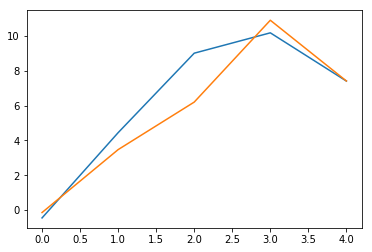

In [16]:
plt.plot(Y[:,0])
plt.plot(Fmeans[:,0]*Wmeans[:,0,0])

In [17]:
Fmeans

array([[  0.03139119],
       [ -1.01539779],
       [ -2.88555568],
       [-12.95326713],
       [ 16.28267257]])

In [18]:
Wmeans

array([[[-4.60062716],
        [-5.98439316]],

       [[-3.41689084],
        [-4.42964381]],

       [[-2.14823494],
        [-2.68277489]],

       [[-0.84138668],
        [-0.80397366]],

       [[ 0.45508284],
        [ 1.13809214]]])

In [19]:
np.random.multivariate_normal(Fmeans[:,0],Sigma_f_params[:,:,0] * Sigma_f_params[:,:,0]) 

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


array([  0.03121181,  -0.96815808,  -2.93705084, -13.13161645,
        16.16739348])

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


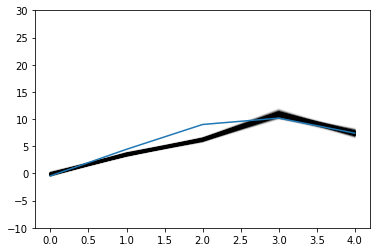

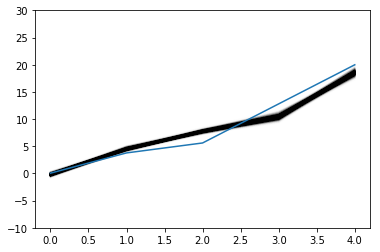

In [20]:
for i in range(P):
    plt.figure()
    res = []
    for it in range(1000):
        res.append(np.random.multivariate_normal(Fmeans[:,0],Sigma_f_params[:,:,0] * Sigma_f_params[:,:,0]) * np.random.multivariate_normal(Wmeans[:,i,0],Sigma_w_params[:,:,i,0].T @ Sigma_w_params[:,:,i,0]).T)
    res = np.array(res)
    #plt.hist(res);
    plt.plot(res.T,'k-',alpha=0.01);
    plt.plot(Y[:,i])
    plt.ylim([-10,30])

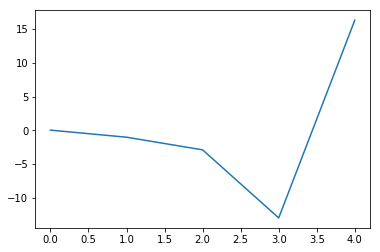

In [21]:
plt.plot(Fmeans[:,0])

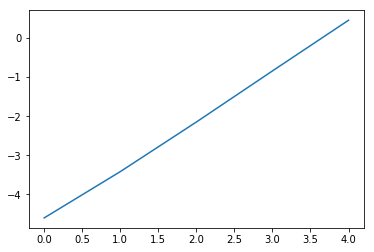

In [22]:
plt.plot(Wmeans[:,0])

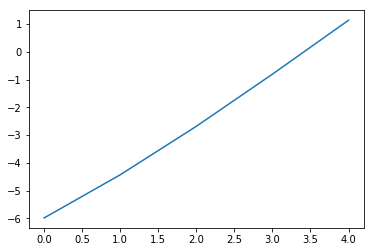

In [23]:
plt.plot(Wmeans[:,1])